In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

file_path = '/content/drive/My Drive/ED/EMG-data.csv'
#file_path = '/content/drive/MyDrive/EMG dataset/EMG-data.csv'
data = pd.read_csv(file_path)
print(data.head())  # Display the first few rows


   time  channel1  channel2  channel3  channel4  channel5  channel6  channel7  \
0     1   0.00001  -0.00002  -0.00001  -0.00003   0.00000  -0.00001   0.00000   
1     5   0.00001  -0.00002  -0.00001  -0.00003   0.00000  -0.00001   0.00000   
2     6  -0.00001   0.00001   0.00002   0.00000   0.00001  -0.00002  -0.00001   
3     7  -0.00001   0.00001   0.00002   0.00000   0.00001  -0.00002  -0.00001   
4     8  -0.00001   0.00001   0.00002   0.00000   0.00001  -0.00002  -0.00001   

   channel8  class  label  
0  -0.00001      0      1  
1  -0.00001      0      1  
2   0.00001      0      1  
3   0.00001      0      1  
4   0.00001      0      1  


In [ ]:
data.shape

(4237907, 11)

In [ ]:
class_counts = data['class'].value_counts()
print(class_counts)

class
0    2725157
6     253009
5     251733
4     251570
1     250055
3     249494
2     243193
7      13696
Name: count, dtype: int64


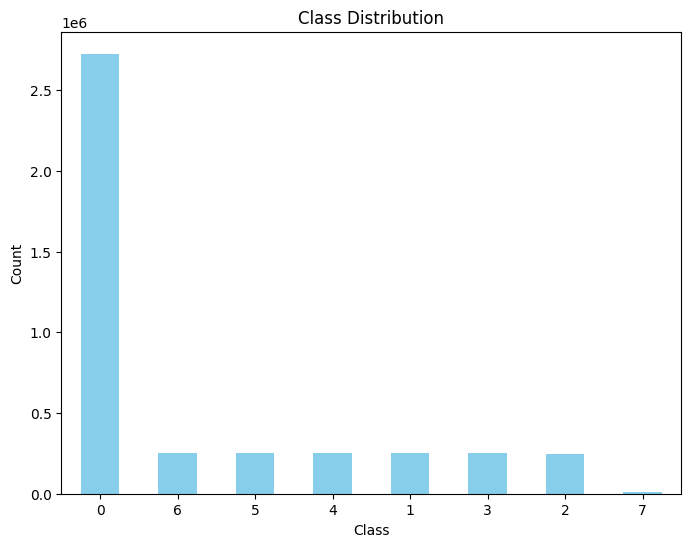

In [ ]:
import matplotlib.pyplot as plt

class_counts = data['class'].value_counts()
class_counts.plot(kind='bar', color='skyblue', figsize=(8, 6))
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


In [ ]:
# Calculate the count of each class (1 to 6)
class_counts = data['class'].value_counts()

# Get the counts for classes 1 to 6
counts_1_to_6 = class_counts.loc[1:6]

# Calculate the mean of these counts
mean_count = counts_1_to_6.mean()
print(f"Mean Number of Entries for Classes 1 to 6: {mean_count}")


Mean Number of Entries for Classes 1 to 6: nan


In [ ]:
class_counts = data['class'].value_counts()
print(class_counts)

class
0    2725157
6     253009
5     251733
4     251570
1     250055
3     249494
2     243193
7      13696
Name: count, dtype: int64


In [3]:
# Drop rows where class is 0 or 7
filtered_data = data[~data['class'].isin([0, 7])]

# Verify the new class distribution
print(filtered_data['class'].value_counts())


class
6    253009
5    251733
4    251570
1    250055
3    249494
2    243193
Name: count, dtype: int64


In [4]:
filtered_data.shape

(1499054, 11)

In [ ]:
filtered_data.drop(columns=['time','label'], inplace=True)

<ipython-input-6-89fd7174d76a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.drop(columns=['time','label'], inplace=True)


In [ ]:
filtered_data.shape

(1499054, 9)

In [ ]:
filtered_data.describe()

,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8,class
count,1.499054e+06,1.499054e+06,1.499054e+06,1.499054e+06,1.499054e+06,1.499054e+06,1.499054e+06,1.499054e+06,1.499054e+06
mean,-8.073265e-06,-9.673487e-06,-9.623436e-06,-9.399862e-06,-1.904691e-05,-1.172093e-05,-9.902805e-06,-1.043682e-05,3.514164e+00
std,1.895366e-04,1.370000e-04,1.379737e-04,2.644814e-04,3.159821e-04,2.491411e-04,1.767302e-04,2.001988e-04,1.709867e+00
min,-1.280000e-03,-1.280000e-03,-1.280000e-03,-1.280000e-03,-1.280000e-03,-1.280000e-03,-1.280000e-03,-1.280000e-03,1.000000e+00
25%,-5.000000e-05,-5.000000e-05,-5.000000e-05,-8.000000e-05,-1.300000e-04,-9.000000e-05,-6.000000e-05,-6.000000e-05,2.000000e+00
50%,-1.000000e-05,-1.000000e-05,-1.000000e-05,-1.000000e-05,-1.000000e-05,-1.000000e-05,-1.000000e-05,-1.000000e-05,4.000000e+00
75%,4.000000e-05,3.000000e-05,4.000000e-05,6.000000e-05,9.000000e-05,7.000000e-05,4.000000e-05,4.000000e-05,5.000000e+00
max,1.270000e-03,1.270000e-03,1.270000e-03,1.270000e-03,1.270000e-03,1.270000e-03,1.270000e-03,1.270000e-03,6.000000e+00


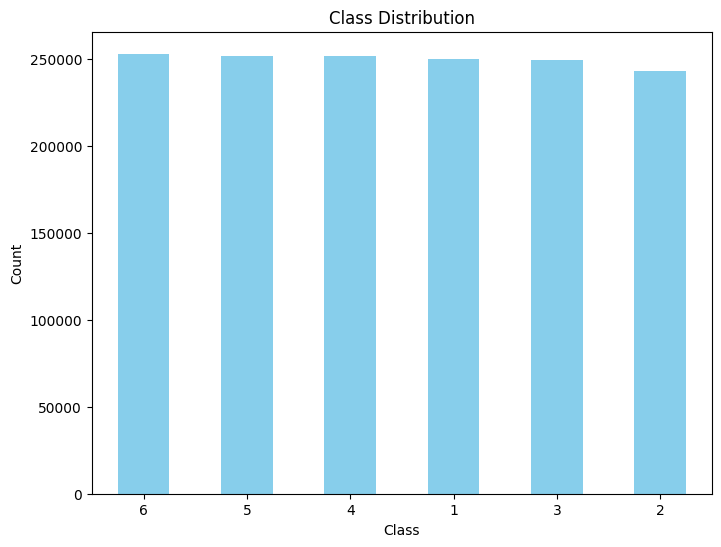

In [ ]:
import matplotlib.pyplot as plt

class_counts = filtered_data['class'].value_counts()
class_counts.plot(kind='bar', color='skyblue', figsize=(8, 6))
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


# GRIDSEARCHCV

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn import svm

In [ ]:
df = filtered_data.copy()

In [ ]:
df.shape

(1499054, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1499054 entries, 2287 to 4237211
Data columns (total 9 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   channel1  1499054 non-null  float64
 1   channel2  1499054 non-null  float64
 2   channel3  1499054 non-null  float64
 3   channel4  1499054 non-null  float64
 4   channel5  1499054 non-null  float64
 5   channel6  1499054 non-null  float64
 6   channel7  1499054 non-null  float64
 7   channel8  1499054 non-null  float64
 8   class     1499054 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 114.4 MB


In [ ]:
y = df['class']
X = df.drop('class', axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
pipe_lr = Pipeline([('scl', StandardScaler()), ('LR', LogisticRegression(random_state=42))])
pipe_dt = Pipeline([('scl', StandardScaler()), ('DT', DecisionTreeClassifier(random_state=42))])
pipe_rf = Pipeline([('scl', StandardScaler()), ('RF', RandomForestClassifier(random_state=42))])
pipe_knn = Pipeline([('scl', StandardScaler()), ('KNN', KNeighborsClassifier())])
pipe_svm = Pipeline([('scl', StandardScaler()), ('SVM', svm.SVC(random_state=42))])
pipe_xgb = Pipeline([('scl', StandardScaler()), ('XGB', XGBClassifier(random_state=42))])


In [ ]:
param_range = [1, 2, 3, 4, 5, 6]
param_range_fl = [1.0, 0.5, 0.1]
n_estimators = [50, 100, 150]
learning_rates = [0.1, 0.2, 0.3]

In [ ]:
lr_param_grid = [{'LR__penalty': ['l1', 'l2'], 'LR__C': param_range_fl, 'LR__solver': ['liblinear']}]
dt_param_grid = [{'DT__criterion': ['gini', 'entropy'], 'DT__min_samples_leaf': param_range, 'DT__max_depth': param_range, 'DT__min_samples_split': param_range[1:]}]
rf_param_grid = [{'RF__min_samples_leaf': param_range, 'RF__max_depth': param_range, 'RF__min_samples_split': param_range[1:]}]
knn_param_grid = [{'KNN__n_neighbors': param_range, 'KNN__weights': ['uniform', 'distance'], 'KNN__metric': ['euclidean', 'manhattan']}]
svm_param_grid = [{'SVM__kernel': ['linear', 'rbf'], 'SVM__C': param_range}]
xgb_param_grid = [{'XGB__learning_rate': learning_rates, 'XGB__max_depth': param_range, 'XGB__min_child_weight': param_range[:2], 'XGB__subsample': param_range_fl, 'XGB__n_estimators': n_estimators}]


In [ ]:
lr_grid_search = GridSearchCV(estimator=pipe_lr, param_grid=lr_param_grid, scoring='accuracy', cv=3)
dt_grid_search = GridSearchCV(estimator=pipe_dt, param_grid=dt_param_grid, scoring='accuracy', cv=3)
rf_grid_search = GridSearchCV(estimator=pipe_rf, param_grid=rf_param_grid, scoring='accuracy', cv=3)
knn_grid_search = GridSearchCV(estimator=pipe_knn, param_grid=knn_param_grid, scoring='accuracy', cv=3)
svm_grid_search = GridSearchCV(estimator=pipe_svm, param_grid=svm_param_grid, scoring='accuracy', cv=3)
xgb_grid_search = GridSearchCV(estimator=pipe_xgb, param_grid=xgb_param_grid, scoring='accuracy', cv=3)


In [ ]:
grids = [lr_grid_search, dt_grid_search, rf_grid_search, knn_grid_search, svm_grid_search, xgb_grid_search]


In [ ]:
for pipe in grids:
    pipe.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn import svm

# Assuming df is already defined
y = df['class']
X = df.drop('class', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Define pipelines
pipe_lr = Pipeline([('scl', StandardScaler()), ('LR', LogisticRegression(random_state=42))])
pipe_dt = Pipeline([('scl', StandardScaler()), ('DT', DecisionTreeClassifier(random_state=42))])
pipe_rf = Pipeline([('scl', StandardScaler()), ('RF', RandomForestClassifier(random_state=42))])
pipe_knn = Pipeline([('scl', StandardScaler()), ('KNN', KNeighborsClassifier())])
pipe_svm = Pipeline([('scl', StandardScaler()), ('SVM', svm.SVC(random_state=42))])
pipe_xgb = Pipeline([('scl', StandardScaler()), ('XGB', XGBClassifier(random_state=42, device='cuda'))])  # Enable GPU for XGBoost

# Parameter grids
param_range = [1, 2, 3, 4, 5, 6]
param_range_fl = [1.0, 0.5, 0.1]
n_estimators = [50, 100, 150]
learning_rates = [0.1, 0.2, 0.3]

lr_param_grid = [{'LR__penalty': ['l1', 'l2'], 'LR__C': param_range_fl, 'LR__solver': ['liblinear']}]
dt_param_grid = [{'DT__criterion': ['gini', 'entropy'], 'DT__min_samples_leaf': param_range, 'DT__max_depth': param_range, 'DT__min_samples_split': param_range[1:]}]
rf_param_grid = [{'RF__min_samples_leaf': param_range, 'RF__max_depth': param_range, 'RF__min_samples_split': param_range[1:]}]
knn_param_grid = [{'KNN__n_neighbors': param_range, 'KNN__weights': ['uniform', 'distance'], 'KNN__metric': ['euclidean', 'manhattan']}]
svm_param_grid = [{'SVM__kernel': ['linear', 'rbf'], 'SVM__C': param_range}]
xgb_param_grid = [{'XGB__learning_rate': learning_rates, 'XGB__max_depth': param_range, 'XGB__min_child_weight': param_range[:2], 'XGB__subsample': param_range_fl, 'XGB__n_estimators': n_estimators}]

# GridSearchCV with n_jobs for CPU-based models and GPU for XGBoost
lr_grid_search = GridSearchCV(estimator=pipe_lr, param_grid=lr_param_grid, scoring='accuracy', cv=3, n_jobs=-1)
dt_grid_search = GridSearchCV(estimator=pipe_dt, param_grid=dt_param_grid, scoring='accuracy', cv=3, n_jobs=-1)
rf_grid_search = GridSearchCV(estimator=pipe_rf, param_grid=rf_param_grid, scoring='accuracy', cv=3, n_jobs=-1)
knn_grid_search = GridSearchCV(estimator=pipe_knn, param_grid=knn_param_grid, scoring='accuracy', cv=3, n_jobs=-1)
svm_grid_search = GridSearchCV(estimator=pipe_svm, param_grid=svm_param_grid, scoring='accuracy', cv=3, n_jobs=-1)
xgb_grid_search = GridSearchCV(estimator=pipe_xgb, param_grid=xgb_param_grid, scoring='accuracy', cv=3)  # GPU via XGBoost

grids = [lr_grid_search, dt_grid_search, rf_grid_search, knn_grid_search, svm_grid_search, xgb_grid_search]

# Fit the models
for pipe in grids:
    pipe.fit(X_train, y_train)

# Optional: Print best parameters and scores
for pipe in grids:
    print(f"Best parameters for {pipe.estimator.steps[-1][0]}: {pipe.best_params_}")
    print(f"Best accuracy: {pipe.best_score_}")

PicklingError: Could not pickle the task to send it to the workers.

# SVM

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Prepare your data (assuming df is already loaded and cleaned)
y = df['class']
X = df.drop('class', axis=1)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# SVM Pipeline
pipe_svm = Pipeline([
    ('scl', StandardScaler()),
    ('SVM', svm.SVC(random_state=42))
])

# Define hyperparameter grid for SVM
svm_param_grid = [
    {
        'SVM__kernel': ['linear', 'rbf'],
        'SVM__C': [1, 10, 100],
        'SVM__gamma': ['scale', 'auto']
    }
]

# Perform grid search for the SVM model
svm_grid_search = GridSearchCV(
    estimator=pipe_svm,
    param_grid=svm_param_grid,
    scoring='accuracy',
    cv=3,
    n_jobs=-1  # Use all available CPU cores for faster computation
)

# Fit the model
svm_grid_search.fit(X_train, y_train)

# Output the best hyperparameters and test accuracy
print(f'Best Parameters: {svm_grid_search.best_params_}')
print(f'SVM Test Accuracy: {svm_grid_search.score(X_test, y_test)}')


# LOG

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Load your dataset
df = filtered_data.copy()

# Features (X) and target (y)
X = df.drop('class', axis=1)  # Replace 'class' with your target column name
y = df['class']

# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression model
log_reg = LogisticRegression(
    multi_class='multinomial',  # Softmax for multi-class classification
    solver='lbfgs',            # Recommended solver for multinomial
    max_iter=1000,             # Increase if convergence issues
    random_state=42
)

# Fit the model
log_reg.fit(X_train, y_train)

# Predict on test set
y_pred = log_reg.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Classification Report:
              precision    recall  f1-score   support

           1       0.25      0.51      0.33     50090
           2       0.01      0.00      0.00     48357
           3       0.00      0.00      0.00     49897
           4       0.08      0.06      0.07     50178
           5       0.00      0.00      0.00     50468
           6       0.26      0.49      0.34     50821

    accuracy                           0.18    299811
   macro avg       0.10      0.18      0.12    299811
weighted avg       0.10      0.18      0.13    299811

Confusion Matrix:
[[25468     0  4940 10696  7747  1239]
 [23577    69  1713  7751  9821  5426]
 [24673    47    54  2202  6731 16190]
 [22051  1558   260  2956  1667 21686]
 [ 6628  7465  7722  3349    26 25278]
 [   47  2676 12562  9666  1172 24698]]


# NN

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

# Assuming df is your DataFrame
df = filtered_data.copy()

# Features (X) and target (y)
X = df.drop('class', axis=1)  # Replace 'class' with your target column name
y = df['class']
# Assuming X and y are your dataset features and labels

# Adjust the class labels to be zero-indexed (if they are in the range 1 to 6, shift them by -1)
y -= 1  # This shifts class labels from [1, 2, 3, 4, 5, 6] to [0, 1, 2, 3, 4, 5]

# Standardize the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Define the neural network model
model = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu'),  # First hidden layer
    Dropout(0.3),  # Dropout to prevent overfitting
    Dense(64, activation='relu'),  # Second hidden layer
    Dropout(0.3),  # Dropout to prevent overfitting
    Dense(32, activation='relu'),  # Third hidden layer
    Dense(6, activation='softmax')  # Output layer for 6 classes (adjusted labels)
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=20,
                    batch_size=256,
                    verbose=1)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Generate predictions and evaluate classification metrics
y_pred = np.argmax(model.predict(X_test), axis=-1)
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
4685/4685 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.5765 - loss: 1.0842 - val_accuracy: 0.6720 - val_loss: 0.8450
Epoch 2/20
4685/4685 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.6520 - loss: 0.8964 - val_accuracy: 0.6741 - val_loss: 0.8364
Epoch 3/20
4685/4685 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.6581 - loss: 0.8782 - val_accuracy: 0.6787 - val_loss: 0.8238
Epoch 4/20
4685/4685 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.6593 - loss: 0.8736 - val_accuracy: 0.6811 - val_loss: 0.8167
Epoch 5/20
4685/4685 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.6626 - loss: 0.8667 - val_accuracy: 0.6825 - val_loss: 0.8139
Epoch 6/20
4685/4685 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.6630 - loss: 0.8635 - val_accuracy: 0.6846 - val_loss: 0.8087
Epoch 7/20
4685/4685 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.6641 - loss: 0.8611 - val_accuracy: 0.6846 - val_loss: 0.8093
Epoch 8/20
4685/4685 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.6649 - loss: 0

# CLAUDE NN ENHANCEMENT

Class distribution after zero-indexing:
class
0    250055
1    243193
2    249494
3    251570
4    251733
5    253009
Name: count, dtype: int64


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 512)                 │           8,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 6)                   │             390 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 185,414 (724.27 KB)

 Trainable params: 183,494 (716.77 KB)

 Non-trainable params: 1,920 (7.50 KB)

Epoch 1/200
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3721 - loss: 1.7161
Epoch 1: val_accuracy improved from -inf to 0.57765, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.3722 - loss: 1.7159 - val_accuracy: 0.5777 - val_loss: 1.0748 - learning_rate: 1.0000e-04
Epoch 2/200
1153/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5263 - loss: 1.2007
Epoch 2: val_accuracy improved from 0.57765 to 0.61539, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5265 - loss: 1.2001 - val_accuracy: 0.6154 - val_loss: 0.9844 - learning_rate: 1.0000e-04
Epoch 3/200
1159/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5729 - loss: 1.0857
Epoch 3: val_accuracy improved from 0.61539 to 0.64023, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5730 - loss: 1.0855 - val_accuracy: 0.6402 - val_loss: 0.9297 - learning_rate: 1.0000e-04
Epoch 4/200
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6035 - loss: 1.0193
Epoch 4: val_accuracy improved from 0.64023 to 0.65599, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6035 - loss: 1.0193 - val_accuracy: 0.6560 - val_loss: 0.8903 - learning_rate: 1.0000e-04
Epoch 5/200
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6245 - loss: 0.9756
Epoch 5: val_accuracy improved from 0.65599 to 0.66563, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6245 - loss: 0.9756 - val_accuracy: 0.6656 - val_loss: 0.8663 - learning_rate: 1.0000e-04
Epoch 6/200
1155/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6384 - loss: 0.9450
Epoch 6: val_accuracy improved from 0.66563 to 0.67135, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6384 - loss: 0.9449 - val_accuracy: 0.6714 - val_loss: 0.8498 - learning_rate: 1.0000e-04
Epoch 7/200
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6458 - loss: 0.9267
Epoch 7: val_accuracy improved from 0.67135 to 0.67534, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6458 - loss: 0.9267 - val_accuracy: 0.6753 - val_loss: 0.8395 - learning_rate: 1.0000e-04
Epoch 8/200
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6512 - loss: 0.9127
Epoch 8: val_accuracy improved from 0.67534 to 0.67785, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6512 - loss: 0.9127 - val_accuracy: 0.6779 - val_loss: 0.8319 - learning_rate: 1.0000e-04
Epoch 9/200
1158/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6551 - loss: 0.9029
Epoch 9: val_accuracy improved from 0.67785 to 0.67975, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6551 - loss: 0.9028 - val_accuracy: 0.6797 - val_loss: 0.8259 - learning_rate: 1.0000e-04
Epoch 10/200
1158/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6580 - loss: 0.8948
Epoch 10: val_accuracy improved from 0.67975 to 0.68120, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6580 - loss: 0.8948 - val_accuracy: 0.6812 - val_loss: 0.8202 - learning_rate: 1.0000e-04
Epoch 11/200
1156/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6606 - loss: 0.8871
Epoch 11: val_accuracy improved from 0.68120 to 0.68310, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6606 - loss: 0.8871 - val_accuracy: 0.6831 - val_loss: 0.8154 - learning_rate: 1.0000e-04
Epoch 12/200
1155/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6618 - loss: 0.8822
Epoch 12: val_accuracy improved from 0.68310 to 0.68416, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6618 - loss: 0.8822 - val_accuracy: 0.6842 - val_loss: 0.8116 - learning_rate: 1.0000e-04
Epoch 13/200
1153/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6638 - loss: 0.8774
Epoch 13: val_accuracy improved from 0.68416 to 0.68536, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6637 - loss: 0.8774 - val_accuracy: 0.6854 - val_loss: 0.8076 - learning_rate: 1.0000e-04
Epoch 14/200
1157/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6653 - loss: 0.8729
Epoch 14: val_accuracy improved from 0.68536 to 0.68600, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6653 - loss: 0.8729 - val_accuracy: 0.6860 - val_loss: 0.8043 - learning_rate: 1.0000e-04
Epoch 15/200
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6667 - loss: 0.8686
Epoch 15: val_accuracy improved from 0.68600 to 0.68697, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6667 - loss: 0.8686 - val_accuracy: 0.6870 - val_loss: 0.8015 - learning_rate: 1.0000e-04
Epoch 16/200
1157/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6675 - loss: 0.8656
Epoch 16: val_accuracy improved from 0.68697 to 0.68800, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6675 - loss: 0.8656 - val_accuracy: 0.6880 - val_loss: 0.7988 - learning_rate: 1.0000e-04
Epoch 17/200
1154/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6680 - loss: 0.8636
Epoch 17: val_accuracy improved from 0.68800 to 0.68876, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6680 - loss: 0.8636 - val_accuracy: 0.6888 - val_loss: 0.7967 - learning_rate: 1.0000e-04
Epoch 18/200
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6692 - loss: 0.8606
Epoch 18: val_accuracy improved from 0.68876 to 0.68968, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6692 - loss: 0.8606 - val_accuracy: 0.6897 - val_loss: 0.7943 - learning_rate: 1.0000e-04
Epoch 19/200
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6701 - loss: 0.8576
Epoch 19: val_accuracy improved from 0.68968 to 0.68976, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6701 - loss: 0.8576 - val_accuracy: 0.6898 - val_loss: 0.7923 - learning_rate: 1.0000e-04
Epoch 20/200
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6713 - loss: 0.8559
Epoch 20: val_accuracy improved from 0.68976 to 0.69028, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6712 - loss: 0.8559 - val_accuracy: 0.6903 - val_loss: 0.7908 - learning_rate: 1.0000e-04
Epoch 21/200
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6713 - loss: 0.8538
Epoch 21: val_accuracy improved from 0.69028 to 0.69178, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6713 - loss: 0.8538 - val_accuracy: 0.6918 - val_loss: 0.7889 - learning_rate: 1.0000e-04
Epoch 22/200
1156/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6717 - loss: 0.8527
Epoch 22: val_accuracy improved from 0.69178 to 0.69179, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6717 - loss: 0.8527 - val_accuracy: 0.6918 - val_loss: 0.7876 - learning_rate: 1.0000e-04
Epoch 23/200
1169/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6729 - loss: 0.8494
Epoch 23: val_accuracy improved from 0.69179 to 0.69284, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6729 - loss: 0.8494 - val_accuracy: 0.6928 - val_loss: 0.7857 - learning_rate: 1.0000e-04
Epoch 24/200
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6733 - loss: 0.8485
Epoch 24: val_accuracy improved from 0.69284 to 0.69357, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6733 - loss: 0.8485 - val_accuracy: 0.6936 - val_loss: 0.7842 - learning_rate: 1.0000e-04
Epoch 25/200
1154/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6746 - loss: 0.8464
Epoch 25: val_accuracy improved from 0.69357 to 0.69455, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6745 - loss: 0.8465 - val_accuracy: 0.6946 - val_loss: 0.7829 - learning_rate: 1.0000e-04
Epoch 26/200
1157/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6748 - loss: 0.8451
Epoch 26: val_accuracy improved from 0.69455 to 0.69517, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6748 - loss: 0.8451 - val_accuracy: 0.6952 - val_loss: 0.7813 - learning_rate: 1.0000e-04
Epoch 27/200
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6753 - loss: 0.8435
Epoch 27: val_accuracy improved from 0.69517 to 0.69578, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6753 - loss: 0.8435 - val_accuracy: 0.6958 - val_loss: 0.7800 - learning_rate: 1.0000e-04
Epoch 28/200
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6755 - loss: 0.8420
Epoch 28: val_accuracy improved from 0.69578 to 0.69630, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6755 - loss: 0.8420 - val_accuracy: 0.6963 - val_loss: 0.7782 - learning_rate: 1.0000e-04
Epoch 29/200
1155/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6764 - loss: 0.8404
Epoch 29: val_accuracy improved from 0.69630 to 0.69695, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6764 - loss: 0.8404 - val_accuracy: 0.6969 - val_loss: 0.7774 - learning_rate: 1.0000e-04
Epoch 30/200
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6763 - loss: 0.8404
Epoch 30: val_accuracy improved from 0.69695 to 0.69732, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6763 - loss: 0.8404 - val_accuracy: 0.6973 - val_loss: 0.7762 - learning_rate: 1.0000e-04
Epoch 31/200
1154/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6766 - loss: 0.8387
Epoch 31: val_accuracy improved from 0.69732 to 0.69786, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6766 - loss: 0.8387 - val_accuracy: 0.6979 - val_loss: 0.7748 - learning_rate: 1.0000e-04
Epoch 32/200
1158/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6776 - loss: 0.8370
Epoch 32: val_accuracy did not improve from 0.69786
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6776 - loss: 0.8370 - val_accuracy: 0.6979 - val_loss: 0.7734 - learning_rate: 1.0000e-04
Epoch 33/200
1155/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6779 - loss: 0.8369
Epoch 33: val_accuracy improved from 0.69786 to 0.69908, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6778 - loss: 0.8369 - val_accuracy: 0.6991 - val_loss: 0.7725 - learning_rate: 1.0000e-04
Epoch 34/200
1157/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6776 - loss: 0.8351
Epoch 34: val_accuracy did not improve from 0.69908
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6775 - loss: 0.8351 - val_accuracy: 0.6987 - val_loss: 0.7716 - learning_rate: 1.0000e-04
Epoch 35/200
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6787 - loss: 0.8337
Epoch 35: val_accuracy improved from 0.69908 to 0.69909, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6787 - loss: 0.8337 - val_accuracy: 0.6991 - val_loss: 0.7703 - learning_rate: 1.0000e-04
Epoch 36/200
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6792 - loss: 0.8336
Epoch 36: val_accuracy improved from 0.69909 to 0.69919, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6792 - loss: 0.8336 - val_accuracy: 0.6992 - val_loss: 0.7692 - learning_rate: 1.0000e-04
Epoch 37/200
1156/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6792 - loss: 0.8320
Epoch 37: val_accuracy improved from 0.69919 to 0.70023, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6792 - loss: 0.8320 - val_accuracy: 0.7002 - val_loss: 0.7682 - learning_rate: 1.0000e-04
Epoch 38/200
1166/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6795 - loss: 0.8316
Epoch 38: val_accuracy improved from 0.70023 to 0.70041, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6795 - loss: 0.8316 - val_accuracy: 0.7004 - val_loss: 0.7676 - learning_rate: 1.0000e-04
Epoch 39/200
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6795 - loss: 0.8308
Epoch 39: val_accuracy did not improve from 0.70041
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6795 - loss: 0.8308 - val_accuracy: 0.7002 - val_loss: 0.7665 - learning_rate: 1.0000e-04
Epoch 40/200
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6802 - loss: 0.8295
Epoch 40: val_accuracy improved from 0.70041 to 0.70092, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6802 - loss: 0.8295 - val_accuracy: 0.7009 - val_loss: 0.7652 - learning_rate: 1.0000e-04
Epoch 41/200
1155/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6807 - loss: 0.8289
Epoch 41: val_accuracy improved from 0.70092 to 0.70157, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6807 - loss: 0.8289 - val_accuracy: 0.7016 - val_loss: 0.7644 - learning_rate: 1.0000e-04
Epoch 42/200
1156/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6804 - loss: 0.8277
Epoch 42: val_accuracy improved from 0.70157 to 0.70181, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6804 - loss: 0.8277 - val_accuracy: 0.7018 - val_loss: 0.7640 - learning_rate: 1.0000e-04
Epoch 43/200
1156/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6814 - loss: 0.8264
Epoch 43: val_accuracy did not improve from 0.70181
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6814 - loss: 0.8264 - val_accuracy: 0.7016 - val_loss: 0.7627 - learning_rate: 1.0000e-04
Epoch 44/200
1157/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6812 - loss: 0.8273
Epoch 44: val_accuracy did not improve from 0.70181
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6812 - loss: 0.8273 - val_accuracy: 0.7018 - val_loss: 0.7622 - learning_rate: 1.0000e-04
Epoch 45/200
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6812 - loss: 0.8264
Epoch 45: val_accuracy improved from 0.70181 to 0.70214, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6812 - loss: 0.8264 - val_accuracy: 0.7021 - val_loss: 0.7610 - learning_rate: 1.0000e-04
Epoch 46/200
1157/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6815 - loss: 0.8254
Epoch 46: val_accuracy improved from 0.70214 to 0.70285, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6814 - loss: 0.8254 - val_accuracy: 0.7029 - val_loss: 0.7602 - learning_rate: 1.0000e-04
Epoch 47/200
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6815 - loss: 0.8250
Epoch 47: val_accuracy improved from 0.70285 to 0.70307, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6815 - loss: 0.8250 - val_accuracy: 0.7031 - val_loss: 0.7594 - learning_rate: 1.0000e-04
Epoch 48/200
1158/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6824 - loss: 0.8242
Epoch 48: val_accuracy did not improve from 0.70307
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6823 - loss: 0.8242 - val_accuracy: 0.7030 - val_loss: 0.7588 - learning_rate: 1.0000e-04
Epoch 49/200
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6822 - loss: 0.8236
Epoch 49: val_accuracy improved from 0.70307 to 0.70345, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6822 - loss: 0.8236 - val_accuracy: 0.7035 - val_loss: 0.7580 - learning_rate: 1.0000e-04
Epoch 50/200
1156/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6832 - loss: 0.8224
Epoch 50: val_accuracy improved from 0.70345 to 0.70403, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6832 - loss: 0.8225 - val_accuracy: 0.7040 - val_loss: 0.7567 - learning_rate: 1.0000e-04
Epoch 51/200
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6830 - loss: 0.8218
Epoch 51: val_accuracy improved from 0.70403 to 0.70409, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6830 - loss: 0.8218 - val_accuracy: 0.7041 - val_loss: 0.7562 - learning_rate: 1.0000e-04
Epoch 52/200
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6828 - loss: 0.8213
Epoch 52: val_accuracy did not improve from 0.70409
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6828 - loss: 0.8213 - val_accuracy: 0.7040 - val_loss: 0.7554 - learning_rate: 1.0000e-04
Epoch 53/200
1158/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6837 - loss: 0.8209
Epoch 53: val_accuracy improved from 0.70409 to 0.70494, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6837 - loss: 0.8209 - val_accuracy: 0.7049 - val_loss: 0.7547 - learning_rate: 1.0000e-04
Epoch 54/200
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6836 - loss: 0.8202
Epoch 54: val_accuracy did not improve from 0.70494
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6836 - loss: 0.8202 - val_accuracy: 0.7049 - val_loss: 0.7548 - learning_rate: 1.0000e-04
Epoch 55/200
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6839 - loss: 0.8194
Epoch 55: val_accuracy did not improve from 0.70494
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6839 - loss: 0.8194 - val_accuracy: 0.7047 - val_loss: 0.7538 - learning_rate: 1.0000e-04
Epoch 56/200
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6833 - loss: 0.8200
Epoch 56: val_accuracy did not improve from 0.70494
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6833 - loss: 0.8200 - val_accuracy: 0.7044 - val_loss: 0.7527 - learning_rat

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6838 - loss: 0.8191 - val_accuracy: 0.7053 - val_loss: 0.7521 - learning_rate: 1.0000e-04
Epoch 58/200
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6846 - loss: 0.8182
Epoch 58: val_accuracy improved from 0.70531 to 0.70565, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6846 - loss: 0.8182 - val_accuracy: 0.7057 - val_loss: 0.7515 - learning_rate: 1.0000e-04
Epoch 59/200
1155/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6848 - loss: 0.8173
Epoch 59: val_accuracy improved from 0.70565 to 0.70623, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6848 - loss: 0.8173 - val_accuracy: 0.7062 - val_loss: 0.7507 - learning_rate: 1.0000e-04
Epoch 60/200
1161/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6845 - loss: 0.8175
Epoch 60: val_accuracy did not improve from 0.70623
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6845 - loss: 0.8175 - val_accuracy: 0.7060 - val_loss: 0.7503 - learning_rate: 1.0000e-04
Epoch 61/200
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6843 - loss: 0.8170
Epoch 61: val_accuracy improved from 0.70623 to 0.70665, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6843 - loss: 0.8170 - val_accuracy: 0.7066 - val_loss: 0.7492 - learning_rate: 1.0000e-04
Epoch 62/200
1161/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6843 - loss: 0.8165
Epoch 62: val_accuracy improved from 0.70665 to 0.70666, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6843 - loss: 0.8165 - val_accuracy: 0.7067 - val_loss: 0.7488 - learning_rate: 1.0000e-04
Epoch 63/200
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6845 - loss: 0.8163
Epoch 63: val_accuracy improved from 0.70666 to 0.70745, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6845 - loss: 0.8163 - val_accuracy: 0.7074 - val_loss: 0.7484 - learning_rate: 1.0000e-04
Epoch 64/200
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6853 - loss: 0.8152
Epoch 64: val_accuracy did not improve from 0.70745
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6853 - loss: 0.8152 - val_accuracy: 0.7066 - val_loss: 0.7477 - learning_rate: 1.0000e-04
Epoch 65/200
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6851 - loss: 0.8155
Epoch 65: val_accuracy improved from 0.70745 to 0.70751, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6851 - loss: 0.8155 - val_accuracy: 0.7075 - val_loss: 0.7470 - learning_rate: 1.0000e-04
Epoch 66/200
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6854 - loss: 0.8144
Epoch 66: val_accuracy improved from 0.70751 to 0.70771, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6854 - loss: 0.8144 - val_accuracy: 0.7077 - val_loss: 0.7466 - learning_rate: 1.0000e-04
Epoch 67/200
1169/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6860 - loss: 0.8138
Epoch 67: val_accuracy improved from 0.70771 to 0.70803, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6860 - loss: 0.8138 - val_accuracy: 0.7080 - val_loss: 0.7465 - learning_rate: 1.0000e-04
Epoch 68/200
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6864 - loss: 0.8134
Epoch 68: val_accuracy improved from 0.70803 to 0.70820, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6864 - loss: 0.8134 - val_accuracy: 0.7082 - val_loss: 0.7452 - learning_rate: 1.0000e-04
Epoch 69/200
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6868 - loss: 0.8131
Epoch 69: val_accuracy improved from 0.70820 to 0.70915, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6868 - loss: 0.8131 - val_accuracy: 0.7091 - val_loss: 0.7450 - learning_rate: 1.0000e-04
Epoch 70/200
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6861 - loss: 0.8128
Epoch 70: val_accuracy did not improve from 0.70915
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6861 - loss: 0.8128 - val_accuracy: 0.7091 - val_loss: 0.7443 - learning_rate: 1.0000e-04
Epoch 71/200
1161/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6866 - loss: 0.8118
Epoch 71: val_accuracy improved from 0.70915 to 0.70943, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6866 - loss: 0.8118 - val_accuracy: 0.7094 - val_loss: 0.7435 - learning_rate: 1.0000e-04
Epoch 72/200
1156/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6864 - loss: 0.8123
Epoch 72: val_accuracy did not improve from 0.70943
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6864 - loss: 0.8123 - val_accuracy: 0.7088 - val_loss: 0.7432 - learning_rate: 1.0000e-04
Epoch 73/200
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6866 - loss: 0.8118
Epoch 73: val_accuracy improved from 0.70943 to 0.70973, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6866 - loss: 0.8118 - val_accuracy: 0.7097 - val_loss: 0.7423 - learning_rate: 1.0000e-04
Epoch 74/200
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6865 - loss: 0.8112
Epoch 74: val_accuracy did not improve from 0.70973
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6865 - loss: 0.8112 - val_accuracy: 0.7092 - val_loss: 0.7417 - learning_rate: 1.0000e-04
Epoch 75/200
1157/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6861 - loss: 0.8113
Epoch 75: val_accuracy did not improve from 0.70973
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6861 - loss: 0.8113 - val_accuracy: 0.7097 - val_loss: 0.7415 - learning_rate: 1.0000e-04
Epoch 76/200
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6868 - loss: 0.8108
Epoch 76: val_accuracy improved from 0.70973 to 0.71006, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6868 - loss: 0.8108 - val_accuracy: 0.7101 - val_loss: 0.7409 - learning_rate: 1.0000e-04
Epoch 77/200
1157/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6873 - loss: 0.8096
Epoch 77: val_accuracy improved from 0.71006 to 0.71054, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6873 - loss: 0.8096 - val_accuracy: 0.7105 - val_loss: 0.7405 - learning_rate: 1.0000e-04
Epoch 78/200
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6869 - loss: 0.8099
Epoch 78: val_accuracy improved from 0.71054 to 0.71078, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6869 - loss: 0.8099 - val_accuracy: 0.7108 - val_loss: 0.7398 - learning_rate: 1.0000e-04
Epoch 79/200
1156/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6873 - loss: 0.8095
Epoch 79: val_accuracy did not improve from 0.71078
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6872 - loss: 0.8095 - val_accuracy: 0.7105 - val_loss: 0.7393 - learning_rate: 1.0000e-04
Epoch 80/200
1158/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6874 - loss: 0.8087
Epoch 80: val_accuracy did not improve from 0.71078
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6874 - loss: 0.8087 - val_accuracy: 0.7106 - val_loss: 0.7387 - learning_rate: 1.0000e-04
Epoch 81/200
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6878 - loss: 0.8086
Epoch 81: val_accuracy improved from 0.71078 to 0.71123, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6878 - loss: 0.8086 - val_accuracy: 0.7112 - val_loss: 0.7378 - learning_rate: 1.0000e-04
Epoch 82/200
1154/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6876 - loss: 0.8089
Epoch 82: val_accuracy improved from 0.71123 to 0.71157, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6876 - loss: 0.8089 - val_accuracy: 0.7116 - val_loss: 0.7376 - learning_rate: 1.0000e-04
Epoch 83/200
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6874 - loss: 0.8075
Epoch 83: val_accuracy improved from 0.71157 to 0.71172, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6874 - loss: 0.8075 - val_accuracy: 0.7117 - val_loss: 0.7372 - learning_rate: 1.0000e-04
Epoch 84/200
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6875 - loss: 0.8080
Epoch 84: val_accuracy improved from 0.71172 to 0.71200, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6875 - loss: 0.8080 - val_accuracy: 0.7120 - val_loss: 0.7368 - learning_rate: 1.0000e-04
Epoch 85/200
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6875 - loss: 0.8082
Epoch 85: val_accuracy did not improve from 0.71200
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6875 - loss: 0.8082 - val_accuracy: 0.7114 - val_loss: 0.7366 - learning_rate: 1.0000e-04
Epoch 86/200
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6876 - loss: 0.8072
Epoch 86: val_accuracy did not improve from 0.71200
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6876 - loss: 0.8072 - val_accuracy: 0.7119 - val_loss: 0.7365 - learning_rate: 1.0000e-04
Epoch 87/200
1154/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6879 - loss: 0.8069
Epoch 87: val_accuracy did not improve from 0.71200
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6879 - loss: 0.8069 - val_accuracy: 0.7117 - val_loss: 0.7356 - learning_rat

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6886 - loss: 0.8063 - val_accuracy: 0.7123 - val_loss: 0.7349 - learning_rate: 1.0000e-04
Epoch 90/200
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6886 - loss: 0.8056
Epoch 90: val_accuracy improved from 0.71233 to 0.71274, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6886 - loss: 0.8056 - val_accuracy: 0.7127 - val_loss: 0.7340 - learning_rate: 1.0000e-04
Epoch 91/200
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6889 - loss: 0.8061
Epoch 91: val_accuracy improved from 0.71274 to 0.71290, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6889 - loss: 0.8061 - val_accuracy: 0.7129 - val_loss: 0.7335 - learning_rate: 1.0000e-04
Epoch 92/200
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6888 - loss: 0.8048
Epoch 92: val_accuracy did not improve from 0.71290
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6888 - loss: 0.8048 - val_accuracy: 0.7127 - val_loss: 0.7333 - learning_rate: 1.0000e-04
Epoch 93/200
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6886 - loss: 0.8053
Epoch 93: val_accuracy did not improve from 0.71290
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6886 - loss: 0.8053 - val_accuracy: 0.7128 - val_loss: 0.7332 - learning_rate: 1.0000e-04
Epoch 94/200
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6888 - loss: 0.8052
Epoch 94: val_accuracy improved from 0.71290 to 0.71313, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6888 - loss: 0.8052 - val_accuracy: 0.7131 - val_loss: 0.7329 - learning_rate: 1.0000e-04
Epoch 95/200
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6894 - loss: 0.8046
Epoch 95: val_accuracy improved from 0.71313 to 0.71333, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6894 - loss: 0.8046 - val_accuracy: 0.7133 - val_loss: 0.7320 - learning_rate: 1.0000e-04
Epoch 96/200
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6893 - loss: 0.8048
Epoch 96: val_accuracy improved from 0.71333 to 0.71367, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6893 - loss: 0.8048 - val_accuracy: 0.7137 - val_loss: 0.7316 - learning_rate: 1.0000e-04
Epoch 97/200
1157/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6885 - loss: 0.8047
Epoch 97: val_accuracy did not improve from 0.71367
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6884 - loss: 0.8047 - val_accuracy: 0.7131 - val_loss: 0.7314 - learning_rate: 1.0000e-04
Epoch 98/200
1166/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6891 - loss: 0.8044
Epoch 98: val_accuracy did not improve from 0.71367
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6891 - loss: 0.8044 - val_accuracy: 0.7136 - val_loss: 0.7312 - learning_rate: 1.0000e-04
Epoch 99/200
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6898 - loss: 0.8034
Epoch 99: val_accuracy improved from 0.71367 to 0.71440, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6898 - loss: 0.8034 - val_accuracy: 0.7144 - val_loss: 0.7304 - learning_rate: 1.0000e-04
Epoch 100/200
1157/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6899 - loss: 0.8033
Epoch 100: val_accuracy did not improve from 0.71440
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6899 - loss: 0.8033 - val_accuracy: 0.7136 - val_loss: 0.7301 - learning_rate: 1.0000e-04
Epoch 101/200
1159/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6895 - loss: 0.8034
Epoch 101: val_accuracy did not improve from 0.71440
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6895 - loss: 0.8034 - val_accuracy: 0.7137 - val_loss: 0.7297 - learning_rate: 1.0000e-04
Epoch 102/200
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6898 - loss: 0.8028
Epoch 102: val_accuracy did not improve from 0.71440
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6898 - loss: 0.8028 - val_accuracy: 0.7140 - val_loss: 0.7291 - learni

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6893 - loss: 0.8027 - val_accuracy: 0.7147 - val_loss: 0.7289 - learning_rate: 1.0000e-04
Epoch 104/200
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6893 - loss: 0.8035
Epoch 104: val_accuracy did not improve from 0.71469
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6893 - loss: 0.8035 - val_accuracy: 0.7143 - val_loss: 0.7288 - learning_rate: 1.0000e-04
Epoch 105/200
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6896 - loss: 0.8019
Epoch 105: val_accuracy improved from 0.71469 to 0.71520, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6896 - loss: 0.8020 - val_accuracy: 0.7152 - val_loss: 0.7287 - learning_rate: 1.0000e-04
Epoch 106/200
1161/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6897 - loss: 0.8021
Epoch 106: val_accuracy did not improve from 0.71520
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6897 - loss: 0.8021 - val_accuracy: 0.7151 - val_loss: 0.7277 - learning_rate: 1.0000e-04
Epoch 107/200
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6898 - loss: 0.8016
Epoch 107: val_accuracy improved from 0.71520 to 0.71547, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6898 - loss: 0.8016 - val_accuracy: 0.7155 - val_loss: 0.7278 - learning_rate: 1.0000e-04
Epoch 108/200
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6902 - loss: 0.8019
Epoch 108: val_accuracy did not improve from 0.71547
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6902 - loss: 0.8019 - val_accuracy: 0.7151 - val_loss: 0.7271 - learning_rate: 1.0000e-04
Epoch 109/200
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6899 - loss: 0.8009
Epoch 109: val_accuracy did not improve from 0.71547
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6899 - loss: 0.8009 - val_accuracy: 0.7155 - val_loss: 0.7268 - learning_rate: 1.0000e-04
Epoch 110/200
1166/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6904 - loss: 0.8010
Epoch 110: val_accuracy improved from 0.71547 to 0.71562, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6904 - loss: 0.8010 - val_accuracy: 0.7156 - val_loss: 0.7271 - learning_rate: 1.0000e-04
Epoch 111/200
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6898 - loss: 0.8016
Epoch 111: val_accuracy did not improve from 0.71562
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6898 - loss: 0.8016 - val_accuracy: 0.7153 - val_loss: 0.7261 - learning_rate: 1.0000e-04
Epoch 112/200
1155/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6904 - loss: 0.8004
Epoch 112: val_accuracy improved from 0.71562 to 0.71571, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6904 - loss: 0.8005 - val_accuracy: 0.7157 - val_loss: 0.7262 - learning_rate: 1.0000e-04
Epoch 113/200
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6903 - loss: 0.8012
Epoch 113: val_accuracy improved from 0.71571 to 0.71626, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6903 - loss: 0.8012 - val_accuracy: 0.7163 - val_loss: 0.7255 - learning_rate: 1.0000e-04
Epoch 114/200
1154/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6903 - loss: 0.8007
Epoch 114: val_accuracy did not improve from 0.71626
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6902 - loss: 0.8008 - val_accuracy: 0.7160 - val_loss: 0.7254 - learning_rate: 1.0000e-04
Epoch 115/200
1161/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6906 - loss: 0.8005
Epoch 115: val_accuracy improved from 0.71626 to 0.71667, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6906 - loss: 0.8006 - val_accuracy: 0.7167 - val_loss: 0.7247 - learning_rate: 1.0000e-04
Epoch 116/200
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6903 - loss: 0.8003
Epoch 116: val_accuracy did not improve from 0.71667
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6903 - loss: 0.8003 - val_accuracy: 0.7163 - val_loss: 0.7249 - learning_rate: 1.0000e-04
Epoch 117/200
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6906 - loss: 0.8003
Epoch 117: val_accuracy did not improve from 0.71667
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6906 - loss: 0.8004 - val_accuracy: 0.7163 - val_loss: 0.7244 - learning_rate: 1.0000e-04
Epoch 118/200
1158/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6907 - loss: 0.8000
Epoch 118: val_accuracy did not improve from 0.71667
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6907 - loss: 0.8000 - val_accuracy: 0.7163 - val_loss: 0.7247 - learni

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6906 - loss: 0.7992 - val_accuracy: 0.7170 - val_loss: 0.7236 - learning_rate: 1.0000e-04
Epoch 121/200
1156/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6906 - loss: 0.7995
Epoch 121: val_accuracy did not improve from 0.71699
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6905 - loss: 0.7995 - val_accuracy: 0.7166 - val_loss: 0.7235 - learning_rate: 1.0000e-04
Epoch 122/200
1158/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6907 - loss: 0.7990
Epoch 122: val_accuracy did not improve from 0.71699
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6907 - loss: 0.7990 - val_accuracy: 0.7165 - val_loss: 0.7226 - learning_rate: 1.0000e-04
Epoch 123/200
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6914 - loss: 0.7987
Epoch 123: val_accuracy did not improve from 0.71699
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6914 - loss: 0.7988 - val_accuracy: 0.7169 - val_loss: 0.7223 - learni

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6910 - loss: 0.7981 - val_accuracy: 0.7173 - val_loss: 0.7219 - learning_rate: 1.0000e-04
Epoch 127/200
1169/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6910 - loss: 0.7986
Epoch 127: val_accuracy improved from 0.71727 to 0.71740, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6910 - loss: 0.7986 - val_accuracy: 0.7174 - val_loss: 0.7210 - learning_rate: 1.0000e-04
Epoch 128/200
1169/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6914 - loss: 0.7976
Epoch 128: val_accuracy improved from 0.71740 to 0.71755, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6914 - loss: 0.7977 - val_accuracy: 0.7175 - val_loss: 0.7215 - learning_rate: 1.0000e-04
Epoch 129/200
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6910 - loss: 0.7980
Epoch 129: val_accuracy did not improve from 0.71755
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6910 - loss: 0.7980 - val_accuracy: 0.7174 - val_loss: 0.7210 - learning_rate: 1.0000e-04
Epoch 130/200
1160/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6907 - loss: 0.7985
Epoch 130: val_accuracy improved from 0.71755 to 0.71778, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6907 - loss: 0.7985 - val_accuracy: 0.7178 - val_loss: 0.7206 - learning_rate: 1.0000e-04
Epoch 131/200
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6919 - loss: 0.7970
Epoch 131: val_accuracy did not improve from 0.71778
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6919 - loss: 0.7970 - val_accuracy: 0.7173 - val_loss: 0.7202 - learning_rate: 1.0000e-04
Epoch 132/200
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6919 - loss: 0.7971
Epoch 132: val_accuracy improved from 0.71778 to 0.71802, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6919 - loss: 0.7971 - val_accuracy: 0.7180 - val_loss: 0.7202 - learning_rate: 1.0000e-04
Epoch 133/200
1169/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6918 - loss: 0.7975
Epoch 133: val_accuracy did not improve from 0.71802
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6918 - loss: 0.7975 - val_accuracy: 0.7179 - val_loss: 0.7202 - learning_rate: 1.0000e-04
Epoch 134/200
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6921 - loss: 0.7970
Epoch 134: val_accuracy improved from 0.71802 to 0.71902, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6921 - loss: 0.7970 - val_accuracy: 0.7190 - val_loss: 0.7195 - learning_rate: 1.0000e-04
Epoch 135/200
1157/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6916 - loss: 0.7966
Epoch 135: val_accuracy did not improve from 0.71902
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6916 - loss: 0.7967 - val_accuracy: 0.7180 - val_loss: 0.7194 - learning_rate: 1.0000e-04
Epoch 136/200
1156/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6912 - loss: 0.7971
Epoch 136: val_accuracy did not improve from 0.71902
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6912 - loss: 0.7971 - val_accuracy: 0.7185 - val_loss: 0.7188 - learning_rate: 1.0000e-04
Epoch 137/200
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6917 - loss: 0.7972
Epoch 137: val_accuracy did not improve from 0.71902
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6916 - loss: 0.7972 - val_accuracy: 0.7182 - val_loss: 0.7189 - learni

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6918 - loss: 0.7954 - val_accuracy: 0.7193 - val_loss: 0.7171 - learning_rate: 1.0000e-04
Epoch 143/200
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6920 - loss: 0.7957
Epoch 143: val_accuracy did not improve from 0.71928
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6920 - loss: 0.7957 - val_accuracy: 0.7192 - val_loss: 0.7171 - learning_rate: 1.0000e-04
Epoch 144/200
1160/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6926 - loss: 0.7957
Epoch 144: val_accuracy did not improve from 0.71928
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6926 - loss: 0.7958 - val_accuracy: 0.7187 - val_loss: 0.7170 - learning_rate: 1.0000e-04
Epoch 145/200
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6920 - loss: 0.7956
Epoch 145: val_accuracy did not improve from 0.71928
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6920 - loss: 0.7956 - val_accuracy: 0.7189 - val_loss: 0.7168 - learni

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6921 - loss: 0.7952 - val_accuracy: 0.7195 - val_loss: 0.7161 - learning_rate: 1.0000e-04
Epoch 147/200
1156/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6922 - loss: 0.7952
Epoch 147: val_accuracy did not improve from 0.71949
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6922 - loss: 0.7952 - val_accuracy: 0.7195 - val_loss: 0.7165 - learning_rate: 1.0000e-04
Epoch 148/200
1158/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6927 - loss: 0.7947
Epoch 148: val_accuracy improved from 0.71949 to 0.71990, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6927 - loss: 0.7947 - val_accuracy: 0.7199 - val_loss: 0.7160 - learning_rate: 1.0000e-04
Epoch 149/200
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6924 - loss: 0.7945
Epoch 149: val_accuracy did not improve from 0.71990
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6924 - loss: 0.7945 - val_accuracy: 0.7194 - val_loss: 0.7163 - learning_rate: 1.0000e-04
Epoch 150/200
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6930 - loss: 0.7949
Epoch 150: val_accuracy did not improve from 0.71990
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6930 - loss: 0.7949 - val_accuracy: 0.7196 - val_loss: 0.7159 - learning_rate: 1.0000e-04
Epoch 151/200
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6927 - loss: 0.7939
Epoch 151: val_accuracy did not improve from 0.71990
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6927 - loss: 0.7939 - val_accuracy: 0.7197 - val_loss: 0.7153 - learni

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6931 - loss: 0.7933 - val_accuracy: 0.7201 - val_loss: 0.7155 - learning_rate: 1.0000e-04
Epoch 153/200
1160/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6928 - loss: 0.7950
Epoch 153: val_accuracy did not improve from 0.72013
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6927 - loss: 0.7950 - val_accuracy: 0.7199 - val_loss: 0.7145 - learning_rate: 1.0000e-04
Epoch 154/200
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6930 - loss: 0.7944
Epoch 154: val_accuracy did not improve from 0.72013
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6930 - loss: 0.7944 - val_accuracy: 0.7200 - val_loss: 0.7147 - learning_rate: 1.0000e-04
Epoch 155/200
1156/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6926 - loss: 0.7948
Epoch 155: val_accuracy did not improve from 0.72013
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6926 - loss: 0.7948 - val_accuracy: 0.7200 - val_loss: 0.7148 - learni

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6924 - loss: 0.7946 - val_accuracy: 0.7208 - val_loss: 0.7139 - learning_rate: 1.0000e-04
Epoch 157/200
1157/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6931 - loss: 0.7947
Epoch 157: val_accuracy did not improve from 0.72084
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6931 - loss: 0.7948 - val_accuracy: 0.7199 - val_loss: 0.7136 - learning_rate: 1.0000e-04
Epoch 158/200
1160/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6933 - loss: 0.7930
Epoch 158: val_accuracy did not improve from 0.72084
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6933 - loss: 0.7930 - val_accuracy: 0.7208 - val_loss: 0.7136 - learning_rate: 1.0000e-04
Epoch 159/200
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6924 - loss: 0.7940
Epoch 159: val_accuracy did not improve from 0.72084
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6924 - loss: 0.7940 - val_accuracy: 0.7206 - val_loss: 0.7138 - learni

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6926 - loss: 0.7938 - val_accuracy: 0.7209 - val_loss: 0.7124 - learning_rate: 1.0000e-04
Epoch 165/200
1155/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6926 - loss: 0.7925
Epoch 165: val_accuracy improved from 0.72089 to 0.72141, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6926 - loss: 0.7926 - val_accuracy: 0.7214 - val_loss: 0.7128 - learning_rate: 1.0000e-04
Epoch 166/200
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6936 - loss: 0.7932
Epoch 166: val_accuracy did not improve from 0.72141
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6936 - loss: 0.7932 - val_accuracy: 0.7214 - val_loss: 0.7130 - learning_rate: 1.0000e-04
Epoch 167/200
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6936 - loss: 0.7931
Epoch 167: val_accuracy did not improve from 0.72141
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6936 - loss: 0.7931 - val_accuracy: 0.7205 - val_loss: 0.7120 - learning_rate: 1.0000e-04
Epoch 168/200
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6930 - loss: 0.7927
Epoch 168: val_accuracy did not improve from 0.72141
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6930 - loss: 0.7927 - val_accuracy: 0.7209 - val_loss: 0.7124 - learni

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6936 - loss: 0.7924 - val_accuracy: 0.7218 - val_loss: 0.7120 - learning_rate: 1.0000e-04
Epoch 170/200
1160/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6936 - loss: 0.7930
Epoch 170: val_accuracy did not improve from 0.72178
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6936 - loss: 0.7930 - val_accuracy: 0.7215 - val_loss: 0.7113 - learning_rate: 1.0000e-04
Epoch 171/200
1156/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6934 - loss: 0.7926
Epoch 171: val_accuracy did not improve from 0.72178
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6934 - loss: 0.7926 - val_accuracy: 0.7217 - val_loss: 0.7111 - learning_rate: 1.0000e-04
Epoch 172/200
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6930 - loss: 0.7919
Epoch 172: val_accuracy did not improve from 0.72178
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6930 - loss: 0.7919 - val_accuracy: 0.7209 - val_loss: 0.7114 - learni

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6939 - loss: 0.7916 - val_accuracy: 0.7218 - val_loss: 0.7110 - learning_rate: 1.0000e-04
Epoch 174/200
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6938 - loss: 0.7913
Epoch 174: val_accuracy did not improve from 0.72184
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6938 - loss: 0.7913 - val_accuracy: 0.7215 - val_loss: 0.7108 - learning_rate: 1.0000e-04
Epoch 175/200
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6935 - loss: 0.7923
Epoch 175: val_accuracy improved from 0.72184 to 0.72189, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6935 - loss: 0.7923 - val_accuracy: 0.7219 - val_loss: 0.7105 - learning_rate: 1.0000e-04
Epoch 176/200
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6935 - loss: 0.7917
Epoch 176: val_accuracy did not improve from 0.72189
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6935 - loss: 0.7917 - val_accuracy: 0.7217 - val_loss: 0.7106 - learning_rate: 1.0000e-04
Epoch 177/200
1156/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6940 - loss: 0.7917
Epoch 177: val_accuracy did not improve from 0.72189
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6940 - loss: 0.7917 - val_accuracy: 0.7218 - val_loss: 0.7104 - learning_rate: 1.0000e-04
Epoch 178/200
1160/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6938 - loss: 0.7923
Epoch 178: val_accuracy improved from 0.72189 to 0.72219, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6938 - loss: 0.7923 - val_accuracy: 0.7222 - val_loss: 0.7103 - learning_rate: 1.0000e-04
Epoch 179/200
1159/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6940 - loss: 0.7908
Epoch 179: val_accuracy improved from 0.72219 to 0.72223, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6940 - loss: 0.7908 - val_accuracy: 0.7222 - val_loss: 0.7096 - learning_rate: 1.0000e-04
Epoch 180/200
1154/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6944 - loss: 0.7904
Epoch 180: val_accuracy improved from 0.72223 to 0.72277, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6943 - loss: 0.7904 - val_accuracy: 0.7228 - val_loss: 0.7095 - learning_rate: 1.0000e-04
Epoch 181/200
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6943 - loss: 0.7903
Epoch 181: val_accuracy improved from 0.72277 to 0.72279, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6943 - loss: 0.7903 - val_accuracy: 0.7228 - val_loss: 0.7090 - learning_rate: 1.0000e-04
Epoch 182/200
1169/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6935 - loss: 0.7913
Epoch 182: val_accuracy did not improve from 0.72279
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6935 - loss: 0.7913 - val_accuracy: 0.7225 - val_loss: 0.7093 - learning_rate: 1.0000e-04
Epoch 183/200
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6938 - loss: 0.7917
Epoch 183: val_accuracy improved from 0.72279 to 0.72320, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6938 - loss: 0.7917 - val_accuracy: 0.7232 - val_loss: 0.7087 - learning_rate: 1.0000e-04
Epoch 184/200
1154/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6935 - loss: 0.7906
Epoch 184: val_accuracy did not improve from 0.72320
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6935 - loss: 0.7906 - val_accuracy: 0.7227 - val_loss: 0.7092 - learning_rate: 1.0000e-04
Epoch 185/200
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6943 - loss: 0.7916
Epoch 185: val_accuracy did not improve from 0.72320
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6943 - loss: 0.7916 - val_accuracy: 0.7230 - val_loss: 0.7090 - learning_rate: 1.0000e-04
Epoch 186/200
1159/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6941 - loss: 0.7909
Epoch 186: val_accuracy did not improve from 0.72320
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6941 - loss: 0.7909 - val_accuracy: 0.7229 - val_loss: 0.7091 - learni

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6944 - loss: 0.7901 - val_accuracy: 0.7236 - val_loss: 0.7076 - learning_rate: 1.0000e-04
Epoch 190/200
1157/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6942 - loss: 0.7905
Epoch 190: val_accuracy did not improve from 0.72362
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6942 - loss: 0.7905 - val_accuracy: 0.7231 - val_loss: 0.7084 - learning_rate: 1.0000e-04
Epoch 191/200
1153/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6940 - loss: 0.7908
Epoch 191: val_accuracy did not improve from 0.72362
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6940 - loss: 0.7908 - val_accuracy: 0.7227 - val_loss: 0.7079 - learning_rate: 1.0000e-04
Epoch 192/200
1156/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6946 - loss: 0.7899
Epoch 192: val_accuracy did not improve from 0.72362
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6946 - loss: 0.7899 - val_accuracy: 0.7228 - val_loss: 0.7079 - learni

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6942 - loss: 0.7900 - val_accuracy: 0.7243 - val_loss: 0.7069 - learning_rate: 1.0000e-04
Epoch 198/200
1161/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6937 - loss: 0.7904
Epoch 198: val_accuracy did not improve from 0.72430
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6937 - loss: 0.7904 - val_accuracy: 0.7233 - val_loss: 0.7073 - learning_rate: 1.0000e-04
Epoch 199/200
1158/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6941 - loss: 0.7899
Epoch 199: val_accuracy did not improve from 0.72430
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6941 - loss: 0.7899 - val_accuracy: 0.7236 - val_loss: 0.7066 - learning_rate: 1.0000e-04
Epoch 200/200
1160/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6945 - loss: 0.7891
Epoch 200: val_accuracy did not improve from 0.72430
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6945 - loss: 0.7891 - val_accuracy: 0.7234 - val_loss: 0.7064 - learni

9370/9370 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 0.7228 - loss: 0.7109

Test Accuracy: 0.7243
9370/9370 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.95      0.92     50011
           1       0.72      0.68      0.70     48638
           2       0.66      0.69      0.68     49899
           3       0.72      0.70      0.71     50314
           4       0.66      0.68      0.67     50347
           5       0.67      0.64      0.65     50602

    accuracy                           0.72    299811
   macro avg       0.72      0.72      0.72    299811
weighted avg       0.72      0.72      0.72    299811


Confusion Matrix:
[[47668   183   500   140  1299   221]
 [  626 32851  4570  2005  4174  4412]
 [ 1602  3560 34606   556  2401  7174]
 [  719  2365   452 35377  8004  3397]
 [ 1952  2337  2748  7922 34453   935]
 [  553  4144  9173  3047  1486 32199]]


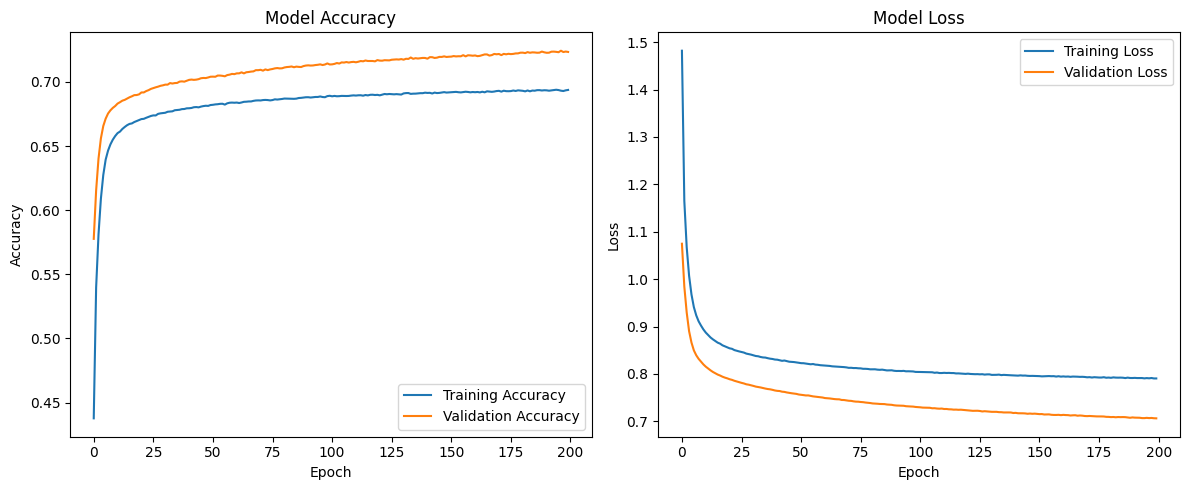



Implementing ensemble approach for improved accuracy...

Training model 1...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.4105 - loss: 1.7254 - val_accuracy: 0.5975 - val_loss: 1.0336
Epoch 2/100
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5297 - loss: 1.2190 - val_accuracy: 0.6193 - val_loss: 0.9794
Epoch 3/100
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5673 - loss: 1.1028 - val_accuracy: 0.6344 - val_loss: 0.9433
Epoch 4/100
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5932 - loss: 1.0372 - val_accuracy: 0.6461 - val_loss: 0.9133
Epoch 5/100
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6116 - loss: 0.9951 - val_accuracy: 0.6568 - val_loss: 0.8881
Epoch 6/100
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6257 - loss: 0.9628 - val_accuracy: 0.6632 - val_loss: 0.8662
Epoch 7/100
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6374 - loss: 0.9373 - val_accuracy: 0.6690 - val_loss: 0.8507
Epoch 8/100
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6444 - loss:

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/300
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4101 - loss: 1.6124
Epoch 1: val_accuracy improved from -inf to 0.60495, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 23s 11ms/step - accuracy: 0.4101 - loss: 1.6122 - val_accuracy: 0.6049 - val_loss: 1.0228 - learning_rate: 5.0000e-05
Epoch 2/300
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5626 - loss: 1.1312
Epoch 2: val_accuracy improved from 0.60495 to 0.62876, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.5626 - loss: 1.1312 - val_accuracy: 0.6288 - val_loss: 0.9585 - learning_rate: 5.0000e-05
Epoch 3/300
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5928 - loss: 1.0510
Epoch 3: val_accuracy improved from 0.62876 to 0.64162, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.5929 - loss: 1.0508 - val_accuracy: 0.6416 - val_loss: 0.9234 - learning_rate: 5.0000e-05
Epoch 4/300
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6113 - loss: 1.0049
Epoch 4: val_accuracy improved from 0.64162 to 0.65020, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6113 - loss: 1.0049 - val_accuracy: 0.6502 - val_loss: 0.9013 - learning_rate: 5.0000e-05
Epoch 5/300
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6223 - loss: 0.9772
Epoch 5: val_accuracy improved from 0.65020 to 0.65591, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6223 - loss: 0.9772 - val_accuracy: 0.6559 - val_loss: 0.8848 - learning_rate: 5.0000e-05
Epoch 6/300
1169/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6318 - loss: 0.9565
Epoch 6: val_accuracy improved from 0.65591 to 0.65923, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6318 - loss: 0.9565 - val_accuracy: 0.6592 - val_loss: 0.8731 - learning_rate: 5.0000e-05
Epoch 7/300
1158/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6370 - loss: 0.9406
Epoch 7: val_accuracy improved from 0.65923 to 0.66380, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6370 - loss: 0.9405 - val_accuracy: 0.6638 - val_loss: 0.8632 - learning_rate: 5.0000e-05
Epoch 8/300
1158/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6422 - loss: 0.9278
Epoch 8: val_accuracy improved from 0.66380 to 0.66708, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6422 - loss: 0.9278 - val_accuracy: 0.6671 - val_loss: 0.8543 - learning_rate: 5.0000e-05
Epoch 9/300
1158/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6462 - loss: 0.9171
Epoch 9: val_accuracy improved from 0.66708 to 0.66928, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6462 - loss: 0.9171 - val_accuracy: 0.6693 - val_loss: 0.8473 - learning_rate: 5.0000e-05
Epoch 10/300
1161/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6490 - loss: 0.9087
Epoch 10: val_accuracy improved from 0.66928 to 0.67180, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6490 - loss: 0.9087 - val_accuracy: 0.6718 - val_loss: 0.8409 - learning_rate: 5.0000e-05
Epoch 11/300
1166/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6525 - loss: 0.9007
Epoch 11: val_accuracy improved from 0.67180 to 0.67388, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6525 - loss: 0.9007 - val_accuracy: 0.6739 - val_loss: 0.8346 - learning_rate: 5.0000e-05
Epoch 12/300
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6551 - loss: 0.8938
Epoch 12: val_accuracy improved from 0.67388 to 0.67596, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6551 - loss: 0.8938 - val_accuracy: 0.6760 - val_loss: 0.8292 - learning_rate: 5.0000e-05
Epoch 13/300
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6571 - loss: 0.8881
Epoch 13: val_accuracy improved from 0.67596 to 0.67740, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6571 - loss: 0.8881 - val_accuracy: 0.6774 - val_loss: 0.8241 - learning_rate: 5.0000e-05
Epoch 14/300
1169/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6582 - loss: 0.8831
Epoch 14: val_accuracy improved from 0.67740 to 0.67921, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6582 - loss: 0.8831 - val_accuracy: 0.6792 - val_loss: 0.8196 - learning_rate: 5.0000e-05
Epoch 15/300
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6610 - loss: 0.8775
Epoch 15: val_accuracy improved from 0.67921 to 0.68088, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6610 - loss: 0.8775 - val_accuracy: 0.6809 - val_loss: 0.8151 - learning_rate: 5.0000e-05
Epoch 16/300
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6626 - loss: 0.8734
Epoch 16: val_accuracy improved from 0.68088 to 0.68292, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6626 - loss: 0.8734 - val_accuracy: 0.6829 - val_loss: 0.8105 - learning_rate: 5.0000e-05
Epoch 17/300
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6649 - loss: 0.8688
Epoch 17: val_accuracy improved from 0.68292 to 0.68490, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6649 - loss: 0.8688 - val_accuracy: 0.6849 - val_loss: 0.8065 - learning_rate: 5.0000e-05
Epoch 18/300
1159/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6659 - loss: 0.8638
Epoch 18: val_accuracy improved from 0.68490 to 0.68629, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6659 - loss: 0.8638 - val_accuracy: 0.6863 - val_loss: 0.8023 - learning_rate: 5.0000e-05
Epoch 19/300
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6669 - loss: 0.8607
Epoch 19: val_accuracy improved from 0.68629 to 0.68781, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6669 - loss: 0.8607 - val_accuracy: 0.6878 - val_loss: 0.7988 - learning_rate: 5.0000e-05
Epoch 20/300
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6687 - loss: 0.8559
Epoch 20: val_accuracy improved from 0.68781 to 0.68940, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6687 - loss: 0.8559 - val_accuracy: 0.6894 - val_loss: 0.7955 - learning_rate: 5.0000e-05
Epoch 21/300
1156/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6702 - loss: 0.8531
Epoch 21: val_accuracy improved from 0.68940 to 0.69034, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6702 - loss: 0.8531 - val_accuracy: 0.6903 - val_loss: 0.7917 - learning_rate: 5.0000e-05
Epoch 22/300
1157/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6713 - loss: 0.8506
Epoch 22: val_accuracy improved from 0.69034 to 0.69174, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6712 - loss: 0.8506 - val_accuracy: 0.6917 - val_loss: 0.7887 - learning_rate: 5.0000e-05
Epoch 23/300
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6727 - loss: 0.8469
Epoch 23: val_accuracy improved from 0.69174 to 0.69298, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6727 - loss: 0.8469 - val_accuracy: 0.6930 - val_loss: 0.7855 - learning_rate: 5.0000e-05
Epoch 24/300
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6734 - loss: 0.8435
Epoch 24: val_accuracy improved from 0.69298 to 0.69473, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6734 - loss: 0.8435 - val_accuracy: 0.6947 - val_loss: 0.7821 - learning_rate: 5.0000e-05
Epoch 25/300
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6739 - loss: 0.8419
Epoch 25: val_accuracy improved from 0.69473 to 0.69604, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6739 - loss: 0.8419 - val_accuracy: 0.6960 - val_loss: 0.7793 - learning_rate: 5.0000e-05
Epoch 26/300
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6754 - loss: 0.8384
Epoch 26: val_accuracy improved from 0.69604 to 0.69700, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6754 - loss: 0.8384 - val_accuracy: 0.6970 - val_loss: 0.7765 - learning_rate: 5.0000e-05
Epoch 27/300
1156/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6771 - loss: 0.8350
Epoch 27: val_accuracy improved from 0.69700 to 0.69843, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6771 - loss: 0.8351 - val_accuracy: 0.6984 - val_loss: 0.7735 - learning_rate: 5.0000e-05
Epoch 28/300
1157/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6775 - loss: 0.8337
Epoch 28: val_accuracy improved from 0.69843 to 0.69918, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6775 - loss: 0.8338 - val_accuracy: 0.6992 - val_loss: 0.7706 - learning_rate: 5.0000e-05
Epoch 29/300
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6783 - loss: 0.8308
Epoch 29: val_accuracy improved from 0.69918 to 0.70060, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6783 - loss: 0.8308 - val_accuracy: 0.7006 - val_loss: 0.7678 - learning_rate: 5.0000e-05
Epoch 30/300
1158/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6791 - loss: 0.8286
Epoch 30: val_accuracy improved from 0.70060 to 0.70176, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6791 - loss: 0.8286 - val_accuracy: 0.7018 - val_loss: 0.7651 - learning_rate: 5.0000e-05
Epoch 31/300
1159/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6803 - loss: 0.8259
Epoch 31: val_accuracy improved from 0.70176 to 0.70296, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6803 - loss: 0.8259 - val_accuracy: 0.7030 - val_loss: 0.7623 - learning_rate: 5.0000e-05
Epoch 32/300
1158/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6807 - loss: 0.8240
Epoch 32: val_accuracy improved from 0.70296 to 0.70360, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6807 - loss: 0.8241 - val_accuracy: 0.7036 - val_loss: 0.7599 - learning_rate: 5.0000e-05
Epoch 33/300
1160/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6809 - loss: 0.8226
Epoch 33: val_accuracy improved from 0.70360 to 0.70485, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6809 - loss: 0.8226 - val_accuracy: 0.7049 - val_loss: 0.7569 - learning_rate: 5.0000e-05
Epoch 34/300
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6822 - loss: 0.8199
Epoch 34: val_accuracy improved from 0.70485 to 0.70618, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6822 - loss: 0.8199 - val_accuracy: 0.7062 - val_loss: 0.7545 - learning_rate: 5.0000e-05
Epoch 35/300
1166/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6831 - loss: 0.8174
Epoch 35: val_accuracy improved from 0.70618 to 0.70667, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6831 - loss: 0.8174 - val_accuracy: 0.7067 - val_loss: 0.7522 - learning_rate: 5.0000e-05
Epoch 36/300
1155/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6842 - loss: 0.8160
Epoch 36: val_accuracy improved from 0.70667 to 0.70757, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6842 - loss: 0.8160 - val_accuracy: 0.7076 - val_loss: 0.7496 - learning_rate: 5.0000e-05
Epoch 37/300
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6844 - loss: 0.8135
Epoch 37: val_accuracy improved from 0.70757 to 0.70925, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6844 - loss: 0.8135 - val_accuracy: 0.7092 - val_loss: 0.7473 - learning_rate: 5.0000e-05
Epoch 38/300
1156/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6856 - loss: 0.8117
Epoch 38: val_accuracy improved from 0.70925 to 0.71005, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6855 - loss: 0.8117 - val_accuracy: 0.7101 - val_loss: 0.7449 - learning_rate: 5.0000e-05
Epoch 39/300
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6865 - loss: 0.8097
Epoch 39: val_accuracy improved from 0.71005 to 0.71094, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6865 - loss: 0.8097 - val_accuracy: 0.7109 - val_loss: 0.7423 - learning_rate: 5.0000e-05
Epoch 40/300
1157/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6871 - loss: 0.8083
Epoch 40: val_accuracy improved from 0.71094 to 0.71203, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6871 - loss: 0.8083 - val_accuracy: 0.7120 - val_loss: 0.7400 - learning_rate: 5.0000e-05
Epoch 41/300
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6872 - loss: 0.8065
Epoch 41: val_accuracy improved from 0.71203 to 0.71297, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6872 - loss: 0.8065 - val_accuracy: 0.7130 - val_loss: 0.7379 - learning_rate: 5.0000e-05
Epoch 42/300
1161/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6887 - loss: 0.8044
Epoch 42: val_accuracy improved from 0.71297 to 0.71352, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6887 - loss: 0.8044 - val_accuracy: 0.7135 - val_loss: 0.7356 - learning_rate: 5.0000e-05
Epoch 43/300
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6897 - loss: 0.8025
Epoch 43: val_accuracy improved from 0.71352 to 0.71452, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6897 - loss: 0.8025 - val_accuracy: 0.7145 - val_loss: 0.7332 - learning_rate: 5.0000e-05
Epoch 44/300
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6899 - loss: 0.8011
Epoch 44: val_accuracy improved from 0.71452 to 0.71512, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6898 - loss: 0.8011 - val_accuracy: 0.7151 - val_loss: 0.7308 - learning_rate: 5.0000e-05
Epoch 45/300
1160/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6904 - loss: 0.7987
Epoch 45: val_accuracy improved from 0.71512 to 0.71567, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6904 - loss: 0.7987 - val_accuracy: 0.7157 - val_loss: 0.7287 - learning_rate: 5.0000e-05
Epoch 46/300
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6915 - loss: 0.7975
Epoch 46: val_accuracy improved from 0.71567 to 0.71670, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6915 - loss: 0.7975 - val_accuracy: 0.7167 - val_loss: 0.7262 - learning_rate: 5.0000e-05
Epoch 47/300
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6915 - loss: 0.7956
Epoch 47: val_accuracy improved from 0.71670 to 0.71772, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6915 - loss: 0.7956 - val_accuracy: 0.7177 - val_loss: 0.7242 - learning_rate: 5.0000e-05
Epoch 48/300
1155/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6922 - loss: 0.7940
Epoch 48: val_accuracy improved from 0.71772 to 0.71893, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6921 - loss: 0.7940 - val_accuracy: 0.7189 - val_loss: 0.7218 - learning_rate: 5.0000e-05
Epoch 49/300
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6925 - loss: 0.7929
Epoch 49: val_accuracy improved from 0.71893 to 0.71926, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6925 - loss: 0.7929 - val_accuracy: 0.7193 - val_loss: 0.7196 - learning_rate: 5.0000e-05
Epoch 50/300
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6933 - loss: 0.7910
Epoch 50: val_accuracy improved from 0.71926 to 0.72058, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6933 - loss: 0.7910 - val_accuracy: 0.7206 - val_loss: 0.7175 - learning_rate: 5.0000e-05
Epoch 51/300
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6939 - loss: 0.7895
Epoch 51: val_accuracy improved from 0.72058 to 0.72120, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6939 - loss: 0.7895 - val_accuracy: 0.7212 - val_loss: 0.7151 - learning_rate: 5.0000e-05
Epoch 52/300
1161/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6944 - loss: 0.7886
Epoch 52: val_accuracy improved from 0.72120 to 0.72177, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6944 - loss: 0.7886 - val_accuracy: 0.7218 - val_loss: 0.7133 - learning_rate: 5.0000e-05
Epoch 53/300
1161/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6947 - loss: 0.7865
Epoch 53: val_accuracy improved from 0.72177 to 0.72222, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6947 - loss: 0.7865 - val_accuracy: 0.7222 - val_loss: 0.7111 - learning_rate: 5.0000e-05
Epoch 54/300
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6955 - loss: 0.7859
Epoch 54: val_accuracy improved from 0.72222 to 0.72366, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6955 - loss: 0.7859 - val_accuracy: 0.7237 - val_loss: 0.7086 - learning_rate: 5.0000e-05
Epoch 55/300
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6960 - loss: 0.7836
Epoch 55: val_accuracy improved from 0.72366 to 0.72473, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6960 - loss: 0.7836 - val_accuracy: 0.7247 - val_loss: 0.7062 - learning_rate: 5.0000e-05
Epoch 56/300
1169/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6960 - loss: 0.7834
Epoch 56: val_accuracy improved from 0.72473 to 0.72596, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6960 - loss: 0.7834 - val_accuracy: 0.7260 - val_loss: 0.7044 - learning_rate: 5.0000e-05
Epoch 57/300
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6970 - loss: 0.7804
Epoch 57: val_accuracy improved from 0.72596 to 0.72709, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6970 - loss: 0.7804 - val_accuracy: 0.7271 - val_loss: 0.7019 - learning_rate: 5.0000e-05
Epoch 58/300
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6968 - loss: 0.7799
Epoch 58: val_accuracy improved from 0.72709 to 0.72766, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6968 - loss: 0.7799 - val_accuracy: 0.7277 - val_loss: 0.6997 - learning_rate: 5.0000e-05
Epoch 59/300
1166/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6984 - loss: 0.7782
Epoch 59: val_accuracy improved from 0.72766 to 0.72857, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6984 - loss: 0.7782 - val_accuracy: 0.7286 - val_loss: 0.6976 - learning_rate: 5.0000e-05
Epoch 60/300
1157/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6981 - loss: 0.7775
Epoch 60: val_accuracy improved from 0.72857 to 0.72947, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6981 - loss: 0.7775 - val_accuracy: 0.7295 - val_loss: 0.6957 - learning_rate: 5.0000e-05
Epoch 61/300
1161/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6991 - loss: 0.7745
Epoch 61: val_accuracy did not improve from 0.72947
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6991 - loss: 0.7745 - val_accuracy: 0.7294 - val_loss: 0.6941 - learning_rate: 5.0000e-05
Epoch 62/300
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6995 - loss: 0.7741
Epoch 62: val_accuracy improved from 0.72947 to 0.73078, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6995 - loss: 0.7741 - val_accuracy: 0.7308 - val_loss: 0.6913 - learning_rate: 5.0000e-05
Epoch 63/300
1157/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6998 - loss: 0.7727
Epoch 63: val_accuracy improved from 0.73078 to 0.73164, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6998 - loss: 0.7727 - val_accuracy: 0.7316 - val_loss: 0.6894 - learning_rate: 5.0000e-05
Epoch 64/300
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7004 - loss: 0.7711
Epoch 64: val_accuracy improved from 0.73164 to 0.73206, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7004 - loss: 0.7712 - val_accuracy: 0.7321 - val_loss: 0.6876 - learning_rate: 5.0000e-05
Epoch 65/300
1166/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7010 - loss: 0.7703
Epoch 65: val_accuracy improved from 0.73206 to 0.73326, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7010 - loss: 0.7703 - val_accuracy: 0.7333 - val_loss: 0.6858 - learning_rate: 5.0000e-05
Epoch 66/300
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7017 - loss: 0.7689
Epoch 66: val_accuracy improved from 0.73326 to 0.73366, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7017 - loss: 0.7689 - val_accuracy: 0.7337 - val_loss: 0.6836 - learning_rate: 5.0000e-05
Epoch 67/300
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7016 - loss: 0.7682
Epoch 67: val_accuracy improved from 0.73366 to 0.73455, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7016 - loss: 0.7682 - val_accuracy: 0.7346 - val_loss: 0.6814 - learning_rate: 5.0000e-05
Epoch 68/300
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7031 - loss: 0.7658
Epoch 68: val_accuracy improved from 0.73455 to 0.73583, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7031 - loss: 0.7658 - val_accuracy: 0.7358 - val_loss: 0.6789 - learning_rate: 5.0000e-05
Epoch 69/300
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7033 - loss: 0.7645
Epoch 69: val_accuracy improved from 0.73583 to 0.73633, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7033 - loss: 0.7646 - val_accuracy: 0.7363 - val_loss: 0.6776 - learning_rate: 5.0000e-05
Epoch 70/300
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7036 - loss: 0.7634
Epoch 70: val_accuracy improved from 0.73633 to 0.73730, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7036 - loss: 0.7634 - val_accuracy: 0.7373 - val_loss: 0.6754 - learning_rate: 5.0000e-05
Epoch 71/300
1158/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7040 - loss: 0.7625
Epoch 71: val_accuracy improved from 0.73730 to 0.73766, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7040 - loss: 0.7625 - val_accuracy: 0.7377 - val_loss: 0.6732 - learning_rate: 5.0000e-05
Epoch 72/300
1158/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7049 - loss: 0.7614
Epoch 72: val_accuracy improved from 0.73766 to 0.73912, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7049 - loss: 0.7614 - val_accuracy: 0.7391 - val_loss: 0.6718 - learning_rate: 5.0000e-05
Epoch 73/300
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7050 - loss: 0.7596
Epoch 73: val_accuracy improved from 0.73912 to 0.73919, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7050 - loss: 0.7596 - val_accuracy: 0.7392 - val_loss: 0.6700 - learning_rate: 5.0000e-05
Epoch 74/300
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7055 - loss: 0.7584
Epoch 74: val_accuracy improved from 0.73919 to 0.74028, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7055 - loss: 0.7584 - val_accuracy: 0.7403 - val_loss: 0.6678 - learning_rate: 5.0000e-05
Epoch 75/300
1156/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7062 - loss: 0.7570
Epoch 75: val_accuracy improved from 0.74028 to 0.74129, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7062 - loss: 0.7570 - val_accuracy: 0.7413 - val_loss: 0.6656 - learning_rate: 5.0000e-05
Epoch 76/300
1169/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7062 - loss: 0.7571
Epoch 76: val_accuracy improved from 0.74129 to 0.74164, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7062 - loss: 0.7571 - val_accuracy: 0.7416 - val_loss: 0.6641 - learning_rate: 5.0000e-05
Epoch 77/300
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7072 - loss: 0.7549
Epoch 77: val_accuracy improved from 0.74164 to 0.74282, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7072 - loss: 0.7549 - val_accuracy: 0.7428 - val_loss: 0.6625 - learning_rate: 5.0000e-05
Epoch 78/300
1158/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7076 - loss: 0.7533
Epoch 78: val_accuracy improved from 0.74282 to 0.74302, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7076 - loss: 0.7534 - val_accuracy: 0.7430 - val_loss: 0.6605 - learning_rate: 5.0000e-05
Epoch 79/300
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7074 - loss: 0.7529
Epoch 79: val_accuracy improved from 0.74302 to 0.74407, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7074 - loss: 0.7529 - val_accuracy: 0.7441 - val_loss: 0.6582 - learning_rate: 5.0000e-05
Epoch 80/300
1160/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7082 - loss: 0.7517
Epoch 80: val_accuracy improved from 0.74407 to 0.74515, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7082 - loss: 0.7517 - val_accuracy: 0.7451 - val_loss: 0.6566 - learning_rate: 5.0000e-05
Epoch 81/300
1155/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7080 - loss: 0.7514
Epoch 81: val_accuracy improved from 0.74515 to 0.74582, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7080 - loss: 0.7515 - val_accuracy: 0.7458 - val_loss: 0.6543 - learning_rate: 5.0000e-05
Epoch 82/300
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7092 - loss: 0.7504
Epoch 82: val_accuracy improved from 0.74582 to 0.74774, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7092 - loss: 0.7504 - val_accuracy: 0.7477 - val_loss: 0.6524 - learning_rate: 5.0000e-05
Epoch 83/300
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7096 - loss: 0.7481
Epoch 83: val_accuracy improved from 0.74774 to 0.74812, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7096 - loss: 0.7481 - val_accuracy: 0.7481 - val_loss: 0.6508 - learning_rate: 5.0000e-05
Epoch 84/300
1157/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7095 - loss: 0.7472
Epoch 84: val_accuracy improved from 0.74812 to 0.74849, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7095 - loss: 0.7472 - val_accuracy: 0.7485 - val_loss: 0.6490 - learning_rate: 5.0000e-05
Epoch 85/300
1160/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7103 - loss: 0.7472
Epoch 85: val_accuracy improved from 0.74849 to 0.74910, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7103 - loss: 0.7472 - val_accuracy: 0.7491 - val_loss: 0.6470 - learning_rate: 5.0000e-05
Epoch 86/300
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7108 - loss: 0.7453
Epoch 86: val_accuracy improved from 0.74910 to 0.74993, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7108 - loss: 0.7453 - val_accuracy: 0.7499 - val_loss: 0.6455 - learning_rate: 5.0000e-05
Epoch 87/300
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7106 - loss: 0.7448
Epoch 87: val_accuracy improved from 0.74993 to 0.75106, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7106 - loss: 0.7448 - val_accuracy: 0.7511 - val_loss: 0.6438 - learning_rate: 5.0000e-05
Epoch 88/300
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7113 - loss: 0.7436
Epoch 88: val_accuracy improved from 0.75106 to 0.75153, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7113 - loss: 0.7436 - val_accuracy: 0.7515 - val_loss: 0.6421 - learning_rate: 5.0000e-05
Epoch 89/300
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7113 - loss: 0.7433
Epoch 89: val_accuracy improved from 0.75153 to 0.75223, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7113 - loss: 0.7433 - val_accuracy: 0.7522 - val_loss: 0.6402 - learning_rate: 5.0000e-05
Epoch 90/300
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7125 - loss: 0.7408
Epoch 90: val_accuracy improved from 0.75223 to 0.75246, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7125 - loss: 0.7408 - val_accuracy: 0.7525 - val_loss: 0.6383 - learning_rate: 5.0000e-05
Epoch 91/300
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7126 - loss: 0.7408
Epoch 91: val_accuracy improved from 0.75246 to 0.75261, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7125 - loss: 0.7408 - val_accuracy: 0.7526 - val_loss: 0.6367 - learning_rate: 5.0000e-05
Epoch 92/300
1158/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7126 - loss: 0.7395
Epoch 92: val_accuracy improved from 0.75261 to 0.75388, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7126 - loss: 0.7395 - val_accuracy: 0.7539 - val_loss: 0.6351 - learning_rate: 5.0000e-05
Epoch 93/300
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7130 - loss: 0.7385
Epoch 93: val_accuracy improved from 0.75388 to 0.75435, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7130 - loss: 0.7385 - val_accuracy: 0.7543 - val_loss: 0.6329 - learning_rate: 5.0000e-05
Epoch 94/300
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7137 - loss: 0.7377
Epoch 94: val_accuracy improved from 0.75435 to 0.75550, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7137 - loss: 0.7377 - val_accuracy: 0.7555 - val_loss: 0.6318 - learning_rate: 5.0000e-05
Epoch 95/300
1159/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7141 - loss: 0.7365
Epoch 95: val_accuracy improved from 0.75550 to 0.75616, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7141 - loss: 0.7365 - val_accuracy: 0.7562 - val_loss: 0.6300 - learning_rate: 5.0000e-05
Epoch 96/300
1157/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7148 - loss: 0.7347
Epoch 96: val_accuracy improved from 0.75616 to 0.75673, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7148 - loss: 0.7347 - val_accuracy: 0.7567 - val_loss: 0.6278 - learning_rate: 5.0000e-05
Epoch 97/300
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7141 - loss: 0.7343
Epoch 97: val_accuracy improved from 0.75673 to 0.75703, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7141 - loss: 0.7343 - val_accuracy: 0.7570 - val_loss: 0.6264 - learning_rate: 5.0000e-05
Epoch 98/300
1166/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7148 - loss: 0.7332
Epoch 98: val_accuracy improved from 0.75703 to 0.75812, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7148 - loss: 0.7332 - val_accuracy: 0.7581 - val_loss: 0.6250 - learning_rate: 5.0000e-05
Epoch 99/300
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7159 - loss: 0.7322
Epoch 99: val_accuracy improved from 0.75812 to 0.75879, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7159 - loss: 0.7322 - val_accuracy: 0.7588 - val_loss: 0.6234 - learning_rate: 5.0000e-05
Epoch 100/300
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7152 - loss: 0.7323
Epoch 100: val_accuracy improved from 0.75879 to 0.75921, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7152 - loss: 0.7323 - val_accuracy: 0.7592 - val_loss: 0.6215 - learning_rate: 5.0000e-05
Epoch 101/300
1166/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7159 - loss: 0.7300
Epoch 101: val_accuracy improved from 0.75921 to 0.76026, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7159 - loss: 0.7300 - val_accuracy: 0.7603 - val_loss: 0.6198 - learning_rate: 5.0000e-05
Epoch 102/300
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7169 - loss: 0.7293
Epoch 102: val_accuracy improved from 0.76026 to 0.76090, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7169 - loss: 0.7293 - val_accuracy: 0.7609 - val_loss: 0.6175 - learning_rate: 5.0000e-05
Epoch 103/300
1160/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7172 - loss: 0.7287
Epoch 103: val_accuracy improved from 0.76090 to 0.76171, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7172 - loss: 0.7287 - val_accuracy: 0.7617 - val_loss: 0.6162 - learning_rate: 5.0000e-05
Epoch 104/300
1169/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7178 - loss: 0.7268
Epoch 104: val_accuracy improved from 0.76171 to 0.76251, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7178 - loss: 0.7268 - val_accuracy: 0.7625 - val_loss: 0.6147 - learning_rate: 5.0000e-05
Epoch 105/300
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7177 - loss: 0.7269
Epoch 105: val_accuracy did not improve from 0.76251
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7176 - loss: 0.7269 - val_accuracy: 0.7624 - val_loss: 0.6132 - learning_rate: 5.0000e-05
Epoch 106/300
1160/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7189 - loss: 0.7258
Epoch 106: val_accuracy improved from 0.76251 to 0.76371, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7188 - loss: 0.7258 - val_accuracy: 0.7637 - val_loss: 0.6115 - learning_rate: 5.0000e-05
Epoch 107/300
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7180 - loss: 0.7256
Epoch 107: val_accuracy improved from 0.76371 to 0.76386, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7180 - loss: 0.7256 - val_accuracy: 0.7639 - val_loss: 0.6105 - learning_rate: 5.0000e-05
Epoch 108/300
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7184 - loss: 0.7243
Epoch 108: val_accuracy improved from 0.76386 to 0.76494, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7184 - loss: 0.7243 - val_accuracy: 0.7649 - val_loss: 0.6088 - learning_rate: 5.0000e-05
Epoch 109/300
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7187 - loss: 0.7244
Epoch 109: val_accuracy improved from 0.76494 to 0.76557, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7187 - loss: 0.7244 - val_accuracy: 0.7656 - val_loss: 0.6080 - learning_rate: 5.0000e-05
Epoch 110/300
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7190 - loss: 0.7229
Epoch 110: val_accuracy improved from 0.76557 to 0.76652, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7190 - loss: 0.7229 - val_accuracy: 0.7665 - val_loss: 0.6058 - learning_rate: 5.0000e-05
Epoch 111/300
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7198 - loss: 0.7216
Epoch 111: val_accuracy improved from 0.76652 to 0.76690, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7198 - loss: 0.7216 - val_accuracy: 0.7669 - val_loss: 0.6044 - learning_rate: 5.0000e-05
Epoch 112/300
1166/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7210 - loss: 0.7201
Epoch 112: val_accuracy improved from 0.76690 to 0.76714, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7210 - loss: 0.7201 - val_accuracy: 0.7671 - val_loss: 0.6026 - learning_rate: 5.0000e-05
Epoch 113/300
1156/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7202 - loss: 0.7203
Epoch 113: val_accuracy improved from 0.76714 to 0.76797, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7202 - loss: 0.7203 - val_accuracy: 0.7680 - val_loss: 0.6013 - learning_rate: 5.0000e-05
Epoch 114/300
1156/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7198 - loss: 0.7203
Epoch 114: val_accuracy improved from 0.76797 to 0.76905, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7198 - loss: 0.7203 - val_accuracy: 0.7691 - val_loss: 0.5996 - learning_rate: 5.0000e-05
Epoch 115/300
1159/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7208 - loss: 0.7191
Epoch 115: val_accuracy improved from 0.76905 to 0.77017, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7208 - loss: 0.7191 - val_accuracy: 0.7702 - val_loss: 0.5983 - learning_rate: 5.0000e-05
Epoch 116/300
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7216 - loss: 0.7175
Epoch 116: val_accuracy did not improve from 0.77017
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7216 - loss: 0.7175 - val_accuracy: 0.7695 - val_loss: 0.5973 - learning_rate: 5.0000e-05
Epoch 117/300
1157/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7214 - loss: 0.7175
Epoch 117: val_accuracy improved from 0.77017 to 0.77095, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7214 - loss: 0.7175 - val_accuracy: 0.7709 - val_loss: 0.5962 - learning_rate: 5.0000e-05
Epoch 118/300
1166/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7218 - loss: 0.7175
Epoch 118: val_accuracy improved from 0.77095 to 0.77133, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7217 - loss: 0.7175 - val_accuracy: 0.7713 - val_loss: 0.5948 - learning_rate: 5.0000e-05
Epoch 119/300
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7225 - loss: 0.7158
Epoch 119: val_accuracy improved from 0.77133 to 0.77179, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7225 - loss: 0.7158 - val_accuracy: 0.7718 - val_loss: 0.5933 - learning_rate: 5.0000e-05
Epoch 120/300
1156/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7222 - loss: 0.7157
Epoch 120: val_accuracy improved from 0.77179 to 0.77207, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7222 - loss: 0.7157 - val_accuracy: 0.7721 - val_loss: 0.5922 - learning_rate: 5.0000e-05
Epoch 121/300
1160/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7227 - loss: 0.7135
Epoch 121: val_accuracy improved from 0.77207 to 0.77292, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7227 - loss: 0.7135 - val_accuracy: 0.7729 - val_loss: 0.5909 - learning_rate: 5.0000e-05
Epoch 122/300
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7224 - loss: 0.7137
Epoch 122: val_accuracy improved from 0.77292 to 0.77417, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7224 - loss: 0.7137 - val_accuracy: 0.7742 - val_loss: 0.5898 - learning_rate: 5.0000e-05
Epoch 123/300
1159/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7238 - loss: 0.7125
Epoch 123: val_accuracy did not improve from 0.77417
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7238 - loss: 0.7125 - val_accuracy: 0.7742 - val_loss: 0.5880 - learning_rate: 5.0000e-05
Epoch 124/300
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7239 - loss: 0.7117
Epoch 124: val_accuracy improved from 0.77417 to 0.77482, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7239 - loss: 0.7117 - val_accuracy: 0.7748 - val_loss: 0.5863 - learning_rate: 5.0000e-05
Epoch 125/300
1166/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7236 - loss: 0.7110
Epoch 125: val_accuracy improved from 0.77482 to 0.77566, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7236 - loss: 0.7110 - val_accuracy: 0.7757 - val_loss: 0.5855 - learning_rate: 5.0000e-05
Epoch 126/300
1160/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7240 - loss: 0.7109
Epoch 126: val_accuracy improved from 0.77566 to 0.77662, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7240 - loss: 0.7109 - val_accuracy: 0.7766 - val_loss: 0.5842 - learning_rate: 5.0000e-05
Epoch 127/300
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7242 - loss: 0.7097
Epoch 127: val_accuracy improved from 0.77662 to 0.77704, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7242 - loss: 0.7097 - val_accuracy: 0.7770 - val_loss: 0.5829 - learning_rate: 5.0000e-05
Epoch 128/300
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7253 - loss: 0.7091
Epoch 128: val_accuracy improved from 0.77704 to 0.77730, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7253 - loss: 0.7091 - val_accuracy: 0.7773 - val_loss: 0.5815 - learning_rate: 5.0000e-05
Epoch 129/300
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7252 - loss: 0.7070
Epoch 129: val_accuracy improved from 0.77730 to 0.77784, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7251 - loss: 0.7071 - val_accuracy: 0.7778 - val_loss: 0.5799 - learning_rate: 5.0000e-05
Epoch 130/300
1160/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7254 - loss: 0.7062
Epoch 130: val_accuracy improved from 0.77784 to 0.77819, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7254 - loss: 0.7062 - val_accuracy: 0.7782 - val_loss: 0.5788 - learning_rate: 5.0000e-05
Epoch 131/300
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7257 - loss: 0.7072
Epoch 131: val_accuracy improved from 0.77819 to 0.77925, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7257 - loss: 0.7072 - val_accuracy: 0.7793 - val_loss: 0.5778 - learning_rate: 5.0000e-05
Epoch 132/300
1169/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7254 - loss: 0.7061
Epoch 132: val_accuracy improved from 0.77925 to 0.77995, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7254 - loss: 0.7061 - val_accuracy: 0.7800 - val_loss: 0.5760 - learning_rate: 5.0000e-05
Epoch 133/300
1166/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7252 - loss: 0.7060
Epoch 133: val_accuracy improved from 0.77995 to 0.78085, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7252 - loss: 0.7060 - val_accuracy: 0.7808 - val_loss: 0.5757 - learning_rate: 5.0000e-05
Epoch 134/300
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7261 - loss: 0.7056
Epoch 134: val_accuracy did not improve from 0.78085
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7261 - loss: 0.7056 - val_accuracy: 0.7808 - val_loss: 0.5742 - learning_rate: 5.0000e-05
Epoch 135/300
1159/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7273 - loss: 0.7037
Epoch 135: val_accuracy improved from 0.78085 to 0.78168, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7273 - loss: 0.7037 - val_accuracy: 0.7817 - val_loss: 0.5725 - learning_rate: 5.0000e-05
Epoch 136/300
1161/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7267 - loss: 0.7036
Epoch 136: val_accuracy did not improve from 0.78168
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7266 - loss: 0.7036 - val_accuracy: 0.7814 - val_loss: 0.5720 - learning_rate: 5.0000e-05
Epoch 137/300
1169/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7269 - loss: 0.7031
Epoch 137: val_accuracy improved from 0.78168 to 0.78242, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7269 - loss: 0.7031 - val_accuracy: 0.7824 - val_loss: 0.5708 - learning_rate: 5.0000e-05
Epoch 138/300
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7274 - loss: 0.7024
Epoch 138: val_accuracy did not improve from 0.78242
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7274 - loss: 0.7024 - val_accuracy: 0.7823 - val_loss: 0.5702 - learning_rate: 5.0000e-05
Epoch 139/300
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7274 - loss: 0.7018
Epoch 139: val_accuracy improved from 0.78242 to 0.78349, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7274 - loss: 0.7018 - val_accuracy: 0.7835 - val_loss: 0.5678 - learning_rate: 5.0000e-05
Epoch 140/300
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7276 - loss: 0.7010
Epoch 140: val_accuracy improved from 0.78349 to 0.78379, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7276 - loss: 0.7010 - val_accuracy: 0.7838 - val_loss: 0.5677 - learning_rate: 5.0000e-05
Epoch 141/300
1156/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7288 - loss: 0.6999
Epoch 141: val_accuracy improved from 0.78379 to 0.78471, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7288 - loss: 0.6999 - val_accuracy: 0.7847 - val_loss: 0.5657 - learning_rate: 5.0000e-05
Epoch 142/300
1169/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7285 - loss: 0.6996
Epoch 142: val_accuracy did not improve from 0.78471
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7285 - loss: 0.6997 - val_accuracy: 0.7845 - val_loss: 0.5649 - learning_rate: 5.0000e-05
Epoch 143/300
1161/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7280 - loss: 0.6997
Epoch 143: val_accuracy improved from 0.78471 to 0.78597, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7279 - loss: 0.6997 - val_accuracy: 0.7860 - val_loss: 0.5628 - learning_rate: 5.0000e-05
Epoch 144/300
1159/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7292 - loss: 0.6985
Epoch 144: val_accuracy did not improve from 0.78597
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7291 - loss: 0.6986 - val_accuracy: 0.7858 - val_loss: 0.5620 - learning_rate: 5.0000e-05
Epoch 145/300
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7285 - loss: 0.6982
Epoch 145: val_accuracy improved from 0.78597 to 0.78636, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7285 - loss: 0.6982 - val_accuracy: 0.7864 - val_loss: 0.5609 - learning_rate: 5.0000e-05
Epoch 146/300
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7297 - loss: 0.6980
Epoch 146: val_accuracy improved from 0.78636 to 0.78720, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7297 - loss: 0.6980 - val_accuracy: 0.7872 - val_loss: 0.5601 - learning_rate: 5.0000e-05
Epoch 147/300
1158/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7298 - loss: 0.6971
Epoch 147: val_accuracy improved from 0.78720 to 0.78773, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7298 - loss: 0.6971 - val_accuracy: 0.7877 - val_loss: 0.5592 - learning_rate: 5.0000e-05
Epoch 148/300
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7300 - loss: 0.6965
Epoch 148: val_accuracy improved from 0.78773 to 0.78835, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7300 - loss: 0.6965 - val_accuracy: 0.7884 - val_loss: 0.5575 - learning_rate: 5.0000e-05
Epoch 149/300
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7295 - loss: 0.6966
Epoch 149: val_accuracy improved from 0.78835 to 0.78882, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7295 - loss: 0.6966 - val_accuracy: 0.7888 - val_loss: 0.5561 - learning_rate: 5.0000e-05
Epoch 150/300
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7301 - loss: 0.6957
Epoch 150: val_accuracy improved from 0.78882 to 0.78931, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7301 - loss: 0.6957 - val_accuracy: 0.7893 - val_loss: 0.5564 - learning_rate: 5.0000e-05
Epoch 151/300
1161/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7305 - loss: 0.6944
Epoch 151: val_accuracy did not improve from 0.78931
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7304 - loss: 0.6944 - val_accuracy: 0.7892 - val_loss: 0.5546 - learning_rate: 5.0000e-05
Epoch 152/300
1169/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7311 - loss: 0.6947
Epoch 152: val_accuracy improved from 0.78931 to 0.79041, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7311 - loss: 0.6947 - val_accuracy: 0.7904 - val_loss: 0.5539 - learning_rate: 5.0000e-05
Epoch 153/300
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7314 - loss: 0.6929
Epoch 153: val_accuracy improved from 0.79041 to 0.79077, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7314 - loss: 0.6930 - val_accuracy: 0.7908 - val_loss: 0.5528 - learning_rate: 5.0000e-05
Epoch 154/300
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7313 - loss: 0.6927
Epoch 154: val_accuracy improved from 0.79077 to 0.79123, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7313 - loss: 0.6928 - val_accuracy: 0.7912 - val_loss: 0.5520 - learning_rate: 5.0000e-05
Epoch 155/300
1157/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7319 - loss: 0.6922
Epoch 155: val_accuracy improved from 0.79123 to 0.79171, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7319 - loss: 0.6922 - val_accuracy: 0.7917 - val_loss: 0.5507 - learning_rate: 5.0000e-05
Epoch 156/300
1158/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7317 - loss: 0.6926
Epoch 156: val_accuracy improved from 0.79171 to 0.79213, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7317 - loss: 0.6926 - val_accuracy: 0.7921 - val_loss: 0.5502 - learning_rate: 5.0000e-05
Epoch 157/300
1169/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7318 - loss: 0.6915
Epoch 157: val_accuracy improved from 0.79213 to 0.79242, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7318 - loss: 0.6915 - val_accuracy: 0.7924 - val_loss: 0.5497 - learning_rate: 5.0000e-05
Epoch 158/300
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7320 - loss: 0.6912
Epoch 158: val_accuracy improved from 0.79242 to 0.79269, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7320 - loss: 0.6912 - val_accuracy: 0.7927 - val_loss: 0.5486 - learning_rate: 5.0000e-05
Epoch 159/300
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7325 - loss: 0.6905
Epoch 159: val_accuracy improved from 0.79269 to 0.79290, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7325 - loss: 0.6905 - val_accuracy: 0.7929 - val_loss: 0.5478 - learning_rate: 5.0000e-05
Epoch 160/300
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7331 - loss: 0.6898
Epoch 160: val_accuracy improved from 0.79290 to 0.79329, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7331 - loss: 0.6898 - val_accuracy: 0.7933 - val_loss: 0.5462 - learning_rate: 5.0000e-05
Epoch 161/300
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7320 - loss: 0.6900
Epoch 161: val_accuracy improved from 0.79329 to 0.79386, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7320 - loss: 0.6900 - val_accuracy: 0.7939 - val_loss: 0.5460 - learning_rate: 5.0000e-05
Epoch 162/300
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7323 - loss: 0.6899
Epoch 162: val_accuracy improved from 0.79386 to 0.79472, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7323 - loss: 0.6899 - val_accuracy: 0.7947 - val_loss: 0.5447 - learning_rate: 5.0000e-05
Epoch 163/300
1161/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7327 - loss: 0.6898
Epoch 163: val_accuracy improved from 0.79472 to 0.79511, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7327 - loss: 0.6898 - val_accuracy: 0.7951 - val_loss: 0.5436 - learning_rate: 5.0000e-05
Epoch 164/300
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7334 - loss: 0.6886
Epoch 164: val_accuracy improved from 0.79511 to 0.79560, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7334 - loss: 0.6886 - val_accuracy: 0.7956 - val_loss: 0.5426 - learning_rate: 5.0000e-05
Epoch 165/300
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7338 - loss: 0.6872
Epoch 165: val_accuracy improved from 0.79560 to 0.79604, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7337 - loss: 0.6872 - val_accuracy: 0.7960 - val_loss: 0.5417 - learning_rate: 5.0000e-05
Epoch 166/300
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7337 - loss: 0.6877
Epoch 166: val_accuracy did not improve from 0.79604
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7337 - loss: 0.6877 - val_accuracy: 0.7959 - val_loss: 0.5420 - learning_rate: 5.0000e-05
Epoch 167/300
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7343 - loss: 0.6869
Epoch 167: val_accuracy improved from 0.79604 to 0.79702, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7343 - loss: 0.6869 - val_accuracy: 0.7970 - val_loss: 0.5400 - learning_rate: 5.0000e-05
Epoch 168/300
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7337 - loss: 0.6867
Epoch 168: val_accuracy improved from 0.79702 to 0.79705, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7337 - loss: 0.6867 - val_accuracy: 0.7970 - val_loss: 0.5397 - learning_rate: 5.0000e-05
Epoch 169/300
1161/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7340 - loss: 0.6870
Epoch 169: val_accuracy improved from 0.79705 to 0.79716, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7340 - loss: 0.6870 - val_accuracy: 0.7972 - val_loss: 0.5384 - learning_rate: 5.0000e-05
Epoch 170/300
1166/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7338 - loss: 0.6865
Epoch 170: val_accuracy improved from 0.79716 to 0.79805, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7338 - loss: 0.6865 - val_accuracy: 0.7981 - val_loss: 0.5373 - learning_rate: 5.0000e-05
Epoch 171/300
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7353 - loss: 0.6853
Epoch 171: val_accuracy improved from 0.79805 to 0.79824, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7353 - loss: 0.6853 - val_accuracy: 0.7982 - val_loss: 0.5376 - learning_rate: 5.0000e-05
Epoch 172/300
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7345 - loss: 0.6849
Epoch 172: val_accuracy did not improve from 0.79824
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7345 - loss: 0.6849 - val_accuracy: 0.7980 - val_loss: 0.5360 - learning_rate: 5.0000e-05
Epoch 173/300
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7353 - loss: 0.6836
Epoch 173: val_accuracy improved from 0.79824 to 0.79866, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7353 - loss: 0.6836 - val_accuracy: 0.7987 - val_loss: 0.5346 - learning_rate: 5.0000e-05
Epoch 174/300
1158/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7354 - loss: 0.6838
Epoch 174: val_accuracy improved from 0.79866 to 0.79918, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7354 - loss: 0.6839 - val_accuracy: 0.7992 - val_loss: 0.5340 - learning_rate: 5.0000e-05
Epoch 175/300
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7359 - loss: 0.6838
Epoch 175: val_accuracy improved from 0.79918 to 0.79987, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7359 - loss: 0.6838 - val_accuracy: 0.7999 - val_loss: 0.5333 - learning_rate: 5.0000e-05
Epoch 176/300
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7352 - loss: 0.6829
Epoch 176: val_accuracy improved from 0.79987 to 0.80010, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7352 - loss: 0.6829 - val_accuracy: 0.8001 - val_loss: 0.5328 - learning_rate: 5.0000e-05
Epoch 177/300
1158/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7353 - loss: 0.6820
Epoch 177: val_accuracy improved from 0.80010 to 0.80012, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7353 - loss: 0.6820 - val_accuracy: 0.8001 - val_loss: 0.5320 - learning_rate: 5.0000e-05
Epoch 178/300
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7357 - loss: 0.6827
Epoch 178: val_accuracy improved from 0.80012 to 0.80162, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7357 - loss: 0.6827 - val_accuracy: 0.8016 - val_loss: 0.5306 - learning_rate: 5.0000e-05
Epoch 179/300
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7360 - loss: 0.6814
Epoch 179: val_accuracy did not improve from 0.80162
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7360 - loss: 0.6814 - val_accuracy: 0.8012 - val_loss: 0.5301 - learning_rate: 5.0000e-05
Epoch 180/300
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7366 - loss: 0.6820
Epoch 180: val_accuracy improved from 0.80162 to 0.80233, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7366 - loss: 0.6820 - val_accuracy: 0.8023 - val_loss: 0.5292 - learning_rate: 5.0000e-05
Epoch 181/300
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7360 - loss: 0.6813
Epoch 181: val_accuracy did not improve from 0.80233
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7360 - loss: 0.6813 - val_accuracy: 0.8021 - val_loss: 0.5275 - learning_rate: 5.0000e-05
Epoch 182/300
1157/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7366 - loss: 0.6802
Epoch 182: val_accuracy did not improve from 0.80233
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7366 - loss: 0.6802 - val_accuracy: 0.8020 - val_loss: 0.5285 - learning_rate: 5.0000e-05
Epoch 183/300
1169/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7366 - loss: 0.6802
Epoch 183: val_accuracy improved from 0.80233 to 0.80287, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7366 - loss: 0.6802 - val_accuracy: 0.8029 - val_loss: 0.5275 - learning_rate: 5.0000e-05
Epoch 184/300
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7372 - loss: 0.6798
Epoch 184: val_accuracy did not improve from 0.80287
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7372 - loss: 0.6798 - val_accuracy: 0.8028 - val_loss: 0.5264 - learning_rate: 5.0000e-05
Epoch 185/300
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7371 - loss: 0.6790
Epoch 185: val_accuracy improved from 0.80287 to 0.80429, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7371 - loss: 0.6790 - val_accuracy: 0.8043 - val_loss: 0.5251 - learning_rate: 5.0000e-05
Epoch 186/300
1156/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7372 - loss: 0.6791
Epoch 186: val_accuracy did not improve from 0.80429
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7372 - loss: 0.6791 - val_accuracy: 0.8030 - val_loss: 0.5262 - learning_rate: 5.0000e-05
Epoch 187/300
1160/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7376 - loss: 0.6784
Epoch 187: val_accuracy improved from 0.80429 to 0.80468, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7376 - loss: 0.6784 - val_accuracy: 0.8047 - val_loss: 0.5226 - learning_rate: 5.0000e-05
Epoch 188/300
1158/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7376 - loss: 0.6777
Epoch 188: val_accuracy improved from 0.80468 to 0.80492, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7376 - loss: 0.6777 - val_accuracy: 0.8049 - val_loss: 0.5230 - learning_rate: 5.0000e-05
Epoch 189/300
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7368 - loss: 0.6787
Epoch 189: val_accuracy did not improve from 0.80492
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7368 - loss: 0.6787 - val_accuracy: 0.8045 - val_loss: 0.5232 - learning_rate: 5.0000e-05
Epoch 190/300
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7384 - loss: 0.6766
Epoch 190: val_accuracy improved from 0.80492 to 0.80513, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7384 - loss: 0.6766 - val_accuracy: 0.8051 - val_loss: 0.5219 - learning_rate: 5.0000e-05
Epoch 191/300
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7374 - loss: 0.6776
Epoch 191: val_accuracy improved from 0.80513 to 0.80597, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7374 - loss: 0.6776 - val_accuracy: 0.8060 - val_loss: 0.5206 - learning_rate: 5.0000e-05
Epoch 192/300
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7387 - loss: 0.6760
Epoch 192: val_accuracy improved from 0.80597 to 0.80637, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7387 - loss: 0.6760 - val_accuracy: 0.8064 - val_loss: 0.5199 - learning_rate: 5.0000e-05
Epoch 193/300
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7373 - loss: 0.6772
Epoch 193: val_accuracy did not improve from 0.80637
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7373 - loss: 0.6772 - val_accuracy: 0.8062 - val_loss: 0.5207 - learning_rate: 5.0000e-05
Epoch 194/300
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7383 - loss: 0.6755
Epoch 194: val_accuracy improved from 0.80637 to 0.80754, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7383 - loss: 0.6755 - val_accuracy: 0.8075 - val_loss: 0.5186 - learning_rate: 5.0000e-05
Epoch 195/300
1158/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7380 - loss: 0.6760
Epoch 195: val_accuracy did not improve from 0.80754
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7380 - loss: 0.6760 - val_accuracy: 0.8073 - val_loss: 0.5189 - learning_rate: 5.0000e-05
Epoch 196/300
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7394 - loss: 0.6752
Epoch 196: val_accuracy improved from 0.80754 to 0.80846, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7394 - loss: 0.6752 - val_accuracy: 0.8085 - val_loss: 0.5177 - learning_rate: 5.0000e-05
Epoch 197/300
1161/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7387 - loss: 0.6743
Epoch 197: val_accuracy did not improve from 0.80846
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7387 - loss: 0.6744 - val_accuracy: 0.8081 - val_loss: 0.5177 - learning_rate: 5.0000e-05
Epoch 198/300
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7396 - loss: 0.6734
Epoch 198: val_accuracy improved from 0.80846 to 0.80857, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7396 - loss: 0.6734 - val_accuracy: 0.8086 - val_loss: 0.5164 - learning_rate: 5.0000e-05
Epoch 199/300
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7399 - loss: 0.6740
Epoch 199: val_accuracy improved from 0.80857 to 0.80878, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7399 - loss: 0.6740 - val_accuracy: 0.8088 - val_loss: 0.5165 - learning_rate: 5.0000e-05
Epoch 200/300
1169/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7395 - loss: 0.6736
Epoch 200: val_accuracy improved from 0.80878 to 0.80924, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7395 - loss: 0.6736 - val_accuracy: 0.8092 - val_loss: 0.5150 - learning_rate: 5.0000e-05
Epoch 201/300
1160/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7392 - loss: 0.6733
Epoch 201: val_accuracy improved from 0.80924 to 0.80952, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7392 - loss: 0.6734 - val_accuracy: 0.8095 - val_loss: 0.5145 - learning_rate: 5.0000e-05
Epoch 202/300
1169/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7401 - loss: 0.6735
Epoch 202: val_accuracy improved from 0.80952 to 0.81021, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7401 - loss: 0.6735 - val_accuracy: 0.8102 - val_loss: 0.5135 - learning_rate: 5.0000e-05
Epoch 203/300
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7406 - loss: 0.6717
Epoch 203: val_accuracy did not improve from 0.81021
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7406 - loss: 0.6717 - val_accuracy: 0.8092 - val_loss: 0.5127 - learning_rate: 5.0000e-05
Epoch 204/300
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7396 - loss: 0.6725
Epoch 204: val_accuracy improved from 0.81021 to 0.81102, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7396 - loss: 0.6725 - val_accuracy: 0.8110 - val_loss: 0.5127 - learning_rate: 5.0000e-05
Epoch 205/300
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7402 - loss: 0.6723
Epoch 205: val_accuracy did not improve from 0.81102
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7402 - loss: 0.6723 - val_accuracy: 0.8108 - val_loss: 0.5117 - learning_rate: 5.0000e-05
Epoch 206/300
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7405 - loss: 0.6718
Epoch 206: val_accuracy did not improve from 0.81102
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7405 - loss: 0.6718 - val_accuracy: 0.8110 - val_loss: 0.5113 - learning_rate: 5.0000e-05
Epoch 207/300
1161/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7403 - loss: 0.6716
Epoch 207: val_accuracy improved from 0.81102 to 0.81141, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7403 - loss: 0.6716 - val_accuracy: 0.8114 - val_loss: 0.5106 - learning_rate: 5.0000e-05
Epoch 208/300
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7400 - loss: 0.6719
Epoch 208: val_accuracy did not improve from 0.81141
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7400 - loss: 0.6719 - val_accuracy: 0.8111 - val_loss: 0.5106 - learning_rate: 5.0000e-05
Epoch 209/300
1161/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7404 - loss: 0.6717
Epoch 209: val_accuracy improved from 0.81141 to 0.81226, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7404 - loss: 0.6717 - val_accuracy: 0.8123 - val_loss: 0.5092 - learning_rate: 5.0000e-05
Epoch 210/300
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7415 - loss: 0.6700
Epoch 210: val_accuracy improved from 0.81226 to 0.81260, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7415 - loss: 0.6700 - val_accuracy: 0.8126 - val_loss: 0.5097 - learning_rate: 5.0000e-05
Epoch 211/300
1157/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7404 - loss: 0.6711
Epoch 211: val_accuracy improved from 0.81260 to 0.81300, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7404 - loss: 0.6711 - val_accuracy: 0.8130 - val_loss: 0.5087 - learning_rate: 5.0000e-05
Epoch 212/300
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7416 - loss: 0.6698
Epoch 212: val_accuracy did not improve from 0.81300
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7416 - loss: 0.6698 - val_accuracy: 0.8129 - val_loss: 0.5073 - learning_rate: 5.0000e-05
Epoch 213/300
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7416 - loss: 0.6696
Epoch 213: val_accuracy improved from 0.81300 to 0.81371, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7416 - loss: 0.6696 - val_accuracy: 0.8137 - val_loss: 0.5067 - learning_rate: 5.0000e-05
Epoch 214/300
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7408 - loss: 0.6699
Epoch 214: val_accuracy improved from 0.81371 to 0.81396, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7408 - loss: 0.6699 - val_accuracy: 0.8140 - val_loss: 0.5064 - learning_rate: 5.0000e-05
Epoch 215/300
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7418 - loss: 0.6682
Epoch 215: val_accuracy improved from 0.81396 to 0.81439, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7418 - loss: 0.6682 - val_accuracy: 0.8144 - val_loss: 0.5058 - learning_rate: 5.0000e-05
Epoch 216/300
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7417 - loss: 0.6685
Epoch 216: val_accuracy did not improve from 0.81439
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7417 - loss: 0.6685 - val_accuracy: 0.8142 - val_loss: 0.5058 - learning_rate: 5.0000e-05
Epoch 217/300
1158/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7419 - loss: 0.6675
Epoch 217: val_accuracy improved from 0.81439 to 0.81459, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7419 - loss: 0.6675 - val_accuracy: 0.8146 - val_loss: 0.5045 - learning_rate: 5.0000e-05
Epoch 218/300
1161/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7417 - loss: 0.6672
Epoch 218: val_accuracy improved from 0.81459 to 0.81594, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7417 - loss: 0.6672 - val_accuracy: 0.8159 - val_loss: 0.5030 - learning_rate: 5.0000e-05
Epoch 219/300
1160/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7418 - loss: 0.6691
Epoch 219: val_accuracy did not improve from 0.81594
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7417 - loss: 0.6691 - val_accuracy: 0.8148 - val_loss: 0.5028 - learning_rate: 5.0000e-05
Epoch 220/300
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7415 - loss: 0.6673
Epoch 220: val_accuracy did not improve from 0.81594
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7415 - loss: 0.6673 - val_accuracy: 0.8146 - val_loss: 0.5025 - learning_rate: 5.0000e-05
Epoch 221/300
1166/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7420 - loss: 0.6674
Epoch 221: val_accuracy did not improve from 0.81594
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7420 - loss: 0.6674 - val_accuracy: 0.8156 - val_loss: 0.5022 - learni

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7421 - loss: 0.6672 - val_accuracy: 0.8160 - val_loss: 0.5021 - learning_rate: 5.0000e-05
Epoch 223/300
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7420 - loss: 0.6672
Epoch 223: val_accuracy did not improve from 0.81599
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7420 - loss: 0.6672 - val_accuracy: 0.8156 - val_loss: 0.5009 - learning_rate: 5.0000e-05
Epoch 224/300
1160/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7425 - loss: 0.6665
Epoch 224: val_accuracy did not improve from 0.81599
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7425 - loss: 0.6665 - val_accuracy: 0.8159 - val_loss: 0.5014 - learning_rate: 5.0000e-05
Epoch 225/300
1166/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7423 - loss: 0.6664
Epoch 225: val_accuracy did not improve from 0.81599
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7423 - loss: 0.6664 - val_accuracy: 0.8158 - val_loss: 0.5006 - learni

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7428 - loss: 0.6658 - val_accuracy: 0.8171 - val_loss: 0.5000 - learning_rate: 5.0000e-05
Epoch 227/300
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7433 - loss: 0.6649
Epoch 227: val_accuracy improved from 0.81709 to 0.81756, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7433 - loss: 0.6649 - val_accuracy: 0.8176 - val_loss: 0.4983 - learning_rate: 5.0000e-05
Epoch 228/300
1158/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7429 - loss: 0.6665
Epoch 228: val_accuracy improved from 0.81756 to 0.81775, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7429 - loss: 0.6665 - val_accuracy: 0.8178 - val_loss: 0.4986 - learning_rate: 5.0000e-05
Epoch 229/300
1160/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7436 - loss: 0.6655
Epoch 229: val_accuracy improved from 0.81775 to 0.81867, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7436 - loss: 0.6655 - val_accuracy: 0.8187 - val_loss: 0.4973 - learning_rate: 5.0000e-05
Epoch 230/300
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7432 - loss: 0.6652
Epoch 230: val_accuracy did not improve from 0.81867
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7432 - loss: 0.6652 - val_accuracy: 0.8179 - val_loss: 0.4972 - learning_rate: 5.0000e-05
Epoch 231/300
1157/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7439 - loss: 0.6637
Epoch 231: val_accuracy did not improve from 0.81867
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7439 - loss: 0.6638 - val_accuracy: 0.8184 - val_loss: 0.4963 - learning_rate: 5.0000e-05
Epoch 232/300
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7438 - loss: 0.6642
Epoch 232: val_accuracy improved from 0.81867 to 0.81971, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7438 - loss: 0.6642 - val_accuracy: 0.8197 - val_loss: 0.4956 - learning_rate: 5.0000e-05
Epoch 233/300
1157/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7437 - loss: 0.6640
Epoch 233: val_accuracy did not improve from 0.81971
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7437 - loss: 0.6640 - val_accuracy: 0.8185 - val_loss: 0.4957 - learning_rate: 5.0000e-05
Epoch 234/300
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7440 - loss: 0.6635
Epoch 234: val_accuracy did not improve from 0.81971
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7440 - loss: 0.6635 - val_accuracy: 0.8197 - val_loss: 0.4955 - learning_rate: 5.0000e-05
Epoch 235/300
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7438 - loss: 0.6639
Epoch 235: val_accuracy did not improve from 0.81971
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7438 - loss: 0.6639 - val_accuracy: 0.8194 - val_loss: 0.4947 - learni

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7435 - loss: 0.6635 - val_accuracy: 0.8204 - val_loss: 0.4939 - learning_rate: 5.0000e-05
Epoch 237/300
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7448 - loss: 0.6611
Epoch 237: val_accuracy did not improve from 0.82036
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7448 - loss: 0.6612 - val_accuracy: 0.8202 - val_loss: 0.4933 - learning_rate: 5.0000e-05
Epoch 238/300
1157/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7448 - loss: 0.6616
Epoch 238: val_accuracy improved from 0.82036 to 0.82099, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7448 - loss: 0.6616 - val_accuracy: 0.8210 - val_loss: 0.4927 - learning_rate: 5.0000e-05
Epoch 239/300
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7442 - loss: 0.6627
Epoch 239: val_accuracy improved from 0.82099 to 0.82148, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7442 - loss: 0.6627 - val_accuracy: 0.8215 - val_loss: 0.4924 - learning_rate: 5.0000e-05
Epoch 240/300
1160/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7442 - loss: 0.6627
Epoch 240: val_accuracy did not improve from 0.82148
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7442 - loss: 0.6627 - val_accuracy: 0.8213 - val_loss: 0.4921 - learning_rate: 5.0000e-05
Epoch 241/300
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7444 - loss: 0.6626
Epoch 241: val_accuracy improved from 0.82148 to 0.82155, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7444 - loss: 0.6626 - val_accuracy: 0.8215 - val_loss: 0.4921 - learning_rate: 5.0000e-05
Epoch 242/300
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7451 - loss: 0.6610
Epoch 242: val_accuracy did not improve from 0.82155
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7451 - loss: 0.6610 - val_accuracy: 0.8215 - val_loss: 0.4906 - learning_rate: 5.0000e-05
Epoch 243/300
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7448 - loss: 0.6609
Epoch 243: val_accuracy improved from 0.82155 to 0.82198, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7448 - loss: 0.6609 - val_accuracy: 0.8220 - val_loss: 0.4899 - learning_rate: 5.0000e-05
Epoch 244/300
1160/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7452 - loss: 0.6611
Epoch 244: val_accuracy improved from 0.82198 to 0.82230, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7452 - loss: 0.6611 - val_accuracy: 0.8223 - val_loss: 0.4900 - learning_rate: 5.0000e-05
Epoch 245/300
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7450 - loss: 0.6607
Epoch 245: val_accuracy did not improve from 0.82230
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7450 - loss: 0.6607 - val_accuracy: 0.8217 - val_loss: 0.4899 - learning_rate: 5.0000e-05
Epoch 246/300
1169/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7448 - loss: 0.6614
Epoch 246: val_accuracy improved from 0.82230 to 0.82281, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7448 - loss: 0.6614 - val_accuracy: 0.8228 - val_loss: 0.4887 - learning_rate: 5.0000e-05
Epoch 247/300
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7450 - loss: 0.6606
Epoch 247: val_accuracy improved from 0.82281 to 0.82287, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7450 - loss: 0.6606 - val_accuracy: 0.8229 - val_loss: 0.4886 - learning_rate: 5.0000e-05
Epoch 248/300
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7449 - loss: 0.6608
Epoch 248: val_accuracy improved from 0.82287 to 0.82328, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7449 - loss: 0.6608 - val_accuracy: 0.8233 - val_loss: 0.4883 - learning_rate: 5.0000e-05
Epoch 249/300
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7454 - loss: 0.6599
Epoch 249: val_accuracy improved from 0.82328 to 0.82354, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7454 - loss: 0.6599 - val_accuracy: 0.8235 - val_loss: 0.4889 - learning_rate: 5.0000e-05
Epoch 250/300
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7464 - loss: 0.6585
Epoch 250: val_accuracy did not improve from 0.82354
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7464 - loss: 0.6585 - val_accuracy: 0.8233 - val_loss: 0.4874 - learning_rate: 5.0000e-05
Epoch 251/300
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7452 - loss: 0.6600
Epoch 251: val_accuracy improved from 0.82354 to 0.82467, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7452 - loss: 0.6600 - val_accuracy: 0.8247 - val_loss: 0.4864 - learning_rate: 5.0000e-05
Epoch 252/300
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7463 - loss: 0.6581
Epoch 252: val_accuracy did not improve from 0.82467
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7463 - loss: 0.6581 - val_accuracy: 0.8241 - val_loss: 0.4865 - learning_rate: 5.0000e-05
Epoch 253/300
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7458 - loss: 0.6590
Epoch 253: val_accuracy did not improve from 0.82467
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7458 - loss: 0.6590 - val_accuracy: 0.8244 - val_loss: 0.4857 - learning_rate: 5.0000e-05
Epoch 254/300
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7454 - loss: 0.6592
Epoch 254: val_accuracy did not improve from 0.82467
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7454 - loss: 0.6592 - val_accuracy: 0.8234 - val_loss: 0.4860 - learni

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7460 - loss: 0.6590 - val_accuracy: 0.8260 - val_loss: 0.4829 - learning_rate: 5.0000e-05
Epoch 257/300
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7464 - loss: 0.6573
Epoch 257: val_accuracy did not improve from 0.82596
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7464 - loss: 0.6573 - val_accuracy: 0.8247 - val_loss: 0.4833 - learning_rate: 5.0000e-05
Epoch 258/300
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7461 - loss: 0.6587
Epoch 258: val_accuracy did not improve from 0.82596
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7461 - loss: 0.6587 - val_accuracy: 0.8259 - val_loss: 0.4834 - learning_rate: 5.0000e-05
Epoch 259/300
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7469 - loss: 0.6571
Epoch 259: val_accuracy improved from 0.82596 to 0.82631, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7469 - loss: 0.6571 - val_accuracy: 0.8263 - val_loss: 0.4835 - learning_rate: 5.0000e-05
Epoch 260/300
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7462 - loss: 0.6568
Epoch 260: val_accuracy did not improve from 0.82631
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7462 - loss: 0.6568 - val_accuracy: 0.8254 - val_loss: 0.4827 - learning_rate: 5.0000e-05
Epoch 261/300
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7463 - loss: 0.6574
Epoch 261: val_accuracy did not improve from 0.82631
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7463 - loss: 0.6575 - val_accuracy: 0.8259 - val_loss: 0.4826 - learning_rate: 5.0000e-05
Epoch 262/300
1166/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7462 - loss: 0.6578
Epoch 262: val_accuracy improved from 0.82631 to 0.82652, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7462 - loss: 0.6578 - val_accuracy: 0.8265 - val_loss: 0.4821 - learning_rate: 5.0000e-05
Epoch 263/300
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7473 - loss: 0.6561
Epoch 263: val_accuracy did not improve from 0.82652
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7473 - loss: 0.6561 - val_accuracy: 0.8260 - val_loss: 0.4822 - learning_rate: 5.0000e-05
Epoch 264/300
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7470 - loss: 0.6558
Epoch 264: val_accuracy improved from 0.82652 to 0.82691, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7470 - loss: 0.6559 - val_accuracy: 0.8269 - val_loss: 0.4810 - learning_rate: 5.0000e-05
Epoch 265/300
1156/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7482 - loss: 0.6556
Epoch 265: val_accuracy improved from 0.82691 to 0.82742, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7482 - loss: 0.6556 - val_accuracy: 0.8274 - val_loss: 0.4806 - learning_rate: 5.0000e-05
Epoch 266/300
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7471 - loss: 0.6568
Epoch 266: val_accuracy did not improve from 0.82742
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7471 - loss: 0.6568 - val_accuracy: 0.8269 - val_loss: 0.4807 - learning_rate: 5.0000e-05
Epoch 267/300
1157/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7470 - loss: 0.6559
Epoch 267: val_accuracy did not improve from 0.82742
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7470 - loss: 0.6559 - val_accuracy: 0.8273 - val_loss: 0.4802 - learning_rate: 5.0000e-05
Epoch 268/300
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7469 - loss: 0.6554
Epoch 268: val_accuracy improved from 0.82742 to 0.82793, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7469 - loss: 0.6554 - val_accuracy: 0.8279 - val_loss: 0.4791 - learning_rate: 5.0000e-05
Epoch 269/300
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7474 - loss: 0.6552
Epoch 269: val_accuracy did not improve from 0.82793
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7474 - loss: 0.6552 - val_accuracy: 0.8279 - val_loss: 0.4797 - learning_rate: 5.0000e-05
Epoch 270/300
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7476 - loss: 0.6562
Epoch 270: val_accuracy improved from 0.82793 to 0.82797, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7476 - loss: 0.6562 - val_accuracy: 0.8280 - val_loss: 0.4789 - learning_rate: 5.0000e-05
Epoch 271/300
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7480 - loss: 0.6540
Epoch 271: val_accuracy improved from 0.82797 to 0.82853, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7480 - loss: 0.6540 - val_accuracy: 0.8285 - val_loss: 0.4778 - learning_rate: 5.0000e-05
Epoch 272/300
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7478 - loss: 0.6549
Epoch 272: val_accuracy did not improve from 0.82853
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7478 - loss: 0.6549 - val_accuracy: 0.8284 - val_loss: 0.4784 - learning_rate: 5.0000e-05
Epoch 273/300
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7479 - loss: 0.6557
Epoch 273: val_accuracy improved from 0.82853 to 0.82862, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7479 - loss: 0.6557 - val_accuracy: 0.8286 - val_loss: 0.4778 - learning_rate: 5.0000e-05
Epoch 274/300
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7488 - loss: 0.6541
Epoch 274: val_accuracy improved from 0.82862 to 0.82874, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7488 - loss: 0.6541 - val_accuracy: 0.8287 - val_loss: 0.4773 - learning_rate: 5.0000e-05
Epoch 275/300
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7487 - loss: 0.6528
Epoch 275: val_accuracy improved from 0.82874 to 0.82935, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7487 - loss: 0.6528 - val_accuracy: 0.8293 - val_loss: 0.4759 - learning_rate: 5.0000e-05
Epoch 276/300
1159/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7489 - loss: 0.6544
Epoch 276: val_accuracy improved from 0.82935 to 0.82973, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7489 - loss: 0.6544 - val_accuracy: 0.8297 - val_loss: 0.4766 - learning_rate: 5.0000e-05
Epoch 277/300
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7486 - loss: 0.6528
Epoch 277: val_accuracy improved from 0.82973 to 0.83003, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7486 - loss: 0.6528 - val_accuracy: 0.8300 - val_loss: 0.4754 - learning_rate: 5.0000e-05
Epoch 278/300
1159/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7485 - loss: 0.6531
Epoch 278: val_accuracy improved from 0.83003 to 0.83033, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7485 - loss: 0.6532 - val_accuracy: 0.8303 - val_loss: 0.4753 - learning_rate: 5.0000e-05
Epoch 279/300
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7488 - loss: 0.6525
Epoch 279: val_accuracy improved from 0.83033 to 0.83065, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7488 - loss: 0.6525 - val_accuracy: 0.8306 - val_loss: 0.4745 - learning_rate: 5.0000e-05
Epoch 280/300
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7483 - loss: 0.6529
Epoch 280: val_accuracy did not improve from 0.83065
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7483 - loss: 0.6529 - val_accuracy: 0.8296 - val_loss: 0.4749 - learning_rate: 5.0000e-05
Epoch 281/300
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7491 - loss: 0.6527
Epoch 281: val_accuracy did not improve from 0.83065
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7490 - loss: 0.6527 - val_accuracy: 0.8305 - val_loss: 0.4745 - learning_rate: 5.0000e-05
Epoch 282/300
1158/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7492 - loss: 0.6524
Epoch 282: val_accuracy did not improve from 0.83065
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7492 - loss: 0.6524 - val_accuracy: 0.8305 - val_loss: 0.4741 - learni

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7485 - loss: 0.6534 - val_accuracy: 0.8308 - val_loss: 0.4734 - learning_rate: 5.0000e-05
Epoch 284/300
1157/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7488 - loss: 0.6527
Epoch 284: val_accuracy improved from 0.83083 to 0.83085, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7488 - loss: 0.6527 - val_accuracy: 0.8308 - val_loss: 0.4736 - learning_rate: 5.0000e-05
Epoch 285/300
1160/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7490 - loss: 0.6531
Epoch 285: val_accuracy improved from 0.83085 to 0.83113, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7490 - loss: 0.6531 - val_accuracy: 0.8311 - val_loss: 0.4729 - learning_rate: 5.0000e-05
Epoch 286/300
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7497 - loss: 0.6505
Epoch 286: val_accuracy improved from 0.83113 to 0.83133, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7497 - loss: 0.6505 - val_accuracy: 0.8313 - val_loss: 0.4723 - learning_rate: 5.0000e-05
Epoch 287/300
1158/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7493 - loss: 0.6522
Epoch 287: val_accuracy did not improve from 0.83133
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7493 - loss: 0.6523 - val_accuracy: 0.8312 - val_loss: 0.4726 - learning_rate: 5.0000e-05
Epoch 288/300
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7496 - loss: 0.6518
Epoch 288: val_accuracy improved from 0.83133 to 0.83179, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7496 - loss: 0.6518 - val_accuracy: 0.8318 - val_loss: 0.4722 - learning_rate: 5.0000e-05
Epoch 289/300
1169/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7494 - loss: 0.6519
Epoch 289: val_accuracy improved from 0.83179 to 0.83183, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7494 - loss: 0.6519 - val_accuracy: 0.8318 - val_loss: 0.4725 - learning_rate: 5.0000e-05
Epoch 290/300
1157/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7494 - loss: 0.6513
Epoch 290: val_accuracy improved from 0.83183 to 0.83192, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7494 - loss: 0.6513 - val_accuracy: 0.8319 - val_loss: 0.4720 - learning_rate: 5.0000e-05
Epoch 291/300
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7497 - loss: 0.6510
Epoch 291: val_accuracy did not improve from 0.83192
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7497 - loss: 0.6510 - val_accuracy: 0.8317 - val_loss: 0.4712 - learning_rate: 5.0000e-05
Epoch 292/300
1169/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7495 - loss: 0.6507
Epoch 292: val_accuracy improved from 0.83192 to 0.83328, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7495 - loss: 0.6507 - val_accuracy: 0.8333 - val_loss: 0.4703 - learning_rate: 5.0000e-05
Epoch 293/300
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7496 - loss: 0.6503
Epoch 293: val_accuracy did not improve from 0.83328
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7496 - loss: 0.6503 - val_accuracy: 0.8328 - val_loss: 0.4698 - learning_rate: 5.0000e-05
Epoch 294/300
1161/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7494 - loss: 0.6500
Epoch 294: val_accuracy did not improve from 0.83328
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7494 - loss: 0.6500 - val_accuracy: 0.8333 - val_loss: 0.4697 - learning_rate: 5.0000e-05
Epoch 295/300
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7501 - loss: 0.6498
Epoch 295: val_accuracy improved from 0.83328 to 0.83352, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7501 - loss: 0.6498 - val_accuracy: 0.8335 - val_loss: 0.4693 - learning_rate: 5.0000e-05
Epoch 296/300
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7495 - loss: 0.6498
Epoch 296: val_accuracy did not improve from 0.83352
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7495 - loss: 0.6498 - val_accuracy: 0.8330 - val_loss: 0.4694 - learning_rate: 5.0000e-05
Epoch 297/300
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7510 - loss: 0.6481
Epoch 297: val_accuracy improved from 0.83352 to 0.83463, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7510 - loss: 0.6481 - val_accuracy: 0.8346 - val_loss: 0.4671 - learning_rate: 5.0000e-05
Epoch 298/300
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7499 - loss: 0.6505
Epoch 298: val_accuracy did not improve from 0.83463
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7499 - loss: 0.6505 - val_accuracy: 0.8338 - val_loss: 0.4683 - learning_rate: 5.0000e-05
Epoch 299/300
1157/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7505 - loss: 0.6486
Epoch 299: val_accuracy did not improve from 0.83463
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7505 - loss: 0.6486 - val_accuracy: 0.8336 - val_loss: 0.4691 - learning_rate: 5.0000e-05
Epoch 300/300
1169/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7501 - loss: 0.6493
Epoch 300: val_accuracy did not improve from 0.83463
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7501 - loss: 0.6493 - val_accuracy: 0.8339 - val_loss: 0.4680 - learni

9370/9370 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.8328 - loss: 0.4701

Advanced Model Accuracy: 0.8346
9370/9370 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step

Advanced Model Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95     50011
           1       0.86      0.81      0.84     48638
           2       0.80      0.81      0.81     49899
           3       0.82      0.82      0.82     50314
           4       0.80      0.81      0.80     50347
           5       0.80      0.79      0.80     50602

    accuracy                           0.83    299811
   macro avg       0.83      0.83      0.83    299811
weighted avg       0.83      0.83      0.83    299811


Advanced Model Confusion Matrix:
[[48667   104   278   139   737    86]
 [  516 39333  2573  1231  2340  2645]
 [ 1267  1800 40263   442  1387  4740]
 [  551  1093   280 41373  5169  1848]
 [ 1438   991  1333  5450 40714   421]
 [  471  2197  5362  1861   829 39

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# For reproducibility
tf.random.set_seed(42)
np.random.seed(42)

# Configure TensorFlow for mixed precision (optimal for A100 GPU)
policy = tf.keras.mixed_precision.Policy('mixed_float16')
tf.keras.mixed_precision.set_global_policy(policy)

# Assuming filtered_data is your DataFrame
df = filtered_data.copy()

# Features (X) and target (y)
X = df.drop('class', axis=1)
y = df['class']

# Adjust the class labels to be zero-indexed (since classes are 1-6)
y_zero_indexed = y - 1  # Shifts from [1,2,3,4,5,6] to [0,1,2,3,4,5]

# Print class distribution to verify balance
print("Class distribution after zero-indexing:")
print(y_zero_indexed.value_counts().sort_index())

# Apply scaling that works well for EMG's small magnitude signals
scaler = RobustScaler(quantile_range=(1, 99))
X_scaled = scaler.fit_transform(X)

# Add squared features to capture non-linear patterns in EMG signals
X_enhanced = np.hstack([X_scaled, X_scaled**2])

# Split dataset with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X_enhanced, y_zero_indexed,
    test_size=0.2,
    random_state=42,
    stratify=y_zero_indexed
)

# Convert to one-hot encoding
y_train_cat = to_categorical(y_train, num_classes=6)
y_test_cat = to_categorical(y_test, num_classes=6)

# Define a model with optimal hyperparameters for EMG signal classification
model = Sequential([
    # First block - wide to capture subtle patterns
    Dense(512, input_shape=(X_train.shape[1],), activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    # Second block
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    # Third block
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),

    # Fourth block
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    # Output layer
    Dense(6, activation='softmax', dtype='float32')  # Float32 for output layer with mixed precision
])

# Use a lower learning rate and lower epsilon for better convergence with small values
optimizer = Adam(learning_rate=0.0001, epsilon=1e-08)

# Compile model
model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Print model summary
model.summary()

# Set up callbacks for optimal training
callbacks = [
    EarlyStopping(
        monitor='val_accuracy',
        patience=25,  # Allow more epochs without improvement
        restore_best_weights=True,
        verbose=1
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.1,  # Aggressive reduction when plateauing
        patience=10,
        min_lr=1e-7,
        verbose=1
    ),
    ModelCheckpoint(
        'best_emg_model.h5',
        monitor='val_accuracy',
        save_best_only=True,
        verbose=1
    )
]

# Train with larger batch size for A100 GPU
history = model.fit(
    X_train, y_train_cat,
    validation_data=(X_test, y_test_cat),
    epochs=200,  # Set high, early stopping will prevent overfitting
    batch_size=1024,  # Large batch size for A100
    callbacks=callbacks,
    verbose=1
)

# Load the best model saved during training
best_model = tf.keras.models.load_model('best_emg_model.h5')

# Evaluate the model
test_loss, test_accuracy = best_model.evaluate(X_test, y_test_cat, verbose=1)
print(f"\nTest Accuracy: {test_accuracy:.4f}")

# Generate predictions
y_pred_probs = best_model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_test_labels = np.argmax(y_test_cat, axis=1)

print("\nClassification Report:")
print(classification_report(y_test_labels, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test_labels, y_pred))

# Plot accuracy and loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

# If accuracy is below 90%, try a more radical approach with an ensemble
if test_accuracy < 0.90:
    print("\n\nImplementing ensemble approach for improved accuracy...")

    # Create multiple models with different architectures
    def create_model_1():
        model = Sequential([
            Dense(1024, input_shape=(X_train.shape[1],), activation='relu'),
            BatchNormalization(),
            Dropout(0.5),
            Dense(512, activation='relu'),
            BatchNormalization(),
            Dropout(0.5),
            Dense(128, activation='relu'),
            Dropout(0.3),
            Dense(6, activation='softmax', dtype='float32')
        ])
        model.compile(optimizer=Adam(learning_rate=5e-5),
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])
        return model

    def create_model_2():
        model = Sequential([
            Dense(768, input_shape=(X_train.shape[1],), activation='relu'),
            BatchNormalization(),
            Dropout(0.6),
            Dense(384, activation='relu'),
            BatchNormalization(),
            Dropout(0.5),
            Dense(192, activation='relu'),
            BatchNormalization(),
            Dropout(0.4),
            Dense(96, activation='relu'),
            BatchNormalization(),
            Dropout(0.3),
            Dense(6, activation='softmax', dtype='float32')
        ])
        model.compile(optimizer=Adam(learning_rate=8e-5),
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])
        return model

    def create_model_3():
        model = Sequential([
            Dense(512, input_shape=(X_train.shape[1],), activation='elu'),  # Different activation
            BatchNormalization(),
            Dropout(0.5),
            Dense(256, activation='elu'),
            BatchNormalization(),
            Dropout(0.5),
            Dense(128, activation='elu'),
            BatchNormalization(),
            Dropout(0.4),
            Dense(6, activation='softmax', dtype='float32')
        ])
        model.compile(optimizer=Adam(learning_rate=1e-4),
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])
        return model

    # Train multiple models
    models = []
    model_accuracies = []

    for i, create_func in enumerate([create_model_1, create_model_2, create_model_3]):
        print(f"\nTraining model {i+1}...")
        model = create_func()

        # Train with early stopping
        early_stop = EarlyStopping(monitor='val_accuracy', patience=15, restore_best_weights=True)
        model.fit(X_train, y_train_cat,
                  epochs=100,
                  batch_size=1024,
                  validation_data=(X_test, y_test_cat),
                  callbacks=[early_stop],
                  verbose=1)

        # Evaluate and store
        _, accuracy = model.evaluate(X_test, y_test_cat, verbose=0)
        print(f"Model {i+1} accuracy: {accuracy:.4f}")

        models.append(model)
        model_accuracies.append(accuracy)

    # Predict with ensemble
    ensemble_preds = np.zeros((len(y_test), 6))

    # Weight predictions by model accuracy
    weights = np.array(model_accuracies) / sum(model_accuracies)
    print(f"Ensemble weights: {weights}")

    for i, model in enumerate(models):
        preds = model.predict(X_test, verbose=0)
        ensemble_preds += preds * weights[i]

    # Get final predictions
    ensemble_pred_classes = np.argmax(ensemble_preds, axis=1)

    # Calculate ensemble accuracy
    ensemble_accuracy = np.mean(ensemble_pred_classes == y_test_labels)
    print(f"\nEnsemble Accuracy: {ensemble_accuracy:.4f}")

    print("\nEnsemble Classification Report:")
    print(classification_report(y_test_labels, ensemble_pred_classes))

    print("\nEnsemble Confusion Matrix:")
    print(confusion_matrix(y_test_labels, ensemble_pred_classes))

    # If accuracy is still below 95%, try adding more non-linear features
    if ensemble_accuracy < 0.95:
        print("\nAdding more advanced features to boost accuracy...")

        # Calculate more non-linear features from the original data
        X_orig = df.drop('class', axis=1).values

        # Apply log transformation (adding small constant to avoid log(0))
        X_log = np.log(np.abs(X_orig) + 1e-6)

        # Apply RobustScaler to these new features
        X_log_scaled = scaler.fit_transform(X_log)

        # Combine all features: original scaled, squared, and log-transformed
        X_advanced = np.hstack([X_scaled, X_scaled**2, X_log_scaled])

        # Split with stratification
        X_train_adv, X_test_adv, y_train_adv, y_test_adv = train_test_split(
            X_advanced, y_zero_indexed,
            test_size=0.2,
            random_state=42,
            stratify=y_zero_indexed
        )

        # Convert to one-hot encoding
        y_train_adv_cat = to_categorical(y_train_adv, num_classes=6)
        y_test_adv_cat = to_categorical(y_test_adv, num_classes=6)

        # Create a more powerful model for these enhanced features
        advanced_model = Sequential([
            Dense(1024, input_shape=(X_train_adv.shape[1],), activation='relu'),
            BatchNormalization(),
            Dropout(0.5),

            Dense(512, activation='relu'),
            BatchNormalization(),
            Dropout(0.5),

            Dense(256, activation='relu'),
            BatchNormalization(),
            Dropout(0.4),

            Dense(128, activation='relu'),
            BatchNormalization(),
            Dropout(0.3),

            Dense(64, activation='relu'),
            BatchNormalization(),
            Dropout(0.2),

            Dense(6, activation='softmax', dtype='float32')
        ])

        # Use a lower learning rate for stability
        advanced_model.compile(
            optimizer=Adam(learning_rate=5e-5),
            loss='categorical_crossentropy',
            metrics=['accuracy']
        )

        # Set up callbacks
        advanced_callbacks = [
            EarlyStopping(
                monitor='val_accuracy',
                patience=30,
                restore_best_weights=True,
                verbose=1
            ),
            ReduceLROnPlateau(
                monitor='val_loss',
                factor=0.1,
                patience=10,
                min_lr=1e-7,
                verbose=1
            ),
            ModelCheckpoint(
                'best_advanced_model.h5',
                monitor='val_accuracy',
                save_best_only=True,
                verbose=1
            )
        ]

        # Train with more patience
        advanced_history = advanced_model.fit(
            X_train_adv, y_train_adv_cat,
            validation_data=(X_test_adv, y_test_adv_cat),
            epochs=300,
            batch_size=1024,
            callbacks=advanced_callbacks,
            verbose=1
        )

        # Load the best model
        best_advanced_model = tf.keras.models.load_model('best_advanced_model.h5')

        # Evaluate
        _, advanced_accuracy = best_advanced_model.evaluate(X_test_adv, y_test_adv_cat)
        print(f"\nAdvanced Model Accuracy: {advanced_accuracy:.4f}")

        # Generate predictions
        advanced_preds = best_advanced_model.predict(X_test_adv)
        advanced_pred_classes = np.argmax(advanced_preds, axis=1)
        y_test_adv_labels = np.argmax(y_test_adv_cat, axis=1)

        print("\nAdvanced Model Classification Report:")
        print(classification_report(y_test_adv_labels, advanced_pred_classes))

        print("\nAdvanced Model Confusion Matrix:")
        print(confusion_matrix(y_test_adv_labels, advanced_pred_classes))

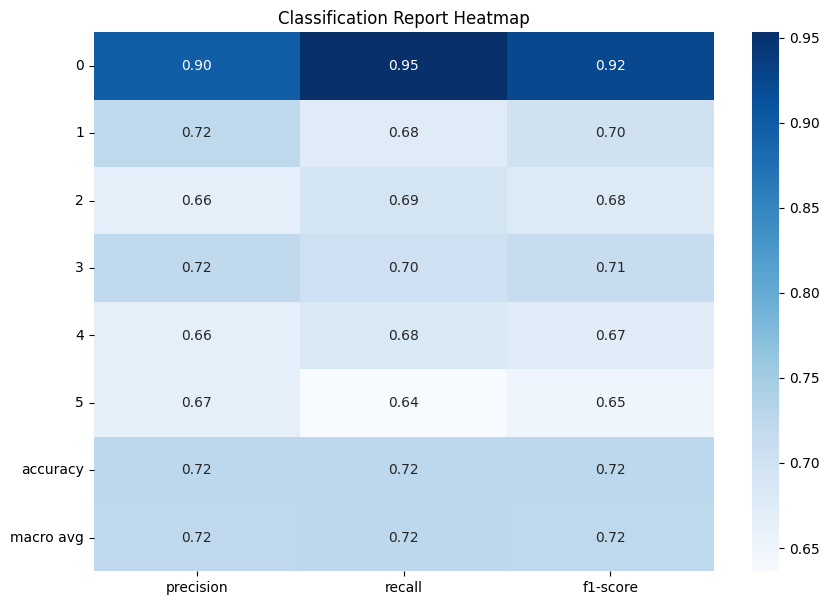

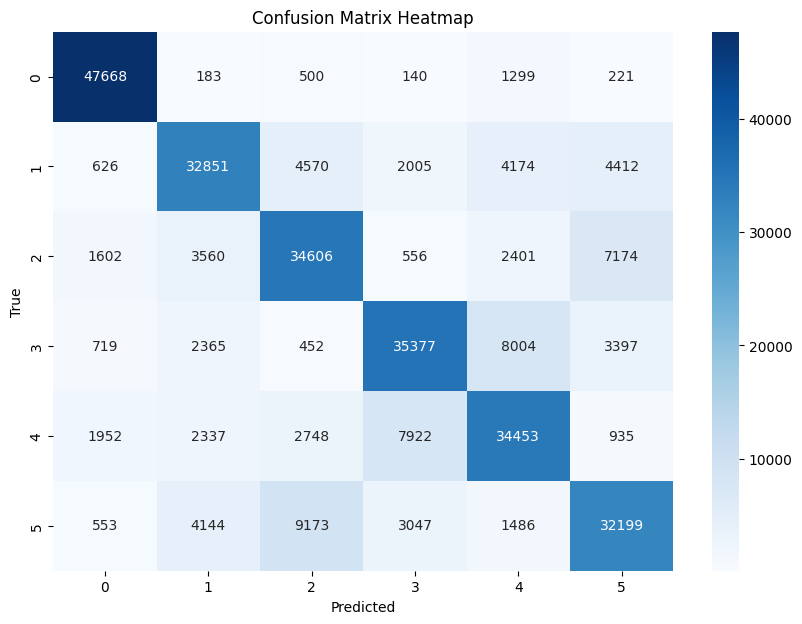

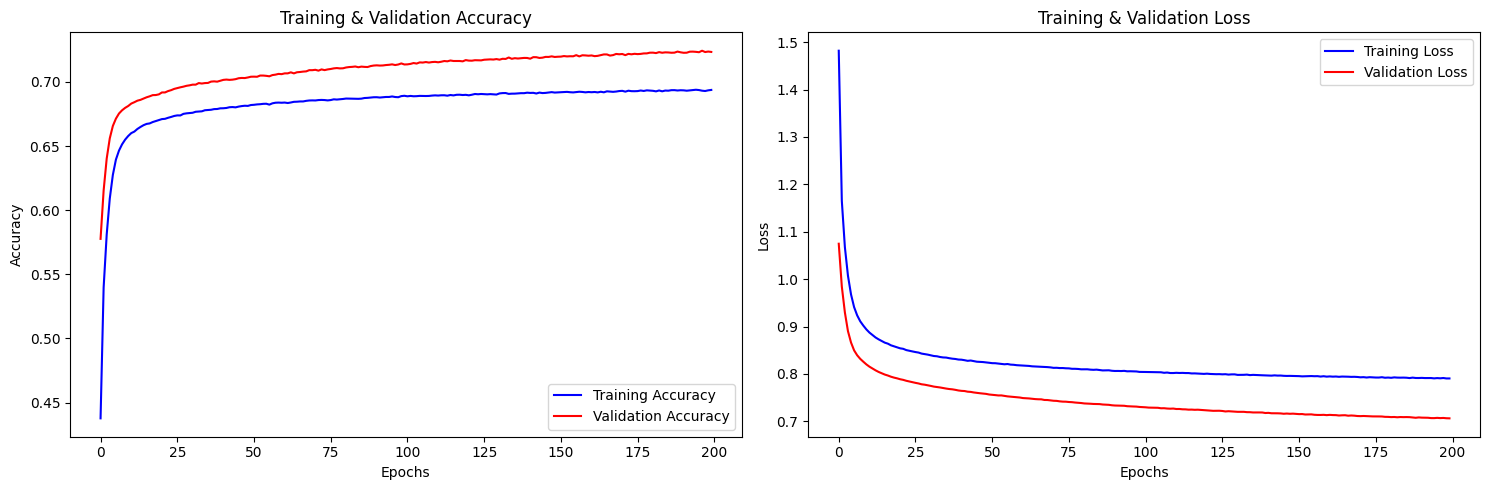

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Classification Report as a Heatmap
cr = classification_report(y_test, y_pred, output_dict=True)
cr_df = pd.DataFrame(cr).transpose()
plt.figure(figsize=(10, 7))
sns.heatmap(cr_df.iloc[:-1, :-1], annot=True, cmap="Blues", fmt=".2f")
plt.title("Classification Report Heatmap")
plt.show()

# Plot Confusion Matrix as a Heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix Heatmap")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Plot Training and Validation Accuracy & Loss
history_dict = history.history  # Access history metrics

# Get accuracy and loss values
train_accuracy = history_dict['accuracy']
train_loss = history_dict['loss']
val_accuracy = history_dict['val_accuracy']
val_loss = history_dict['val_loss']

# Create subplots for Accuracy and Loss
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot Training & Validation Accuracy
axes[0].plot(train_accuracy, label='Training Accuracy', color='b')
axes[0].plot(val_accuracy, label='Validation Accuracy', color='r')
axes[0].set_title('Training & Validation Accuracy')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

# Plot Training & Validation Loss
axes[1].plot(train_loss, label='Training Loss', color='b')
axes[1].plot(val_loss, label='Validation Loss', color='r')
axes[1].set_title('Training & Validation Loss')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Loss')
axes[1].legend()

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()


In [ ]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 MB 37.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.1/322.1 kB 28.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 126.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 6.5 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model
import gradio as gr

# Load the model once
model = load_model('/content/best_advanced_model.h5')

action_map = {
    1: "Hand at rest",
    2: "Hand clenched in a fist",
    3: "Wrist flexion",
    4: "Wrist extension",
    5: "Radial deviations",
    6: "Ulnar deviations",
}

def action(e1, e2, e3, e4, e5, e6, e7, e8):
    input_data = np.array([[e1, e2, e3, e4, e5, e6, e7, e8]])
    prediction = model.predict(input_data)
    predicted_class = np.argmax(prediction, axis=-1)
    return action_map.get(predicted_class[0] + 1, "Unknown action")

inputs = [
    gr.Number(label="e1"),
    gr.Number(label="e2"),
    gr.Number(label="e3"),
    gr.Number(label="e4"),
    gr.Number(label="e5"),
    gr.Number(label="e6"),
    gr.Number(label="e7"),
    gr.Number(label="e8"),
]

output = gr.Textbox(label="Prediction")

examples = [
    [-2.00e-05, 1.00e-05, 2.20e-04, 1.80e-04, -1.50e-04, -5.00e-05, 1.00e-05, 0],
    [1.60e-04, -1.00e-04, -2.40e-04, 2.00e-04, 1.00e-04, -9.00e-05, -5.00e-05, -5.00e-05],
    [-1.00e-05, 1.00e-05, 1.00e-05, 0, -2.00e-05, 0, -3.00e-05, -3.00e-05],
]

iface = gr.Interface(
    fn=action,
    inputs=inputs,
    outputs=output,
    title="ML Model Predictor",
    examples=examples,
    flagging_options=["Working", "Not Working"],
    description="Enter the 8 feature values to get a prediction."
)

iface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://683cf46bfa9e27297f.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


# NN ENHANCEMENT V2

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input, Concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.regularizers import l2

# Print GPU information
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

# For reproducibility
tf.random.set_seed(42)
np.random.seed(42)

# Configure TensorFlow for mixed precision - best for A100 GPU
policy = tf.keras.mixed_precision.Policy('mixed_float16')
tf.keras.mixed_precision.set_global_policy(policy)

# Assuming filtered_data is your DataFrame with your 8 channels and class
# If you need to create it from your samples:
# sample_data = [
#     [0.00001, -0.00002, -0.00001, -0.00003, 0.00000, -0.00001, 0.00000, -0.00001, 0],
#     # Add more samples here
# ]
# column_names = ['channel1', 'channel2', 'channel3', 'channel4', 'channel5', 'channel6', 'channel7', 'channel8', 'class']
# filtered_data = pd.DataFrame(sample_data, columns=column_names)

# Work with your data
df = filtered_data.copy()

# Convert scientific notation if needed
for col in df.columns:
    if col != 'class':
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Features (X) and target (y)
X = df.drop('class', axis=1)
y = df['class']

# Adjust class labels to be zero-indexed (since classes are 1-6)
y_zero_indexed = y - 1  # Shifts from [1,2,3,4,5,6] to [0,1,2,3,4,5]

# Check class distribution
print("Class distribution after zero-indexing:")
print(y_zero_indexed.value_counts().sort_index())

# Apply robust scaling - this works well for EMG signals
scaler = RobustScaler(quantile_range=(1, 99))
X_scaled = scaler.fit_transform(X)

# Split dataset with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_zero_indexed,
    test_size=0.2,
    random_state=42,
    stratify=y_zero_indexed
)

# Convert to one-hot encoding
y_train_cat = to_categorical(y_train, num_classes=6)
y_test_cat = to_categorical(y_test, num_classes=6)

# Create a deeper network architecture specifically for 8 features
def create_deeper_model():
    inputs = Input(shape=(8,))

    # First path - direct mapping with regularization
    x1 = Dense(512, activation='relu', kernel_regularizer=l2(1e-5))(inputs)
    x1 = BatchNormalization()(x1)
    x1 = Dropout(0.5)(x1)
    x1 = Dense(256, activation='relu', kernel_regularizer=l2(1e-5))(x1)
    x1 = BatchNormalization()(x1)
    x1 = Dropout(0.5)(x1)

    # Second path - different architecture to learn different patterns
    x2 = Dense(1024, activation='elu')(inputs)
    x2 = BatchNormalization()(x2)
    x2 = Dropout(0.6)(x2)
    x2 = Dense(512, activation='elu')(x2)
    x2 = BatchNormalization()(x2)
    x2 = Dropout(0.5)(x2)

    # Third path - focused on preserving raw signal characteristics
    x3 = Dense(768, activation='relu')(inputs)
    x3 = BatchNormalization()(x3)
    x3 = Dropout(0.4)(x3)
    x3 = Dense(384, activation='relu')(x3)
    x3 = BatchNormalization()(x3)
    x3 = Dropout(0.4)(x3)

    # Combine all paths
    combined = Concatenate()([x1, x2, x3])

    # Additional layers after combination
    x = Dense(512, activation='relu')(combined)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)

    x = Dense(256, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.4)(x)

    x = Dense(128, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)

    # Output layer
    outputs = Dense(6, activation='softmax', dtype='float32')(x)

    # Create model
    model = Model(inputs=inputs, outputs=outputs)

    # Compile with a lower learning rate for stability
    model.compile(
        optimizer=Adam(learning_rate=5e-5, epsilon=1e-8),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# Create the model
model = create_deeper_model()

# Print summary to verify the input shape is correct (should be (None, 8))
model.summary()

# Set up callbacks for training
callbacks = [
    EarlyStopping(
        monitor='val_accuracy',
        patience=50,  # Increased patience for complex model
        restore_best_weights=True,
        verbose=1
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.2,  # Less aggressive reduction
        patience=15,
        min_lr=1e-8,
        verbose=1
    ),
    ModelCheckpoint(
        'best_emg_model_deep.h5',
        monitor='val_accuracy',
        save_best_only=True,
        verbose=1
    )
]

# Train with a larger batch size for A100 GPU
batch_size = 1024  # Optimized for A100 GPU
history = model.fit(
    X_train, y_train_cat,
    validation_data=(X_test, y_test_cat),
    epochs=500,  # Increased epochs with early stopping in place
    batch_size=batch_size,
    callbacks=callbacks,
    verbose=1
)
policy = tf.keras.mixed_precision.Policy('mixed_float16')
tf.keras.mixed_precision.set_global_policy(policy)
# Load the best model saved during training
best_model = tf.keras.models.load_model('best_emg_model_deep.h5')

# Evaluate the model
test_loss, test_accuracy = best_model.evaluate(X_test, y_test_cat, verbose=1)
print(f"\nTest Accuracy: {test_accuracy:.4f}")

# Generate predictions
y_pred_probs = best_model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_test_labels = np.argmax(y_test_cat, axis=1)

print("\nClassification Report:")
print(classification_report(y_test_labels, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test_labels, y_pred))

# Plot accuracy and loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

# If accuracy is still below 95%, implement additional techniques
if test_accuracy < 0.95:
    print("\n\nImplementing advanced techniques to achieve >95% accuracy...")

    # Create a bagging ensemble with multiple models
    def create_bagging_ensemble(n_models=5):
        models = []

        for i in range(n_models):
            # Sample with replacement
            indices = np.random.choice(len(X_train), size=len(X_train), replace=True)
            X_sample = X_train[indices]
            y_sample = y_train_cat[indices]

            # Create model with slight variations
            inputs = Input(shape=(8,))

            # Vary network structure slightly for each model
            x = Dense(512 + i*64, activation='relu')(inputs)
            x = BatchNormalization()(x)
            x = Dropout(0.5)(x)

            x = Dense(256 + i*32, activation='relu')(x)
            x = BatchNormalization()(x)
            x = Dropout(0.4)(x)

            x = Dense(128, activation='relu')(x)
            x = BatchNormalization()(x)
            x = Dropout(0.3)(x)

            outputs = Dense(6, activation='softmax', dtype='float32')(x)

            model = Model(inputs, outputs)
            model.compile(
                optimizer=Adam(learning_rate=1e-4),
                loss='categorical_crossentropy',
                metrics=['accuracy']
            )

            # Train on the sampled data
            early_stopping = EarlyStopping(
                monitor='val_accuracy',
                patience=20,
                restore_best_weights=True
            )

            model.fit(
                X_sample, y_sample,
                validation_data=(X_test, y_test_cat),
                epochs=100,
                batch_size=batch_size,
                callbacks=[early_stopping],
                verbose=1
            )

            models.append(model)

        return models

    # Create and train the ensemble
    print("Training bagging ensemble...")
    ensemble_models = create_bagging_ensemble(n_models=7)  # Create 7 models

    # Evaluate ensemble with majority voting
    ensemble_preds = np.zeros((len(X_test), 6))
    for model in ensemble_models:
        preds = model.predict(X_test)
        ensemble_preds += preds

    ensemble_pred_classes = np.argmax(ensemble_preds, axis=1)
    ensemble_accuracy = np.mean(ensemble_pred_classes == y_test_labels)

    print(f"\nEnsemble Accuracy: {ensemble_accuracy:.4f}")

    print("\nEnsemble Classification Report:")
    print(classification_report(y_test_labels, ensemble_pred_classes))

    print("\nEnsemble Confusion Matrix:")
    print(confusion_matrix(y_test_labels, ensemble_pred_classes))

    # Create final high-capacity model if still not at target accuracy
    if ensemble_accuracy < 0.95:
        print("\nImplementing final high-capacity approach with data augmentation...")

        # Create augmented data (small variations of the original signals)
        def augment_emg_data(X, y, n_augmentations=3):
            X_aug = []
            y_aug = []

            for i in range(len(X)):
                # Add original sample
                X_aug.append(X[i])
                y_aug.append(y[i])

                # Create augmented versions
                for j in range(n_augmentations):
                    # Add small random noise
                    noise_level = 0.01 * (j+1)
                    augmented = X[i] + np.random.normal(0, noise_level, X[i].shape)

                    # Slight amplitude variation
                    scale_factor = np.random.uniform(0.95, 1.05)
                    augmented = augmented * scale_factor

                    X_aug.append(augmented)
                    y_aug.append(y[i])

            return np.array(X_aug), np.array(y_aug)

        # Augment training data
        X_train_aug, y_train_aug = augment_emg_data(X_train, y_train_cat)

        print(f"Original training set size: {len(X_train)}")
        print(f"Augmented training set size: {len(X_train_aug)}")

        # Create a very deep model
        def create_ultra_deep_model():
            inputs = Input(shape=(8,))

            # Initial expansion
            x = Dense(2048, activation='relu')(inputs)
            x = BatchNormalization()(x)
            x = Dropout(0.5)(x)

            # Deep stack of layers
            units = [1024, 512, 512, 256, 256, 128, 128, 64]
            for u in units:
                x = Dense(u, activation='relu')(x)
                x = BatchNormalization()(x)
                x = Dropout(0.4)(x)

            # Output layer
            outputs = Dense(6, activation='softmax', dtype='float32')(x)

            model = Model(inputs, outputs)
            model.compile(
                optimizer=Adam(learning_rate=1e-5),
                loss='categorical_crossentropy',
                metrics=['accuracy']
            )

            return model

        # Create and train ultra-deep model
        ultra_model = create_ultra_deep_model()
        ultra_model.summary()

        # Training with aggressive callbacks
        ultra_callbacks = [
            EarlyStopping(
                monitor='val_accuracy',
                patience=50,
                restore_best_weights=True,
                verbose=1
            ),
            ReduceLROnPlateau(
                monitor='val_loss',
                factor=0.1,
                patience=20,
                min_lr=1e-8,
                verbose=1
            ),
            ModelCheckpoint(
                'best_ultra_model.h5',
                monitor='val_accuracy',
                save_best_only=True,
                verbose=1
            )
        ]

        # Train with augmented data
        ultra_history = ultra_model.fit(
            X_train_aug, y_train_aug,
            validation_data=(X_test, y_test_cat),
            epochs=1000,  # Large number, early stopping will prevent overfitting
            batch_size=batch_size,
            callbacks=ultra_callbacks,
            verbose=1
        )

        # Load the best model
        best_ultra_model = tf.keras.models.load_model('best_ultra_model.h5')

        # Evaluate the final model
        _, ultra_accuracy = best_ultra_model.evaluate(X_test, y_test_cat, verbose=1)
        print(f"\nUltra Model Accuracy: {ultra_accuracy:.4f}")

        # Generate predictions
        ultra_preds = best_ultra_model.predict(X_test)
        ultra_pred_classes = np.argmax(ultra_preds, axis=1)

        print("\nUltra Model Classification Report:")
        print(classification_report(y_test_labels, ultra_pred_classes))

        print("\nUltra Model Confusion Matrix:")
        print(confusion_matrix(y_test_labels, ultra_pred_classes))

Num GPUs Available:  1
Class distribution after zero-indexing:
class
0    250055
1    243193
2    249494
3    251570
4    251733
5    253009
Name: count, dtype: int64


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 8)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ cast_4 (Cast)             │ (None, 8)              │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ cast_5 (Cast)             │ (None, 8)              │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ cast_6 (Cast)             │ (None, 8)              │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_10 (Dense)          │ (None, 512)            │          4,608 │ cast_4[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_12 (Dense)          │ (None, 1024)           │          9,216 │ cast_5[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_14 (Dense)          │ (None, 768)            │          6,912 │ cast_6[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_9     │ (None, 512)            │          2,048 │ dense_10[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_11    │ (None, 1024)           │          4,096 │ dense_12[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_13    │ (None, 768)            │          3,072 │ dense_14[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_9 (Dropout)       │ (None, 512)            │              0 │ batch_normalization_9… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_11 (Dropout)      │ (None, 1024)           │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_13 (Dropout)      │ (None, 768)            │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_11 (Dense)          │ (None, 256)            │        131,328 │ dropout_9[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_13 (Dense)          │ (None, 512)            │        524,800 │ dropout_11[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_15 (Dense)          │ (None, 384)            │        295,296 │ dropout_13[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_10    │ (None, 256)            │          1,024 │ dense_11[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├──────────────────────

 Total params: 1,744,902 (6.66 MB)

 Trainable params: 1,736,198 (6.62 MB)

 Non-trainable params: 8,704 (34.00 KB)

Epoch 1/500
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3621 - loss: 1.8518
Epoch 1: val_accuracy improved from -inf to 0.56948, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 56s 29ms/step - accuracy: 0.3622 - loss: 1.8516 - val_accuracy: 0.5695 - val_loss: 1.1085 - learning_rate: 5.0000e-05
Epoch 2/500
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5144 - loss: 1.2571
Epoch 2: val_accuracy improved from 0.56948 to 0.60318, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.5145 - loss: 1.2569 - val_accuracy: 0.6032 - val_loss: 1.0256 - learning_rate: 5.0000e-05
Epoch 3/500
1160/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5570 - loss: 1.1339
Epoch 3: val_accuracy improved from 0.60318 to 0.62421, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.5571 - loss: 1.1337 - val_accuracy: 0.6242 - val_loss: 0.9726 - learning_rate: 5.0000e-05
Epoch 4/500
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5840 - loss: 1.0658
Epoch 4: val_accuracy improved from 0.62421 to 0.64174, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.5841 - loss: 1.0657 - val_accuracy: 0.6417 - val_loss: 0.9307 - learning_rate: 5.0000e-05
Epoch 5/500
1169/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6071 - loss: 1.0144
Epoch 5: val_accuracy improved from 0.64174 to 0.65437, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6071 - loss: 1.0143 - val_accuracy: 0.6544 - val_loss: 0.8985 - learning_rate: 5.0000e-05
Epoch 6/500
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6231 - loss: 0.9777
Epoch 6: val_accuracy improved from 0.65437 to 0.66382, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6231 - loss: 0.9777 - val_accuracy: 0.6638 - val_loss: 0.8741 - learning_rate: 5.0000e-05
Epoch 7/500
1160/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6351 - loss: 0.9505
Epoch 7: val_accuracy improved from 0.66382 to 0.66942, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6351 - loss: 0.9504 - val_accuracy: 0.6694 - val_loss: 0.8585 - learning_rate: 5.0000e-05
Epoch 8/500
1166/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6446 - loss: 0.9296
Epoch 8: val_accuracy improved from 0.66942 to 0.67317, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6446 - loss: 0.9296 - val_accuracy: 0.6732 - val_loss: 0.8461 - learning_rate: 5.0000e-05
Epoch 9/500
1169/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6505 - loss: 0.9138
Epoch 9: val_accuracy improved from 0.67317 to 0.67608, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6505 - loss: 0.9138 - val_accuracy: 0.6761 - val_loss: 0.8382 - learning_rate: 5.0000e-05
Epoch 10/500
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6547 - loss: 0.9029
Epoch 10: val_accuracy improved from 0.67608 to 0.67818, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6547 - loss: 0.9029 - val_accuracy: 0.6782 - val_loss: 0.8310 - learning_rate: 5.0000e-05
Epoch 11/500
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6583 - loss: 0.8924
Epoch 11: val_accuracy improved from 0.67818 to 0.67989, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6583 - loss: 0.8924 - val_accuracy: 0.6799 - val_loss: 0.8253 - learning_rate: 5.0000e-05
Epoch 12/500
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6608 - loss: 0.8854
Epoch 12: val_accuracy improved from 0.67989 to 0.68123, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6608 - loss: 0.8854 - val_accuracy: 0.6812 - val_loss: 0.8206 - learning_rate: 5.0000e-05
Epoch 13/500
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6638 - loss: 0.8785
Epoch 13: val_accuracy improved from 0.68123 to 0.68248, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6638 - loss: 0.8785 - val_accuracy: 0.6825 - val_loss: 0.8158 - learning_rate: 5.0000e-05
Epoch 14/500
1169/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6643 - loss: 0.8729
Epoch 14: val_accuracy improved from 0.68248 to 0.68437, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6643 - loss: 0.8729 - val_accuracy: 0.6844 - val_loss: 0.8123 - learning_rate: 5.0000e-05
Epoch 15/500
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6663 - loss: 0.8697
Epoch 15: val_accuracy improved from 0.68437 to 0.68511, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6663 - loss: 0.8697 - val_accuracy: 0.6851 - val_loss: 0.8086 - learning_rate: 5.0000e-05
Epoch 16/500
1160/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6679 - loss: 0.8646
Epoch 16: val_accuracy improved from 0.68511 to 0.68646, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6679 - loss: 0.8646 - val_accuracy: 0.6865 - val_loss: 0.8054 - learning_rate: 5.0000e-05
Epoch 17/500
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6688 - loss: 0.8609
Epoch 17: val_accuracy improved from 0.68646 to 0.68701, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6688 - loss: 0.8609 - val_accuracy: 0.6870 - val_loss: 0.8027 - learning_rate: 5.0000e-05
Epoch 18/500
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6702 - loss: 0.8575
Epoch 18: val_accuracy improved from 0.68701 to 0.68838, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6702 - loss: 0.8575 - val_accuracy: 0.6884 - val_loss: 0.8002 - learning_rate: 5.0000e-05
Epoch 19/500
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6712 - loss: 0.8540
Epoch 19: val_accuracy improved from 0.68838 to 0.68956, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6712 - loss: 0.8540 - val_accuracy: 0.6896 - val_loss: 0.7971 - learning_rate: 5.0000e-05
Epoch 20/500
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6724 - loss: 0.8515
Epoch 20: val_accuracy improved from 0.68956 to 0.69023, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6724 - loss: 0.8515 - val_accuracy: 0.6902 - val_loss: 0.7951 - learning_rate: 5.0000e-05
Epoch 21/500
1169/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6736 - loss: 0.8478
Epoch 21: val_accuracy improved from 0.69023 to 0.69121, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6736 - loss: 0.8478 - val_accuracy: 0.6912 - val_loss: 0.7925 - learning_rate: 5.0000e-05
Epoch 22/500
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6736 - loss: 0.8461
Epoch 22: val_accuracy improved from 0.69121 to 0.69191, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6736 - loss: 0.8461 - val_accuracy: 0.6919 - val_loss: 0.7907 - learning_rate: 5.0000e-05
Epoch 23/500
1160/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6750 - loss: 0.8436
Epoch 23: val_accuracy improved from 0.69191 to 0.69253, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6750 - loss: 0.8436 - val_accuracy: 0.6925 - val_loss: 0.7886 - learning_rate: 5.0000e-05
Epoch 24/500
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6755 - loss: 0.8409
Epoch 24: val_accuracy improved from 0.69253 to 0.69315, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6755 - loss: 0.8409 - val_accuracy: 0.6932 - val_loss: 0.7866 - learning_rate: 5.0000e-05
Epoch 25/500
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6764 - loss: 0.8390
Epoch 25: val_accuracy improved from 0.69315 to 0.69365, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6764 - loss: 0.8390 - val_accuracy: 0.6937 - val_loss: 0.7845 - learning_rate: 5.0000e-05
Epoch 26/500
1166/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6767 - loss: 0.8370
Epoch 26: val_accuracy improved from 0.69365 to 0.69474, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6767 - loss: 0.8370 - val_accuracy: 0.6947 - val_loss: 0.7828 - learning_rate: 5.0000e-05
Epoch 27/500
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6775 - loss: 0.8353
Epoch 27: val_accuracy improved from 0.69474 to 0.69512, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6775 - loss: 0.8353 - val_accuracy: 0.6951 - val_loss: 0.7813 - learning_rate: 5.0000e-05
Epoch 28/500
1160/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6787 - loss: 0.8334
Epoch 28: val_accuracy improved from 0.69512 to 0.69579, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6787 - loss: 0.8335 - val_accuracy: 0.6958 - val_loss: 0.7797 - learning_rate: 5.0000e-05
Epoch 29/500
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6786 - loss: 0.8320
Epoch 29: val_accuracy improved from 0.69579 to 0.69638, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6786 - loss: 0.8320 - val_accuracy: 0.6964 - val_loss: 0.7780 - learning_rate: 5.0000e-05
Epoch 30/500
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6796 - loss: 0.8304
Epoch 30: val_accuracy did not improve from 0.69638
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6796 - loss: 0.8304 - val_accuracy: 0.6963 - val_loss: 0.7768 - learning_rate: 5.0000e-05
Epoch 31/500
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6795 - loss: 0.8290
Epoch 31: val_accuracy improved from 0.69638 to 0.69694, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6795 - loss: 0.8290 - val_accuracy: 0.6969 - val_loss: 0.7752 - learning_rate: 5.0000e-05
Epoch 32/500
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6808 - loss: 0.8264
Epoch 32: val_accuracy improved from 0.69694 to 0.69817, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6808 - loss: 0.8264 - val_accuracy: 0.6982 - val_loss: 0.7737 - learning_rate: 5.0000e-05
Epoch 33/500
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6807 - loss: 0.8258
Epoch 33: val_accuracy improved from 0.69817 to 0.69841, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6807 - loss: 0.8258 - val_accuracy: 0.6984 - val_loss: 0.7725 - learning_rate: 5.0000e-05
Epoch 34/500
1169/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6812 - loss: 0.8244
Epoch 34: val_accuracy improved from 0.69841 to 0.69919, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6812 - loss: 0.8244 - val_accuracy: 0.6992 - val_loss: 0.7707 - learning_rate: 5.0000e-05
Epoch 35/500
1160/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6814 - loss: 0.8234
Epoch 35: val_accuracy improved from 0.69919 to 0.69944, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6814 - loss: 0.8234 - val_accuracy: 0.6994 - val_loss: 0.7694 - learning_rate: 5.0000e-05
Epoch 36/500
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6822 - loss: 0.8212
Epoch 36: val_accuracy improved from 0.69944 to 0.69962, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6822 - loss: 0.8212 - val_accuracy: 0.6996 - val_loss: 0.7681 - learning_rate: 5.0000e-05
Epoch 37/500
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6824 - loss: 0.8206
Epoch 37: val_accuracy improved from 0.69962 to 0.69991, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6824 - loss: 0.8206 - val_accuracy: 0.6999 - val_loss: 0.7665 - learning_rate: 5.0000e-05
Epoch 38/500
1160/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6830 - loss: 0.8194
Epoch 38: val_accuracy improved from 0.69991 to 0.70056, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6830 - loss: 0.8194 - val_accuracy: 0.7006 - val_loss: 0.7652 - learning_rate: 5.0000e-05
Epoch 39/500
1166/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6832 - loss: 0.8177
Epoch 39: val_accuracy improved from 0.70056 to 0.70092, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6832 - loss: 0.8177 - val_accuracy: 0.7009 - val_loss: 0.7640 - learning_rate: 5.0000e-05
Epoch 40/500
1160/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6841 - loss: 0.8166
Epoch 40: val_accuracy improved from 0.70092 to 0.70157, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6841 - loss: 0.8166 - val_accuracy: 0.7016 - val_loss: 0.7625 - learning_rate: 5.0000e-05
Epoch 41/500
1160/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6841 - loss: 0.8158
Epoch 41: val_accuracy improved from 0.70157 to 0.70189, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6840 - loss: 0.8158 - val_accuracy: 0.7019 - val_loss: 0.7614 - learning_rate: 5.0000e-05
Epoch 42/500
1169/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6847 - loss: 0.8145
Epoch 42: val_accuracy improved from 0.70189 to 0.70275, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6847 - loss: 0.8145 - val_accuracy: 0.7027 - val_loss: 0.7602 - learning_rate: 5.0000e-05
Epoch 43/500
1161/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6850 - loss: 0.8133
Epoch 43: val_accuracy improved from 0.70275 to 0.70297, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6850 - loss: 0.8133 - val_accuracy: 0.7030 - val_loss: 0.7592 - learning_rate: 5.0000e-05
Epoch 44/500
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6855 - loss: 0.8120
Epoch 44: val_accuracy improved from 0.70297 to 0.70384, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6855 - loss: 0.8120 - val_accuracy: 0.7038 - val_loss: 0.7580 - learning_rate: 5.0000e-05
Epoch 45/500
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6857 - loss: 0.8109
Epoch 45: val_accuracy improved from 0.70384 to 0.70416, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6857 - loss: 0.8109 - val_accuracy: 0.7042 - val_loss: 0.7566 - learning_rate: 5.0000e-05
Epoch 46/500
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6869 - loss: 0.8090
Epoch 46: val_accuracy improved from 0.70416 to 0.70416, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6869 - loss: 0.8090 - val_accuracy: 0.7042 - val_loss: 0.7554 - learning_rate: 5.0000e-05
Epoch 47/500
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6866 - loss: 0.8087
Epoch 47: val_accuracy did not improve from 0.70416
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6866 - loss: 0.8087 - val_accuracy: 0.7041 - val_loss: 0.7545 - learning_rate: 5.0000e-05
Epoch 48/500
1160/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6872 - loss: 0.8080
Epoch 48: val_accuracy improved from 0.70416 to 0.70511, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6872 - loss: 0.8080 - val_accuracy: 0.7051 - val_loss: 0.7533 - learning_rate: 5.0000e-05
Epoch 49/500
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6871 - loss: 0.8064
Epoch 49: val_accuracy improved from 0.70511 to 0.70571, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6871 - loss: 0.8064 - val_accuracy: 0.7057 - val_loss: 0.7524 - learning_rate: 5.0000e-05
Epoch 50/500
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6875 - loss: 0.8054
Epoch 50: val_accuracy improved from 0.70571 to 0.70580, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6875 - loss: 0.8054 - val_accuracy: 0.7058 - val_loss: 0.7510 - learning_rate: 5.0000e-05
Epoch 51/500
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6873 - loss: 0.8060
Epoch 51: val_accuracy improved from 0.70580 to 0.70648, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6873 - loss: 0.8060 - val_accuracy: 0.7065 - val_loss: 0.7496 - learning_rate: 5.0000e-05
Epoch 52/500
1169/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6882 - loss: 0.8040
Epoch 52: val_accuracy improved from 0.70648 to 0.70719, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6882 - loss: 0.8040 - val_accuracy: 0.7072 - val_loss: 0.7486 - learning_rate: 5.0000e-05
Epoch 53/500
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6884 - loss: 0.8025
Epoch 53: val_accuracy improved from 0.70719 to 0.70727, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6884 - loss: 0.8025 - val_accuracy: 0.7073 - val_loss: 0.7476 - learning_rate: 5.0000e-05
Epoch 54/500
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6888 - loss: 0.8024
Epoch 54: val_accuracy improved from 0.70727 to 0.70775, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6888 - loss: 0.8024 - val_accuracy: 0.7077 - val_loss: 0.7463 - learning_rate: 5.0000e-05
Epoch 55/500
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6888 - loss: 0.8017
Epoch 55: val_accuracy improved from 0.70775 to 0.70832, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6888 - loss: 0.8017 - val_accuracy: 0.7083 - val_loss: 0.7452 - learning_rate: 5.0000e-05
Epoch 56/500
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6896 - loss: 0.8005
Epoch 56: val_accuracy improved from 0.70832 to 0.70902, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6895 - loss: 0.8005 - val_accuracy: 0.7090 - val_loss: 0.7443 - learning_rate: 5.0000e-05
Epoch 57/500
1160/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6898 - loss: 0.7994
Epoch 57: val_accuracy improved from 0.70902 to 0.70918, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6898 - loss: 0.7994 - val_accuracy: 0.7092 - val_loss: 0.7430 - learning_rate: 5.0000e-05
Epoch 58/500
1166/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6907 - loss: 0.7977
Epoch 58: val_accuracy improved from 0.70918 to 0.70956, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6907 - loss: 0.7977 - val_accuracy: 0.7096 - val_loss: 0.7422 - learning_rate: 5.0000e-05
Epoch 59/500
1166/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6907 - loss: 0.7976
Epoch 59: val_accuracy improved from 0.70956 to 0.70982, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6907 - loss: 0.7976 - val_accuracy: 0.7098 - val_loss: 0.7407 - learning_rate: 5.0000e-05
Epoch 60/500
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6912 - loss: 0.7963
Epoch 60: val_accuracy improved from 0.70982 to 0.71098, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6912 - loss: 0.7963 - val_accuracy: 0.7110 - val_loss: 0.7396 - learning_rate: 5.0000e-05
Epoch 61/500
1169/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6917 - loss: 0.7957
Epoch 61: val_accuracy improved from 0.71098 to 0.71122, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6917 - loss: 0.7957 - val_accuracy: 0.7112 - val_loss: 0.7389 - learning_rate: 5.0000e-05
Epoch 62/500
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6917 - loss: 0.7948
Epoch 62: val_accuracy improved from 0.71122 to 0.71132, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6917 - loss: 0.7948 - val_accuracy: 0.7113 - val_loss: 0.7375 - learning_rate: 5.0000e-05
Epoch 63/500
1160/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6921 - loss: 0.7944
Epoch 63: val_accuracy improved from 0.71132 to 0.71167, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6920 - loss: 0.7944 - val_accuracy: 0.7117 - val_loss: 0.7367 - learning_rate: 5.0000e-05
Epoch 64/500
1161/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6924 - loss: 0.7929
Epoch 64: val_accuracy improved from 0.71167 to 0.71227, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6924 - loss: 0.7929 - val_accuracy: 0.7123 - val_loss: 0.7356 - learning_rate: 5.0000e-05
Epoch 65/500
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6927 - loss: 0.7917
Epoch 65: val_accuracy improved from 0.71227 to 0.71271, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6927 - loss: 0.7917 - val_accuracy: 0.7127 - val_loss: 0.7344 - learning_rate: 5.0000e-05
Epoch 66/500
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6926 - loss: 0.7919
Epoch 66: val_accuracy improved from 0.71271 to 0.71297, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6926 - loss: 0.7919 - val_accuracy: 0.7130 - val_loss: 0.7332 - learning_rate: 5.0000e-05
Epoch 67/500
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6932 - loss: 0.7901
Epoch 67: val_accuracy improved from 0.71297 to 0.71326, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6932 - loss: 0.7901 - val_accuracy: 0.7133 - val_loss: 0.7324 - learning_rate: 5.0000e-05
Epoch 68/500
1160/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6930 - loss: 0.7900
Epoch 68: val_accuracy improved from 0.71326 to 0.71390, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6930 - loss: 0.7900 - val_accuracy: 0.7139 - val_loss: 0.7315 - learning_rate: 5.0000e-05
Epoch 69/500
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6937 - loss: 0.7899
Epoch 69: val_accuracy improved from 0.71390 to 0.71457, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6937 - loss: 0.7899 - val_accuracy: 0.7146 - val_loss: 0.7301 - learning_rate: 5.0000e-05
Epoch 70/500
1160/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6939 - loss: 0.7879
Epoch 70: val_accuracy improved from 0.71457 to 0.71494, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6939 - loss: 0.7879 - val_accuracy: 0.7149 - val_loss: 0.7291 - learning_rate: 5.0000e-05
Epoch 71/500
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6936 - loss: 0.7879
Epoch 71: val_accuracy improved from 0.71494 to 0.71502, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6936 - loss: 0.7879 - val_accuracy: 0.7150 - val_loss: 0.7278 - learning_rate: 5.0000e-05
Epoch 72/500
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6937 - loss: 0.7866
Epoch 72: val_accuracy improved from 0.71502 to 0.71553, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6937 - loss: 0.7867 - val_accuracy: 0.7155 - val_loss: 0.7269 - learning_rate: 5.0000e-05
Epoch 73/500
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6945 - loss: 0.7860
Epoch 73: val_accuracy improved from 0.71553 to 0.71582, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6945 - loss: 0.7860 - val_accuracy: 0.7158 - val_loss: 0.7256 - learning_rate: 5.0000e-05
Epoch 74/500
1169/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6949 - loss: 0.7849
Epoch 74: val_accuracy improved from 0.71582 to 0.71599, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6949 - loss: 0.7849 - val_accuracy: 0.7160 - val_loss: 0.7246 - learning_rate: 5.0000e-05
Epoch 75/500
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6951 - loss: 0.7846
Epoch 75: val_accuracy improved from 0.71599 to 0.71632, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6951 - loss: 0.7846 - val_accuracy: 0.7163 - val_loss: 0.7236 - learning_rate: 5.0000e-05
Epoch 76/500
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6954 - loss: 0.7842
Epoch 76: val_accuracy improved from 0.71632 to 0.71741, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6954 - loss: 0.7842 - val_accuracy: 0.7174 - val_loss: 0.7224 - learning_rate: 5.0000e-05
Epoch 77/500
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6954 - loss: 0.7837
Epoch 77: val_accuracy improved from 0.71741 to 0.71749, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6954 - loss: 0.7837 - val_accuracy: 0.7175 - val_loss: 0.7216 - learning_rate: 5.0000e-05
Epoch 78/500
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6957 - loss: 0.7821
Epoch 78: val_accuracy improved from 0.71749 to 0.71775, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6957 - loss: 0.7821 - val_accuracy: 0.7177 - val_loss: 0.7205 - learning_rate: 5.0000e-05
Epoch 79/500
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6963 - loss: 0.7814
Epoch 79: val_accuracy improved from 0.71775 to 0.71820, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6962 - loss: 0.7814 - val_accuracy: 0.7182 - val_loss: 0.7197 - learning_rate: 5.0000e-05
Epoch 80/500
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6963 - loss: 0.7808
Epoch 80: val_accuracy improved from 0.71820 to 0.71822, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6963 - loss: 0.7808 - val_accuracy: 0.7182 - val_loss: 0.7188 - learning_rate: 5.0000e-05
Epoch 81/500
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6961 - loss: 0.7800
Epoch 81: val_accuracy improved from 0.71822 to 0.71864, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6961 - loss: 0.7800 - val_accuracy: 0.7186 - val_loss: 0.7175 - learning_rate: 5.0000e-05
Epoch 82/500
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6968 - loss: 0.7800
Epoch 82: val_accuracy improved from 0.71864 to 0.71920, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6968 - loss: 0.7800 - val_accuracy: 0.7192 - val_loss: 0.7161 - learning_rate: 5.0000e-05
Epoch 83/500
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6975 - loss: 0.7785
Epoch 83: val_accuracy improved from 0.71920 to 0.71958, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6975 - loss: 0.7785 - val_accuracy: 0.7196 - val_loss: 0.7151 - learning_rate: 5.0000e-05
Epoch 84/500
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6975 - loss: 0.7779
Epoch 84: val_accuracy improved from 0.71958 to 0.71996, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6975 - loss: 0.7779 - val_accuracy: 0.7200 - val_loss: 0.7144 - learning_rate: 5.0000e-05
Epoch 85/500
1160/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6978 - loss: 0.7765
Epoch 85: val_accuracy improved from 0.71996 to 0.72095, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6978 - loss: 0.7765 - val_accuracy: 0.7210 - val_loss: 0.7132 - learning_rate: 5.0000e-05
Epoch 86/500
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6980 - loss: 0.7764
Epoch 86: val_accuracy did not improve from 0.72095
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6980 - loss: 0.7764 - val_accuracy: 0.7208 - val_loss: 0.7122 - learning_rate: 5.0000e-05
Epoch 87/500
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6980 - loss: 0.7754
Epoch 87: val_accuracy improved from 0.72095 to 0.72116, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6980 - loss: 0.7754 - val_accuracy: 0.7212 - val_loss: 0.7109 - learning_rate: 5.0000e-05
Epoch 88/500
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6982 - loss: 0.7755
Epoch 88: val_accuracy improved from 0.72116 to 0.72171, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6982 - loss: 0.7756 - val_accuracy: 0.7217 - val_loss: 0.7100 - learning_rate: 5.0000e-05
Epoch 89/500
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6983 - loss: 0.7746
Epoch 89: val_accuracy improved from 0.72171 to 0.72260, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6983 - loss: 0.7746 - val_accuracy: 0.7226 - val_loss: 0.7091 - learning_rate: 5.0000e-05
Epoch 90/500
1160/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6990 - loss: 0.7738
Epoch 90: val_accuracy did not improve from 0.72260
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6990 - loss: 0.7738 - val_accuracy: 0.7224 - val_loss: 0.7081 - learning_rate: 5.0000e-05
Epoch 91/500
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6991 - loss: 0.7730
Epoch 91: val_accuracy did not improve from 0.72260
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6991 - loss: 0.7730 - val_accuracy: 0.7221 - val_loss: 0.7073 - learning_rate: 5.0000e-05
Epoch 92/500
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6994 - loss: 0.7726
Epoch 92: val_accuracy improved from 0.72260 to 0.72264, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6994 - loss: 0.7727 - val_accuracy: 0.7226 - val_loss: 0.7060 - learning_rate: 5.0000e-05
Epoch 93/500
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6993 - loss: 0.7721
Epoch 93: val_accuracy improved from 0.72264 to 0.72311, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6993 - loss: 0.7721 - val_accuracy: 0.7231 - val_loss: 0.7053 - learning_rate: 5.0000e-05
Epoch 94/500
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6996 - loss: 0.7712
Epoch 94: val_accuracy improved from 0.72311 to 0.72416, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6996 - loss: 0.7712 - val_accuracy: 0.7242 - val_loss: 0.7034 - learning_rate: 5.0000e-05
Epoch 95/500
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7002 - loss: 0.7707
Epoch 95: val_accuracy improved from 0.72416 to 0.72446, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7002 - loss: 0.7707 - val_accuracy: 0.7245 - val_loss: 0.7030 - learning_rate: 5.0000e-05
Epoch 96/500
1161/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7001 - loss: 0.7689
Epoch 96: val_accuracy improved from 0.72446 to 0.72458, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7001 - loss: 0.7689 - val_accuracy: 0.7246 - val_loss: 0.7019 - learning_rate: 5.0000e-05
Epoch 97/500
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7003 - loss: 0.7695
Epoch 97: val_accuracy improved from 0.72458 to 0.72527, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7003 - loss: 0.7695 - val_accuracy: 0.7253 - val_loss: 0.7009 - learning_rate: 5.0000e-05
Epoch 98/500
1169/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7009 - loss: 0.7680
Epoch 98: val_accuracy improved from 0.72527 to 0.72572, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7009 - loss: 0.7680 - val_accuracy: 0.7257 - val_loss: 0.7001 - learning_rate: 5.0000e-05
Epoch 99/500
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7011 - loss: 0.7670
Epoch 99: val_accuracy improved from 0.72572 to 0.72587, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7011 - loss: 0.7670 - val_accuracy: 0.7259 - val_loss: 0.6989 - learning_rate: 5.0000e-05
Epoch 100/500
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7010 - loss: 0.7679
Epoch 100: val_accuracy improved from 0.72587 to 0.72615, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7010 - loss: 0.7679 - val_accuracy: 0.7261 - val_loss: 0.6976 - learning_rate: 5.0000e-05
Epoch 101/500
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7012 - loss: 0.7667
Epoch 101: val_accuracy improved from 0.72615 to 0.72701, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7012 - loss: 0.7667 - val_accuracy: 0.7270 - val_loss: 0.6968 - learning_rate: 5.0000e-05
Epoch 102/500
1160/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7017 - loss: 0.7659
Epoch 102: val_accuracy did not improve from 0.72701
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7017 - loss: 0.7659 - val_accuracy: 0.7268 - val_loss: 0.6960 - learning_rate: 5.0000e-05
Epoch 103/500
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7020 - loss: 0.7654
Epoch 103: val_accuracy improved from 0.72701 to 0.72738, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7020 - loss: 0.7654 - val_accuracy: 0.7274 - val_loss: 0.6948 - learning_rate: 5.0000e-05
Epoch 104/500
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7015 - loss: 0.7648
Epoch 104: val_accuracy did not improve from 0.72738
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7015 - loss: 0.7648 - val_accuracy: 0.7269 - val_loss: 0.6940 - learning_rate: 5.0000e-05
Epoch 105/500
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7026 - loss: 0.7636
Epoch 105: val_accuracy improved from 0.72738 to 0.72827, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7026 - loss: 0.7636 - val_accuracy: 0.7283 - val_loss: 0.6926 - learning_rate: 5.0000e-05
Epoch 106/500
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7024 - loss: 0.7629
Epoch 106: val_accuracy improved from 0.72827 to 0.72845, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7024 - loss: 0.7629 - val_accuracy: 0.7284 - val_loss: 0.6918 - learning_rate: 5.0000e-05
Epoch 107/500
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7033 - loss: 0.7626
Epoch 107: val_accuracy did not improve from 0.72845
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7033 - loss: 0.7626 - val_accuracy: 0.7282 - val_loss: 0.6909 - learning_rate: 5.0000e-05
Epoch 108/500
1169/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7027 - loss: 0.7620
Epoch 108: val_accuracy did not improve from 0.72845
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7027 - loss: 0.7620 - val_accuracy: 0.7282 - val_loss: 0.6895 - learning_rate: 5.0000e-05
Epoch 109/500
1169/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7033 - loss: 0.7625
Epoch 109: val_accuracy improved from 0.72845 to 0.72936, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7033 - loss: 0.7625 - val_accuracy: 0.7294 - val_loss: 0.6889 - learning_rate: 5.0000e-05
Epoch 110/500
1169/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7038 - loss: 0.7598
Epoch 110: val_accuracy improved from 0.72936 to 0.72977, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7038 - loss: 0.7598 - val_accuracy: 0.7298 - val_loss: 0.6881 - learning_rate: 5.0000e-05
Epoch 111/500
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7040 - loss: 0.7600
Epoch 111: val_accuracy did not improve from 0.72977
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7040 - loss: 0.7600 - val_accuracy: 0.7296 - val_loss: 0.6869 - learning_rate: 5.0000e-05
Epoch 112/500
1169/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7048 - loss: 0.7591
Epoch 112: val_accuracy improved from 0.72977 to 0.73074, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7048 - loss: 0.7591 - val_accuracy: 0.7307 - val_loss: 0.6859 - learning_rate: 5.0000e-05
Epoch 113/500
1160/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7039 - loss: 0.7583
Epoch 113: val_accuracy did not improve from 0.73074
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7039 - loss: 0.7583 - val_accuracy: 0.7305 - val_loss: 0.6848 - learning_rate: 5.0000e-05
Epoch 114/500
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7044 - loss: 0.7580
Epoch 114: val_accuracy improved from 0.73074 to 0.73089, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7044 - loss: 0.7580 - val_accuracy: 0.7309 - val_loss: 0.6836 - learning_rate: 5.0000e-05
Epoch 115/500
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7048 - loss: 0.7573
Epoch 115: val_accuracy improved from 0.73089 to 0.73104, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7048 - loss: 0.7573 - val_accuracy: 0.7310 - val_loss: 0.6830 - learning_rate: 5.0000e-05
Epoch 116/500
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7044 - loss: 0.7573
Epoch 116: val_accuracy improved from 0.73104 to 0.73189, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7044 - loss: 0.7573 - val_accuracy: 0.7319 - val_loss: 0.6816 - learning_rate: 5.0000e-05
Epoch 117/500
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7045 - loss: 0.7568
Epoch 117: val_accuracy improved from 0.73189 to 0.73208, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7045 - loss: 0.7568 - val_accuracy: 0.7321 - val_loss: 0.6810 - learning_rate: 5.0000e-05
Epoch 118/500
1160/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7055 - loss: 0.7559
Epoch 118: val_accuracy improved from 0.73208 to 0.73263, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7055 - loss: 0.7559 - val_accuracy: 0.7326 - val_loss: 0.6798 - learning_rate: 5.0000e-05
Epoch 119/500
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7054 - loss: 0.7558
Epoch 119: val_accuracy improved from 0.73263 to 0.73318, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7054 - loss: 0.7558 - val_accuracy: 0.7332 - val_loss: 0.6787 - learning_rate: 5.0000e-05
Epoch 120/500
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7053 - loss: 0.7546
Epoch 120: val_accuracy improved from 0.73318 to 0.73372, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7053 - loss: 0.7546 - val_accuracy: 0.7337 - val_loss: 0.6777 - learning_rate: 5.0000e-05
Epoch 121/500
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7063 - loss: 0.7541
Epoch 121: val_accuracy did not improve from 0.73372
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7062 - loss: 0.7541 - val_accuracy: 0.7337 - val_loss: 0.6766 - learning_rate: 5.0000e-05
Epoch 122/500
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7057 - loss: 0.7537
Epoch 122: val_accuracy improved from 0.73372 to 0.73423, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7057 - loss: 0.7537 - val_accuracy: 0.7342 - val_loss: 0.6760 - learning_rate: 5.0000e-05
Epoch 123/500
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7060 - loss: 0.7529
Epoch 123: val_accuracy improved from 0.73423 to 0.73462, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7060 - loss: 0.7529 - val_accuracy: 0.7346 - val_loss: 0.6750 - learning_rate: 5.0000e-05
Epoch 124/500
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7063 - loss: 0.7525
Epoch 124: val_accuracy did not improve from 0.73462
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7063 - loss: 0.7525 - val_accuracy: 0.7341 - val_loss: 0.6745 - learning_rate: 5.0000e-05
Epoch 125/500
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7065 - loss: 0.7524
Epoch 125: val_accuracy improved from 0.73462 to 0.73491, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7065 - loss: 0.7524 - val_accuracy: 0.7349 - val_loss: 0.6734 - learning_rate: 5.0000e-05
Epoch 126/500
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7069 - loss: 0.7515
Epoch 126: val_accuracy did not improve from 0.73491
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7068 - loss: 0.7515 - val_accuracy: 0.7349 - val_loss: 0.6726 - learning_rate: 5.0000e-05
Epoch 127/500
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7069 - loss: 0.7507
Epoch 127: val_accuracy improved from 0.73491 to 0.73579, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7069 - loss: 0.7507 - val_accuracy: 0.7358 - val_loss: 0.6715 - learning_rate: 5.0000e-05
Epoch 128/500
1161/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7073 - loss: 0.7498
Epoch 128: val_accuracy did not improve from 0.73579
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7073 - loss: 0.7498 - val_accuracy: 0.7358 - val_loss: 0.6703 - learning_rate: 5.0000e-05
Epoch 129/500
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7072 - loss: 0.7497
Epoch 129: val_accuracy improved from 0.73579 to 0.73630, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7072 - loss: 0.7497 - val_accuracy: 0.7363 - val_loss: 0.6695 - learning_rate: 5.0000e-05
Epoch 130/500
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7082 - loss: 0.7489
Epoch 130: val_accuracy improved from 0.73630 to 0.73667, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7082 - loss: 0.7489 - val_accuracy: 0.7367 - val_loss: 0.6684 - learning_rate: 5.0000e-05
Epoch 131/500
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7077 - loss: 0.7484
Epoch 131: val_accuracy improved from 0.73667 to 0.73723, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7077 - loss: 0.7484 - val_accuracy: 0.7372 - val_loss: 0.6675 - learning_rate: 5.0000e-05
Epoch 132/500
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7081 - loss: 0.7485
Epoch 132: val_accuracy did not improve from 0.73723
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7081 - loss: 0.7485 - val_accuracy: 0.7372 - val_loss: 0.6662 - learning_rate: 5.0000e-05
Epoch 133/500
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7080 - loss: 0.7475
Epoch 133: val_accuracy improved from 0.73723 to 0.73790, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7080 - loss: 0.7475 - val_accuracy: 0.7379 - val_loss: 0.6656 - learning_rate: 5.0000e-05
Epoch 134/500
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7083 - loss: 0.7471
Epoch 134: val_accuracy improved from 0.73790 to 0.73804, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7083 - loss: 0.7471 - val_accuracy: 0.7380 - val_loss: 0.6649 - learning_rate: 5.0000e-05
Epoch 135/500
1169/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7082 - loss: 0.7462
Epoch 135: val_accuracy improved from 0.73804 to 0.73814, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7082 - loss: 0.7462 - val_accuracy: 0.7381 - val_loss: 0.6641 - learning_rate: 5.0000e-05
Epoch 136/500
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7085 - loss: 0.7465
Epoch 136: val_accuracy improved from 0.73814 to 0.73888, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7085 - loss: 0.7465 - val_accuracy: 0.7389 - val_loss: 0.6631 - learning_rate: 5.0000e-05
Epoch 137/500
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7089 - loss: 0.7451
Epoch 137: val_accuracy improved from 0.73888 to 0.73901, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7089 - loss: 0.7451 - val_accuracy: 0.7390 - val_loss: 0.6620 - learning_rate: 5.0000e-05
Epoch 138/500
1166/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7093 - loss: 0.7446
Epoch 138: val_accuracy did not improve from 0.73901
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7093 - loss: 0.7446 - val_accuracy: 0.7390 - val_loss: 0.6614 - learning_rate: 5.0000e-05
Epoch 139/500
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7086 - loss: 0.7446
Epoch 139: val_accuracy improved from 0.73901 to 0.73980, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7086 - loss: 0.7446 - val_accuracy: 0.7398 - val_loss: 0.6602 - learning_rate: 5.0000e-05
Epoch 140/500
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7103 - loss: 0.7429
Epoch 140: val_accuracy improved from 0.73980 to 0.74042, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7103 - loss: 0.7429 - val_accuracy: 0.7404 - val_loss: 0.6594 - learning_rate: 5.0000e-05
Epoch 141/500
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7093 - loss: 0.7429
Epoch 141: val_accuracy improved from 0.74042 to 0.74132, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7093 - loss: 0.7429 - val_accuracy: 0.7413 - val_loss: 0.6579 - learning_rate: 5.0000e-05
Epoch 142/500
1166/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7097 - loss: 0.7425
Epoch 142: val_accuracy did not improve from 0.74132
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7097 - loss: 0.7425 - val_accuracy: 0.7412 - val_loss: 0.6574 - learning_rate: 5.0000e-05
Epoch 143/500
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7099 - loss: 0.7420
Epoch 143: val_accuracy did not improve from 0.74132
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7099 - loss: 0.7420 - val_accuracy: 0.7407 - val_loss: 0.6568 - learning_rate: 5.0000e-05
Epoch 144/500
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7105 - loss: 0.7415
Epoch 144: val_accuracy improved from 0.74132 to 0.74155, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7105 - loss: 0.7415 - val_accuracy: 0.7416 - val_loss: 0.6554 - learning_rate: 5.0000e-05
Epoch 145/500
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7106 - loss: 0.7411
Epoch 145: val_accuracy improved from 0.74155 to 0.74167, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7106 - loss: 0.7411 - val_accuracy: 0.7417 - val_loss: 0.6548 - learning_rate: 5.0000e-05
Epoch 146/500
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7105 - loss: 0.7407
Epoch 146: val_accuracy improved from 0.74167 to 0.74180, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7105 - loss: 0.7408 - val_accuracy: 0.7418 - val_loss: 0.6543 - learning_rate: 5.0000e-05
Epoch 147/500
1166/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7108 - loss: 0.7403
Epoch 147: val_accuracy improved from 0.74180 to 0.74225, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7108 - loss: 0.7403 - val_accuracy: 0.7422 - val_loss: 0.6535 - learning_rate: 5.0000e-05
Epoch 148/500
1161/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7100 - loss: 0.7407
Epoch 148: val_accuracy improved from 0.74225 to 0.74257, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7100 - loss: 0.7407 - val_accuracy: 0.7426 - val_loss: 0.6524 - learning_rate: 5.0000e-05
Epoch 149/500
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7108 - loss: 0.7395
Epoch 149: val_accuracy improved from 0.74257 to 0.74376, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7108 - loss: 0.7395 - val_accuracy: 0.7438 - val_loss: 0.6509 - learning_rate: 5.0000e-05
Epoch 150/500
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7114 - loss: 0.7392
Epoch 150: val_accuracy did not improve from 0.74376
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7114 - loss: 0.7392 - val_accuracy: 0.7434 - val_loss: 0.6508 - learning_rate: 5.0000e-05
Epoch 151/500
1166/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7111 - loss: 0.7384
Epoch 151: val_accuracy improved from 0.74376 to 0.74384, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7111 - loss: 0.7384 - val_accuracy: 0.7438 - val_loss: 0.6497 - learning_rate: 5.0000e-05
Epoch 152/500
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7118 - loss: 0.7374
Epoch 152: val_accuracy did not improve from 0.74384
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7118 - loss: 0.7374 - val_accuracy: 0.7437 - val_loss: 0.6488 - learning_rate: 5.0000e-05
Epoch 153/500
1166/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7115 - loss: 0.7366
Epoch 153: val_accuracy improved from 0.74384 to 0.74466, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7115 - loss: 0.7366 - val_accuracy: 0.7447 - val_loss: 0.6484 - learning_rate: 5.0000e-05
Epoch 154/500
1169/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7118 - loss: 0.7372
Epoch 154: val_accuracy did not improve from 0.74466
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7118 - loss: 0.7372 - val_accuracy: 0.7446 - val_loss: 0.6473 - learning_rate: 5.0000e-05
Epoch 155/500
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7122 - loss: 0.7359
Epoch 155: val_accuracy improved from 0.74466 to 0.74581, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7122 - loss: 0.7359 - val_accuracy: 0.7458 - val_loss: 0.6461 - learning_rate: 5.0000e-05
Epoch 156/500
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7120 - loss: 0.7367
Epoch 156: val_accuracy did not improve from 0.74581
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7120 - loss: 0.7367 - val_accuracy: 0.7456 - val_loss: 0.6458 - learning_rate: 5.0000e-05
Epoch 157/500
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7123 - loss: 0.7355
Epoch 157: val_accuracy improved from 0.74581 to 0.74652, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7123 - loss: 0.7355 - val_accuracy: 0.7465 - val_loss: 0.6448 - learning_rate: 5.0000e-05
Epoch 158/500
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7132 - loss: 0.7358
Epoch 158: val_accuracy did not improve from 0.74652
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7132 - loss: 0.7358 - val_accuracy: 0.7463 - val_loss: 0.6440 - learning_rate: 5.0000e-05
Epoch 159/500
1161/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7129 - loss: 0.7348
Epoch 159: val_accuracy improved from 0.74652 to 0.74665, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7129 - loss: 0.7348 - val_accuracy: 0.7467 - val_loss: 0.6429 - learning_rate: 5.0000e-05
Epoch 160/500
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7129 - loss: 0.7347
Epoch 160: val_accuracy did not improve from 0.74665
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7129 - loss: 0.7347 - val_accuracy: 0.7463 - val_loss: 0.6429 - learning_rate: 5.0000e-05
Epoch 161/500
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7132 - loss: 0.7327
Epoch 161: val_accuracy improved from 0.74665 to 0.74751, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7132 - loss: 0.7327 - val_accuracy: 0.7475 - val_loss: 0.6416 - learning_rate: 5.0000e-05
Epoch 162/500
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7131 - loss: 0.7336
Epoch 162: val_accuracy improved from 0.74751 to 0.74768, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7131 - loss: 0.7336 - val_accuracy: 0.7477 - val_loss: 0.6405 - learning_rate: 5.0000e-05
Epoch 163/500
1160/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7138 - loss: 0.7328
Epoch 163: val_accuracy improved from 0.74768 to 0.74776, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7138 - loss: 0.7328 - val_accuracy: 0.7478 - val_loss: 0.6402 - learning_rate: 5.0000e-05
Epoch 164/500
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7138 - loss: 0.7320
Epoch 164: val_accuracy improved from 0.74776 to 0.74840, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7138 - loss: 0.7320 - val_accuracy: 0.7484 - val_loss: 0.6389 - learning_rate: 5.0000e-05
Epoch 165/500
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7145 - loss: 0.7312
Epoch 165: val_accuracy did not improve from 0.74840
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7145 - loss: 0.7313 - val_accuracy: 0.7484 - val_loss: 0.6387 - learning_rate: 5.0000e-05
Epoch 166/500
1161/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7136 - loss: 0.7317
Epoch 166: val_accuracy improved from 0.74840 to 0.74876, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7136 - loss: 0.7317 - val_accuracy: 0.7488 - val_loss: 0.6375 - learning_rate: 5.0000e-05
Epoch 167/500
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7142 - loss: 0.7313
Epoch 167: val_accuracy improved from 0.74876 to 0.74954, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7142 - loss: 0.7313 - val_accuracy: 0.7495 - val_loss: 0.6363 - learning_rate: 5.0000e-05
Epoch 168/500
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7139 - loss: 0.7310
Epoch 168: val_accuracy improved from 0.74954 to 0.74993, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7139 - loss: 0.7310 - val_accuracy: 0.7499 - val_loss: 0.6356 - learning_rate: 5.0000e-05
Epoch 169/500
1160/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7140 - loss: 0.7306
Epoch 169: val_accuracy did not improve from 0.74993
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7140 - loss: 0.7306 - val_accuracy: 0.7498 - val_loss: 0.6354 - learning_rate: 5.0000e-05
Epoch 170/500
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7141 - loss: 0.7297
Epoch 170: val_accuracy improved from 0.74993 to 0.75033, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7141 - loss: 0.7297 - val_accuracy: 0.7503 - val_loss: 0.6346 - learning_rate: 5.0000e-05
Epoch 171/500
1166/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7151 - loss: 0.7299
Epoch 171: val_accuracy improved from 0.75033 to 0.75078, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7151 - loss: 0.7299 - val_accuracy: 0.7508 - val_loss: 0.6339 - learning_rate: 5.0000e-05
Epoch 172/500
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7146 - loss: 0.7295
Epoch 172: val_accuracy improved from 0.75078 to 0.75146, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7146 - loss: 0.7295 - val_accuracy: 0.7515 - val_loss: 0.6324 - learning_rate: 5.0000e-05
Epoch 173/500
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7157 - loss: 0.7280
Epoch 173: val_accuracy improved from 0.75146 to 0.75203, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7157 - loss: 0.7280 - val_accuracy: 0.7520 - val_loss: 0.6318 - learning_rate: 5.0000e-05
Epoch 174/500
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7152 - loss: 0.7294
Epoch 174: val_accuracy improved from 0.75203 to 0.75219, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7152 - loss: 0.7294 - val_accuracy: 0.7522 - val_loss: 0.6314 - learning_rate: 5.0000e-05
Epoch 175/500
1161/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7157 - loss: 0.7277
Epoch 175: val_accuracy improved from 0.75219 to 0.75227, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7157 - loss: 0.7277 - val_accuracy: 0.7523 - val_loss: 0.6305 - learning_rate: 5.0000e-05
Epoch 176/500
1160/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7155 - loss: 0.7270
Epoch 176: val_accuracy improved from 0.75227 to 0.75306, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7155 - loss: 0.7270 - val_accuracy: 0.7531 - val_loss: 0.6296 - learning_rate: 5.0000e-05
Epoch 177/500
1161/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7154 - loss: 0.7267
Epoch 177: val_accuracy improved from 0.75306 to 0.75343, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7154 - loss: 0.7267 - val_accuracy: 0.7534 - val_loss: 0.6287 - learning_rate: 5.0000e-05
Epoch 178/500
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7159 - loss: 0.7264
Epoch 178: val_accuracy did not improve from 0.75343
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7159 - loss: 0.7264 - val_accuracy: 0.7532 - val_loss: 0.6281 - learning_rate: 5.0000e-05
Epoch 179/500
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7158 - loss: 0.7260
Epoch 179: val_accuracy did not improve from 0.75343
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7158 - loss: 0.7260 - val_accuracy: 0.7534 - val_loss: 0.6273 - learning_rate: 5.0000e-05
Epoch 180/500
1160/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7165 - loss: 0.7266
Epoch 180: val_accuracy improved from 0.75343 to 0.75350, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7165 - loss: 0.7266 - val_accuracy: 0.7535 - val_loss: 0.6267 - learning_rate: 5.0000e-05
Epoch 181/500
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7162 - loss: 0.7258
Epoch 181: val_accuracy improved from 0.75350 to 0.75407, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7162 - loss: 0.7258 - val_accuracy: 0.7541 - val_loss: 0.6259 - learning_rate: 5.0000e-05
Epoch 182/500
1169/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7164 - loss: 0.7254
Epoch 182: val_accuracy improved from 0.75407 to 0.75459, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7164 - loss: 0.7254 - val_accuracy: 0.7546 - val_loss: 0.6254 - learning_rate: 5.0000e-05
Epoch 183/500
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7166 - loss: 0.7246
Epoch 183: val_accuracy improved from 0.75459 to 0.75516, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7166 - loss: 0.7247 - val_accuracy: 0.7552 - val_loss: 0.6244 - learning_rate: 5.0000e-05
Epoch 184/500
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7161 - loss: 0.7254
Epoch 184: val_accuracy did not improve from 0.75516
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7161 - loss: 0.7254 - val_accuracy: 0.7545 - val_loss: 0.6240 - learning_rate: 5.0000e-05
Epoch 185/500
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7170 - loss: 0.7244
Epoch 185: val_accuracy improved from 0.75516 to 0.75521, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7170 - loss: 0.7245 - val_accuracy: 0.7552 - val_loss: 0.6232 - learning_rate: 5.0000e-05
Epoch 186/500
1169/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7174 - loss: 0.7235
Epoch 186: val_accuracy improved from 0.75521 to 0.75601, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7174 - loss: 0.7235 - val_accuracy: 0.7560 - val_loss: 0.6223 - learning_rate: 5.0000e-05
Epoch 187/500
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7175 - loss: 0.7228
Epoch 187: val_accuracy improved from 0.75601 to 0.75605, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7175 - loss: 0.7229 - val_accuracy: 0.7560 - val_loss: 0.6216 - learning_rate: 5.0000e-05
Epoch 188/500
1169/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7166 - loss: 0.7231
Epoch 188: val_accuracy improved from 0.75605 to 0.75661, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7166 - loss: 0.7231 - val_accuracy: 0.7566 - val_loss: 0.6207 - learning_rate: 5.0000e-05
Epoch 189/500
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7171 - loss: 0.7229
Epoch 189: val_accuracy improved from 0.75661 to 0.75716, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7171 - loss: 0.7229 - val_accuracy: 0.7572 - val_loss: 0.6201 - learning_rate: 5.0000e-05
Epoch 190/500
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7173 - loss: 0.7228
Epoch 190: val_accuracy did not improve from 0.75716
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7173 - loss: 0.7228 - val_accuracy: 0.7570 - val_loss: 0.6197 - learning_rate: 5.0000e-05
Epoch 191/500
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7176 - loss: 0.7216
Epoch 191: val_accuracy improved from 0.75716 to 0.75813, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7176 - loss: 0.7216 - val_accuracy: 0.7581 - val_loss: 0.6188 - learning_rate: 5.0000e-05
Epoch 192/500
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7178 - loss: 0.7209
Epoch 192: val_accuracy did not improve from 0.75813
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7178 - loss: 0.7209 - val_accuracy: 0.7576 - val_loss: 0.6189 - learning_rate: 5.0000e-05
Epoch 193/500
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7178 - loss: 0.7220
Epoch 193: val_accuracy improved from 0.75813 to 0.75841, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7178 - loss: 0.7220 - val_accuracy: 0.7584 - val_loss: 0.6174 - learning_rate: 5.0000e-05
Epoch 194/500
1160/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7188 - loss: 0.7205
Epoch 194: val_accuracy did not improve from 0.75841
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7188 - loss: 0.7205 - val_accuracy: 0.7584 - val_loss: 0.6171 - learning_rate: 5.0000e-05
Epoch 195/500
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7186 - loss: 0.7206
Epoch 195: val_accuracy improved from 0.75841 to 0.75915, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7186 - loss: 0.7206 - val_accuracy: 0.7592 - val_loss: 0.6158 - learning_rate: 5.0000e-05
Epoch 196/500
1161/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7187 - loss: 0.7193
Epoch 196: val_accuracy did not improve from 0.75915
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7187 - loss: 0.7193 - val_accuracy: 0.7590 - val_loss: 0.6155 - learning_rate: 5.0000e-05
Epoch 197/500
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7183 - loss: 0.7201
Epoch 197: val_accuracy improved from 0.75915 to 0.75918, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7183 - loss: 0.7201 - val_accuracy: 0.7592 - val_loss: 0.6150 - learning_rate: 5.0000e-05
Epoch 198/500
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7185 - loss: 0.7198
Epoch 198: val_accuracy improved from 0.75918 to 0.75985, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7185 - loss: 0.7198 - val_accuracy: 0.7599 - val_loss: 0.6146 - learning_rate: 5.0000e-05
Epoch 199/500
1161/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7189 - loss: 0.7187
Epoch 199: val_accuracy improved from 0.75985 to 0.76040, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7189 - loss: 0.7188 - val_accuracy: 0.7604 - val_loss: 0.6128 - learning_rate: 5.0000e-05
Epoch 200/500
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7192 - loss: 0.7187
Epoch 200: val_accuracy improved from 0.76040 to 0.76049, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7192 - loss: 0.7187 - val_accuracy: 0.7605 - val_loss: 0.6123 - learning_rate: 5.0000e-05
Epoch 201/500
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7186 - loss: 0.7184
Epoch 201: val_accuracy did not improve from 0.76049
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7186 - loss: 0.7185 - val_accuracy: 0.7603 - val_loss: 0.6117 - learning_rate: 5.0000e-05
Epoch 202/500
1160/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7187 - loss: 0.7188
Epoch 202: val_accuracy improved from 0.76049 to 0.76100, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7187 - loss: 0.7188 - val_accuracy: 0.7610 - val_loss: 0.6117 - learning_rate: 5.0000e-05
Epoch 203/500
1160/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7190 - loss: 0.7183
Epoch 203: val_accuracy improved from 0.76100 to 0.76184, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7190 - loss: 0.7183 - val_accuracy: 0.7618 - val_loss: 0.6105 - learning_rate: 5.0000e-05
Epoch 204/500
1166/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7195 - loss: 0.7169
Epoch 204: val_accuracy did not improve from 0.76184
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7195 - loss: 0.7169 - val_accuracy: 0.7612 - val_loss: 0.6105 - learning_rate: 5.0000e-05
Epoch 205/500
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7192 - loss: 0.7162
Epoch 205: val_accuracy did not improve from 0.76184
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7192 - loss: 0.7162 - val_accuracy: 0.7611 - val_loss: 0.6099 - learning_rate: 5.0000e-05
Epoch 206/500
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7189 - loss: 0.7176
Epoch 206: val_accuracy did not improve from 0.76184
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7189 - loss: 0.7176 - val_accuracy: 0.7614 - val_loss: 0.6092 - learni

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7195 - loss: 0.7166 - val_accuracy: 0.7624 - val_loss: 0.6079 - learning_rate: 5.0000e-05
Epoch 208/500
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7195 - loss: 0.7165
Epoch 208: val_accuracy did not improve from 0.76236
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7194 - loss: 0.7165 - val_accuracy: 0.7620 - val_loss: 0.6080 - learning_rate: 5.0000e-05
Epoch 209/500
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7202 - loss: 0.7147
Epoch 209: val_accuracy improved from 0.76236 to 0.76284, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7202 - loss: 0.7147 - val_accuracy: 0.7628 - val_loss: 0.6072 - learning_rate: 5.0000e-05
Epoch 210/500
1166/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7206 - loss: 0.7156
Epoch 210: val_accuracy improved from 0.76284 to 0.76318, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7206 - loss: 0.7156 - val_accuracy: 0.7632 - val_loss: 0.6064 - learning_rate: 5.0000e-05
Epoch 211/500
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7197 - loss: 0.7154
Epoch 211: val_accuracy did not improve from 0.76318
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7197 - loss: 0.7154 - val_accuracy: 0.7631 - val_loss: 0.6059 - learning_rate: 5.0000e-05
Epoch 212/500
1169/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 0.7142
Epoch 212: val_accuracy improved from 0.76318 to 0.76356, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7207 - loss: 0.7142 - val_accuracy: 0.7636 - val_loss: 0.6049 - learning_rate: 5.0000e-05
Epoch 213/500
1161/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7205 - loss: 0.7139
Epoch 213: val_accuracy did not improve from 0.76356
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7205 - loss: 0.7139 - val_accuracy: 0.7634 - val_loss: 0.6045 - learning_rate: 5.0000e-05
Epoch 214/500
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7215 - loss: 0.7141
Epoch 214: val_accuracy improved from 0.76356 to 0.76404, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7215 - loss: 0.7141 - val_accuracy: 0.7640 - val_loss: 0.6037 - learning_rate: 5.0000e-05
Epoch 215/500
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7202 - loss: 0.7143
Epoch 215: val_accuracy improved from 0.76404 to 0.76429, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7202 - loss: 0.7143 - val_accuracy: 0.7643 - val_loss: 0.6031 - learning_rate: 5.0000e-05
Epoch 216/500
1169/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7208 - loss: 0.7138
Epoch 216: val_accuracy did not improve from 0.76429
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7208 - loss: 0.7138 - val_accuracy: 0.7639 - val_loss: 0.6029 - learning_rate: 5.0000e-05
Epoch 217/500
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7217 - loss: 0.7128
Epoch 217: val_accuracy improved from 0.76429 to 0.76448, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7217 - loss: 0.7128 - val_accuracy: 0.7645 - val_loss: 0.6022 - learning_rate: 5.0000e-05
Epoch 218/500
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7209 - loss: 0.7140
Epoch 218: val_accuracy improved from 0.76448 to 0.76554, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7209 - loss: 0.7140 - val_accuracy: 0.7655 - val_loss: 0.6014 - learning_rate: 5.0000e-05
Epoch 219/500
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7210 - loss: 0.7127
Epoch 219: val_accuracy improved from 0.76554 to 0.76561, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7210 - loss: 0.7127 - val_accuracy: 0.7656 - val_loss: 0.6012 - learning_rate: 5.0000e-05
Epoch 220/500
1169/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 0.7138
Epoch 220: val_accuracy did not improve from 0.76561
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7207 - loss: 0.7138 - val_accuracy: 0.7656 - val_loss: 0.5998 - learning_rate: 5.0000e-05
Epoch 221/500
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7206 - loss: 0.7123
Epoch 221: val_accuracy improved from 0.76561 to 0.76602, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7206 - loss: 0.7123 - val_accuracy: 0.7660 - val_loss: 0.5996 - learning_rate: 5.0000e-05
Epoch 222/500
1160/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7217 - loss: 0.7123
Epoch 222: val_accuracy improved from 0.76602 to 0.76648, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7217 - loss: 0.7123 - val_accuracy: 0.7665 - val_loss: 0.5987 - learning_rate: 5.0000e-05
Epoch 223/500
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7210 - loss: 0.7117
Epoch 223: val_accuracy did not improve from 0.76648
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7210 - loss: 0.7117 - val_accuracy: 0.7663 - val_loss: 0.5986 - learning_rate: 5.0000e-05
Epoch 224/500
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7218 - loss: 0.7114
Epoch 224: val_accuracy improved from 0.76648 to 0.76669, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7218 - loss: 0.7114 - val_accuracy: 0.7667 - val_loss: 0.5983 - learning_rate: 5.0000e-05
Epoch 225/500
1166/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7216 - loss: 0.7103
Epoch 225: val_accuracy improved from 0.76669 to 0.76670, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7216 - loss: 0.7103 - val_accuracy: 0.7667 - val_loss: 0.5980 - learning_rate: 5.0000e-05
Epoch 226/500
1160/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7220 - loss: 0.7104
Epoch 226: val_accuracy improved from 0.76670 to 0.76686, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7219 - loss: 0.7104 - val_accuracy: 0.7669 - val_loss: 0.5965 - learning_rate: 5.0000e-05
Epoch 227/500
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7227 - loss: 0.7094
Epoch 227: val_accuracy did not improve from 0.76686
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7227 - loss: 0.7094 - val_accuracy: 0.7668 - val_loss: 0.5971 - learning_rate: 5.0000e-05
Epoch 228/500
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7224 - loss: 0.7103
Epoch 228: val_accuracy improved from 0.76686 to 0.76771, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7224 - loss: 0.7103 - val_accuracy: 0.7677 - val_loss: 0.5957 - learning_rate: 5.0000e-05
Epoch 229/500
1161/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7220 - loss: 0.7106
Epoch 229: val_accuracy improved from 0.76771 to 0.76783, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7220 - loss: 0.7106 - val_accuracy: 0.7678 - val_loss: 0.5947 - learning_rate: 5.0000e-05
Epoch 230/500
1161/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7225 - loss: 0.7097
Epoch 230: val_accuracy improved from 0.76783 to 0.76836, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7225 - loss: 0.7097 - val_accuracy: 0.7684 - val_loss: 0.5939 - learning_rate: 5.0000e-05
Epoch 231/500
1160/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7224 - loss: 0.7087
Epoch 231: val_accuracy improved from 0.76836 to 0.76897, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7224 - loss: 0.7087 - val_accuracy: 0.7690 - val_loss: 0.5937 - learning_rate: 5.0000e-05
Epoch 232/500
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7230 - loss: 0.7092
Epoch 232: val_accuracy did not improve from 0.76897
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7230 - loss: 0.7092 - val_accuracy: 0.7689 - val_loss: 0.5933 - learning_rate: 5.0000e-05
Epoch 233/500
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7229 - loss: 0.7082
Epoch 233: val_accuracy did not improve from 0.76897
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7229 - loss: 0.7082 - val_accuracy: 0.7689 - val_loss: 0.5929 - learning_rate: 5.0000e-05
Epoch 234/500
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7224 - loss: 0.7089
Epoch 234: val_accuracy improved from 0.76897 to 0.76920, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7224 - loss: 0.7089 - val_accuracy: 0.7692 - val_loss: 0.5919 - learning_rate: 5.0000e-05
Epoch 235/500
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7229 - loss: 0.7085
Epoch 235: val_accuracy did not improve from 0.76920
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7229 - loss: 0.7085 - val_accuracy: 0.7691 - val_loss: 0.5921 - learning_rate: 5.0000e-05
Epoch 236/500
1166/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7236 - loss: 0.7073
Epoch 236: val_accuracy improved from 0.76920 to 0.76940, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7236 - loss: 0.7073 - val_accuracy: 0.7694 - val_loss: 0.5921 - learning_rate: 5.0000e-05
Epoch 237/500
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7232 - loss: 0.7079
Epoch 237: val_accuracy improved from 0.76940 to 0.76965, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7232 - loss: 0.7080 - val_accuracy: 0.7696 - val_loss: 0.5910 - learning_rate: 5.0000e-05
Epoch 238/500
1161/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7241 - loss: 0.7077
Epoch 238: val_accuracy improved from 0.76965 to 0.76967, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7241 - loss: 0.7077 - val_accuracy: 0.7697 - val_loss: 0.5906 - learning_rate: 5.0000e-05
Epoch 239/500
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7235 - loss: 0.7075
Epoch 239: val_accuracy improved from 0.76967 to 0.77070, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7235 - loss: 0.7075 - val_accuracy: 0.7707 - val_loss: 0.5903 - learning_rate: 5.0000e-05
Epoch 240/500
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7231 - loss: 0.7069
Epoch 240: val_accuracy improved from 0.77070 to 0.77100, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7231 - loss: 0.7069 - val_accuracy: 0.7710 - val_loss: 0.5890 - learning_rate: 5.0000e-05
Epoch 241/500
1160/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7236 - loss: 0.7075
Epoch 241: val_accuracy did not improve from 0.77100
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7236 - loss: 0.7075 - val_accuracy: 0.7708 - val_loss: 0.5886 - learning_rate: 5.0000e-05
Epoch 242/500
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7226 - loss: 0.7079
Epoch 242: val_accuracy did not improve from 0.77100
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7226 - loss: 0.7079 - val_accuracy: 0.7706 - val_loss: 0.5886 - learning_rate: 5.0000e-05
Epoch 243/500
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7232 - loss: 0.7065
Epoch 243: val_accuracy did not improve from 0.77100
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7232 - loss: 0.7065 - val_accuracy: 0.7707 - val_loss: 0.5877 - learni

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7238 - loss: 0.7060 - val_accuracy: 0.7714 - val_loss: 0.5873 - learning_rate: 5.0000e-05
Epoch 245/500
1161/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7236 - loss: 0.7065
Epoch 245: val_accuracy improved from 0.77135 to 0.77159, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7236 - loss: 0.7065 - val_accuracy: 0.7716 - val_loss: 0.5865 - learning_rate: 5.0000e-05
Epoch 246/500
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7242 - loss: 0.7048
Epoch 246: val_accuracy improved from 0.77159 to 0.77252, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7242 - loss: 0.7048 - val_accuracy: 0.7725 - val_loss: 0.5858 - learning_rate: 5.0000e-05
Epoch 247/500
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7239 - loss: 0.7057
Epoch 247: val_accuracy did not improve from 0.77252
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7239 - loss: 0.7057 - val_accuracy: 0.7717 - val_loss: 0.5857 - learning_rate: 5.0000e-05
Epoch 248/500
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7243 - loss: 0.7052
Epoch 248: val_accuracy did not improve from 0.77252
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7243 - loss: 0.7052 - val_accuracy: 0.7724 - val_loss: 0.5850 - learning_rate: 5.0000e-05
Epoch 249/500
1161/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7240 - loss: 0.7050
Epoch 249: val_accuracy did not improve from 0.77252
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7240 - loss: 0.7050 - val_accuracy: 0.7714 - val_loss: 0.5851 - learni

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7235 - loss: 0.7048 - val_accuracy: 0.7726 - val_loss: 0.5838 - learning_rate: 5.0000e-05
Epoch 252/500
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7247 - loss: 0.7044
Epoch 252: val_accuracy improved from 0.77264 to 0.77341, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7247 - loss: 0.7044 - val_accuracy: 0.7734 - val_loss: 0.5829 - learning_rate: 5.0000e-05
Epoch 253/500
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7243 - loss: 0.7038
Epoch 253: val_accuracy did not improve from 0.77341
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7243 - loss: 0.7038 - val_accuracy: 0.7733 - val_loss: 0.5823 - learning_rate: 5.0000e-05
Epoch 254/500
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7252 - loss: 0.7031
Epoch 254: val_accuracy improved from 0.77341 to 0.77356, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7252 - loss: 0.7031 - val_accuracy: 0.7736 - val_loss: 0.5822 - learning_rate: 5.0000e-05
Epoch 255/500
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7248 - loss: 0.7030
Epoch 255: val_accuracy did not improve from 0.77356
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7248 - loss: 0.7030 - val_accuracy: 0.7734 - val_loss: 0.5822 - learning_rate: 5.0000e-05
Epoch 256/500
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7249 - loss: 0.7031
Epoch 256: val_accuracy improved from 0.77356 to 0.77416, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7249 - loss: 0.7031 - val_accuracy: 0.7742 - val_loss: 0.5811 - learning_rate: 5.0000e-05
Epoch 257/500
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7254 - loss: 0.7034
Epoch 257: val_accuracy did not improve from 0.77416
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7254 - loss: 0.7034 - val_accuracy: 0.7738 - val_loss: 0.5809 - learning_rate: 5.0000e-05
Epoch 258/500
1160/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7255 - loss: 0.7017
Epoch 258: val_accuracy improved from 0.77416 to 0.77473, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7255 - loss: 0.7017 - val_accuracy: 0.7747 - val_loss: 0.5798 - learning_rate: 5.0000e-05
Epoch 259/500
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7251 - loss: 0.7032
Epoch 259: val_accuracy improved from 0.77473 to 0.77494, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7251 - loss: 0.7032 - val_accuracy: 0.7749 - val_loss: 0.5799 - learning_rate: 5.0000e-05
Epoch 260/500
1160/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7254 - loss: 0.7020
Epoch 260: val_accuracy improved from 0.77494 to 0.77513, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7254 - loss: 0.7020 - val_accuracy: 0.7751 - val_loss: 0.5799 - learning_rate: 5.0000e-05
Epoch 261/500
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7254 - loss: 0.7017
Epoch 261: val_accuracy improved from 0.77513 to 0.77527, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7254 - loss: 0.7017 - val_accuracy: 0.7753 - val_loss: 0.5788 - learning_rate: 5.0000e-05
Epoch 262/500
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7259 - loss: 0.7013
Epoch 262: val_accuracy improved from 0.77527 to 0.77544, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7259 - loss: 0.7013 - val_accuracy: 0.7754 - val_loss: 0.5788 - learning_rate: 5.0000e-05
Epoch 263/500
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7258 - loss: 0.7017
Epoch 263: val_accuracy improved from 0.77544 to 0.77555, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7258 - loss: 0.7017 - val_accuracy: 0.7755 - val_loss: 0.5780 - learning_rate: 5.0000e-05
Epoch 264/500
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7257 - loss: 0.7011
Epoch 264: val_accuracy improved from 0.77555 to 0.77556, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7257 - loss: 0.7011 - val_accuracy: 0.7756 - val_loss: 0.5784 - learning_rate: 5.0000e-05
Epoch 265/500
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7255 - loss: 0.7010
Epoch 265: val_accuracy did not improve from 0.77556
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7255 - loss: 0.7010 - val_accuracy: 0.7752 - val_loss: 0.5775 - learning_rate: 5.0000e-05
Epoch 266/500
1169/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7265 - loss: 0.7012
Epoch 266: val_accuracy improved from 0.77556 to 0.77660, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7265 - loss: 0.7012 - val_accuracy: 0.7766 - val_loss: 0.5764 - learning_rate: 5.0000e-05
Epoch 267/500
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7262 - loss: 0.7011
Epoch 267: val_accuracy improved from 0.77660 to 0.77750, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7262 - loss: 0.7011 - val_accuracy: 0.7775 - val_loss: 0.5756 - learning_rate: 5.0000e-05
Epoch 268/500
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7268 - loss: 0.7005
Epoch 268: val_accuracy did not improve from 0.77750
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7268 - loss: 0.7005 - val_accuracy: 0.7764 - val_loss: 0.5753 - learning_rate: 5.0000e-05
Epoch 269/500
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7268 - loss: 0.7000
Epoch 269: val_accuracy did not improve from 0.77750
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7268 - loss: 0.7000 - val_accuracy: 0.7765 - val_loss: 0.5752 - learning_rate: 5.0000e-05
Epoch 270/500
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7260 - loss: 0.6997
Epoch 270: val_accuracy did not improve from 0.77750
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7259 - loss: 0.6997 - val_accuracy: 0.7768 - val_loss: 0.5748 - learni

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7264 - loss: 0.6992 - val_accuracy: 0.7776 - val_loss: 0.5740 - learning_rate: 5.0000e-05
Epoch 273/500
1169/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7266 - loss: 0.6991
Epoch 273: val_accuracy did not improve from 0.77761
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7266 - loss: 0.6991 - val_accuracy: 0.7774 - val_loss: 0.5741 - learning_rate: 5.0000e-05
Epoch 274/500
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7263 - loss: 0.6992
Epoch 274: val_accuracy improved from 0.77761 to 0.77791, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7263 - loss: 0.6992 - val_accuracy: 0.7779 - val_loss: 0.5726 - learning_rate: 5.0000e-05
Epoch 275/500
1161/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7264 - loss: 0.6989
Epoch 275: val_accuracy improved from 0.77791 to 0.77798, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7264 - loss: 0.6989 - val_accuracy: 0.7780 - val_loss: 0.5728 - learning_rate: 5.0000e-05
Epoch 276/500
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7267 - loss: 0.6990
Epoch 276: val_accuracy improved from 0.77798 to 0.77831, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7267 - loss: 0.6990 - val_accuracy: 0.7783 - val_loss: 0.5722 - learning_rate: 5.0000e-05
Epoch 277/500
1166/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7269 - loss: 0.6985
Epoch 277: val_accuracy did not improve from 0.77831
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7269 - loss: 0.6985 - val_accuracy: 0.7777 - val_loss: 0.5725 - learning_rate: 5.0000e-05
Epoch 278/500
1166/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7268 - loss: 0.6994
Epoch 278: val_accuracy did not improve from 0.77831
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7268 - loss: 0.6995 - val_accuracy: 0.7778 - val_loss: 0.5721 - learning_rate: 5.0000e-05
Epoch 279/500
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7272 - loss: 0.6983
Epoch 279: val_accuracy improved from 0.77831 to 0.77836, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7272 - loss: 0.6983 - val_accuracy: 0.7784 - val_loss: 0.5714 - learning_rate: 5.0000e-05
Epoch 280/500
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7273 - loss: 0.6985
Epoch 280: val_accuracy did not improve from 0.77836
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7273 - loss: 0.6985 - val_accuracy: 0.7781 - val_loss: 0.5709 - learning_rate: 5.0000e-05
Epoch 281/500
1161/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7269 - loss: 0.6971
Epoch 281: val_accuracy improved from 0.77836 to 0.77898, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7269 - loss: 0.6972 - val_accuracy: 0.7790 - val_loss: 0.5701 - learning_rate: 5.0000e-05
Epoch 282/500
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7272 - loss: 0.6977
Epoch 282: val_accuracy improved from 0.77898 to 0.77940, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7272 - loss: 0.6977 - val_accuracy: 0.7794 - val_loss: 0.5701 - learning_rate: 5.0000e-05
Epoch 283/500
1166/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7271 - loss: 0.6974
Epoch 283: val_accuracy improved from 0.77940 to 0.77987, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7271 - loss: 0.6974 - val_accuracy: 0.7799 - val_loss: 0.5690 - learning_rate: 5.0000e-05
Epoch 284/500
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7271 - loss: 0.6973
Epoch 284: val_accuracy improved from 0.77987 to 0.78005, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7271 - loss: 0.6973 - val_accuracy: 0.7801 - val_loss: 0.5694 - learning_rate: 5.0000e-05
Epoch 285/500
1161/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7266 - loss: 0.6973
Epoch 285: val_accuracy improved from 0.78005 to 0.78046, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7266 - loss: 0.6973 - val_accuracy: 0.7805 - val_loss: 0.5683 - learning_rate: 5.0000e-05
Epoch 286/500
1161/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7270 - loss: 0.6977
Epoch 286: val_accuracy did not improve from 0.78046
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7270 - loss: 0.6977 - val_accuracy: 0.7802 - val_loss: 0.5686 - learning_rate: 5.0000e-05
Epoch 287/500
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7276 - loss: 0.6968
Epoch 287: val_accuracy improved from 0.78046 to 0.78059, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7276 - loss: 0.6968 - val_accuracy: 0.7806 - val_loss: 0.5670 - learning_rate: 5.0000e-05
Epoch 288/500
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7275 - loss: 0.6966
Epoch 288: val_accuracy did not improve from 0.78059
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7274 - loss: 0.6966 - val_accuracy: 0.7805 - val_loss: 0.5672 - learning_rate: 5.0000e-05
Epoch 289/500
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7274 - loss: 0.6964
Epoch 289: val_accuracy did not improve from 0.78059
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7274 - loss: 0.6964 - val_accuracy: 0.7801 - val_loss: 0.5672 - learning_rate: 5.0000e-05
Epoch 290/500
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7277 - loss: 0.6966
Epoch 290: val_accuracy improved from 0.78059 to 0.78092, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7277 - loss: 0.6966 - val_accuracy: 0.7809 - val_loss: 0.5667 - learning_rate: 5.0000e-05
Epoch 291/500
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7274 - loss: 0.6973
Epoch 291: val_accuracy improved from 0.78092 to 0.78149, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7274 - loss: 0.6973 - val_accuracy: 0.7815 - val_loss: 0.5661 - learning_rate: 5.0000e-05
Epoch 292/500
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7279 - loss: 0.6958
Epoch 292: val_accuracy did not improve from 0.78149
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7279 - loss: 0.6958 - val_accuracy: 0.7810 - val_loss: 0.5656 - learning_rate: 5.0000e-05
Epoch 293/500
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7280 - loss: 0.6957
Epoch 293: val_accuracy improved from 0.78149 to 0.78174, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7280 - loss: 0.6957 - val_accuracy: 0.7817 - val_loss: 0.5655 - learning_rate: 5.0000e-05
Epoch 294/500
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7283 - loss: 0.6963
Epoch 294: val_accuracy did not improve from 0.78174
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7283 - loss: 0.6963 - val_accuracy: 0.7815 - val_loss: 0.5656 - learning_rate: 5.0000e-05
Epoch 295/500
1161/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7278 - loss: 0.6951
Epoch 295: val_accuracy did not improve from 0.78174
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7278 - loss: 0.6951 - val_accuracy: 0.7815 - val_loss: 0.5642 - learning_rate: 5.0000e-05
Epoch 296/500
1160/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7287 - loss: 0.6953
Epoch 296: val_accuracy did not improve from 0.78174
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7287 - loss: 0.6953 - val_accuracy: 0.7813 - val_loss: 0.5648 - learni

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7283 - loss: 0.6953 - val_accuracy: 0.7822 - val_loss: 0.5636 - learning_rate: 5.0000e-05
Epoch 298/500
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7286 - loss: 0.6944
Epoch 298: val_accuracy improved from 0.78220 to 0.78300, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7285 - loss: 0.6944 - val_accuracy: 0.7830 - val_loss: 0.5637 - learning_rate: 5.0000e-05
Epoch 299/500
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7280 - loss: 0.6951
Epoch 299: val_accuracy did not improve from 0.78300
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7280 - loss: 0.6951 - val_accuracy: 0.7825 - val_loss: 0.5633 - learning_rate: 5.0000e-05
Epoch 300/500
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7290 - loss: 0.6939
Epoch 300: val_accuracy did not improve from 0.78300
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7290 - loss: 0.6939 - val_accuracy: 0.7824 - val_loss: 0.5628 - learning_rate: 5.0000e-05
Epoch 301/500
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7285 - loss: 0.6949
Epoch 301: val_accuracy improved from 0.78300 to 0.78305, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7285 - loss: 0.6949 - val_accuracy: 0.7830 - val_loss: 0.5634 - learning_rate: 5.0000e-05
Epoch 302/500
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7285 - loss: 0.6937
Epoch 302: val_accuracy did not improve from 0.78305
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7285 - loss: 0.6937 - val_accuracy: 0.7826 - val_loss: 0.5623 - learning_rate: 5.0000e-05
Epoch 303/500
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7295 - loss: 0.6923
Epoch 303: val_accuracy improved from 0.78305 to 0.78374, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7294 - loss: 0.6923 - val_accuracy: 0.7837 - val_loss: 0.5615 - learning_rate: 5.0000e-05
Epoch 304/500
1160/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7292 - loss: 0.6924
Epoch 304: val_accuracy did not improve from 0.78374
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7292 - loss: 0.6924 - val_accuracy: 0.7828 - val_loss: 0.5610 - learning_rate: 5.0000e-05
Epoch 305/500
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7287 - loss: 0.6932
Epoch 305: val_accuracy did not improve from 0.78374
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7287 - loss: 0.6932 - val_accuracy: 0.7835 - val_loss: 0.5610 - learning_rate: 5.0000e-05
Epoch 306/500
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7297 - loss: 0.6925
Epoch 306: val_accuracy improved from 0.78374 to 0.78381, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7297 - loss: 0.6925 - val_accuracy: 0.7838 - val_loss: 0.5604 - learning_rate: 5.0000e-05
Epoch 307/500
1161/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7289 - loss: 0.6935
Epoch 307: val_accuracy did not improve from 0.78381
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7289 - loss: 0.6935 - val_accuracy: 0.7834 - val_loss: 0.5605 - learning_rate: 5.0000e-05
Epoch 308/500
1169/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7294 - loss: 0.6926
Epoch 308: val_accuracy improved from 0.78381 to 0.78408, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7294 - loss: 0.6926 - val_accuracy: 0.7841 - val_loss: 0.5596 - learning_rate: 5.0000e-05
Epoch 309/500
1169/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7297 - loss: 0.6927
Epoch 309: val_accuracy improved from 0.78408 to 0.78447, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7297 - loss: 0.6927 - val_accuracy: 0.7845 - val_loss: 0.5598 - learning_rate: 5.0000e-05
Epoch 310/500
1160/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7293 - loss: 0.6931
Epoch 310: val_accuracy did not improve from 0.78447
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7293 - loss: 0.6931 - val_accuracy: 0.7842 - val_loss: 0.5595 - learning_rate: 5.0000e-05
Epoch 311/500
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7292 - loss: 0.6918
Epoch 311: val_accuracy improved from 0.78447 to 0.78474, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7292 - loss: 0.6918 - val_accuracy: 0.7847 - val_loss: 0.5595 - learning_rate: 5.0000e-05
Epoch 312/500
1161/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7292 - loss: 0.6925
Epoch 312: val_accuracy did not improve from 0.78474
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7292 - loss: 0.6925 - val_accuracy: 0.7841 - val_loss: 0.5586 - learning_rate: 5.0000e-05
Epoch 313/500
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7296 - loss: 0.6919
Epoch 313: val_accuracy improved from 0.78474 to 0.78530, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7296 - loss: 0.6919 - val_accuracy: 0.7853 - val_loss: 0.5577 - learning_rate: 5.0000e-05
Epoch 314/500
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7298 - loss: 0.6921
Epoch 314: val_accuracy did not improve from 0.78530
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7298 - loss: 0.6921 - val_accuracy: 0.7851 - val_loss: 0.5575 - learning_rate: 5.0000e-05
Epoch 315/500
1169/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7297 - loss: 0.6917
Epoch 315: val_accuracy did not improve from 0.78530
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7297 - loss: 0.6918 - val_accuracy: 0.7852 - val_loss: 0.5577 - learning_rate: 5.0000e-05
Epoch 316/500
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7296 - loss: 0.6925
Epoch 316: val_accuracy improved from 0.78530 to 0.78571, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7296 - loss: 0.6925 - val_accuracy: 0.7857 - val_loss: 0.5575 - learning_rate: 5.0000e-05
Epoch 317/500
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7303 - loss: 0.6912
Epoch 317: val_accuracy did not improve from 0.78571
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7303 - loss: 0.6912 - val_accuracy: 0.7854 - val_loss: 0.5571 - learning_rate: 5.0000e-05
Epoch 318/500
1169/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7306 - loss: 0.6911
Epoch 318: val_accuracy improved from 0.78571 to 0.78626, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7305 - loss: 0.6911 - val_accuracy: 0.7863 - val_loss: 0.5568 - learning_rate: 5.0000e-05
Epoch 319/500
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7301 - loss: 0.6909
Epoch 319: val_accuracy did not improve from 0.78626
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7301 - loss: 0.6909 - val_accuracy: 0.7861 - val_loss: 0.5561 - learning_rate: 5.0000e-05
Epoch 320/500
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7293 - loss: 0.6908
Epoch 320: val_accuracy did not improve from 0.78626
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7293 - loss: 0.6908 - val_accuracy: 0.7859 - val_loss: 0.5562 - learning_rate: 5.0000e-05
Epoch 321/500
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7297 - loss: 0.6909
Epoch 321: val_accuracy improved from 0.78626 to 0.78658, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7297 - loss: 0.6909 - val_accuracy: 0.7866 - val_loss: 0.5557 - learning_rate: 5.0000e-05
Epoch 322/500
1169/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7299 - loss: 0.6902
Epoch 322: val_accuracy did not improve from 0.78658
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7299 - loss: 0.6902 - val_accuracy: 0.7866 - val_loss: 0.5545 - learning_rate: 5.0000e-05
Epoch 323/500
1161/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7301 - loss: 0.6896
Epoch 323: val_accuracy improved from 0.78658 to 0.78679, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7301 - loss: 0.6896 - val_accuracy: 0.7868 - val_loss: 0.5546 - learning_rate: 5.0000e-05
Epoch 324/500
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7301 - loss: 0.6907
Epoch 324: val_accuracy improved from 0.78679 to 0.78793, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7301 - loss: 0.6907 - val_accuracy: 0.7879 - val_loss: 0.5548 - learning_rate: 5.0000e-05
Epoch 325/500
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7302 - loss: 0.6903
Epoch 325: val_accuracy did not improve from 0.78793
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7302 - loss: 0.6903 - val_accuracy: 0.7872 - val_loss: 0.5534 - learning_rate: 5.0000e-05
Epoch 326/500
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7304 - loss: 0.6896
Epoch 326: val_accuracy did not improve from 0.78793
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7304 - loss: 0.6896 - val_accuracy: 0.7878 - val_loss: 0.5541 - learning_rate: 5.0000e-05
Epoch 327/500
1161/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7298 - loss: 0.6913
Epoch 327: val_accuracy did not improve from 0.78793
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7298 - loss: 0.6913 - val_accuracy: 0.7877 - val_loss: 0.5532 - learni

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7304 - loss: 0.6904 - val_accuracy: 0.7880 - val_loss: 0.5533 - learning_rate: 5.0000e-05
Epoch 329/500
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7309 - loss: 0.6889
Epoch 329: val_accuracy did not improve from 0.78803
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7309 - loss: 0.6889 - val_accuracy: 0.7877 - val_loss: 0.5532 - learning_rate: 5.0000e-05
Epoch 330/500
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7305 - loss: 0.6889
Epoch 330: val_accuracy did not improve from 0.78803
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7305 - loss: 0.6890 - val_accuracy: 0.7880 - val_loss: 0.5521 - learning_rate: 5.0000e-05
Epoch 331/500
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7307 - loss: 0.6882
Epoch 331: val_accuracy improved from 0.78803 to 0.78902, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7307 - loss: 0.6882 - val_accuracy: 0.7890 - val_loss: 0.5514 - learning_rate: 5.0000e-05
Epoch 332/500
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7302 - loss: 0.6888
Epoch 332: val_accuracy did not improve from 0.78902
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7302 - loss: 0.6888 - val_accuracy: 0.7887 - val_loss: 0.5518 - learning_rate: 5.0000e-05
Epoch 333/500
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7315 - loss: 0.6894
Epoch 333: val_accuracy improved from 0.78902 to 0.78906, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7315 - loss: 0.6894 - val_accuracy: 0.7891 - val_loss: 0.5514 - learning_rate: 5.0000e-05
Epoch 334/500
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7309 - loss: 0.6880
Epoch 334: val_accuracy did not improve from 0.78906
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7309 - loss: 0.6880 - val_accuracy: 0.7882 - val_loss: 0.5512 - learning_rate: 5.0000e-05
Epoch 335/500
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7310 - loss: 0.6887
Epoch 335: val_accuracy did not improve from 0.78906
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7310 - loss: 0.6887 - val_accuracy: 0.7884 - val_loss: 0.5510 - learning_rate: 5.0000e-05
Epoch 336/500
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7305 - loss: 0.6889
Epoch 336: val_accuracy did not improve from 0.78906
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7304 - loss: 0.6889 - val_accuracy: 0.7884 - val_loss: 0.5512 - learni

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7318 - loss: 0.6874 - val_accuracy: 0.7892 - val_loss: 0.5500 - learning_rate: 5.0000e-05
Epoch 339/500
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7320 - loss: 0.6874
Epoch 339: val_accuracy improved from 0.78918 to 0.78946, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7320 - loss: 0.6874 - val_accuracy: 0.7895 - val_loss: 0.5500 - learning_rate: 5.0000e-05
Epoch 340/500
1160/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7314 - loss: 0.6871
Epoch 340: val_accuracy improved from 0.78946 to 0.79001, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7314 - loss: 0.6871 - val_accuracy: 0.7900 - val_loss: 0.5491 - learning_rate: 5.0000e-05
Epoch 341/500
1166/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7312 - loss: 0.6879
Epoch 341: val_accuracy improved from 0.79001 to 0.79003, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7312 - loss: 0.6879 - val_accuracy: 0.7900 - val_loss: 0.5485 - learning_rate: 5.0000e-05
Epoch 342/500
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7314 - loss: 0.6874
Epoch 342: val_accuracy did not improve from 0.79003
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7314 - loss: 0.6874 - val_accuracy: 0.7894 - val_loss: 0.5490 - learning_rate: 5.0000e-05
Epoch 343/500
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7321 - loss: 0.6859
Epoch 343: val_accuracy improved from 0.79003 to 0.79057, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7321 - loss: 0.6859 - val_accuracy: 0.7906 - val_loss: 0.5485 - learning_rate: 5.0000e-05
Epoch 344/500
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7320 - loss: 0.6868
Epoch 344: val_accuracy improved from 0.79057 to 0.79061, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7320 - loss: 0.6868 - val_accuracy: 0.7906 - val_loss: 0.5482 - learning_rate: 5.0000e-05
Epoch 345/500
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7320 - loss: 0.6857
Epoch 345: val_accuracy improved from 0.79061 to 0.79078, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7320 - loss: 0.6857 - val_accuracy: 0.7908 - val_loss: 0.5471 - learning_rate: 5.0000e-05
Epoch 346/500
1166/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7316 - loss: 0.6867
Epoch 346: val_accuracy improved from 0.79078 to 0.79103, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7316 - loss: 0.6867 - val_accuracy: 0.7910 - val_loss: 0.5474 - learning_rate: 5.0000e-05
Epoch 347/500
1161/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7318 - loss: 0.6868
Epoch 347: val_accuracy did not improve from 0.79103
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7318 - loss: 0.6868 - val_accuracy: 0.7906 - val_loss: 0.5468 - learning_rate: 5.0000e-05
Epoch 348/500
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7313 - loss: 0.6869
Epoch 348: val_accuracy improved from 0.79103 to 0.79126, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7313 - loss: 0.6869 - val_accuracy: 0.7913 - val_loss: 0.5461 - learning_rate: 5.0000e-05
Epoch 349/500
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7318 - loss: 0.6859
Epoch 349: val_accuracy improved from 0.79126 to 0.79150, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7318 - loss: 0.6859 - val_accuracy: 0.7915 - val_loss: 0.5469 - learning_rate: 5.0000e-05
Epoch 350/500
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7319 - loss: 0.6855
Epoch 350: val_accuracy improved from 0.79150 to 0.79189, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7319 - loss: 0.6855 - val_accuracy: 0.7919 - val_loss: 0.5453 - learning_rate: 5.0000e-05
Epoch 351/500
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7310 - loss: 0.6862
Epoch 351: val_accuracy did not improve from 0.79189
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7310 - loss: 0.6862 - val_accuracy: 0.7916 - val_loss: 0.5458 - learning_rate: 5.0000e-05
Epoch 352/500
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7320 - loss: 0.6863
Epoch 352: val_accuracy improved from 0.79189 to 0.79194, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7320 - loss: 0.6863 - val_accuracy: 0.7919 - val_loss: 0.5453 - learning_rate: 5.0000e-05
Epoch 353/500
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7319 - loss: 0.6851
Epoch 353: val_accuracy did not improve from 0.79194
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7319 - loss: 0.6851 - val_accuracy: 0.7914 - val_loss: 0.5457 - learning_rate: 5.0000e-05
Epoch 354/500
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7316 - loss: 0.6861
Epoch 354: val_accuracy did not improve from 0.79194
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7316 - loss: 0.6861 - val_accuracy: 0.7917 - val_loss: 0.5450 - learning_rate: 5.0000e-05
Epoch 355/500
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7318 - loss: 0.6863
Epoch 355: val_accuracy improved from 0.79194 to 0.79201, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7318 - loss: 0.6863 - val_accuracy: 0.7920 - val_loss: 0.5448 - learning_rate: 5.0000e-05
Epoch 356/500
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7320 - loss: 0.6852
Epoch 356: val_accuracy improved from 0.79201 to 0.79206, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7320 - loss: 0.6852 - val_accuracy: 0.7921 - val_loss: 0.5438 - learning_rate: 5.0000e-05
Epoch 357/500
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7333 - loss: 0.6842
Epoch 357: val_accuracy improved from 0.79206 to 0.79212, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7333 - loss: 0.6842 - val_accuracy: 0.7921 - val_loss: 0.5444 - learning_rate: 5.0000e-05
Epoch 358/500
1161/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7326 - loss: 0.6853
Epoch 358: val_accuracy improved from 0.79212 to 0.79263, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7325 - loss: 0.6853 - val_accuracy: 0.7926 - val_loss: 0.5436 - learning_rate: 5.0000e-05
Epoch 359/500
1166/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7327 - loss: 0.6851
Epoch 359: val_accuracy improved from 0.79263 to 0.79337, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7327 - loss: 0.6851 - val_accuracy: 0.7934 - val_loss: 0.5426 - learning_rate: 5.0000e-05
Epoch 360/500
1169/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7320 - loss: 0.6857
Epoch 360: val_accuracy did not improve from 0.79337
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7320 - loss: 0.6857 - val_accuracy: 0.7933 - val_loss: 0.5426 - learning_rate: 5.0000e-05
Epoch 361/500
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7329 - loss: 0.6842
Epoch 361: val_accuracy improved from 0.79337 to 0.79360, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7329 - loss: 0.6842 - val_accuracy: 0.7936 - val_loss: 0.5432 - learning_rate: 5.0000e-05
Epoch 362/500
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7329 - loss: 0.6844
Epoch 362: val_accuracy did not improve from 0.79360
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7329 - loss: 0.6844 - val_accuracy: 0.7929 - val_loss: 0.5427 - learning_rate: 5.0000e-05
Epoch 363/500
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7326 - loss: 0.6849
Epoch 363: val_accuracy did not improve from 0.79360
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7326 - loss: 0.6849 - val_accuracy: 0.7923 - val_loss: 0.5424 - learning_rate: 5.0000e-05
Epoch 364/500
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7328 - loss: 0.6841
Epoch 364: val_accuracy did not improve from 0.79360
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7328 - loss: 0.6841 - val_accuracy: 0.7934 - val_loss: 0.5417 - learni

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7336 - loss: 0.6838 - val_accuracy: 0.7939 - val_loss: 0.5409 - learning_rate: 5.0000e-05
Epoch 368/500
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7334 - loss: 0.6832
Epoch 368: val_accuracy did not improve from 0.79389
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7334 - loss: 0.6832 - val_accuracy: 0.7937 - val_loss: 0.5399 - learning_rate: 5.0000e-05
Epoch 369/500
1160/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7325 - loss: 0.6846
Epoch 369: val_accuracy did not improve from 0.79389
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7325 - loss: 0.6846 - val_accuracy: 0.7939 - val_loss: 0.5405 - learning_rate: 5.0000e-05
Epoch 370/500
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7335 - loss: 0.6835
Epoch 370: val_accuracy did not improve from 0.79389
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7335 - loss: 0.6835 - val_accuracy: 0.7934 - val_loss: 0.5409 - learni

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7332 - loss: 0.6840 - val_accuracy: 0.7941 - val_loss: 0.5406 - learning_rate: 5.0000e-05
Epoch 372/500
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7331 - loss: 0.6833
Epoch 372: val_accuracy improved from 0.79412 to 0.79441, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7331 - loss: 0.6833 - val_accuracy: 0.7944 - val_loss: 0.5394 - learning_rate: 5.0000e-05
Epoch 373/500
1166/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7342 - loss: 0.6817
Epoch 373: val_accuracy improved from 0.79441 to 0.79451, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7342 - loss: 0.6817 - val_accuracy: 0.7945 - val_loss: 0.5402 - learning_rate: 5.0000e-05
Epoch 374/500
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7338 - loss: 0.6826
Epoch 374: val_accuracy did not improve from 0.79451
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7338 - loss: 0.6826 - val_accuracy: 0.7939 - val_loss: 0.5400 - learning_rate: 5.0000e-05
Epoch 375/500
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7341 - loss: 0.6830
Epoch 375: val_accuracy improved from 0.79451 to 0.79490, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7341 - loss: 0.6830 - val_accuracy: 0.7949 - val_loss: 0.5385 - learning_rate: 5.0000e-05
Epoch 376/500
1161/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7334 - loss: 0.6832
Epoch 376: val_accuracy improved from 0.79490 to 0.79520, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7334 - loss: 0.6832 - val_accuracy: 0.7952 - val_loss: 0.5380 - learning_rate: 5.0000e-05
Epoch 377/500
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7337 - loss: 0.6827
Epoch 377: val_accuracy did not improve from 0.79520
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7337 - loss: 0.6827 - val_accuracy: 0.7950 - val_loss: 0.5382 - learning_rate: 5.0000e-05
Epoch 378/500
1161/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7331 - loss: 0.6833
Epoch 378: val_accuracy did not improve from 0.79520
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7331 - loss: 0.6833 - val_accuracy: 0.7950 - val_loss: 0.5381 - learning_rate: 5.0000e-05
Epoch 379/500
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7338 - loss: 0.6823
Epoch 379: val_accuracy improved from 0.79520 to 0.79560, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7338 - loss: 0.6823 - val_accuracy: 0.7956 - val_loss: 0.5374 - learning_rate: 5.0000e-05
Epoch 380/500
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7335 - loss: 0.6824
Epoch 380: val_accuracy did not improve from 0.79560
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7335 - loss: 0.6824 - val_accuracy: 0.7948 - val_loss: 0.5379 - learning_rate: 5.0000e-05
Epoch 381/500
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7345 - loss: 0.6817
Epoch 381: val_accuracy did not improve from 0.79560
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7345 - loss: 0.6817 - val_accuracy: 0.7954 - val_loss: 0.5368 - learning_rate: 5.0000e-05
Epoch 382/500
1160/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7337 - loss: 0.6825
Epoch 382: val_accuracy improved from 0.79560 to 0.79562, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7337 - loss: 0.6825 - val_accuracy: 0.7956 - val_loss: 0.5367 - learning_rate: 5.0000e-05
Epoch 383/500
1169/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7336 - loss: 0.6816
Epoch 383: val_accuracy improved from 0.79562 to 0.79631, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7336 - loss: 0.6816 - val_accuracy: 0.7963 - val_loss: 0.5364 - learning_rate: 5.0000e-05
Epoch 384/500
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7335 - loss: 0.6819
Epoch 384: val_accuracy did not improve from 0.79631
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7335 - loss: 0.6819 - val_accuracy: 0.7962 - val_loss: 0.5363 - learning_rate: 5.0000e-05
Epoch 385/500
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7345 - loss: 0.6814
Epoch 385: val_accuracy did not improve from 0.79631
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7345 - loss: 0.6814 - val_accuracy: 0.7958 - val_loss: 0.5363 - learning_rate: 5.0000e-05
Epoch 386/500
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7339 - loss: 0.6807
Epoch 386: val_accuracy did not improve from 0.79631
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7339 - loss: 0.6807 - val_accuracy: 0.7962 - val_loss: 0.5354 - learni

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7339 - loss: 0.6809 - val_accuracy: 0.7967 - val_loss: 0.5357 - learning_rate: 5.0000e-05
Epoch 388/500
1161/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7344 - loss: 0.6801
Epoch 388: val_accuracy did not improve from 0.79674
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7344 - loss: 0.6801 - val_accuracy: 0.7961 - val_loss: 0.5351 - learning_rate: 5.0000e-05
Epoch 389/500
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7342 - loss: 0.6808
Epoch 389: val_accuracy improved from 0.79674 to 0.79693, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7342 - loss: 0.6808 - val_accuracy: 0.7969 - val_loss: 0.5349 - learning_rate: 5.0000e-05
Epoch 390/500
1169/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7347 - loss: 0.6810
Epoch 390: val_accuracy did not improve from 0.79693
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7347 - loss: 0.6810 - val_accuracy: 0.7962 - val_loss: 0.5354 - learning_rate: 5.0000e-05
Epoch 391/500
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7341 - loss: 0.6809
Epoch 391: val_accuracy did not improve from 0.79693
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7341 - loss: 0.6809 - val_accuracy: 0.7967 - val_loss: 0.5343 - learning_rate: 5.0000e-05
Epoch 392/500
1160/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7339 - loss: 0.6812
Epoch 392: val_accuracy did not improve from 0.79693
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7339 - loss: 0.6812 - val_accuracy: 0.7969 - val_loss: 0.5353 - learni

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7341 - loss: 0.6807 - val_accuracy: 0.7971 - val_loss: 0.5347 - learning_rate: 5.0000e-05
Epoch 394/500
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7345 - loss: 0.6814
Epoch 394: val_accuracy improved from 0.79710 to 0.79711, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7345 - loss: 0.6814 - val_accuracy: 0.7971 - val_loss: 0.5344 - learning_rate: 5.0000e-05
Epoch 395/500
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7341 - loss: 0.6820
Epoch 395: val_accuracy improved from 0.79711 to 0.79758, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7341 - loss: 0.6820 - val_accuracy: 0.7976 - val_loss: 0.5338 - learning_rate: 5.0000e-05
Epoch 396/500
1169/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7344 - loss: 0.6812
Epoch 396: val_accuracy did not improve from 0.79758
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7344 - loss: 0.6812 - val_accuracy: 0.7974 - val_loss: 0.5339 - learning_rate: 5.0000e-05
Epoch 397/500
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7345 - loss: 0.6804
Epoch 397: val_accuracy improved from 0.79758 to 0.79810, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7345 - loss: 0.6804 - val_accuracy: 0.7981 - val_loss: 0.5333 - learning_rate: 5.0000e-05
Epoch 398/500
1161/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7343 - loss: 0.6809
Epoch 398: val_accuracy did not improve from 0.79810
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7343 - loss: 0.6809 - val_accuracy: 0.7978 - val_loss: 0.5335 - learning_rate: 5.0000e-05
Epoch 399/500
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7350 - loss: 0.6789
Epoch 399: val_accuracy did not improve from 0.79810
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7350 - loss: 0.6789 - val_accuracy: 0.7979 - val_loss: 0.5327 - learning_rate: 5.0000e-05
Epoch 400/500
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7346 - loss: 0.6792
Epoch 400: val_accuracy did not improve from 0.79810
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7346 - loss: 0.6792 - val_accuracy: 0.7981 - val_loss: 0.5330 - learni

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7347 - loss: 0.6801 - val_accuracy: 0.7982 - val_loss: 0.5321 - learning_rate: 5.0000e-05
Epoch 403/500
1160/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7350 - loss: 0.6788
Epoch 403: val_accuracy improved from 0.79824 to 0.79843, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7350 - loss: 0.6788 - val_accuracy: 0.7984 - val_loss: 0.5315 - learning_rate: 5.0000e-05
Epoch 404/500
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7346 - loss: 0.6801
Epoch 404: val_accuracy improved from 0.79843 to 0.79846, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7346 - loss: 0.6801 - val_accuracy: 0.7985 - val_loss: 0.5315 - learning_rate: 5.0000e-05
Epoch 405/500
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7347 - loss: 0.6799
Epoch 405: val_accuracy improved from 0.79846 to 0.79866, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7347 - loss: 0.6799 - val_accuracy: 0.7987 - val_loss: 0.5314 - learning_rate: 5.0000e-05
Epoch 406/500
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7352 - loss: 0.6792
Epoch 406: val_accuracy did not improve from 0.79866
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7352 - loss: 0.6792 - val_accuracy: 0.7979 - val_loss: 0.5308 - learning_rate: 5.0000e-05
Epoch 407/500
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7347 - loss: 0.6795
Epoch 407: val_accuracy improved from 0.79866 to 0.79907, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7347 - loss: 0.6795 - val_accuracy: 0.7991 - val_loss: 0.5304 - learning_rate: 5.0000e-05
Epoch 408/500
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7360 - loss: 0.6777
Epoch 408: val_accuracy did not improve from 0.79907
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7360 - loss: 0.6777 - val_accuracy: 0.7987 - val_loss: 0.5300 - learning_rate: 5.0000e-05
Epoch 409/500
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7351 - loss: 0.6790
Epoch 409: val_accuracy improved from 0.79907 to 0.79944, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7351 - loss: 0.6790 - val_accuracy: 0.7994 - val_loss: 0.5302 - learning_rate: 5.0000e-05
Epoch 410/500
1166/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7358 - loss: 0.6789
Epoch 410: val_accuracy did not improve from 0.79944
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7358 - loss: 0.6789 - val_accuracy: 0.7986 - val_loss: 0.5306 - learning_rate: 5.0000e-05
Epoch 411/500
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7349 - loss: 0.6791
Epoch 411: val_accuracy improved from 0.79944 to 0.80011, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7349 - loss: 0.6791 - val_accuracy: 0.8001 - val_loss: 0.5300 - learning_rate: 5.0000e-05
Epoch 412/500
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7361 - loss: 0.6775
Epoch 412: val_accuracy did not improve from 0.80011
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7361 - loss: 0.6775 - val_accuracy: 0.7993 - val_loss: 0.5295 - learning_rate: 5.0000e-05
Epoch 413/500
1166/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7360 - loss: 0.6774
Epoch 413: val_accuracy improved from 0.80011 to 0.80019, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7360 - loss: 0.6775 - val_accuracy: 0.8002 - val_loss: 0.5294 - learning_rate: 5.0000e-05
Epoch 414/500
1166/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7350 - loss: 0.6786
Epoch 414: val_accuracy did not improve from 0.80019
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7350 - loss: 0.6786 - val_accuracy: 0.7998 - val_loss: 0.5293 - learning_rate: 5.0000e-05
Epoch 415/500
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7354 - loss: 0.6777
Epoch 415: val_accuracy improved from 0.80019 to 0.80024, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7354 - loss: 0.6777 - val_accuracy: 0.8002 - val_loss: 0.5285 - learning_rate: 5.0000e-05
Epoch 416/500
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7357 - loss: 0.6788
Epoch 416: val_accuracy did not improve from 0.80024
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7357 - loss: 0.6788 - val_accuracy: 0.8000 - val_loss: 0.5283 - learning_rate: 5.0000e-05
Epoch 417/500
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7353 - loss: 0.6781
Epoch 417: val_accuracy improved from 0.80024 to 0.80054, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7353 - loss: 0.6781 - val_accuracy: 0.8005 - val_loss: 0.5283 - learning_rate: 5.0000e-05
Epoch 418/500
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7362 - loss: 0.6776
Epoch 418: val_accuracy did not improve from 0.80054
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7362 - loss: 0.6776 - val_accuracy: 0.8000 - val_loss: 0.5286 - learning_rate: 5.0000e-05
Epoch 419/500
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7352 - loss: 0.6781
Epoch 419: val_accuracy did not improve from 0.80054
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7352 - loss: 0.6781 - val_accuracy: 0.8004 - val_loss: 0.5279 - learning_rate: 5.0000e-05
Epoch 420/500
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7355 - loss: 0.6774
Epoch 420: val_accuracy improved from 0.80054 to 0.80083, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7355 - loss: 0.6774 - val_accuracy: 0.8008 - val_loss: 0.5277 - learning_rate: 5.0000e-05
Epoch 421/500
1160/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7355 - loss: 0.6779
Epoch 421: val_accuracy improved from 0.80083 to 0.80103, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7355 - loss: 0.6779 - val_accuracy: 0.8010 - val_loss: 0.5277 - learning_rate: 5.0000e-05
Epoch 422/500
1166/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7359 - loss: 0.6775
Epoch 422: val_accuracy did not improve from 0.80103
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7359 - loss: 0.6775 - val_accuracy: 0.8004 - val_loss: 0.5271 - learning_rate: 5.0000e-05
Epoch 423/500
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7353 - loss: 0.6780
Epoch 423: val_accuracy improved from 0.80103 to 0.80105, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7353 - loss: 0.6780 - val_accuracy: 0.8011 - val_loss: 0.5272 - learning_rate: 5.0000e-05
Epoch 424/500
1166/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7357 - loss: 0.6772
Epoch 424: val_accuracy did not improve from 0.80105
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7357 - loss: 0.6772 - val_accuracy: 0.8009 - val_loss: 0.5273 - learning_rate: 5.0000e-05
Epoch 425/500
1169/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7358 - loss: 0.6762
Epoch 425: val_accuracy improved from 0.80105 to 0.80147, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7358 - loss: 0.6762 - val_accuracy: 0.8015 - val_loss: 0.5259 - learning_rate: 5.0000e-05
Epoch 426/500
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7365 - loss: 0.6763
Epoch 426: val_accuracy did not improve from 0.80147
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7365 - loss: 0.6763 - val_accuracy: 0.8012 - val_loss: 0.5262 - learning_rate: 5.0000e-05
Epoch 427/500
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7362 - loss: 0.6764
Epoch 427: val_accuracy did not improve from 0.80147
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7362 - loss: 0.6764 - val_accuracy: 0.8012 - val_loss: 0.5257 - learning_rate: 5.0000e-05
Epoch 428/500
1166/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7362 - loss: 0.6770
Epoch 428: val_accuracy improved from 0.80147 to 0.80232, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7362 - loss: 0.6770 - val_accuracy: 0.8023 - val_loss: 0.5248 - learning_rate: 5.0000e-05
Epoch 429/500
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7360 - loss: 0.6770
Epoch 429: val_accuracy did not improve from 0.80232
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7360 - loss: 0.6770 - val_accuracy: 0.8020 - val_loss: 0.5251 - learning_rate: 5.0000e-05
Epoch 430/500
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7361 - loss: 0.6769
Epoch 430: val_accuracy did not improve from 0.80232
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7361 - loss: 0.6770 - val_accuracy: 0.8016 - val_loss: 0.5250 - learning_rate: 5.0000e-05
Epoch 431/500
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7361 - loss: 0.6765
Epoch 431: val_accuracy did not improve from 0.80232
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7361 - loss: 0.6765 - val_accuracy: 0.8017 - val_loss: 0.5262 - learni

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7367 - loss: 0.6755 - val_accuracy: 0.8025 - val_loss: 0.5245 - learning_rate: 5.0000e-05
Epoch 434/500
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7366 - loss: 0.6764
Epoch 434: val_accuracy did not improve from 0.80248
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7366 - loss: 0.6764 - val_accuracy: 0.8023 - val_loss: 0.5245 - learning_rate: 5.0000e-05
Epoch 435/500
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7359 - loss: 0.6760
Epoch 435: val_accuracy improved from 0.80248 to 0.80275, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7359 - loss: 0.6760 - val_accuracy: 0.8027 - val_loss: 0.5242 - learning_rate: 5.0000e-05
Epoch 436/500
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7354 - loss: 0.6770
Epoch 436: val_accuracy improved from 0.80275 to 0.80301, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7354 - loss: 0.6770 - val_accuracy: 0.8030 - val_loss: 0.5243 - learning_rate: 5.0000e-05
Epoch 437/500
1169/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7362 - loss: 0.6759
Epoch 437: val_accuracy did not improve from 0.80301
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7362 - loss: 0.6759 - val_accuracy: 0.8024 - val_loss: 0.5235 - learning_rate: 5.0000e-05
Epoch 438/500
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7363 - loss: 0.6766
Epoch 438: val_accuracy did not improve from 0.80301
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7363 - loss: 0.6766 - val_accuracy: 0.8021 - val_loss: 0.5238 - learning_rate: 5.0000e-05
Epoch 439/500
1166/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7364 - loss: 0.6763
Epoch 439: val_accuracy did not improve from 0.80301
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7364 - loss: 0.6763 - val_accuracy: 0.8029 - val_loss: 0.5239 - learni

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7363 - loss: 0.6742 - val_accuracy: 0.8031 - val_loss: 0.5231 - learning_rate: 5.0000e-05
Epoch 444/500
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7366 - loss: 0.6749
Epoch 444: val_accuracy improved from 0.80309 to 0.80318, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7366 - loss: 0.6749 - val_accuracy: 0.8032 - val_loss: 0.5222 - learning_rate: 5.0000e-05
Epoch 445/500
1166/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7372 - loss: 0.6744
Epoch 445: val_accuracy improved from 0.80318 to 0.80371, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7372 - loss: 0.6744 - val_accuracy: 0.8037 - val_loss: 0.5216 - learning_rate: 5.0000e-05
Epoch 446/500
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7373 - loss: 0.6743
Epoch 446: val_accuracy did not improve from 0.80371
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7372 - loss: 0.6743 - val_accuracy: 0.8031 - val_loss: 0.5214 - learning_rate: 5.0000e-05
Epoch 447/500
1166/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7375 - loss: 0.6736
Epoch 447: val_accuracy did not improve from 0.80371
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7375 - loss: 0.6736 - val_accuracy: 0.8035 - val_loss: 0.5219 - learning_rate: 5.0000e-05
Epoch 448/500
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7364 - loss: 0.6742
Epoch 448: val_accuracy improved from 0.80371 to 0.80398, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7364 - loss: 0.6742 - val_accuracy: 0.8040 - val_loss: 0.5216 - learning_rate: 5.0000e-05
Epoch 449/500
1161/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7367 - loss: 0.6754
Epoch 449: val_accuracy did not improve from 0.80398
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7367 - loss: 0.6754 - val_accuracy: 0.8037 - val_loss: 0.5216 - learning_rate: 5.0000e-05
Epoch 450/500
1166/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7379 - loss: 0.6728
Epoch 450: val_accuracy did not improve from 0.80398
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7378 - loss: 0.6729 - val_accuracy: 0.8038 - val_loss: 0.5210 - learning_rate: 5.0000e-05
Epoch 451/500
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7370 - loss: 0.6747
Epoch 451: val_accuracy improved from 0.80398 to 0.80428, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7370 - loss: 0.6747 - val_accuracy: 0.8043 - val_loss: 0.5206 - learning_rate: 5.0000e-05
Epoch 452/500
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7371 - loss: 0.6740
Epoch 452: val_accuracy improved from 0.80428 to 0.80436, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7371 - loss: 0.6740 - val_accuracy: 0.8044 - val_loss: 0.5208 - learning_rate: 5.0000e-05
Epoch 453/500
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7374 - loss: 0.6739
Epoch 453: val_accuracy improved from 0.80436 to 0.80440, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7374 - loss: 0.6739 - val_accuracy: 0.8044 - val_loss: 0.5204 - learning_rate: 5.0000e-05
Epoch 454/500
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7374 - loss: 0.6732
Epoch 454: val_accuracy did not improve from 0.80440
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7374 - loss: 0.6732 - val_accuracy: 0.8038 - val_loss: 0.5201 - learning_rate: 5.0000e-05
Epoch 455/500
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7370 - loss: 0.6744
Epoch 455: val_accuracy did not improve from 0.80440
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7370 - loss: 0.6744 - val_accuracy: 0.8040 - val_loss: 0.5200 - learning_rate: 5.0000e-05
Epoch 456/500
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7371 - loss: 0.6739
Epoch 456: val_accuracy improved from 0.80440 to 0.80491, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7371 - loss: 0.6739 - val_accuracy: 0.8049 - val_loss: 0.5197 - learning_rate: 5.0000e-05
Epoch 457/500
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7380 - loss: 0.6731
Epoch 457: val_accuracy improved from 0.80491 to 0.80532, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7380 - loss: 0.6731 - val_accuracy: 0.8053 - val_loss: 0.5198 - learning_rate: 5.0000e-05
Epoch 458/500
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7376 - loss: 0.6744
Epoch 458: val_accuracy improved from 0.80532 to 0.80557, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7376 - loss: 0.6744 - val_accuracy: 0.8056 - val_loss: 0.5188 - learning_rate: 5.0000e-05
Epoch 459/500
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7382 - loss: 0.6723
Epoch 459: val_accuracy did not improve from 0.80557
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7382 - loss: 0.6723 - val_accuracy: 0.8054 - val_loss: 0.5181 - learning_rate: 5.0000e-05
Epoch 460/500
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7382 - loss: 0.6724
Epoch 460: val_accuracy improved from 0.80557 to 0.80594, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7382 - loss: 0.6724 - val_accuracy: 0.8059 - val_loss: 0.5185 - learning_rate: 5.0000e-05
Epoch 461/500
1166/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7387 - loss: 0.6726
Epoch 461: val_accuracy improved from 0.80594 to 0.80598, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7387 - loss: 0.6726 - val_accuracy: 0.8060 - val_loss: 0.5186 - learning_rate: 5.0000e-05
Epoch 462/500
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7376 - loss: 0.6740
Epoch 462: val_accuracy did not improve from 0.80598
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7376 - loss: 0.6740 - val_accuracy: 0.8058 - val_loss: 0.5185 - learning_rate: 5.0000e-05
Epoch 463/500
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7376 - loss: 0.6727
Epoch 463: val_accuracy did not improve from 0.80598
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7376 - loss: 0.6727 - val_accuracy: 0.8055 - val_loss: 0.5181 - learning_rate: 5.0000e-05
Epoch 464/500
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7380 - loss: 0.6724
Epoch 464: val_accuracy improved from 0.80598 to 0.80616, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7380 - loss: 0.6724 - val_accuracy: 0.8062 - val_loss: 0.5182 - learning_rate: 5.0000e-05
Epoch 465/500
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7378 - loss: 0.6723
Epoch 465: val_accuracy improved from 0.80616 to 0.80653, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7378 - loss: 0.6723 - val_accuracy: 0.8065 - val_loss: 0.5176 - learning_rate: 5.0000e-05
Epoch 466/500
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7376 - loss: 0.6727
Epoch 466: val_accuracy did not improve from 0.80653
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7376 - loss: 0.6727 - val_accuracy: 0.8063 - val_loss: 0.5172 - learning_rate: 5.0000e-05
Epoch 467/500
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7375 - loss: 0.6732
Epoch 467: val_accuracy did not improve from 0.80653
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7375 - loss: 0.6732 - val_accuracy: 0.8062 - val_loss: 0.5180 - learning_rate: 5.0000e-05
Epoch 468/500
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7383 - loss: 0.6724
Epoch 468: val_accuracy did not improve from 0.80653
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7383 - loss: 0.6724 - val_accuracy: 0.8062 - val_loss: 0.5167 - learni

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7385 - loss: 0.6719 - val_accuracy: 0.8068 - val_loss: 0.5162 - learning_rate: 5.0000e-05
Epoch 475/500
1169/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7384 - loss: 0.6721
Epoch 475: val_accuracy improved from 0.80675 to 0.80685, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7384 - loss: 0.6721 - val_accuracy: 0.8069 - val_loss: 0.5157 - learning_rate: 5.0000e-05
Epoch 476/500
1161/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7387 - loss: 0.6717
Epoch 476: val_accuracy improved from 0.80685 to 0.80717, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7387 - loss: 0.6717 - val_accuracy: 0.8072 - val_loss: 0.5154 - learning_rate: 5.0000e-05
Epoch 477/500
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7382 - loss: 0.6718
Epoch 477: val_accuracy did not improve from 0.80717
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7382 - loss: 0.6718 - val_accuracy: 0.8070 - val_loss: 0.5157 - learning_rate: 5.0000e-05
Epoch 478/500
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7384 - loss: 0.6712
Epoch 478: val_accuracy did not improve from 0.80717
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7384 - loss: 0.6712 - val_accuracy: 0.8071 - val_loss: 0.5157 - learning_rate: 5.0000e-05
Epoch 479/500
1166/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7387 - loss: 0.6709
Epoch 479: val_accuracy improved from 0.80717 to 0.80738, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7387 - loss: 0.6710 - val_accuracy: 0.8074 - val_loss: 0.5151 - learning_rate: 5.0000e-05
Epoch 480/500
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7388 - loss: 0.6702
Epoch 480: val_accuracy did not improve from 0.80738
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7388 - loss: 0.6702 - val_accuracy: 0.8069 - val_loss: 0.5154 - learning_rate: 5.0000e-05
Epoch 481/500
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7390 - loss: 0.6713
Epoch 481: val_accuracy did not improve from 0.80738
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7390 - loss: 0.6713 - val_accuracy: 0.8073 - val_loss: 0.5144 - learning_rate: 5.0000e-05
Epoch 482/500
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7387 - loss: 0.6716
Epoch 482: val_accuracy improved from 0.80738 to 0.80772, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7387 - loss: 0.6716 - val_accuracy: 0.8077 - val_loss: 0.5140 - learning_rate: 5.0000e-05
Epoch 483/500
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7385 - loss: 0.6721
Epoch 483: val_accuracy improved from 0.80772 to 0.80789, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7385 - loss: 0.6721 - val_accuracy: 0.8079 - val_loss: 0.5137 - learning_rate: 5.0000e-05
Epoch 484/500
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7385 - loss: 0.6711
Epoch 484: val_accuracy improved from 0.80789 to 0.80806, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7385 - loss: 0.6711 - val_accuracy: 0.8081 - val_loss: 0.5139 - learning_rate: 5.0000e-05
Epoch 485/500
1169/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7389 - loss: 0.6707
Epoch 485: val_accuracy did not improve from 0.80806
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7389 - loss: 0.6707 - val_accuracy: 0.8078 - val_loss: 0.5140 - learning_rate: 5.0000e-05
Epoch 486/500
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7386 - loss: 0.6702
Epoch 486: val_accuracy did not improve from 0.80806
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7386 - loss: 0.6702 - val_accuracy: 0.8078 - val_loss: 0.5135 - learning_rate: 5.0000e-05
Epoch 487/500
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7381 - loss: 0.6713
Epoch 487: val_accuracy improved from 0.80806 to 0.80844, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7381 - loss: 0.6713 - val_accuracy: 0.8084 - val_loss: 0.5136 - learning_rate: 5.0000e-05
Epoch 488/500
1166/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7389 - loss: 0.6723
Epoch 488: val_accuracy improved from 0.80844 to 0.80861, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7389 - loss: 0.6723 - val_accuracy: 0.8086 - val_loss: 0.5128 - learning_rate: 5.0000e-05
Epoch 489/500
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7392 - loss: 0.6710
Epoch 489: val_accuracy did not improve from 0.80861
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7392 - loss: 0.6710 - val_accuracy: 0.8083 - val_loss: 0.5132 - learning_rate: 5.0000e-05
Epoch 490/500
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7386 - loss: 0.6701
Epoch 490: val_accuracy improved from 0.80861 to 0.80868, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7386 - loss: 0.6701 - val_accuracy: 0.8087 - val_loss: 0.5128 - learning_rate: 5.0000e-05
Epoch 491/500
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7389 - loss: 0.6700
Epoch 491: val_accuracy improved from 0.80868 to 0.80912, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7389 - loss: 0.6700 - val_accuracy: 0.8091 - val_loss: 0.5128 - learning_rate: 5.0000e-05
Epoch 492/500
1160/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7398 - loss: 0.6692
Epoch 492: val_accuracy did not improve from 0.80912
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7398 - loss: 0.6693 - val_accuracy: 0.8085 - val_loss: 0.5130 - learning_rate: 5.0000e-05
Epoch 493/500
1166/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7389 - loss: 0.6705
Epoch 493: val_accuracy improved from 0.80912 to 0.80922, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7389 - loss: 0.6705 - val_accuracy: 0.8092 - val_loss: 0.5120 - learning_rate: 5.0000e-05
Epoch 494/500
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7392 - loss: 0.6699
Epoch 494: val_accuracy did not improve from 0.80922
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7392 - loss: 0.6699 - val_accuracy: 0.8092 - val_loss: 0.5125 - learning_rate: 5.0000e-05
Epoch 495/500
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7393 - loss: 0.6697
Epoch 495: val_accuracy improved from 0.80922 to 0.80956, saving model to best_emg_model_deep.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7393 - loss: 0.6697 - val_accuracy: 0.8096 - val_loss: 0.5118 - learning_rate: 5.0000e-05
Epoch 496/500
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7387 - loss: 0.6699
Epoch 496: val_accuracy did not improve from 0.80956
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7387 - loss: 0.6699 - val_accuracy: 0.8090 - val_loss: 0.5119 - learning_rate: 5.0000e-05
Epoch 497/500
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7390 - loss: 0.6707
Epoch 497: val_accuracy did not improve from 0.80956
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7390 - loss: 0.6707 - val_accuracy: 0.8092 - val_loss: 0.5115 - learning_rate: 5.0000e-05
Epoch 498/500
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7388 - loss: 0.6702
Epoch 498: val_accuracy did not improve from 0.80956
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7388 - loss: 0.6702 - val_accuracy: 0.8092 - val_loss: 0.5117 - learni

ValueError: Unknown layer: 'Cast'. Please ensure you are using a `keras.utils.custom_object_scope` and that this object is included in the scope. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.

In [ ]:
# When saving
model.save_weights('best_emg_model_deep_weights.weights.h5')


In [ ]:

# When loading
model = create_deeper_model()  # Recreate the model architecture
model.load_weights('best_emg_model_deep_weights.weights.h5')

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'loss_scale_optimizer', because it has 4 variables whereas the saved optimizer has 82 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 78 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


# CLAUDE V3 030225

Class distribution after zero-indexing:
class
0    250055
1    243193
2    249494
3    251570
4    251733
5    253009
Name: count, dtype: int64
Advanced features shape: (1499054, 109)
Training set shape: (1199243, 109)
Test set shape: (299811, 109)


========== STARTING EMG CLASSIFICATION TRAINING PIPELINE ==========


========== TRAINING ENSEMBLE OF MODELS ==========



======== Training model_1 ========


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/300
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4665 - loss: 1.4494
Epoch 1: val_accuracy improved from -inf to 0.67719, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 27s 12ms/step - accuracy: 0.4666 - loss: 1.4492 - val_accuracy: 0.6772 - val_loss: 0.8486 - learning_rate: 5.0000e-05
Epoch 2/300
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6413 - loss: 0.9288
Epoch 2: val_accuracy improved from 0.67719 to 0.79867, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6415 - loss: 0.9282 - val_accuracy: 0.7987 - val_loss: 0.5379 - learning_rate: 5.0000e-05
Epoch 3/300
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7521 - loss: 0.6531
Epoch 3: val_accuracy improved from 0.79867 to 0.84380, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7522 - loss: 0.6528 - val_accuracy: 0.8438 - val_loss: 0.4096 - learning_rate: 5.0000e-05
Epoch 4/300
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8025 - loss: 0.5235
Epoch 4: val_accuracy improved from 0.84380 to 0.85367, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8026 - loss: 0.5234 - val_accuracy: 0.8537 - val_loss: 0.3827 - learning_rate: 5.0000e-05
Epoch 5/300
1166/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8193 - loss: 0.4781
Epoch 5: val_accuracy improved from 0.85367 to 0.85912, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8193 - loss: 0.4781 - val_accuracy: 0.8591 - val_loss: 0.3649 - learning_rate: 5.0000e-05
Epoch 6/300
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8303 - loss: 0.4502
Epoch 6: val_accuracy improved from 0.85912 to 0.86478, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8303 - loss: 0.4502 - val_accuracy: 0.8648 - val_loss: 0.3500 - learning_rate: 5.0000e-05
Epoch 7/300
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8373 - loss: 0.4305
Epoch 7: val_accuracy improved from 0.86478 to 0.87020, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8373 - loss: 0.4305 - val_accuracy: 0.8702 - val_loss: 0.3356 - learning_rate: 5.0000e-05
Epoch 8/300
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8428 - loss: 0.4150
Epoch 8: val_accuracy improved from 0.87020 to 0.87416, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8428 - loss: 0.4149 - val_accuracy: 0.8742 - val_loss: 0.3254 - learning_rate: 5.0000e-05
Epoch 9/300
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8481 - loss: 0.4019
Epoch 9: val_accuracy improved from 0.87416 to 0.87860, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8481 - loss: 0.4019 - val_accuracy: 0.8786 - val_loss: 0.3154 - learning_rate: 5.0000e-05
Epoch 10/300
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8513 - loss: 0.3911
Epoch 10: val_accuracy improved from 0.87860 to 0.88208, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8513 - loss: 0.3911 - val_accuracy: 0.8821 - val_loss: 0.3061 - learning_rate: 5.0000e-05
Epoch 11/300
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8554 - loss: 0.3816
Epoch 11: val_accuracy improved from 0.88208 to 0.88533, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8554 - loss: 0.3816 - val_accuracy: 0.8853 - val_loss: 0.2975 - learning_rate: 5.0000e-05
Epoch 12/300
1166/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8583 - loss: 0.3728
Epoch 12: val_accuracy improved from 0.88533 to 0.88784, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8583 - loss: 0.3728 - val_accuracy: 0.8878 - val_loss: 0.2902 - learning_rate: 5.0000e-05
Epoch 13/300
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8614 - loss: 0.3647
Epoch 13: val_accuracy improved from 0.88784 to 0.89104, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8614 - loss: 0.3647 - val_accuracy: 0.8910 - val_loss: 0.2822 - learning_rate: 5.0000e-05
Epoch 14/300
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8640 - loss: 0.3577
Epoch 14: val_accuracy improved from 0.89104 to 0.89402, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8640 - loss: 0.3577 - val_accuracy: 0.8940 - val_loss: 0.2737 - learning_rate: 5.0000e-05
Epoch 15/300
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8667 - loss: 0.3494
Epoch 15: val_accuracy improved from 0.89402 to 0.89698, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8667 - loss: 0.3494 - val_accuracy: 0.8970 - val_loss: 0.2670 - learning_rate: 5.0000e-05
Epoch 16/300
1161/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8697 - loss: 0.3422
Epoch 16: val_accuracy improved from 0.89698 to 0.90029, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8697 - loss: 0.3422 - val_accuracy: 0.9003 - val_loss: 0.2596 - learning_rate: 5.0000e-05
Epoch 17/300
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8721 - loss: 0.3352
Epoch 17: val_accuracy improved from 0.90029 to 0.90332, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8721 - loss: 0.3352 - val_accuracy: 0.9033 - val_loss: 0.2518 - learning_rate: 5.0000e-05
Epoch 18/300
1161/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8749 - loss: 0.3276
Epoch 18: val_accuracy improved from 0.90332 to 0.90543, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8749 - loss: 0.3276 - val_accuracy: 0.9054 - val_loss: 0.2455 - learning_rate: 5.0000e-05
Epoch 19/300
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8773 - loss: 0.3221
Epoch 19: val_accuracy improved from 0.90543 to 0.90883, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8773 - loss: 0.3221 - val_accuracy: 0.9088 - val_loss: 0.2375 - learning_rate: 5.0000e-05
Epoch 20/300
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8794 - loss: 0.3166
Epoch 20: val_accuracy improved from 0.90883 to 0.91190, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8794 - loss: 0.3166 - val_accuracy: 0.9119 - val_loss: 0.2311 - learning_rate: 5.0000e-05
Epoch 21/300
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8818 - loss: 0.3096
Epoch 21: val_accuracy improved from 0.91190 to 0.91442, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8818 - loss: 0.3096 - val_accuracy: 0.9144 - val_loss: 0.2242 - learning_rate: 5.0000e-05
Epoch 22/300
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8841 - loss: 0.3035
Epoch 22: val_accuracy improved from 0.91442 to 0.91671, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8841 - loss: 0.3035 - val_accuracy: 0.9167 - val_loss: 0.2177 - learning_rate: 5.0000e-05
Epoch 23/300
1160/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8862 - loss: 0.2976
Epoch 23: val_accuracy improved from 0.91671 to 0.91970, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8863 - loss: 0.2976 - val_accuracy: 0.9197 - val_loss: 0.2098 - learning_rate: 5.0000e-05
Epoch 24/300
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8886 - loss: 0.2912
Epoch 24: val_accuracy improved from 0.91970 to 0.92294, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8886 - loss: 0.2912 - val_accuracy: 0.9229 - val_loss: 0.2019 - learning_rate: 5.0000e-05
Epoch 25/300
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8914 - loss: 0.2839
Epoch 25: val_accuracy improved from 0.92294 to 0.92654, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8914 - loss: 0.2839 - val_accuracy: 0.9265 - val_loss: 0.1934 - learning_rate: 5.0000e-05
Epoch 26/300
1161/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8939 - loss: 0.2772
Epoch 26: val_accuracy improved from 0.92654 to 0.92950, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8939 - loss: 0.2772 - val_accuracy: 0.9295 - val_loss: 0.1853 - learning_rate: 5.0000e-05
Epoch 27/300
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8966 - loss: 0.2707
Epoch 27: val_accuracy improved from 0.92950 to 0.93218, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8966 - loss: 0.2707 - val_accuracy: 0.9322 - val_loss: 0.1783 - learning_rate: 5.0000e-05
Epoch 28/300
1169/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8995 - loss: 0.2629
Epoch 28: val_accuracy improved from 0.93218 to 0.93508, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8995 - loss: 0.2629 - val_accuracy: 0.9351 - val_loss: 0.1705 - learning_rate: 5.0000e-05
Epoch 29/300
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9019 - loss: 0.2567
Epoch 29: val_accuracy improved from 0.93508 to 0.93811, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9019 - loss: 0.2567 - val_accuracy: 0.9381 - val_loss: 0.1642 - learning_rate: 5.0000e-05
Epoch 30/300
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9046 - loss: 0.2507
Epoch 30: val_accuracy improved from 0.93811 to 0.94096, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9046 - loss: 0.2507 - val_accuracy: 0.9410 - val_loss: 0.1580 - learning_rate: 5.0000e-05
Epoch 31/300
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9065 - loss: 0.2460
Epoch 31: val_accuracy improved from 0.94096 to 0.94357, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9065 - loss: 0.2459 - val_accuracy: 0.9436 - val_loss: 0.1512 - learning_rate: 5.0000e-05
Epoch 32/300
1161/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9090 - loss: 0.2395
Epoch 32: val_accuracy improved from 0.94357 to 0.94506, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9090 - loss: 0.2395 - val_accuracy: 0.9451 - val_loss: 0.1466 - learning_rate: 5.0000e-05
Epoch 33/300
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9110 - loss: 0.2348
Epoch 33: val_accuracy improved from 0.94506 to 0.94693, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9110 - loss: 0.2348 - val_accuracy: 0.9469 - val_loss: 0.1409 - learning_rate: 5.0000e-05
Epoch 34/300
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9129 - loss: 0.2300
Epoch 34: val_accuracy improved from 0.94693 to 0.94901, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9129 - loss: 0.2300 - val_accuracy: 0.9490 - val_loss: 0.1361 - learning_rate: 5.0000e-05
Epoch 35/300
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9146 - loss: 0.2255
Epoch 35: val_accuracy improved from 0.94901 to 0.95073, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9146 - loss: 0.2255 - val_accuracy: 0.9507 - val_loss: 0.1313 - learning_rate: 5.0000e-05
Epoch 36/300
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9168 - loss: 0.2191
Epoch 36: val_accuracy improved from 0.95073 to 0.95261, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9168 - loss: 0.2191 - val_accuracy: 0.9526 - val_loss: 0.1264 - learning_rate: 5.0000e-05
Epoch 37/300
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9187 - loss: 0.2154
Epoch 37: val_accuracy improved from 0.95261 to 0.95401, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9187 - loss: 0.2154 - val_accuracy: 0.9540 - val_loss: 0.1226 - learning_rate: 5.0000e-05
Epoch 38/300
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9198 - loss: 0.2109
Epoch 38: val_accuracy improved from 0.95401 to 0.95517, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9198 - loss: 0.2109 - val_accuracy: 0.9552 - val_loss: 0.1189 - learning_rate: 5.0000e-05
Epoch 39/300
1169/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9223 - loss: 0.2059
Epoch 39: val_accuracy improved from 0.95517 to 0.95716, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9223 - loss: 0.2059 - val_accuracy: 0.9572 - val_loss: 0.1149 - learning_rate: 5.0000e-05
Epoch 40/300
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9237 - loss: 0.2015
Epoch 40: val_accuracy improved from 0.95716 to 0.95878, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9237 - loss: 0.2015 - val_accuracy: 0.9588 - val_loss: 0.1108 - learning_rate: 5.0000e-05
Epoch 41/300
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9253 - loss: 0.1987
Epoch 41: val_accuracy improved from 0.95878 to 0.96023, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9253 - loss: 0.1987 - val_accuracy: 0.9602 - val_loss: 0.1076 - learning_rate: 5.0000e-05
Epoch 42/300
1160/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9268 - loss: 0.1943
Epoch 42: val_accuracy improved from 0.96023 to 0.96184, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9268 - loss: 0.1943 - val_accuracy: 0.9618 - val_loss: 0.1042 - learning_rate: 5.0000e-05
Epoch 43/300
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9282 - loss: 0.1909
Epoch 43: val_accuracy improved from 0.96184 to 0.96266, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9282 - loss: 0.1909 - val_accuracy: 0.9627 - val_loss: 0.1009 - learning_rate: 5.0000e-05
Epoch 44/300
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9298 - loss: 0.1871
Epoch 44: val_accuracy improved from 0.96266 to 0.96396, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9298 - loss: 0.1871 - val_accuracy: 0.9640 - val_loss: 0.0980 - learning_rate: 5.0000e-05
Epoch 45/300
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9313 - loss: 0.1835
Epoch 45: val_accuracy improved from 0.96396 to 0.96501, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9313 - loss: 0.1835 - val_accuracy: 0.9650 - val_loss: 0.0947 - learning_rate: 5.0000e-05
Epoch 46/300
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9329 - loss: 0.1795
Epoch 46: val_accuracy improved from 0.96501 to 0.96635, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9329 - loss: 0.1795 - val_accuracy: 0.9663 - val_loss: 0.0917 - learning_rate: 5.0000e-05
Epoch 47/300
1166/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9339 - loss: 0.1762
Epoch 47: val_accuracy improved from 0.96635 to 0.96747, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9339 - loss: 0.1762 - val_accuracy: 0.9675 - val_loss: 0.0888 - learning_rate: 5.0000e-05
Epoch 48/300
1166/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9351 - loss: 0.1733
Epoch 48: val_accuracy improved from 0.96747 to 0.96805, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9351 - loss: 0.1733 - val_accuracy: 0.9680 - val_loss: 0.0865 - learning_rate: 5.0000e-05
Epoch 49/300
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9362 - loss: 0.1702
Epoch 49: val_accuracy improved from 0.96805 to 0.96959, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9362 - loss: 0.1702 - val_accuracy: 0.9696 - val_loss: 0.0837 - learning_rate: 5.0000e-05
Epoch 50/300
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9370 - loss: 0.1675
Epoch 50: val_accuracy improved from 0.96959 to 0.97033, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9370 - loss: 0.1675 - val_accuracy: 0.9703 - val_loss: 0.0816 - learning_rate: 5.0000e-05
Epoch 51/300
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9392 - loss: 0.1639
Epoch 51: val_accuracy improved from 0.97033 to 0.97125, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9392 - loss: 0.1639 - val_accuracy: 0.9712 - val_loss: 0.0786 - learning_rate: 5.0000e-05
Epoch 52/300
1161/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9392 - loss: 0.1628
Epoch 52: val_accuracy improved from 0.97125 to 0.97205, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9392 - loss: 0.1628 - val_accuracy: 0.9720 - val_loss: 0.0768 - learning_rate: 5.0000e-05
Epoch 53/300
1160/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9409 - loss: 0.1585
Epoch 53: val_accuracy improved from 0.97205 to 0.97270, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9409 - loss: 0.1585 - val_accuracy: 0.9727 - val_loss: 0.0748 - learning_rate: 5.0000e-05
Epoch 54/300
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9418 - loss: 0.1558
Epoch 54: val_accuracy improved from 0.97270 to 0.97324, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9418 - loss: 0.1558 - val_accuracy: 0.9732 - val_loss: 0.0727 - learning_rate: 5.0000e-05
Epoch 55/300
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9430 - loss: 0.1534
Epoch 55: val_accuracy improved from 0.97324 to 0.97408, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9430 - loss: 0.1534 - val_accuracy: 0.9741 - val_loss: 0.0708 - learning_rate: 5.0000e-05
Epoch 56/300
1161/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9437 - loss: 0.1513
Epoch 56: val_accuracy improved from 0.97408 to 0.97478, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9437 - loss: 0.1513 - val_accuracy: 0.9748 - val_loss: 0.0690 - learning_rate: 5.0000e-05
Epoch 57/300
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9448 - loss: 0.1484
Epoch 57: val_accuracy improved from 0.97478 to 0.97542, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9448 - loss: 0.1484 - val_accuracy: 0.9754 - val_loss: 0.0669 - learning_rate: 5.0000e-05
Epoch 58/300
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9455 - loss: 0.1463
Epoch 58: val_accuracy improved from 0.97542 to 0.97578, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9455 - loss: 0.1463 - val_accuracy: 0.9758 - val_loss: 0.0654 - learning_rate: 5.0000e-05
Epoch 59/300
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9466 - loss: 0.1435
Epoch 59: val_accuracy improved from 0.97578 to 0.97649, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9466 - loss: 0.1435 - val_accuracy: 0.9765 - val_loss: 0.0633 - learning_rate: 5.0000e-05
Epoch 60/300
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9470 - loss: 0.1422
Epoch 60: val_accuracy improved from 0.97649 to 0.97719, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9470 - loss: 0.1422 - val_accuracy: 0.9772 - val_loss: 0.0619 - learning_rate: 5.0000e-05
Epoch 61/300
1161/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9484 - loss: 0.1392
Epoch 61: val_accuracy improved from 0.97719 to 0.97794, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9484 - loss: 0.1392 - val_accuracy: 0.9779 - val_loss: 0.0600 - learning_rate: 5.0000e-05
Epoch 62/300
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9487 - loss: 0.1376
Epoch 62: val_accuracy improved from 0.97794 to 0.97817, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9487 - loss: 0.1376 - val_accuracy: 0.9782 - val_loss: 0.0590 - learning_rate: 5.0000e-05
Epoch 63/300
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9499 - loss: 0.1354
Epoch 63: val_accuracy improved from 0.97817 to 0.97901, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9499 - loss: 0.1354 - val_accuracy: 0.9790 - val_loss: 0.0571 - learning_rate: 5.0000e-05
Epoch 64/300
1166/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9505 - loss: 0.1332
Epoch 64: val_accuracy improved from 0.97901 to 0.97943, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9505 - loss: 0.1332 - val_accuracy: 0.9794 - val_loss: 0.0557 - learning_rate: 5.0000e-05
Epoch 65/300
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9518 - loss: 0.1303
Epoch 65: val_accuracy improved from 0.97943 to 0.98023, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9518 - loss: 0.1303 - val_accuracy: 0.9802 - val_loss: 0.0544 - learning_rate: 5.0000e-05
Epoch 66/300
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9522 - loss: 0.1284
Epoch 66: val_accuracy improved from 0.98023 to 0.98062, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9522 - loss: 0.1284 - val_accuracy: 0.9806 - val_loss: 0.0524 - learning_rate: 5.0000e-05
Epoch 67/300
1166/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9530 - loss: 0.1267
Epoch 67: val_accuracy improved from 0.98062 to 0.98120, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9530 - loss: 0.1267 - val_accuracy: 0.9812 - val_loss: 0.0518 - learning_rate: 5.0000e-05
Epoch 68/300
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9536 - loss: 0.1254
Epoch 68: val_accuracy improved from 0.98120 to 0.98140, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9536 - loss: 0.1254 - val_accuracy: 0.9814 - val_loss: 0.0499 - learning_rate: 5.0000e-05
Epoch 69/300
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9542 - loss: 0.1236
Epoch 69: val_accuracy improved from 0.98140 to 0.98218, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9542 - loss: 0.1236 - val_accuracy: 0.9822 - val_loss: 0.0489 - learning_rate: 5.0000e-05
Epoch 70/300
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9548 - loss: 0.1218
Epoch 70: val_accuracy improved from 0.98218 to 0.98282, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9548 - loss: 0.1218 - val_accuracy: 0.9828 - val_loss: 0.0480 - learning_rate: 5.0000e-05
Epoch 71/300
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9558 - loss: 0.1197
Epoch 71: val_accuracy improved from 0.98282 to 0.98316, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9558 - loss: 0.1197 - val_accuracy: 0.9832 - val_loss: 0.0465 - learning_rate: 5.0000e-05
Epoch 72/300
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9564 - loss: 0.1179
Epoch 72: val_accuracy improved from 0.98316 to 0.98335, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9564 - loss: 0.1179 - val_accuracy: 0.9833 - val_loss: 0.0456 - learning_rate: 5.0000e-05
Epoch 73/300
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9568 - loss: 0.1162
Epoch 73: val_accuracy improved from 0.98335 to 0.98385, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9568 - loss: 0.1162 - val_accuracy: 0.9838 - val_loss: 0.0441 - learning_rate: 5.0000e-05
Epoch 74/300
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9572 - loss: 0.1157
Epoch 74: val_accuracy improved from 0.98385 to 0.98465, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9572 - loss: 0.1157 - val_accuracy: 0.9847 - val_loss: 0.0429 - learning_rate: 5.0000e-05
Epoch 75/300
1161/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9583 - loss: 0.1139
Epoch 75: val_accuracy improved from 0.98465 to 0.98494, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9583 - loss: 0.1139 - val_accuracy: 0.9849 - val_loss: 0.0416 - learning_rate: 5.0000e-05
Epoch 76/300
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9589 - loss: 0.1111
Epoch 76: val_accuracy improved from 0.98494 to 0.98567, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9589 - loss: 0.1111 - val_accuracy: 0.9857 - val_loss: 0.0406 - learning_rate: 5.0000e-05
Epoch 77/300
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9592 - loss: 0.1105
Epoch 77: val_accuracy did not improve from 0.98567
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9592 - loss: 0.1105 - val_accuracy: 0.9856 - val_loss: 0.0397 - learning_rate: 5.0000e-05
Epoch 78/300
1161/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9596 - loss: 0.1092
Epoch 78: val_accuracy improved from 0.98567 to 0.98590, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9596 - loss: 0.1092 - val_accuracy: 0.9859 - val_loss: 0.0392 - learning_rate: 5.0000e-05
Epoch 79/300
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9604 - loss: 0.1081
Epoch 79: val_accuracy improved from 0.98590 to 0.98670, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9604 - loss: 0.1081 - val_accuracy: 0.9867 - val_loss: 0.0377 - learning_rate: 5.0000e-05
Epoch 80/300
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9608 - loss: 0.1055
Epoch 80: val_accuracy improved from 0.98670 to 0.98694, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9608 - loss: 0.1055 - val_accuracy: 0.9869 - val_loss: 0.0370 - learning_rate: 5.0000e-05
Epoch 81/300
1161/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9614 - loss: 0.1044
Epoch 81: val_accuracy improved from 0.98694 to 0.98722, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9614 - loss: 0.1044 - val_accuracy: 0.9872 - val_loss: 0.0362 - learning_rate: 5.0000e-05
Epoch 82/300
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9618 - loss: 0.1034
Epoch 82: val_accuracy improved from 0.98722 to 0.98730, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9618 - loss: 0.1034 - val_accuracy: 0.9873 - val_loss: 0.0355 - learning_rate: 5.0000e-05
Epoch 83/300
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9625 - loss: 0.1018
Epoch 83: val_accuracy improved from 0.98730 to 0.98783, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9625 - loss: 0.1018 - val_accuracy: 0.9878 - val_loss: 0.0347 - learning_rate: 5.0000e-05
Epoch 84/300
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9625 - loss: 0.1014
Epoch 84: val_accuracy improved from 0.98783 to 0.98802, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9625 - loss: 0.1014 - val_accuracy: 0.9880 - val_loss: 0.0342 - learning_rate: 5.0000e-05
Epoch 85/300
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9636 - loss: 0.0990
Epoch 85: val_accuracy improved from 0.98802 to 0.98861, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9636 - loss: 0.0990 - val_accuracy: 0.9886 - val_loss: 0.0332 - learning_rate: 5.0000e-05
Epoch 86/300
1166/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9640 - loss: 0.0981
Epoch 86: val_accuracy improved from 0.98861 to 0.98913, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9640 - loss: 0.0981 - val_accuracy: 0.9891 - val_loss: 0.0318 - learning_rate: 5.0000e-05
Epoch 87/300
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9642 - loss: 0.0971
Epoch 87: val_accuracy improved from 0.98913 to 0.98940, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9642 - loss: 0.0971 - val_accuracy: 0.9894 - val_loss: 0.0309 - learning_rate: 5.0000e-05
Epoch 88/300
1169/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9651 - loss: 0.0954
Epoch 88: val_accuracy improved from 0.98940 to 0.98968, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9651 - loss: 0.0954 - val_accuracy: 0.9897 - val_loss: 0.0305 - learning_rate: 5.0000e-05
Epoch 89/300
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9652 - loss: 0.0947
Epoch 89: val_accuracy did not improve from 0.98968
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9652 - loss: 0.0947 - val_accuracy: 0.9895 - val_loss: 0.0305 - learning_rate: 5.0000e-05
Epoch 90/300
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9655 - loss: 0.0938
Epoch 90: val_accuracy improved from 0.98968 to 0.99021, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9655 - loss: 0.0938 - val_accuracy: 0.9902 - val_loss: 0.0289 - learning_rate: 5.0000e-05
Epoch 91/300
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9662 - loss: 0.0920
Epoch 91: val_accuracy improved from 0.99021 to 0.99040, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9662 - loss: 0.0920 - val_accuracy: 0.9904 - val_loss: 0.0284 - learning_rate: 5.0000e-05
Epoch 92/300
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9666 - loss: 0.0909
Epoch 92: val_accuracy improved from 0.99040 to 0.99077, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9666 - loss: 0.0909 - val_accuracy: 0.9908 - val_loss: 0.0276 - learning_rate: 5.0000e-05
Epoch 93/300
1166/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9669 - loss: 0.0902
Epoch 93: val_accuracy improved from 0.99077 to 0.99102, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9669 - loss: 0.0902 - val_accuracy: 0.9910 - val_loss: 0.0275 - learning_rate: 5.0000e-05
Epoch 94/300
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9672 - loss: 0.0894
Epoch 94: val_accuracy improved from 0.99102 to 0.99121, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9672 - loss: 0.0894 - val_accuracy: 0.9912 - val_loss: 0.0267 - learning_rate: 5.0000e-05
Epoch 95/300
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9677 - loss: 0.0879
Epoch 95: val_accuracy improved from 0.99121 to 0.99130, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9677 - loss: 0.0879 - val_accuracy: 0.9913 - val_loss: 0.0264 - learning_rate: 5.0000e-05
Epoch 96/300
1160/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9678 - loss: 0.0876
Epoch 96: val_accuracy improved from 0.99130 to 0.99142, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9678 - loss: 0.0876 - val_accuracy: 0.9914 - val_loss: 0.0258 - learning_rate: 5.0000e-05
Epoch 97/300
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9685 - loss: 0.0865
Epoch 97: val_accuracy did not improve from 0.99142
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9685 - loss: 0.0865 - val_accuracy: 0.9913 - val_loss: 0.0255 - learning_rate: 5.0000e-05
Epoch 98/300
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9687 - loss: 0.0855
Epoch 98: val_accuracy improved from 0.99142 to 0.99198, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9687 - loss: 0.0855 - val_accuracy: 0.9920 - val_loss: 0.0246 - learning_rate: 5.0000e-05
Epoch 99/300
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9693 - loss: 0.0838
Epoch 99: val_accuracy improved from 0.99198 to 0.99213, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9693 - loss: 0.0838 - val_accuracy: 0.9921 - val_loss: 0.0239 - learning_rate: 5.0000e-05
Epoch 100/300
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9696 - loss: 0.0834
Epoch 100: val_accuracy improved from 0.99213 to 0.99226, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9696 - loss: 0.0834 - val_accuracy: 0.9923 - val_loss: 0.0237 - learning_rate: 5.0000e-05
Epoch 101/300
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9698 - loss: 0.0829
Epoch 101: val_accuracy improved from 0.99226 to 0.99259, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9698 - loss: 0.0829 - val_accuracy: 0.9926 - val_loss: 0.0228 - learning_rate: 5.0000e-05
Epoch 102/300
1166/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9701 - loss: 0.0820
Epoch 102: val_accuracy did not improve from 0.99259
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9701 - loss: 0.0820 - val_accuracy: 0.9925 - val_loss: 0.0229 - learning_rate: 5.0000e-05
Epoch 103/300
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9703 - loss: 0.0810
Epoch 103: val_accuracy improved from 0.99259 to 0.99286, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9703 - loss: 0.0810 - val_accuracy: 0.9929 - val_loss: 0.0223 - learning_rate: 5.0000e-05
Epoch 104/300
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9711 - loss: 0.0797
Epoch 104: val_accuracy improved from 0.99286 to 0.99298, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9711 - loss: 0.0797 - val_accuracy: 0.9930 - val_loss: 0.0218 - learning_rate: 5.0000e-05
Epoch 105/300
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9713 - loss: 0.0789
Epoch 105: val_accuracy improved from 0.99298 to 0.99315, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9713 - loss: 0.0790 - val_accuracy: 0.9931 - val_loss: 0.0214 - learning_rate: 5.0000e-05
Epoch 106/300
1166/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9715 - loss: 0.0782
Epoch 106: val_accuracy improved from 0.99315 to 0.99340, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9715 - loss: 0.0782 - val_accuracy: 0.9934 - val_loss: 0.0207 - learning_rate: 5.0000e-05
Epoch 107/300
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9714 - loss: 0.0783
Epoch 107: val_accuracy improved from 0.99340 to 0.99347, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9714 - loss: 0.0783 - val_accuracy: 0.9935 - val_loss: 0.0205 - learning_rate: 5.0000e-05
Epoch 108/300
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9722 - loss: 0.0769
Epoch 108: val_accuracy improved from 0.99347 to 0.99357, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9722 - loss: 0.0769 - val_accuracy: 0.9936 - val_loss: 0.0202 - learning_rate: 5.0000e-05
Epoch 109/300
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9720 - loss: 0.0762
Epoch 109: val_accuracy improved from 0.99357 to 0.99367, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9720 - loss: 0.0762 - val_accuracy: 0.9937 - val_loss: 0.0198 - learning_rate: 5.0000e-05
Epoch 110/300
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9725 - loss: 0.0754
Epoch 110: val_accuracy improved from 0.99367 to 0.99400, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9725 - loss: 0.0754 - val_accuracy: 0.9940 - val_loss: 0.0194 - learning_rate: 5.0000e-05
Epoch 111/300
1166/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9728 - loss: 0.0744
Epoch 111: val_accuracy improved from 0.99400 to 0.99415, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9728 - loss: 0.0744 - val_accuracy: 0.9941 - val_loss: 0.0191 - learning_rate: 5.0000e-05
Epoch 112/300
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9732 - loss: 0.0738
Epoch 112: val_accuracy did not improve from 0.99415
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9732 - loss: 0.0738 - val_accuracy: 0.9941 - val_loss: 0.0189 - learning_rate: 5.0000e-05
Epoch 113/300
1166/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9732 - loss: 0.0731
Epoch 113: val_accuracy improved from 0.99415 to 0.99444, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9732 - loss: 0.0731 - val_accuracy: 0.9944 - val_loss: 0.0181 - learning_rate: 5.0000e-05
Epoch 114/300
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9737 - loss: 0.0723
Epoch 114: val_accuracy improved from 0.99444 to 0.99471, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9737 - loss: 0.0723 - val_accuracy: 0.9947 - val_loss: 0.0177 - learning_rate: 5.0000e-05
Epoch 115/300
1160/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9741 - loss: 0.0717
Epoch 115: val_accuracy did not improve from 0.99471
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9741 - loss: 0.0717 - val_accuracy: 0.9945 - val_loss: 0.0176 - learning_rate: 5.0000e-05
Epoch 116/300
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9743 - loss: 0.0711
Epoch 116: val_accuracy did not improve from 0.99471
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9743 - loss: 0.0711 - val_accuracy: 0.9945 - val_loss: 0.0176 - learning_rate: 5.0000e-05
Epoch 117/300
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9746 - loss: 0.0697
Epoch 117: val_accuracy did not improve from 0.99471
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9746 - loss: 0.0697 - val_accuracy: 0.9946 - val_loss: 0.0170 - learni

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9748 - loss: 0.0691 - val_accuracy: 0.9949 - val_loss: 0.0167 - learning_rate: 5.0000e-05
Epoch 119/300
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9751 - loss: 0.0691
Epoch 119: val_accuracy did not improve from 0.99491
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9751 - loss: 0.0691 - val_accuracy: 0.9946 - val_loss: 0.0166 - learning_rate: 5.0000e-05
Epoch 120/300
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9750 - loss: 0.0683
Epoch 120: val_accuracy improved from 0.99491 to 0.99494, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9750 - loss: 0.0683 - val_accuracy: 0.9949 - val_loss: 0.0164 - learning_rate: 5.0000e-05
Epoch 121/300
1161/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9756 - loss: 0.0673
Epoch 121: val_accuracy did not improve from 0.99494
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9756 - loss: 0.0673 - val_accuracy: 0.9949 - val_loss: 0.0160 - learning_rate: 5.0000e-05
Epoch 122/300
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9757 - loss: 0.0676
Epoch 122: val_accuracy improved from 0.99494 to 0.99509, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9757 - loss: 0.0676 - val_accuracy: 0.9951 - val_loss: 0.0160 - learning_rate: 5.0000e-05
Epoch 123/300
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9758 - loss: 0.0669
Epoch 123: val_accuracy improved from 0.99509 to 0.99539, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9758 - loss: 0.0669 - val_accuracy: 0.9954 - val_loss: 0.0154 - learning_rate: 5.0000e-05
Epoch 124/300
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9764 - loss: 0.0655
Epoch 124: val_accuracy improved from 0.99539 to 0.99544, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9764 - loss: 0.0655 - val_accuracy: 0.9954 - val_loss: 0.0151 - learning_rate: 5.0000e-05
Epoch 125/300
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9763 - loss: 0.0652
Epoch 125: val_accuracy did not improve from 0.99544
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9763 - loss: 0.0652 - val_accuracy: 0.9954 - val_loss: 0.0148 - learning_rate: 5.0000e-05
Epoch 126/300
1161/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9765 - loss: 0.0651
Epoch 126: val_accuracy improved from 0.99544 to 0.99555, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9765 - loss: 0.0651 - val_accuracy: 0.9955 - val_loss: 0.0148 - learning_rate: 5.0000e-05
Epoch 127/300
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9766 - loss: 0.0646
Epoch 127: val_accuracy improved from 0.99555 to 0.99562, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9766 - loss: 0.0646 - val_accuracy: 0.9956 - val_loss: 0.0144 - learning_rate: 5.0000e-05
Epoch 128/300
1166/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9771 - loss: 0.0631
Epoch 128: val_accuracy improved from 0.99562 to 0.99586, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9771 - loss: 0.0631 - val_accuracy: 0.9959 - val_loss: 0.0140 - learning_rate: 5.0000e-05
Epoch 129/300
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9771 - loss: 0.0631
Epoch 129: val_accuracy improved from 0.99586 to 0.99596, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9771 - loss: 0.0631 - val_accuracy: 0.9960 - val_loss: 0.0138 - learning_rate: 5.0000e-05
Epoch 130/300
1169/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9776 - loss: 0.0623
Epoch 130: val_accuracy did not improve from 0.99596
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9776 - loss: 0.0623 - val_accuracy: 0.9958 - val_loss: 0.0136 - learning_rate: 5.0000e-05
Epoch 131/300
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9778 - loss: 0.0615
Epoch 131: val_accuracy improved from 0.99596 to 0.99605, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9778 - loss: 0.0615 - val_accuracy: 0.9961 - val_loss: 0.0136 - learning_rate: 5.0000e-05
Epoch 132/300
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9778 - loss: 0.0618
Epoch 132: val_accuracy improved from 0.99605 to 0.99606, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9778 - loss: 0.0618 - val_accuracy: 0.9961 - val_loss: 0.0134 - learning_rate: 5.0000e-05
Epoch 133/300
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9782 - loss: 0.0609
Epoch 133: val_accuracy improved from 0.99606 to 0.99611, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9782 - loss: 0.0609 - val_accuracy: 0.9961 - val_loss: 0.0130 - learning_rate: 5.0000e-05
Epoch 134/300
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9781 - loss: 0.0605
Epoch 134: val_accuracy did not improve from 0.99611
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9781 - loss: 0.0605 - val_accuracy: 0.9961 - val_loss: 0.0128 - learning_rate: 5.0000e-05
Epoch 135/300
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9785 - loss: 0.0595
Epoch 135: val_accuracy improved from 0.99611 to 0.99621, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9785 - loss: 0.0595 - val_accuracy: 0.9962 - val_loss: 0.0129 - learning_rate: 5.0000e-05
Epoch 136/300
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9785 - loss: 0.0598
Epoch 136: val_accuracy improved from 0.99621 to 0.99631, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9785 - loss: 0.0598 - val_accuracy: 0.9963 - val_loss: 0.0125 - learning_rate: 5.0000e-05
Epoch 137/300
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9789 - loss: 0.0589
Epoch 137: val_accuracy improved from 0.99631 to 0.99637, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9789 - loss: 0.0589 - val_accuracy: 0.9964 - val_loss: 0.0124 - learning_rate: 5.0000e-05
Epoch 138/300
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9790 - loss: 0.0583
Epoch 138: val_accuracy improved from 0.99637 to 0.99650, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9790 - loss: 0.0583 - val_accuracy: 0.9965 - val_loss: 0.0121 - learning_rate: 5.0000e-05
Epoch 139/300
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9790 - loss: 0.0578
Epoch 139: val_accuracy improved from 0.99650 to 0.99656, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9790 - loss: 0.0578 - val_accuracy: 0.9966 - val_loss: 0.0120 - learning_rate: 5.0000e-05
Epoch 140/300
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9794 - loss: 0.0580
Epoch 140: val_accuracy did not improve from 0.99656
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9794 - loss: 0.0580 - val_accuracy: 0.9964 - val_loss: 0.0119 - learning_rate: 5.0000e-05
Epoch 141/300
1169/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9794 - loss: 0.0575
Epoch 141: val_accuracy improved from 0.99656 to 0.99672, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9794 - loss: 0.0575 - val_accuracy: 0.9967 - val_loss: 0.0116 - learning_rate: 5.0000e-05
Epoch 142/300
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9797 - loss: 0.0564
Epoch 142: val_accuracy did not improve from 0.99672
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9797 - loss: 0.0564 - val_accuracy: 0.9967 - val_loss: 0.0115 - learning_rate: 5.0000e-05
Epoch 143/300
1161/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9798 - loss: 0.0564
Epoch 143: val_accuracy did not improve from 0.99672
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9798 - loss: 0.0564 - val_accuracy: 0.9967 - val_loss: 0.0113 - learning_rate: 5.0000e-05
Epoch 144/300
1169/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9796 - loss: 0.0566
Epoch 144: val_accuracy improved from 0.99672 to 0.99676, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9796 - loss: 0.0566 - val_accuracy: 0.9968 - val_loss: 0.0111 - learning_rate: 5.0000e-05
Epoch 145/300
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9801 - loss: 0.0552
Epoch 145: val_accuracy did not improve from 0.99676
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9801 - loss: 0.0552 - val_accuracy: 0.9967 - val_loss: 0.0110 - learning_rate: 5.0000e-05
Epoch 146/300
1160/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9801 - loss: 0.0551
Epoch 146: val_accuracy improved from 0.99676 to 0.99694, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9801 - loss: 0.0551 - val_accuracy: 0.9969 - val_loss: 0.0107 - learning_rate: 5.0000e-05
Epoch 147/300
1169/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9806 - loss: 0.0546
Epoch 147: val_accuracy did not improve from 0.99694
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9806 - loss: 0.0546 - val_accuracy: 0.9969 - val_loss: 0.0106 - learning_rate: 5.0000e-05
Epoch 148/300
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9804 - loss: 0.0549
Epoch 148: val_accuracy improved from 0.99694 to 0.99703, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9804 - loss: 0.0549 - val_accuracy: 0.9970 - val_loss: 0.0105 - learning_rate: 5.0000e-05
Epoch 149/300
1161/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9807 - loss: 0.0540
Epoch 149: val_accuracy did not improve from 0.99703
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9807 - loss: 0.0540 - val_accuracy: 0.9970 - val_loss: 0.0106 - learning_rate: 5.0000e-05
Epoch 150/300
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9809 - loss: 0.0538
Epoch 150: val_accuracy did not improve from 0.99703
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9809 - loss: 0.0538 - val_accuracy: 0.9970 - val_loss: 0.0103 - learning_rate: 5.0000e-05
Epoch 151/300
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9811 - loss: 0.0529
Epoch 151: val_accuracy improved from 0.99703 to 0.99704, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9811 - loss: 0.0529 - val_accuracy: 0.9970 - val_loss: 0.0103 - learning_rate: 5.0000e-05
Epoch 152/300
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9811 - loss: 0.0526
Epoch 152: val_accuracy improved from 0.99704 to 0.99712, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9811 - loss: 0.0526 - val_accuracy: 0.9971 - val_loss: 0.0101 - learning_rate: 5.0000e-05
Epoch 153/300
1160/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9811 - loss: 0.0531
Epoch 153: val_accuracy improved from 0.99712 to 0.99722, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9811 - loss: 0.0531 - val_accuracy: 0.9972 - val_loss: 0.0099 - learning_rate: 5.0000e-05
Epoch 154/300
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9813 - loss: 0.0524
Epoch 154: val_accuracy improved from 0.99722 to 0.99725, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9813 - loss: 0.0524 - val_accuracy: 0.9972 - val_loss: 0.0097 - learning_rate: 5.0000e-05
Epoch 155/300
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9816 - loss: 0.0518
Epoch 155: val_accuracy did not improve from 0.99725
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9816 - loss: 0.0518 - val_accuracy: 0.9972 - val_loss: 0.0097 - learning_rate: 5.0000e-05
Epoch 156/300
1166/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9819 - loss: 0.0509
Epoch 156: val_accuracy improved from 0.99725 to 0.99740, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9819 - loss: 0.0509 - val_accuracy: 0.9974 - val_loss: 0.0096 - learning_rate: 5.0000e-05
Epoch 157/300
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9818 - loss: 0.0513
Epoch 157: val_accuracy improved from 0.99740 to 0.99742, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9818 - loss: 0.0513 - val_accuracy: 0.9974 - val_loss: 0.0094 - learning_rate: 5.0000e-05
Epoch 158/300
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9820 - loss: 0.0505
Epoch 158: val_accuracy improved from 0.99742 to 0.99749, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9820 - loss: 0.0505 - val_accuracy: 0.9975 - val_loss: 0.0092 - learning_rate: 5.0000e-05
Epoch 159/300
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9825 - loss: 0.0498
Epoch 159: val_accuracy did not improve from 0.99749
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9825 - loss: 0.0498 - val_accuracy: 0.9974 - val_loss: 0.0091 - learning_rate: 5.0000e-05
Epoch 160/300
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9821 - loss: 0.0505
Epoch 160: val_accuracy did not improve from 0.99749
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9821 - loss: 0.0505 - val_accuracy: 0.9973 - val_loss: 0.0093 - learning_rate: 5.0000e-05
Epoch 161/300
1166/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9825 - loss: 0.0493
Epoch 161: val_accuracy did not improve from 0.99749
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9825 - loss: 0.0493 - val_accuracy: 0.9975 - val_loss: 0.0090 - learni

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9826 - loss: 0.0495 - val_accuracy: 0.9976 - val_loss: 0.0088 - learning_rate: 5.0000e-05
Epoch 164/300
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9825 - loss: 0.0491
Epoch 164: val_accuracy improved from 0.99757 to 0.99763, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9825 - loss: 0.0491 - val_accuracy: 0.9976 - val_loss: 0.0087 - learning_rate: 5.0000e-05
Epoch 165/300
1166/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9832 - loss: 0.0473
Epoch 165: val_accuracy did not improve from 0.99763
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9832 - loss: 0.0473 - val_accuracy: 0.9976 - val_loss: 0.0087 - learning_rate: 5.0000e-05
Epoch 166/300
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9830 - loss: 0.0482
Epoch 166: val_accuracy did not improve from 0.99763
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9830 - loss: 0.0482 - val_accuracy: 0.9976 - val_loss: 0.0087 - learning_rate: 5.0000e-05
Epoch 167/300
1166/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9829 - loss: 0.0478
Epoch 167: val_accuracy did not improve from 0.99763
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9829 - loss: 0.0478 - val_accuracy: 0.9976 - val_loss: 0.0084 - learni

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9830 - loss: 0.0477 - val_accuracy: 0.9977 - val_loss: 0.0083 - learning_rate: 5.0000e-05
Epoch 169/300
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9835 - loss: 0.0467
Epoch 169: val_accuracy did not improve from 0.99774
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9835 - loss: 0.0467 - val_accuracy: 0.9975 - val_loss: 0.0083 - learning_rate: 5.0000e-05
Epoch 170/300
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9832 - loss: 0.0473
Epoch 170: val_accuracy improved from 0.99774 to 0.99778, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9832 - loss: 0.0473 - val_accuracy: 0.9978 - val_loss: 0.0079 - learning_rate: 5.0000e-05
Epoch 171/300
1166/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9831 - loss: 0.0474
Epoch 171: val_accuracy did not improve from 0.99778
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9831 - loss: 0.0474 - val_accuracy: 0.9977 - val_loss: 0.0080 - learning_rate: 5.0000e-05
Epoch 172/300
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9839 - loss: 0.0458
Epoch 172: val_accuracy did not improve from 0.99778
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9839 - loss: 0.0458 - val_accuracy: 0.9976 - val_loss: 0.0079 - learning_rate: 5.0000e-05
Epoch 173/300
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9838 - loss: 0.0456
Epoch 173: val_accuracy did not improve from 0.99778
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9838 - loss: 0.0456 - val_accuracy: 0.9977 - val_loss: 0.0080 - learni

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9837 - loss: 0.0459 - val_accuracy: 0.9979 - val_loss: 0.0078 - learning_rate: 5.0000e-05
Epoch 175/300
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9840 - loss: 0.0455
Epoch 175: val_accuracy did not improve from 0.99786
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9840 - loss: 0.0455 - val_accuracy: 0.9978 - val_loss: 0.0077 - learning_rate: 5.0000e-05
Epoch 176/300
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9841 - loss: 0.0451
Epoch 176: val_accuracy improved from 0.99786 to 0.99787, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9841 - loss: 0.0451 - val_accuracy: 0.9979 - val_loss: 0.0076 - learning_rate: 5.0000e-05
Epoch 177/300
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9843 - loss: 0.0446
Epoch 177: val_accuracy did not improve from 0.99787
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9843 - loss: 0.0446 - val_accuracy: 0.9979 - val_loss: 0.0075 - learning_rate: 5.0000e-05
Epoch 178/300
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9843 - loss: 0.0444
Epoch 178: val_accuracy improved from 0.99787 to 0.99793, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9843 - loss: 0.0444 - val_accuracy: 0.9979 - val_loss: 0.0076 - learning_rate: 5.0000e-05
Epoch 179/300
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9844 - loss: 0.0437
Epoch 179: val_accuracy improved from 0.99793 to 0.99793, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9844 - loss: 0.0437 - val_accuracy: 0.9979 - val_loss: 0.0074 - learning_rate: 5.0000e-05
Epoch 180/300
1161/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9848 - loss: 0.0434
Epoch 180: val_accuracy did not improve from 0.99793
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9848 - loss: 0.0434 - val_accuracy: 0.9979 - val_loss: 0.0074 - learning_rate: 5.0000e-05
Epoch 181/300
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9846 - loss: 0.0437
Epoch 181: val_accuracy improved from 0.99793 to 0.99797, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9846 - loss: 0.0437 - val_accuracy: 0.9980 - val_loss: 0.0073 - learning_rate: 5.0000e-05
Epoch 182/300
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9847 - loss: 0.0433
Epoch 182: val_accuracy did not improve from 0.99797
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9847 - loss: 0.0433 - val_accuracy: 0.9979 - val_loss: 0.0072 - learning_rate: 5.0000e-05
Epoch 183/300
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9846 - loss: 0.0436
Epoch 183: val_accuracy improved from 0.99797 to 0.99804, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9846 - loss: 0.0436 - val_accuracy: 0.9980 - val_loss: 0.0072 - learning_rate: 5.0000e-05
Epoch 184/300
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9850 - loss: 0.0426
Epoch 184: val_accuracy did not improve from 0.99804
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9850 - loss: 0.0426 - val_accuracy: 0.9980 - val_loss: 0.0070 - learning_rate: 5.0000e-05
Epoch 185/300
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9851 - loss: 0.0427
Epoch 185: val_accuracy improved from 0.99804 to 0.99824, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9851 - loss: 0.0427 - val_accuracy: 0.9982 - val_loss: 0.0068 - learning_rate: 5.0000e-05
Epoch 186/300
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9850 - loss: 0.0424
Epoch 186: val_accuracy did not improve from 0.99824
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9850 - loss: 0.0424 - val_accuracy: 0.9981 - val_loss: 0.0068 - learning_rate: 5.0000e-05
Epoch 187/300
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9852 - loss: 0.0423
Epoch 187: val_accuracy did not improve from 0.99824
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9852 - loss: 0.0423 - val_accuracy: 0.9981 - val_loss: 0.0067 - learning_rate: 5.0000e-05
Epoch 188/300
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9853 - loss: 0.0422
Epoch 188: val_accuracy did not improve from 0.99824
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9853 - loss: 0.0422 - val_accuracy: 0.9981 - val_loss: 0.0068 - learni

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9859 - loss: 0.0408 - val_accuracy: 0.9983 - val_loss: 0.0064 - learning_rate: 5.0000e-05
Epoch 193/300
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9856 - loss: 0.0411
Epoch 193: val_accuracy did not improve from 0.99829
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9856 - loss: 0.0411 - val_accuracy: 0.9982 - val_loss: 0.0064 - learning_rate: 5.0000e-05
Epoch 194/300
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9857 - loss: 0.0406
Epoch 194: val_accuracy did not improve from 0.99829
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9857 - loss: 0.0406 - val_accuracy: 0.9983 - val_loss: 0.0064 - learning_rate: 5.0000e-05
Epoch 195/300
1161/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9858 - loss: 0.0403
Epoch 195: val_accuracy did not improve from 0.99829
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9858 - loss: 0.0403 - val_accuracy: 0.9982 - val_loss: 0.0065 - learni

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9859 - loss: 0.0402 - val_accuracy: 0.9983 - val_loss: 0.0063 - learning_rate: 5.0000e-05
Epoch 197/300
1161/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9860 - loss: 0.0403
Epoch 197: val_accuracy did not improve from 0.99834
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9860 - loss: 0.0403 - val_accuracy: 0.9983 - val_loss: 0.0061 - learning_rate: 5.0000e-05
Epoch 198/300
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9861 - loss: 0.0398
Epoch 198: val_accuracy did not improve from 0.99834
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9861 - loss: 0.0398 - val_accuracy: 0.9982 - val_loss: 0.0063 - learning_rate: 5.0000e-05
Epoch 199/300
1161/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9862 - loss: 0.0395
Epoch 199: val_accuracy did not improve from 0.99834
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9862 - loss: 0.0395 - val_accuracy: 0.9983 - val_loss: 0.0064 - learni

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9865 - loss: 0.0391 - val_accuracy: 0.9984 - val_loss: 0.0061 - learning_rate: 5.0000e-05
Epoch 202/300
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9867 - loss: 0.0388
Epoch 202: val_accuracy did not improve from 0.99840
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9867 - loss: 0.0388 - val_accuracy: 0.9984 - val_loss: 0.0059 - learning_rate: 5.0000e-05
Epoch 203/300
1161/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9865 - loss: 0.0387
Epoch 203: val_accuracy did not improve from 0.99840
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9865 - loss: 0.0387 - val_accuracy: 0.9984 - val_loss: 0.0059 - learning_rate: 5.0000e-05
Epoch 204/300
1169/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9866 - loss: 0.0382
Epoch 204: val_accuracy improved from 0.99840 to 0.99849, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9866 - loss: 0.0382 - val_accuracy: 0.9985 - val_loss: 0.0058 - learning_rate: 5.0000e-05
Epoch 205/300
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9867 - loss: 0.0383
Epoch 205: val_accuracy did not improve from 0.99849
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9867 - loss: 0.0383 - val_accuracy: 0.9984 - val_loss: 0.0058 - learning_rate: 5.0000e-05
Epoch 206/300
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9869 - loss: 0.0377
Epoch 206: val_accuracy did not improve from 0.99849
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9869 - loss: 0.0377 - val_accuracy: 0.9984 - val_loss: 0.0058 - learning_rate: 5.0000e-05
Epoch 207/300
1161/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9869 - loss: 0.0379
Epoch 207: val_accuracy did not improve from 0.99849
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9869 - loss: 0.0379 - val_accuracy: 0.9984 - val_loss: 0.0058 - learni

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9874 - loss: 0.0364 - val_accuracy: 0.9985 - val_loss: 0.0055 - learning_rate: 5.0000e-05
Epoch 213/300
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9872 - loss: 0.0365
Epoch 213: val_accuracy improved from 0.99854 to 0.99855, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9872 - loss: 0.0365 - val_accuracy: 0.9986 - val_loss: 0.0055 - learning_rate: 5.0000e-05
Epoch 214/300
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9874 - loss: 0.0358
Epoch 214: val_accuracy did not improve from 0.99855
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9874 - loss: 0.0359 - val_accuracy: 0.9985 - val_loss: 0.0056 - learning_rate: 5.0000e-05
Epoch 215/300
1169/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9873 - loss: 0.0366
Epoch 215: val_accuracy improved from 0.99855 to 0.99857, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9873 - loss: 0.0366 - val_accuracy: 0.9986 - val_loss: 0.0054 - learning_rate: 5.0000e-05
Epoch 216/300
1161/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9874 - loss: 0.0364
Epoch 216: val_accuracy did not improve from 0.99857
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9874 - loss: 0.0364 - val_accuracy: 0.9985 - val_loss: 0.0054 - learning_rate: 5.0000e-05
Epoch 217/300
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9873 - loss: 0.0364
Epoch 217: val_accuracy improved from 0.99857 to 0.99865, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9873 - loss: 0.0364 - val_accuracy: 0.9987 - val_loss: 0.0053 - learning_rate: 5.0000e-05
Epoch 218/300
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9877 - loss: 0.0357
Epoch 218: val_accuracy did not improve from 0.99865
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9877 - loss: 0.0357 - val_accuracy: 0.9986 - val_loss: 0.0054 - learning_rate: 5.0000e-05
Epoch 219/300
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9877 - loss: 0.0354
Epoch 219: val_accuracy did not improve from 0.99865
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9877 - loss: 0.0354 - val_accuracy: 0.9986 - val_loss: 0.0053 - learning_rate: 5.0000e-05
Epoch 220/300
1166/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9876 - loss: 0.0362
Epoch 220: val_accuracy did not improve from 0.99865
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9876 - loss: 0.0362 - val_accuracy: 0.9986 - val_loss: 0.0054 - learni

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9879 - loss: 0.0346 - val_accuracy: 0.9987 - val_loss: 0.0052 - learning_rate: 5.0000e-05
Epoch 222/300
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9878 - loss: 0.0353
Epoch 222: val_accuracy improved from 0.99868 to 0.99874, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9878 - loss: 0.0353 - val_accuracy: 0.9987 - val_loss: 0.0051 - learning_rate: 5.0000e-05
Epoch 223/300
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9879 - loss: 0.0344
Epoch 223: val_accuracy did not improve from 0.99874
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9879 - loss: 0.0344 - val_accuracy: 0.9986 - val_loss: 0.0052 - learning_rate: 5.0000e-05
Epoch 224/300
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9879 - loss: 0.0349
Epoch 224: val_accuracy did not improve from 0.99874
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9879 - loss: 0.0349 - val_accuracy: 0.9986 - val_loss: 0.0052 - learning_rate: 5.0000e-05
Epoch 225/300
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9879 - loss: 0.0347
Epoch 225: val_accuracy did not improve from 0.99874
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9879 - loss: 0.0347 - val_accuracy: 0.9987 - val_loss: 0.0051 - learni

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9884 - loss: 0.0339 - val_accuracy: 0.9987 - val_loss: 0.0050 - learning_rate: 5.0000e-05
Epoch 228/300
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9880 - loss: 0.0344
Epoch 228: val_accuracy did not improve from 0.99875
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9880 - loss: 0.0344 - val_accuracy: 0.9987 - val_loss: 0.0050 - learning_rate: 5.0000e-05
Epoch 229/300
1166/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9883 - loss: 0.0338
Epoch 229: val_accuracy did not improve from 0.99875
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9883 - loss: 0.0338 - val_accuracy: 0.9987 - val_loss: 0.0051 - learning_rate: 5.0000e-05
Epoch 230/300
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9883 - loss: 0.0344
Epoch 230: val_accuracy did not improve from 0.99875
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9883 - loss: 0.0344 - val_accuracy: 0.9987 - val_loss: 0.0050 - learni

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9890 - loss: 0.0321 - val_accuracy: 0.9988 - val_loss: 0.0047 - learning_rate: 2.5000e-05
Epoch 234/300
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9892 - loss: 0.0309
Epoch 234: val_accuracy improved from 0.99881 to 0.99886, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9892 - loss: 0.0309 - val_accuracy: 0.9989 - val_loss: 0.0046 - learning_rate: 2.5000e-05
Epoch 235/300
1161/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9893 - loss: 0.0309
Epoch 235: val_accuracy did not improve from 0.99886
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9893 - loss: 0.0309 - val_accuracy: 0.9988 - val_loss: 0.0046 - learning_rate: 2.5000e-05
Epoch 236/300
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9895 - loss: 0.0304
Epoch 236: val_accuracy did not improve from 0.99886
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9895 - loss: 0.0304 - val_accuracy: 0.9988 - val_loss: 0.0046 - learning_rate: 2.5000e-05
Epoch 237/300
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9895 - loss: 0.0302
Epoch 237: val_accuracy did not improve from 0.99886
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9895 - loss: 0.0302 - val_accuracy: 0.9988 - val_loss: 0.0046 - learni

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9896 - loss: 0.0300 - val_accuracy: 0.9989 - val_loss: 0.0045 - learning_rate: 2.5000e-05
Epoch 239/300
1169/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9898 - loss: 0.0299
Epoch 239: val_accuracy did not improve from 0.99887
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9898 - loss: 0.0299 - val_accuracy: 0.9988 - val_loss: 0.0045 - learning_rate: 2.5000e-05
Epoch 240/300
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9898 - loss: 0.0301
Epoch 240: val_accuracy improved from 0.99887 to 0.99891, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9898 - loss: 0.0301 - val_accuracy: 0.9989 - val_loss: 0.0045 - learning_rate: 2.5000e-05
Epoch 241/300
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9899 - loss: 0.0293
Epoch 241: val_accuracy improved from 0.99891 to 0.99895, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9899 - loss: 0.0293 - val_accuracy: 0.9989 - val_loss: 0.0045 - learning_rate: 2.5000e-05
Epoch 242/300
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9900 - loss: 0.0293
Epoch 242: val_accuracy did not improve from 0.99895
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9900 - loss: 0.0293 - val_accuracy: 0.9989 - val_loss: 0.0045 - learning_rate: 2.5000e-05
Epoch 243/300
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9898 - loss: 0.0294
Epoch 243: val_accuracy improved from 0.99895 to 0.99896, saving model to model_artifacts/model_1.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9898 - loss: 0.0294 - val_accuracy: 0.9990 - val_loss: 0.0044 - learning_rate: 2.5000e-05
Epoch 244/300
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9898 - loss: 0.0298
Epoch 244: val_accuracy did not improve from 0.99896
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9898 - loss: 0.0298 - val_accuracy: 0.9989 - val_loss: 0.0045 - learning_rate: 2.5000e-05
Epoch 245/300
1161/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9900 - loss: 0.0293
Epoch 245: val_accuracy did not improve from 0.99896
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9900 - loss: 0.0293 - val_accuracy: 0.9989 - val_loss: 0.0044 - learning_rate: 2.5000e-05
Epoch 246/300
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9901 - loss: 0.0292
Epoch 246: val_accuracy did not improve from 0.99896
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9901 - loss: 0.0292 - val_accuracy: 0.9989 - val_loss: 0.0044 - learni

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9903 - loss: 0.0285 - val_accuracy: 0.9990 - val_loss: 0.0042 - learning_rate: 2.5000e-05
Epoch 252/300
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9903 - loss: 0.0283
Epoch 252: val_accuracy did not improve from 0.99900
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9903 - loss: 0.0283 - val_accuracy: 0.9989 - val_loss: 0.0043 - learning_rate: 2.5000e-05
Epoch 253/300
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9903 - loss: 0.0285
Epoch 253: val_accuracy did not improve from 0.99900
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9903 - loss: 0.0285 - val_accuracy: 0.9989 - val_loss: 0.0043 - learning_rate: 2.5000e-05
Epoch 254/300
1161/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9901 - loss: 0.0288
Epoch 254: val_accuracy did not improve from 0.99900
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9901 - loss: 0.0288 - val_accuracy: 0.9990 - val_loss: 0.0043 - learni

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9903 - loss: 0.0282 - val_accuracy: 0.9990 - val_loss: 0.0042 - learning_rate: 2.5000e-05
Epoch 259/300
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9905 - loss: 0.0283
Epoch 259: val_accuracy did not improve from 0.99902
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9905 - loss: 0.0283 - val_accuracy: 0.9990 - val_loss: 0.0042 - learning_rate: 2.5000e-05
Epoch 260/300
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9906 - loss: 0.0275
Epoch 260: val_accuracy did not improve from 0.99902
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9906 - loss: 0.0275 - val_accuracy: 0.9990 - val_loss: 0.0042 - learning_rate: 2.5000e-05
Epoch 261/300
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9906 - loss: 0.0276
Epoch 261: ReduceLROnPlateau reducing learning rate to 1.249999968422344e-05.

Epoch 261: val_accuracy did not improve from 0.99902
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - acc

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9912 - loss: 0.0260 - val_accuracy: 0.9990 - val_loss: 0.0041 - learning_rate: 1.2500e-05
Epoch 269/300
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9910 - loss: 0.0263
Epoch 269: val_accuracy did not improve from 0.99902
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9910 - loss: 0.0263 - val_accuracy: 0.9990 - val_loss: 0.0041 - learning_rate: 1.2500e-05
Epoch 270/300
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9910 - loss: 0.0264
Epoch 270: val_accuracy did not improve from 0.99902
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9910 - loss: 0.0264 - val_accuracy: 0.9990 - val_loss: 0.0041 - learning_rate: 1.2500e-05
Epoch 271/300
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9909 - loss: 0.0265
Epoch 271: val_accuracy did not improve from 0.99902
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9909 - loss: 0.0265 - val_accuracy: 0.9990 - val_loss: 0.0041 - learni

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9911 - loss: 0.0262 - val_accuracy: 0.9990 - val_loss: 0.0041 - learning_rate: 1.2500e-05
Epoch 273/300
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9911 - loss: 0.0257
Epoch 273: val_accuracy did not improve from 0.99903
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9911 - loss: 0.0257 - val_accuracy: 0.9990 - val_loss: 0.0041 - learning_rate: 6.2500e-06
Epoch 274/300
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9912 - loss: 0.0261
Epoch 274: val_accuracy did not improve from 0.99903
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9912 - loss: 0.0261 - val_accuracy: 0.9990 - val_loss: 0.0041 - learning_rate: 6.2500e-06
Epoch 275/300
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9914 - loss: 0.0252
Epoch 275: val_accuracy did not improve from 0.99903
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9914 - loss: 0.0252 - val_accuracy: 0.9990 - val_loss: 0.0040 - learni

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9913 - loss: 0.0255 - val_accuracy: 0.9990 - val_loss: 0.0040 - learning_rate: 6.2500e-06
Epoch 279/300
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9913 - loss: 0.0254
Epoch 279: val_accuracy did not improve from 0.99905
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9913 - loss: 0.0254 - val_accuracy: 0.9990 - val_loss: 0.0040 - learning_rate: 6.2500e-06
Epoch 280/300
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9914 - loss: 0.0250
Epoch 280: val_accuracy did not improve from 0.99905
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9914 - loss: 0.0250 - val_accuracy: 0.9990 - val_loss: 0.0040 - learning_rate: 6.2500e-06
Epoch 281/300
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9916 - loss: 0.0251
Epoch 281: val_accuracy did not improve from 0.99905
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9916 - loss: 0.0251 - val_accuracy: 0.9990 - val_loss: 0.0041 - learni

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9914 - loss: 0.0254 - val_accuracy: 0.9991 - val_loss: 0.0040 - learning_rate: 6.2500e-06
Epoch 286/300
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9916 - loss: 0.0249
Epoch 286: val_accuracy did not improve from 0.99906
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9916 - loss: 0.0249 - val_accuracy: 0.9990 - val_loss: 0.0040 - learning_rate: 3.1250e-06
Epoch 287/300
1160/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9915 - loss: 0.0254
Epoch 287: val_accuracy did not improve from 0.99906
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9915 - loss: 0.0254 - val_accuracy: 0.9990 - val_loss: 0.0040 - learning_rate: 3.1250e-06
Epoch 288/300
1161/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9918 - loss: 0.0242
Epoch 288: val_accuracy did not improve from 0.99906
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9918 - loss: 0.0242 - val_accuracy: 0.9990 - val_loss: 0.0040 - learni

9370/9370 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.9991 - loss: 0.0036

model_1 Test Accuracy: 0.9991
9370/9370 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step

model_1 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     50011
           1       1.00      1.00      1.00     48638
           2       1.00      1.00      1.00     49899
           3       1.00      1.00      1.00     50314
           4       1.00      1.00      1.00     50347
           5       1.00      1.00      1.00     50602

    accuracy                           1.00    299811
   macro avg       1.00      1.00      1.00    299811
weighted avg       1.00      1.00      1.00    299811


model_1 Confusion Matrix:
[[50008     2     0     0     0     1]
 [    4 48600    31     1     0     2]
 [    2    23 49863     7     4     0]
 [    0     0    13 50239    59     3]
 [    2     0     0    47 50274    24]
 [   10     2     0     1    46 50543]]


========

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/300
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5348 - loss: 1.3596
Epoch 1: val_accuracy improved from -inf to 0.75952, saving model to model_artifacts/model_2.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.5349 - loss: 1.3594 - val_accuracy: 0.7595 - val_loss: 0.6284 - learning_rate: 8.0000e-05
Epoch 2/300
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7187 - loss: 0.7327
Epoch 2: val_accuracy improved from 0.75952 to 0.84705, saving model to model_artifacts/model_2.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7188 - loss: 0.7325 - val_accuracy: 0.8470 - val_loss: 0.3990 - learning_rate: 8.0000e-05
Epoch 3/300
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7972 - loss: 0.5312
Epoch 3: val_accuracy improved from 0.84705 to 0.85698, saving model to model_artifacts/model_2.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7972 - loss: 0.5311 - val_accuracy: 0.8570 - val_loss: 0.3679 - learning_rate: 8.0000e-05
Epoch 4/300
1157/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8166 - loss: 0.4752
Epoch 4: val_accuracy improved from 0.85698 to 0.86295, saving model to model_artifacts/model_2.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8167 - loss: 0.4750 - val_accuracy: 0.8629 - val_loss: 0.3484 - learning_rate: 8.0000e-05
Epoch 5/300
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8303 - loss: 0.4398
Epoch 5: val_accuracy improved from 0.86295 to 0.86995, saving model to model_artifacts/model_2.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8303 - loss: 0.4398 - val_accuracy: 0.8700 - val_loss: 0.3309 - learning_rate: 8.0000e-05
Epoch 6/300
1161/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8393 - loss: 0.4148
Epoch 6: val_accuracy improved from 0.86995 to 0.87671, saving model to model_artifacts/model_2.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8393 - loss: 0.4147 - val_accuracy: 0.8767 - val_loss: 0.3155 - learning_rate: 8.0000e-05
Epoch 7/300
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8465 - loss: 0.3948
Epoch 7: val_accuracy improved from 0.87671 to 0.88131, saving model to model_artifacts/model_2.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8465 - loss: 0.3948 - val_accuracy: 0.8813 - val_loss: 0.3023 - learning_rate: 8.0000e-05
Epoch 8/300
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8527 - loss: 0.3771
Epoch 8: val_accuracy improved from 0.88131 to 0.88472, saving model to model_artifacts/model_2.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8527 - loss: 0.3771 - val_accuracy: 0.8847 - val_loss: 0.2921 - learning_rate: 8.0000e-05
Epoch 9/300
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8583 - loss: 0.3620
Epoch 9: val_accuracy improved from 0.88472 to 0.89157, saving model to model_artifacts/model_2.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8583 - loss: 0.3620 - val_accuracy: 0.8916 - val_loss: 0.2756 - learning_rate: 8.0000e-05
Epoch 10/300
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8641 - loss: 0.3470
Epoch 10: val_accuracy improved from 0.89157 to 0.89570, saving model to model_artifacts/model_2.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8641 - loss: 0.3469 - val_accuracy: 0.8957 - val_loss: 0.2643 - learning_rate: 8.0000e-05
Epoch 11/300
1169/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8685 - loss: 0.3347
Epoch 11: val_accuracy improved from 0.89570 to 0.90182, saving model to model_artifacts/model_2.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8685 - loss: 0.3347 - val_accuracy: 0.9018 - val_loss: 0.2497 - learning_rate: 8.0000e-05
Epoch 12/300
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8744 - loss: 0.3213
Epoch 12: val_accuracy improved from 0.90182 to 0.90659, saving model to model_artifacts/model_2.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8744 - loss: 0.3212 - val_accuracy: 0.9066 - val_loss: 0.2372 - learning_rate: 8.0000e-05
Epoch 13/300
1169/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8792 - loss: 0.3088
Epoch 13: val_accuracy improved from 0.90659 to 0.91137, saving model to model_artifacts/model_2.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8792 - loss: 0.3088 - val_accuracy: 0.9114 - val_loss: 0.2273 - learning_rate: 8.0000e-05
Epoch 14/300
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8838 - loss: 0.2970
Epoch 14: val_accuracy improved from 0.91137 to 0.91782, saving model to model_artifacts/model_2.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8838 - loss: 0.2970 - val_accuracy: 0.9178 - val_loss: 0.2113 - learning_rate: 8.0000e-05
Epoch 15/300
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8884 - loss: 0.2858
Epoch 15: val_accuracy improved from 0.91782 to 0.92351, saving model to model_artifacts/model_2.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8884 - loss: 0.2858 - val_accuracy: 0.9235 - val_loss: 0.1979 - learning_rate: 8.0000e-05
Epoch 16/300
1159/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8935 - loss: 0.2727
Epoch 16: val_accuracy improved from 0.92351 to 0.92921, saving model to model_artifacts/model_2.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8935 - loss: 0.2727 - val_accuracy: 0.9292 - val_loss: 0.1842 - learning_rate: 8.0000e-05
Epoch 17/300
1169/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8987 - loss: 0.2596
Epoch 17: val_accuracy improved from 0.92921 to 0.93684, saving model to model_artifacts/model_2.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8987 - loss: 0.2595 - val_accuracy: 0.9368 - val_loss: 0.1666 - learning_rate: 8.0000e-05
Epoch 18/300
1156/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9038 - loss: 0.2470
Epoch 18: val_accuracy improved from 0.93684 to 0.94168, saving model to model_artifacts/model_2.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9038 - loss: 0.2469 - val_accuracy: 0.9417 - val_loss: 0.1552 - learning_rate: 8.0000e-05
Epoch 19/300
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9089 - loss: 0.2340
Epoch 19: val_accuracy improved from 0.94168 to 0.94632, saving model to model_artifacts/model_2.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9089 - loss: 0.2340 - val_accuracy: 0.9463 - val_loss: 0.1417 - learning_rate: 8.0000e-05
Epoch 20/300
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9123 - loss: 0.2252
Epoch 20: val_accuracy improved from 0.94632 to 0.95009, saving model to model_artifacts/model_2.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9124 - loss: 0.2251 - val_accuracy: 0.9501 - val_loss: 0.1320 - learning_rate: 8.0000e-05
Epoch 21/300
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9171 - loss: 0.2136
Epoch 21: val_accuracy improved from 0.95009 to 0.95291, saving model to model_artifacts/model_2.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9171 - loss: 0.2136 - val_accuracy: 0.9529 - val_loss: 0.1243 - learning_rate: 8.0000e-05
Epoch 22/300
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9212 - loss: 0.2044
Epoch 22: val_accuracy improved from 0.95291 to 0.95625, saving model to model_artifacts/model_2.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9212 - loss: 0.2044 - val_accuracy: 0.9563 - val_loss: 0.1164 - learning_rate: 8.0000e-05
Epoch 23/300
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9242 - loss: 0.1963
Epoch 23: val_accuracy improved from 0.95625 to 0.95847, saving model to model_artifacts/model_2.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9242 - loss: 0.1963 - val_accuracy: 0.9585 - val_loss: 0.1108 - learning_rate: 8.0000e-05
Epoch 24/300
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9280 - loss: 0.1872
Epoch 24: val_accuracy improved from 0.95847 to 0.96165, saving model to model_artifacts/model_2.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9280 - loss: 0.1872 - val_accuracy: 0.9616 - val_loss: 0.1031 - learning_rate: 8.0000e-05
Epoch 25/300
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9302 - loss: 0.1814
Epoch 25: val_accuracy improved from 0.96165 to 0.96364, saving model to model_artifacts/model_2.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9302 - loss: 0.1814 - val_accuracy: 0.9636 - val_loss: 0.0969 - learning_rate: 8.0000e-05
Epoch 26/300
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9332 - loss: 0.1742
Epoch 26: val_accuracy improved from 0.96364 to 0.96525, saving model to model_artifacts/model_2.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9332 - loss: 0.1742 - val_accuracy: 0.9653 - val_loss: 0.0924 - learning_rate: 8.0000e-05
Epoch 27/300
1158/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9352 - loss: 0.1680
Epoch 27: val_accuracy improved from 0.96525 to 0.96809, saving model to model_artifacts/model_2.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9353 - loss: 0.1680 - val_accuracy: 0.9681 - val_loss: 0.0864 - learning_rate: 8.0000e-05
Epoch 28/300
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9375 - loss: 0.1622
Epoch 28: val_accuracy improved from 0.96809 to 0.96978, saving model to model_artifacts/model_2.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9375 - loss: 0.1622 - val_accuracy: 0.9698 - val_loss: 0.0818 - learning_rate: 8.0000e-05
Epoch 29/300
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9399 - loss: 0.1565
Epoch 29: val_accuracy improved from 0.96978 to 0.97142, saving model to model_artifacts/model_2.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9399 - loss: 0.1565 - val_accuracy: 0.9714 - val_loss: 0.0775 - learning_rate: 8.0000e-05
Epoch 30/300
1169/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9420 - loss: 0.1512
Epoch 30: val_accuracy improved from 0.97142 to 0.97280, saving model to model_artifacts/model_2.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9420 - loss: 0.1512 - val_accuracy: 0.9728 - val_loss: 0.0738 - learning_rate: 8.0000e-05
Epoch 31/300
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9436 - loss: 0.1468
Epoch 31: val_accuracy improved from 0.97280 to 0.97327, saving model to model_artifacts/model_2.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9436 - loss: 0.1468 - val_accuracy: 0.9733 - val_loss: 0.0718 - learning_rate: 8.0000e-05
Epoch 32/300
1158/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9456 - loss: 0.1422
Epoch 32: val_accuracy improved from 0.97327 to 0.97545, saving model to model_artifacts/model_2.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9456 - loss: 0.1421 - val_accuracy: 0.9755 - val_loss: 0.0678 - learning_rate: 8.0000e-05
Epoch 33/300
1159/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9471 - loss: 0.1379
Epoch 33: val_accuracy improved from 0.97545 to 0.97675, saving model to model_artifacts/model_2.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9471 - loss: 0.1379 - val_accuracy: 0.9767 - val_loss: 0.0644 - learning_rate: 8.0000e-05
Epoch 34/300
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9495 - loss: 0.1325
Epoch 34: val_accuracy improved from 0.97675 to 0.97837, saving model to model_artifacts/model_2.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9495 - loss: 0.1325 - val_accuracy: 0.9784 - val_loss: 0.0607 - learning_rate: 8.0000e-05
Epoch 35/300
1169/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9507 - loss: 0.1293
Epoch 35: val_accuracy improved from 0.97837 to 0.97893, saving model to model_artifacts/model_2.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9507 - loss: 0.1293 - val_accuracy: 0.9789 - val_loss: 0.0585 - learning_rate: 8.0000e-05
Epoch 36/300
1159/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9518 - loss: 0.1264
Epoch 36: val_accuracy improved from 0.97893 to 0.97944, saving model to model_artifacts/model_2.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9518 - loss: 0.1264 - val_accuracy: 0.9794 - val_loss: 0.0566 - learning_rate: 8.0000e-05
Epoch 37/300
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9532 - loss: 0.1231
Epoch 37: val_accuracy improved from 0.97944 to 0.98021, saving model to model_artifacts/model_2.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9532 - loss: 0.1231 - val_accuracy: 0.9802 - val_loss: 0.0545 - learning_rate: 8.0000e-05
Epoch 38/300
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9540 - loss: 0.1204
Epoch 38: val_accuracy improved from 0.98021 to 0.98130, saving model to model_artifacts/model_2.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9540 - loss: 0.1204 - val_accuracy: 0.9813 - val_loss: 0.0522 - learning_rate: 8.0000e-05
Epoch 39/300
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9553 - loss: 0.1165
Epoch 39: val_accuracy improved from 0.98130 to 0.98243, saving model to model_artifacts/model_2.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9553 - loss: 0.1165 - val_accuracy: 0.9824 - val_loss: 0.0501 - learning_rate: 8.0000e-05
Epoch 40/300
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9568 - loss: 0.1136
Epoch 40: val_accuracy improved from 0.98243 to 0.98250, saving model to model_artifacts/model_2.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9568 - loss: 0.1136 - val_accuracy: 0.9825 - val_loss: 0.0487 - learning_rate: 8.0000e-05
Epoch 41/300
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9578 - loss: 0.1114
Epoch 41: val_accuracy improved from 0.98250 to 0.98402, saving model to model_artifacts/model_2.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9578 - loss: 0.1114 - val_accuracy: 0.9840 - val_loss: 0.0455 - learning_rate: 8.0000e-05
Epoch 42/300
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9585 - loss: 0.1091
Epoch 42: val_accuracy did not improve from 0.98402
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9585 - loss: 0.1091 - val_accuracy: 0.9836 - val_loss: 0.0453 - learning_rate: 8.0000e-05
Epoch 43/300
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9595 - loss: 0.1066
Epoch 43: val_accuracy improved from 0.98402 to 0.98468, saving model to model_artifacts/model_2.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9595 - loss: 0.1066 - val_accuracy: 0.9847 - val_loss: 0.0427 - learning_rate: 8.0000e-05
Epoch 44/300
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9609 - loss: 0.1030
Epoch 44: val_accuracy improved from 0.98468 to 0.98578, saving model to model_artifacts/model_2.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9609 - loss: 0.1030 - val_accuracy: 0.9858 - val_loss: 0.0400 - learning_rate: 8.0000e-05
Epoch 45/300
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9618 - loss: 0.1008
Epoch 45: val_accuracy improved from 0.98578 to 0.98601, saving model to model_artifacts/model_2.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9618 - loss: 0.1008 - val_accuracy: 0.9860 - val_loss: 0.0397 - learning_rate: 8.0000e-05
Epoch 46/300
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9628 - loss: 0.0989
Epoch 46: val_accuracy improved from 0.98601 to 0.98676, saving model to model_artifacts/model_2.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9628 - loss: 0.0989 - val_accuracy: 0.9868 - val_loss: 0.0383 - learning_rate: 8.0000e-05
Epoch 47/300
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9636 - loss: 0.0967
Epoch 47: val_accuracy improved from 0.98676 to 0.98700, saving model to model_artifacts/model_2.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9636 - loss: 0.0967 - val_accuracy: 0.9870 - val_loss: 0.0363 - learning_rate: 8.0000e-05
Epoch 48/300
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9639 - loss: 0.0955
Epoch 48: val_accuracy did not improve from 0.98700
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9639 - loss: 0.0955 - val_accuracy: 0.9869 - val_loss: 0.0367 - learning_rate: 8.0000e-05
Epoch 49/300
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9647 - loss: 0.0931
Epoch 49: val_accuracy improved from 0.98700 to 0.98771, saving model to model_artifacts/model_2.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9647 - loss: 0.0931 - val_accuracy: 0.9877 - val_loss: 0.0344 - learning_rate: 8.0000e-05
Epoch 50/300
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9657 - loss: 0.0909
Epoch 50: val_accuracy improved from 0.98771 to 0.98863, saving model to model_artifacts/model_2.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9657 - loss: 0.0909 - val_accuracy: 0.9886 - val_loss: 0.0334 - learning_rate: 8.0000e-05
Epoch 51/300
1157/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9665 - loss: 0.0890
Epoch 51: val_accuracy improved from 0.98863 to 0.98903, saving model to model_artifacts/model_2.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9665 - loss: 0.0890 - val_accuracy: 0.9890 - val_loss: 0.0327 - learning_rate: 8.0000e-05
Epoch 52/300
1161/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9670 - loss: 0.0881
Epoch 52: val_accuracy improved from 0.98903 to 0.98905, saving model to model_artifacts/model_2.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9670 - loss: 0.0881 - val_accuracy: 0.9890 - val_loss: 0.0311 - learning_rate: 8.0000e-05
Epoch 53/300
1166/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9674 - loss: 0.0865
Epoch 53: val_accuracy improved from 0.98905 to 0.98919, saving model to model_artifacts/model_2.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9674 - loss: 0.0865 - val_accuracy: 0.9892 - val_loss: 0.0311 - learning_rate: 8.0000e-05
Epoch 54/300
1156/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9683 - loss: 0.0844
Epoch 54: val_accuracy improved from 0.98919 to 0.99029, saving model to model_artifacts/model_2.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9683 - loss: 0.0844 - val_accuracy: 0.9903 - val_loss: 0.0290 - learning_rate: 8.0000e-05
Epoch 55/300
1158/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9686 - loss: 0.0839
Epoch 55: val_accuracy did not improve from 0.99029
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9686 - loss: 0.0839 - val_accuracy: 0.9901 - val_loss: 0.0292 - learning_rate: 8.0000e-05
Epoch 56/300
1160/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9691 - loss: 0.0819
Epoch 56: val_accuracy improved from 0.99029 to 0.99048, saving model to model_artifacts/model_2.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9691 - loss: 0.0819 - val_accuracy: 0.9905 - val_loss: 0.0286 - learning_rate: 8.0000e-05
Epoch 57/300
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9697 - loss: 0.0807
Epoch 57: val_accuracy improved from 0.99048 to 0.99086, saving model to model_artifacts/model_2.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9697 - loss: 0.0807 - val_accuracy: 0.9909 - val_loss: 0.0276 - learning_rate: 8.0000e-05
Epoch 58/300
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9705 - loss: 0.0791
Epoch 58: val_accuracy did not improve from 0.99086
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9705 - loss: 0.0791 - val_accuracy: 0.9904 - val_loss: 0.0282 - learning_rate: 8.0000e-05
Epoch 59/300
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9708 - loss: 0.0775
Epoch 59: val_accuracy improved from 0.99086 to 0.99174, saving model to model_artifacts/model_2.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9708 - loss: 0.0775 - val_accuracy: 0.9917 - val_loss: 0.0253 - learning_rate: 8.0000e-05
Epoch 60/300
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9713 - loss: 0.0768
Epoch 60: val_accuracy did not improve from 0.99174
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9713 - loss: 0.0768 - val_accuracy: 0.9917 - val_loss: 0.0253 - learning_rate: 8.0000e-05
Epoch 61/300
1159/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9718 - loss: 0.0755
Epoch 61: val_accuracy improved from 0.99174 to 0.99190, saving model to model_artifacts/model_2.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9718 - loss: 0.0755 - val_accuracy: 0.9919 - val_loss: 0.0251 - learning_rate: 8.0000e-05
Epoch 62/300
1157/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9727 - loss: 0.0733
Epoch 62: val_accuracy improved from 0.99190 to 0.99241, saving model to model_artifacts/model_2.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9727 - loss: 0.0733 - val_accuracy: 0.9924 - val_loss: 0.0243 - learning_rate: 8.0000e-05
Epoch 63/300
1169/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9727 - loss: 0.0727
Epoch 63: val_accuracy did not improve from 0.99241
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9727 - loss: 0.0727 - val_accuracy: 0.9922 - val_loss: 0.0240 - learning_rate: 8.0000e-05
Epoch 64/300
1161/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9728 - loss: 0.0728
Epoch 64: val_accuracy did not improve from 0.99241
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9728 - loss: 0.0728 - val_accuracy: 0.9922 - val_loss: 0.0232 - learning_rate: 8.0000e-05
Epoch 65/300
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9740 - loss: 0.0698
Epoch 65: val_accuracy improved from 0.99241 to 0.99339, saving model to model_artifacts/model_2.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9740 - loss: 0.0698 - val_accuracy: 0.9934 - val_loss: 0.0215 - learning_rate: 8.0000e-05
Epoch 66/300
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9740 - loss: 0.0697
Epoch 66: val_accuracy did not improve from 0.99339
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9740 - loss: 0.0697 - val_accuracy: 0.9927 - val_loss: 0.0223 - learning_rate: 8.0000e-05
Epoch 67/300
1156/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9746 - loss: 0.0681
Epoch 67: val_accuracy did not improve from 0.99339
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9746 - loss: 0.0681 - val_accuracy: 0.9931 - val_loss: 0.0213 - learning_rate: 8.0000e-05
Epoch 68/300
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9748 - loss: 0.0673
Epoch 68: val_accuracy improved from 0.99339 to 0.99356, saving model to model_artifacts/model_2.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9748 - loss: 0.0673 - val_accuracy: 0.9936 - val_loss: 0.0206 - learning_rate: 8.0000e-05
Epoch 69/300
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9753 - loss: 0.0668
Epoch 69: val_accuracy did not improve from 0.99356
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9753 - loss: 0.0668 - val_accuracy: 0.9935 - val_loss: 0.0207 - learning_rate: 8.0000e-05
Epoch 70/300
1161/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9751 - loss: 0.0669
Epoch 70: val_accuracy improved from 0.99356 to 0.99362, saving model to model_artifacts/model_2.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9751 - loss: 0.0669 - val_accuracy: 0.9936 - val_loss: 0.0201 - learning_rate: 8.0000e-05
Epoch 71/300
1159/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9758 - loss: 0.0650
Epoch 71: val_accuracy improved from 0.99362 to 0.99409, saving model to model_artifacts/model_2.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9758 - loss: 0.0650 - val_accuracy: 0.9941 - val_loss: 0.0191 - learning_rate: 8.0000e-05
Epoch 72/300
1160/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9764 - loss: 0.0640
Epoch 72: val_accuracy did not improve from 0.99409
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9764 - loss: 0.0640 - val_accuracy: 0.9937 - val_loss: 0.0193 - learning_rate: 8.0000e-05
Epoch 73/300
1158/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9767 - loss: 0.0631
Epoch 73: val_accuracy improved from 0.99409 to 0.99431, saving model to model_artifacts/model_2.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9767 - loss: 0.0631 - val_accuracy: 0.9943 - val_loss: 0.0185 - learning_rate: 8.0000e-05
Epoch 74/300
1158/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9765 - loss: 0.0631
Epoch 74: val_accuracy improved from 0.99431 to 0.99461, saving model to model_artifacts/model_2.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9765 - loss: 0.0631 - val_accuracy: 0.9946 - val_loss: 0.0180 - learning_rate: 8.0000e-05
Epoch 75/300
1166/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9769 - loss: 0.0623
Epoch 75: val_accuracy did not improve from 0.99461
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9769 - loss: 0.0623 - val_accuracy: 0.9942 - val_loss: 0.0187 - learning_rate: 8.0000e-05
Epoch 76/300
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9777 - loss: 0.0605
Epoch 76: val_accuracy did not improve from 0.99461
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9777 - loss: 0.0605 - val_accuracy: 0.9945 - val_loss: 0.0178 - learning_rate: 8.0000e-05
Epoch 77/300
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9779 - loss: 0.0595
Epoch 77: val_accuracy improved from 0.99461 to 0.99484, saving model to model_artifacts/model_2.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9779 - loss: 0.0595 - val_accuracy: 0.9948 - val_loss: 0.0171 - learning_rate: 8.0000e-05
Epoch 78/300
1157/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9781 - loss: 0.0594
Epoch 78: val_accuracy did not improve from 0.99484
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9781 - loss: 0.0594 - val_accuracy: 0.9947 - val_loss: 0.0173 - learning_rate: 8.0000e-05
Epoch 79/300
1160/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9782 - loss: 0.0588
Epoch 79: val_accuracy did not improve from 0.99484
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9782 - loss: 0.0588 - val_accuracy: 0.9948 - val_loss: 0.0166 - learning_rate: 8.0000e-05
Epoch 80/300
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9784 - loss: 0.0585
Epoch 80: val_accuracy improved from 0.99484 to 0.99502, saving model to model_artifacts/model_2.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9784 - loss: 0.0585 - val_accuracy: 0.9950 - val_loss: 0.0164 - learning_rate: 8.0000e-05
Epoch 81/300
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9790 - loss: 0.0569
Epoch 81: val_accuracy improved from 0.99502 to 0.99507, saving model to model_artifacts/model_2.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9790 - loss: 0.0569 - val_accuracy: 0.9951 - val_loss: 0.0160 - learning_rate: 8.0000e-05
Epoch 82/300
1166/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9791 - loss: 0.0567
Epoch 82: val_accuracy improved from 0.99507 to 0.99528, saving model to model_artifacts/model_2.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9791 - loss: 0.0567 - val_accuracy: 0.9953 - val_loss: 0.0154 - learning_rate: 8.0000e-05
Epoch 83/300
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9797 - loss: 0.0556
Epoch 83: val_accuracy improved from 0.99528 to 0.99550, saving model to model_artifacts/model_2.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9797 - loss: 0.0556 - val_accuracy: 0.9955 - val_loss: 0.0152 - learning_rate: 8.0000e-05
Epoch 84/300
1161/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9800 - loss: 0.0550
Epoch 84: val_accuracy did not improve from 0.99550
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9800 - loss: 0.0550 - val_accuracy: 0.9951 - val_loss: 0.0153 - learning_rate: 8.0000e-05
Epoch 85/300
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9795 - loss: 0.0549
Epoch 85: val_accuracy improved from 0.99550 to 0.99559, saving model to model_artifacts/model_2.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9795 - loss: 0.0549 - val_accuracy: 0.9956 - val_loss: 0.0145 - learning_rate: 8.0000e-05
Epoch 86/300
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9800 - loss: 0.0540
Epoch 86: val_accuracy did not improve from 0.99559
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9800 - loss: 0.0540 - val_accuracy: 0.9955 - val_loss: 0.0143 - learning_rate: 8.0000e-05
Epoch 87/300
1166/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9803 - loss: 0.0534
Epoch 87: val_accuracy improved from 0.99559 to 0.99576, saving model to model_artifacts/model_2.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9803 - loss: 0.0534 - val_accuracy: 0.9958 - val_loss: 0.0142 - learning_rate: 8.0000e-05
Epoch 88/300
1156/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9804 - loss: 0.0530
Epoch 88: val_accuracy did not improve from 0.99576
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9804 - loss: 0.0530 - val_accuracy: 0.9956 - val_loss: 0.0142 - learning_rate: 8.0000e-05
Epoch 89/300
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9808 - loss: 0.0526
Epoch 89: val_accuracy improved from 0.99576 to 0.99583, saving model to model_artifacts/model_2.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9807 - loss: 0.0526 - val_accuracy: 0.9958 - val_loss: 0.0140 - learning_rate: 8.0000e-05
Epoch 90/300
1166/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9809 - loss: 0.0523
Epoch 90: val_accuracy improved from 0.99583 to 0.99593, saving model to model_artifacts/model_2.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9809 - loss: 0.0523 - val_accuracy: 0.9959 - val_loss: 0.0135 - learning_rate: 8.0000e-05
Epoch 91/300
1158/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9813 - loss: 0.0509
Epoch 91: val_accuracy improved from 0.99593 to 0.99609, saving model to model_artifacts/model_2.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9813 - loss: 0.0509 - val_accuracy: 0.9961 - val_loss: 0.0130 - learning_rate: 8.0000e-05
Epoch 92/300
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9815 - loss: 0.0508
Epoch 92: val_accuracy improved from 0.99609 to 0.99637, saving model to model_artifacts/model_2.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9815 - loss: 0.0508 - val_accuracy: 0.9964 - val_loss: 0.0127 - learning_rate: 8.0000e-05
Epoch 93/300
1166/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9815 - loss: 0.0505
Epoch 93: val_accuracy did not improve from 0.99637
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9815 - loss: 0.0505 - val_accuracy: 0.9961 - val_loss: 0.0128 - learning_rate: 8.0000e-05
Epoch 94/300
1156/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9819 - loss: 0.0500
Epoch 94: val_accuracy did not improve from 0.99637
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9819 - loss: 0.0500 - val_accuracy: 0.9963 - val_loss: 0.0126 - learning_rate: 8.0000e-05
Epoch 95/300
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9820 - loss: 0.0493
Epoch 95: val_accuracy did not improve from 0.99637
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9820 - loss: 0.0493 - val_accuracy: 0.9964 - val_loss: 0.0117 - learning_rat

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9822 - loss: 0.0486 - val_accuracy: 0.9965 - val_loss: 0.0118 - learning_rate: 8.0000e-05
Epoch 97/300
1159/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9823 - loss: 0.0487
Epoch 97: val_accuracy improved from 0.99649 to 0.99656, saving model to model_artifacts/model_2.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9823 - loss: 0.0487 - val_accuracy: 0.9966 - val_loss: 0.0118 - learning_rate: 8.0000e-05
Epoch 98/300
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9827 - loss: 0.0476
Epoch 98: val_accuracy improved from 0.99656 to 0.99669, saving model to model_artifacts/model_2.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9827 - loss: 0.0476 - val_accuracy: 0.9967 - val_loss: 0.0116 - learning_rate: 8.0000e-05
Epoch 99/300
1169/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9826 - loss: 0.0476
Epoch 99: val_accuracy did not improve from 0.99669
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9826 - loss: 0.0476 - val_accuracy: 0.9967 - val_loss: 0.0115 - learning_rate: 8.0000e-05
Epoch 100/300
1166/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9829 - loss: 0.0473
Epoch 100: val_accuracy improved from 0.99669 to 0.99689, saving model to model_artifacts/model_2.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9829 - loss: 0.0473 - val_accuracy: 0.9969 - val_loss: 0.0108 - learning_rate: 8.0000e-05
Epoch 101/300
1160/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9831 - loss: 0.0467
Epoch 101: val_accuracy did not improve from 0.99689
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9831 - loss: 0.0467 - val_accuracy: 0.9967 - val_loss: 0.0111 - learning_rate: 8.0000e-05
Epoch 102/300
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9833 - loss: 0.0457
Epoch 102: val_accuracy improved from 0.99689 to 0.99707, saving model to model_artifacts/model_2.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9833 - loss: 0.0457 - val_accuracy: 0.9971 - val_loss: 0.0105 - learning_rate: 8.0000e-05
Epoch 103/300
1158/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9832 - loss: 0.0461
Epoch 103: val_accuracy did not improve from 0.99707
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9832 - loss: 0.0461 - val_accuracy: 0.9968 - val_loss: 0.0109 - learning_rate: 8.0000e-05
Epoch 104/300
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9838 - loss: 0.0451
Epoch 104: val_accuracy did not improve from 0.99707
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9838 - loss: 0.0451 - val_accuracy: 0.9969 - val_loss: 0.0106 - learning_rate: 8.0000e-05
Epoch 105/300
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9837 - loss: 0.0451
Epoch 105: val_accuracy did not improve from 0.99707
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9837 - loss: 0.0451 - val_accuracy: 0.9971 - val_loss: 0.0102 - learni

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9841 - loss: 0.0442 - val_accuracy: 0.9972 - val_loss: 0.0098 - learning_rate: 8.0000e-05
Epoch 109/300
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9844 - loss: 0.0431
Epoch 109: val_accuracy improved from 0.99719 to 0.99719, saving model to model_artifacts/model_2.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9844 - loss: 0.0431 - val_accuracy: 0.9972 - val_loss: 0.0095 - learning_rate: 8.0000e-05
Epoch 110/300
1159/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9847 - loss: 0.0421
Epoch 110: val_accuracy improved from 0.99719 to 0.99726, saving model to model_artifacts/model_2.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9847 - loss: 0.0421 - val_accuracy: 0.9973 - val_loss: 0.0095 - learning_rate: 8.0000e-05
Epoch 111/300
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9845 - loss: 0.0424
Epoch 111: val_accuracy improved from 0.99726 to 0.99750, saving model to model_artifacts/model_2.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9845 - loss: 0.0424 - val_accuracy: 0.9975 - val_loss: 0.0092 - learning_rate: 8.0000e-05
Epoch 112/300
1159/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9846 - loss: 0.0429
Epoch 112: val_accuracy did not improve from 0.99750
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9846 - loss: 0.0429 - val_accuracy: 0.9974 - val_loss: 0.0093 - learning_rate: 8.0000e-05
Epoch 113/300
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9850 - loss: 0.0414
Epoch 113: val_accuracy did not improve from 0.99750
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9850 - loss: 0.0414 - val_accuracy: 0.9974 - val_loss: 0.0092 - learning_rate: 8.0000e-05
Epoch 114/300
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9849 - loss: 0.0416
Epoch 114: val_accuracy improved from 0.99750 to 0.99769, saving model to model_artifacts/model_2.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9849 - loss: 0.0416 - val_accuracy: 0.9977 - val_loss: 0.0087 - learning_rate: 8.0000e-05
Epoch 115/300
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9852 - loss: 0.0411
Epoch 115: val_accuracy did not improve from 0.99769
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9852 - loss: 0.0411 - val_accuracy: 0.9975 - val_loss: 0.0087 - learning_rate: 8.0000e-05
Epoch 116/300
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9854 - loss: 0.0405
Epoch 116: val_accuracy did not improve from 0.99769
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9854 - loss: 0.0405 - val_accuracy: 0.9974 - val_loss: 0.0088 - learning_rate: 8.0000e-05
Epoch 117/300
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9857 - loss: 0.0402
Epoch 117: val_accuracy improved from 0.99769 to 0.99775, saving model to model_artifacts/model_2.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9857 - loss: 0.0403 - val_accuracy: 0.9978 - val_loss: 0.0084 - learning_rate: 8.0000e-05
Epoch 118/300
1169/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9852 - loss: 0.0411
Epoch 118: val_accuracy did not improve from 0.99775
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9852 - loss: 0.0411 - val_accuracy: 0.9975 - val_loss: 0.0088 - learning_rate: 8.0000e-05
Epoch 119/300
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9857 - loss: 0.0403
Epoch 119: val_accuracy improved from 0.99775 to 0.99777, saving model to model_artifacts/model_2.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9857 - loss: 0.0403 - val_accuracy: 0.9978 - val_loss: 0.0084 - learning_rate: 8.0000e-05
Epoch 120/300
1166/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9856 - loss: 0.0399
Epoch 120: val_accuracy did not improve from 0.99777
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9856 - loss: 0.0399 - val_accuracy: 0.9977 - val_loss: 0.0082 - learning_rate: 8.0000e-05
Epoch 121/300
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9859 - loss: 0.0391
Epoch 121: val_accuracy did not improve from 0.99777
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9859 - loss: 0.0391 - val_accuracy: 0.9977 - val_loss: 0.0082 - learning_rate: 8.0000e-05
Epoch 122/300
1159/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9860 - loss: 0.0391
Epoch 122: val_accuracy did not improve from 0.99777
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9860 - loss: 0.0391 - val_accuracy: 0.9976 - val_loss: 0.0086 - learni

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9861 - loss: 0.0385 - val_accuracy: 0.9980 - val_loss: 0.0076 - learning_rate: 8.0000e-05
Epoch 126/300
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9862 - loss: 0.0386
Epoch 126: val_accuracy improved from 0.99796 to 0.99797, saving model to model_artifacts/model_2.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9862 - loss: 0.0386 - val_accuracy: 0.9980 - val_loss: 0.0073 - learning_rate: 8.0000e-05
Epoch 127/300
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9864 - loss: 0.0378
Epoch 127: val_accuracy did not improve from 0.99797
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9864 - loss: 0.0378 - val_accuracy: 0.9978 - val_loss: 0.0077 - learning_rate: 8.0000e-05
Epoch 128/300
1158/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9866 - loss: 0.0376
Epoch 128: val_accuracy did not improve from 0.99797
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9866 - loss: 0.0376 - val_accuracy: 0.9977 - val_loss: 0.0080 - learning_rate: 8.0000e-05
Epoch 129/300
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9869 - loss: 0.0367
Epoch 129: val_accuracy improved from 0.99797 to 0.99800, saving model to model_artifacts/model_2.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9869 - loss: 0.0367 - val_accuracy: 0.9980 - val_loss: 0.0074 - learning_rate: 8.0000e-05
Epoch 130/300
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9869 - loss: 0.0366
Epoch 130: val_accuracy did not improve from 0.99800
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9869 - loss: 0.0366 - val_accuracy: 0.9980 - val_loss: 0.0074 - learning_rate: 8.0000e-05
Epoch 131/300
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9868 - loss: 0.0370
Epoch 131: val_accuracy did not improve from 0.99800
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9868 - loss: 0.0370 - val_accuracy: 0.9980 - val_loss: 0.0075 - learning_rate: 8.0000e-05
Epoch 132/300
1158/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9871 - loss: 0.0366
Epoch 132: val_accuracy improved from 0.99800 to 0.99807, saving model to model_artifacts/model_2.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9871 - loss: 0.0366 - val_accuracy: 0.9981 - val_loss: 0.0071 - learning_rate: 8.0000e-05
Epoch 133/300
1161/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9869 - loss: 0.0367
Epoch 133: val_accuracy did not improve from 0.99807
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9869 - loss: 0.0367 - val_accuracy: 0.9979 - val_loss: 0.0073 - learning_rate: 8.0000e-05
Epoch 134/300
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9871 - loss: 0.0362
Epoch 134: val_accuracy improved from 0.99807 to 0.99808, saving model to model_artifacts/model_2.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9871 - loss: 0.0362 - val_accuracy: 0.9981 - val_loss: 0.0070 - learning_rate: 8.0000e-05
Epoch 135/300
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9873 - loss: 0.0359
Epoch 135: val_accuracy did not improve from 0.99808
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9873 - loss: 0.0359 - val_accuracy: 0.9980 - val_loss: 0.0071 - learning_rate: 8.0000e-05
Epoch 136/300
1161/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9872 - loss: 0.0357
Epoch 136: val_accuracy improved from 0.99808 to 0.99828, saving model to model_artifacts/model_2.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9872 - loss: 0.0357 - val_accuracy: 0.9983 - val_loss: 0.0067 - learning_rate: 8.0000e-05
Epoch 137/300
1159/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9876 - loss: 0.0354
Epoch 137: val_accuracy did not improve from 0.99828
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9876 - loss: 0.0354 - val_accuracy: 0.9981 - val_loss: 0.0068 - learning_rate: 8.0000e-05
Epoch 138/300
1156/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9875 - loss: 0.0349
Epoch 138: val_accuracy did not improve from 0.99828
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9875 - loss: 0.0349 - val_accuracy: 0.9981 - val_loss: 0.0069 - learning_rate: 8.0000e-05
Epoch 139/300
1157/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9876 - loss: 0.0346
Epoch 139: val_accuracy did not improve from 0.99828
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9876 - loss: 0.0346 - val_accuracy: 0.9982 - val_loss: 0.0067 - learni

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9878 - loss: 0.0342 - val_accuracy: 0.9983 - val_loss: 0.0064 - learning_rate: 8.0000e-05
Epoch 141/300
1169/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9877 - loss: 0.0346
Epoch 141: val_accuracy improved from 0.99835 to 0.99841, saving model to model_artifacts/model_2.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9877 - loss: 0.0346 - val_accuracy: 0.9984 - val_loss: 0.0064 - learning_rate: 8.0000e-05
Epoch 142/300
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9880 - loss: 0.0340
Epoch 142: val_accuracy improved from 0.99841 to 0.99846, saving model to model_artifacts/model_2.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9880 - loss: 0.0340 - val_accuracy: 0.9985 - val_loss: 0.0063 - learning_rate: 8.0000e-05
Epoch 143/300
1161/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9880 - loss: 0.0338
Epoch 143: val_accuracy did not improve from 0.99846
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9880 - loss: 0.0338 - val_accuracy: 0.9984 - val_loss: 0.0065 - learning_rate: 8.0000e-05
Epoch 144/300
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9882 - loss: 0.0334
Epoch 144: val_accuracy did not improve from 0.99846
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9882 - loss: 0.0334 - val_accuracy: 0.9984 - val_loss: 0.0062 - learning_rate: 8.0000e-05
Epoch 145/300
1160/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9883 - loss: 0.0330
Epoch 145: val_accuracy improved from 0.99846 to 0.99851, saving model to model_artifacts/model_2.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9883 - loss: 0.0330 - val_accuracy: 0.9985 - val_loss: 0.0060 - learning_rate: 8.0000e-05
Epoch 146/300
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9882 - loss: 0.0335
Epoch 146: val_accuracy did not improve from 0.99851
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9882 - loss: 0.0335 - val_accuracy: 0.9985 - val_loss: 0.0059 - learning_rate: 8.0000e-05
Epoch 147/300
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9885 - loss: 0.0326
Epoch 147: val_accuracy did not improve from 0.99851
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9885 - loss: 0.0326 - val_accuracy: 0.9983 - val_loss: 0.0063 - learning_rate: 8.0000e-05
Epoch 148/300
1159/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9883 - loss: 0.0329
Epoch 148: val_accuracy improved from 0.99851 to 0.99861, saving model to model_artifacts/model_2.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9883 - loss: 0.0329 - val_accuracy: 0.9986 - val_loss: 0.0058 - learning_rate: 8.0000e-05
Epoch 149/300
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9887 - loss: 0.0319
Epoch 149: val_accuracy did not improve from 0.99861
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9887 - loss: 0.0319 - val_accuracy: 0.9984 - val_loss: 0.0060 - learning_rate: 8.0000e-05
Epoch 150/300
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9886 - loss: 0.0319
Epoch 150: val_accuracy did not improve from 0.99861
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9886 - loss: 0.0319 - val_accuracy: 0.9984 - val_loss: 0.0059 - learning_rate: 8.0000e-05
Epoch 151/300
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9886 - loss: 0.0325
Epoch 151: val_accuracy did not improve from 0.99861
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9886 - loss: 0.0325 - val_accuracy: 0.9986 - val_loss: 0.0058 - learni

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9890 - loss: 0.0313 - val_accuracy: 0.9986 - val_loss: 0.0055 - learning_rate: 8.0000e-05
Epoch 154/300
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9888 - loss: 0.0315
Epoch 154: val_accuracy did not improve from 0.99862
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9888 - loss: 0.0315 - val_accuracy: 0.9985 - val_loss: 0.0059 - learning_rate: 8.0000e-05
Epoch 155/300
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9890 - loss: 0.0313
Epoch 155: val_accuracy improved from 0.99862 to 0.99864, saving model to model_artifacts/model_2.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9890 - loss: 0.0313 - val_accuracy: 0.9986 - val_loss: 0.0055 - learning_rate: 8.0000e-05
Epoch 156/300
1166/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9890 - loss: 0.0314
Epoch 156: val_accuracy did not improve from 0.99864
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9890 - loss: 0.0314 - val_accuracy: 0.9985 - val_loss: 0.0058 - learning_rate: 8.0000e-05
Epoch 157/300
1166/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9891 - loss: 0.0308
Epoch 157: val_accuracy improved from 0.99864 to 0.99867, saving model to model_artifacts/model_2.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9891 - loss: 0.0308 - val_accuracy: 0.9987 - val_loss: 0.0053 - learning_rate: 8.0000e-05
Epoch 158/300
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9893 - loss: 0.0309
Epoch 158: val_accuracy did not improve from 0.99867
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9893 - loss: 0.0309 - val_accuracy: 0.9986 - val_loss: 0.0055 - learning_rate: 8.0000e-05
Epoch 159/300
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9890 - loss: 0.0308
Epoch 159: val_accuracy did not improve from 0.99867
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9890 - loss: 0.0308 - val_accuracy: 0.9986 - val_loss: 0.0054 - learning_rate: 8.0000e-05
Epoch 160/300
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9894 - loss: 0.0300
Epoch 160: val_accuracy did not improve from 0.99867
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9894 - loss: 0.0300 - val_accuracy: 0.9986 - val_loss: 0.0053 - learni

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9896 - loss: 0.0299 - val_accuracy: 0.9987 - val_loss: 0.0052 - learning_rate: 8.0000e-05
Epoch 165/300
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9896 - loss: 0.0296
Epoch 165: val_accuracy did not improve from 0.99871
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9896 - loss: 0.0296 - val_accuracy: 0.9986 - val_loss: 0.0055 - learning_rate: 8.0000e-05
Epoch 166/300
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9895 - loss: 0.0298
Epoch 166: val_accuracy improved from 0.99871 to 0.99875, saving model to model_artifacts/model_2.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9895 - loss: 0.0298 - val_accuracy: 0.9987 - val_loss: 0.0049 - learning_rate: 8.0000e-05
Epoch 167/300
1169/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9897 - loss: 0.0295
Epoch 167: val_accuracy did not improve from 0.99875
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9897 - loss: 0.0295 - val_accuracy: 0.9986 - val_loss: 0.0052 - learning_rate: 8.0000e-05
Epoch 168/300
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9898 - loss: 0.0289
Epoch 168: val_accuracy did not improve from 0.99875
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9898 - loss: 0.0289 - val_accuracy: 0.9987 - val_loss: 0.0051 - learning_rate: 8.0000e-05
Epoch 169/300
1161/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9899 - loss: 0.0289
Epoch 169: val_accuracy did not improve from 0.99875
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9899 - loss: 0.0289 - val_accuracy: 0.9987 - val_loss: 0.0050 - learni

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9899 - loss: 0.0292 - val_accuracy: 0.9988 - val_loss: 0.0050 - learning_rate: 8.0000e-05
Epoch 171/300
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9901 - loss: 0.0286
Epoch 171: val_accuracy did not improve from 0.99879
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9901 - loss: 0.0286 - val_accuracy: 0.9987 - val_loss: 0.0049 - learning_rate: 8.0000e-05
Epoch 172/300
1160/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9903 - loss: 0.0281
Epoch 172: val_accuracy improved from 0.99879 to 0.99887, saving model to model_artifacts/model_2.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9903 - loss: 0.0281 - val_accuracy: 0.9989 - val_loss: 0.0047 - learning_rate: 8.0000e-05
Epoch 173/300
1156/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9904 - loss: 0.0277
Epoch 173: val_accuracy did not improve from 0.99887
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9904 - loss: 0.0277 - val_accuracy: 0.9988 - val_loss: 0.0047 - learning_rate: 8.0000e-05
Epoch 174/300
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9902 - loss: 0.0280
Epoch 174: val_accuracy did not improve from 0.99887
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9902 - loss: 0.0280 - val_accuracy: 0.9986 - val_loss: 0.0052 - learning_rate: 8.0000e-05
Epoch 175/300
1158/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9902 - loss: 0.0284
Epoch 175: val_accuracy did not improve from 0.99887
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9902 - loss: 0.0284 - val_accuracy: 0.9987 - val_loss: 0.0049 - learni

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9904 - loss: 0.0277 - val_accuracy: 0.9989 - val_loss: 0.0046 - learning_rate: 8.0000e-05
Epoch 180/300
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9907 - loss: 0.0266
Epoch 180: val_accuracy did not improve from 0.99895
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9907 - loss: 0.0266 - val_accuracy: 0.9989 - val_loss: 0.0045 - learning_rate: 8.0000e-05
Epoch 181/300
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9906 - loss: 0.0269
Epoch 181: val_accuracy did not improve from 0.99895
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9906 - loss: 0.0269 - val_accuracy: 0.9989 - val_loss: 0.0045 - learning_rate: 8.0000e-05
Epoch 182/300
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9908 - loss: 0.0271
Epoch 182: val_accuracy did not improve from 0.99895
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9908 - loss: 0.0271 - val_accuracy: 0.9987 - val_loss: 0.0050 - learni

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9906 - loss: 0.0273 - val_accuracy: 0.9990 - val_loss: 0.0045 - learning_rate: 8.0000e-05
Epoch 184/300
1157/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9909 - loss: 0.0262
Epoch 184: val_accuracy did not improve from 0.99896
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9909 - loss: 0.0262 - val_accuracy: 0.9988 - val_loss: 0.0046 - learning_rate: 8.0000e-05
Epoch 185/300
1161/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9908 - loss: 0.0265
Epoch 185: val_accuracy did not improve from 0.99896
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9908 - loss: 0.0265 - val_accuracy: 0.9989 - val_loss: 0.0044 - learning_rate: 8.0000e-05
Epoch 186/300
1160/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9909 - loss: 0.0261
Epoch 186: val_accuracy did not improve from 0.99896
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9909 - loss: 0.0261 - val_accuracy: 0.9989 - val_loss: 0.0043 - learni

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9910 - loss: 0.0260 - val_accuracy: 0.9990 - val_loss: 0.0043 - learning_rate: 8.0000e-05
Epoch 191/300
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9910 - loss: 0.0261
Epoch 191: val_accuracy improved from 0.99896 to 0.99897, saving model to model_artifacts/model_2.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9910 - loss: 0.0261 - val_accuracy: 0.9990 - val_loss: 0.0042 - learning_rate: 8.0000e-05
Epoch 192/300
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9910 - loss: 0.0259
Epoch 192: val_accuracy improved from 0.99897 to 0.99899, saving model to model_artifacts/model_2.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9910 - loss: 0.0259 - val_accuracy: 0.9990 - val_loss: 0.0042 - learning_rate: 8.0000e-05
Epoch 193/300
1156/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9912 - loss: 0.0254
Epoch 193: val_accuracy did not improve from 0.99899
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9912 - loss: 0.0254 - val_accuracy: 0.9989 - val_loss: 0.0043 - learning_rate: 8.0000e-05
Epoch 194/300
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9912 - loss: 0.0255
Epoch 194: val_accuracy improved from 0.99899 to 0.99899, saving model to model_artifacts/model_2.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9912 - loss: 0.0255 - val_accuracy: 0.9990 - val_loss: 0.0042 - learning_rate: 8.0000e-05
Epoch 195/300
1169/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9912 - loss: 0.0257
Epoch 195: val_accuracy improved from 0.99899 to 0.99901, saving model to model_artifacts/model_2.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9912 - loss: 0.0257 - val_accuracy: 0.9990 - val_loss: 0.0043 - learning_rate: 8.0000e-05
Epoch 196/300
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9910 - loss: 0.0257
Epoch 196: val_accuracy did not improve from 0.99901
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9910 - loss: 0.0257 - val_accuracy: 0.9989 - val_loss: 0.0043 - learning_rate: 8.0000e-05
Epoch 197/300
1158/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9917 - loss: 0.0244
Epoch 197: val_accuracy did not improve from 0.99901
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9917 - loss: 0.0244 - val_accuracy: 0.9989 - val_loss: 0.0042 - learning_rate: 8.0000e-05
Epoch 198/300
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9913 - loss: 0.0251
Epoch 198: val_accuracy did not improve from 0.99901
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9913 - loss: 0.0251 - val_accuracy: 0.9989 - val_loss: 0.0042 - learni

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9915 - loss: 0.0247 - val_accuracy: 0.9990 - val_loss: 0.0040 - learning_rate: 8.0000e-05
Epoch 202/300
1160/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9915 - loss: 0.0248
Epoch 202: val_accuracy did not improve from 0.99904
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9915 - loss: 0.0248 - val_accuracy: 0.9990 - val_loss: 0.0041 - learning_rate: 8.0000e-05
Epoch 203/300
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9916 - loss: 0.0245
Epoch 203: val_accuracy did not improve from 0.99904
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9916 - loss: 0.0245 - val_accuracy: 0.9990 - val_loss: 0.0041 - learning_rate: 8.0000e-05
Epoch 204/300
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9915 - loss: 0.0243
Epoch 204: val_accuracy did not improve from 0.99904
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9915 - loss: 0.0243 - val_accuracy: 0.9990 - val_loss: 0.0040 - learni

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9917 - loss: 0.0241 - val_accuracy: 0.9991 - val_loss: 0.0038 - learning_rate: 8.0000e-05
Epoch 209/300
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9916 - loss: 0.0243
Epoch 209: val_accuracy did not improve from 0.99907
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9916 - loss: 0.0243 - val_accuracy: 0.9989 - val_loss: 0.0041 - learning_rate: 8.0000e-05
Epoch 210/300
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9916 - loss: 0.0245
Epoch 210: val_accuracy did not improve from 0.99907
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9916 - loss: 0.0245 - val_accuracy: 0.9987 - val_loss: 0.0048 - learning_rate: 8.0000e-05
Epoch 211/300
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9920 - loss: 0.0235
Epoch 211: val_accuracy did not improve from 0.99907
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9920 - loss: 0.0235 - val_accuracy: 0.9990 - val_loss: 0.0038 - learni

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9919 - loss: 0.0233 - val_accuracy: 0.9991 - val_loss: 0.0037 - learning_rate: 8.0000e-05
Epoch 216/300
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9921 - loss: 0.0231
Epoch 216: val_accuracy did not improve from 0.99909
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9921 - loss: 0.0231 - val_accuracy: 0.9990 - val_loss: 0.0038 - learning_rate: 8.0000e-05
Epoch 217/300
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9921 - loss: 0.0231
Epoch 217: val_accuracy did not improve from 0.99909
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9921 - loss: 0.0231 - val_accuracy: 0.9990 - val_loss: 0.0039 - learning_rate: 8.0000e-05
Epoch 218/300
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9921 - loss: 0.0226
Epoch 218: ReduceLROnPlateau reducing learning rate to 3.9999998989515007e-05.

Epoch 218: val_accuracy improved from 0.99909 to 0.99909, saving model to model_artifacts/model_2.h5

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9921 - loss: 0.0226 - val_accuracy: 0.9991 - val_loss: 0.0037 - learning_rate: 8.0000e-05
Epoch 219/300
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9928 - loss: 0.0212
Epoch 219: val_accuracy improved from 0.99909 to 0.99915, saving model to model_artifacts/model_2.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9928 - loss: 0.0212 - val_accuracy: 0.9992 - val_loss: 0.0035 - learning_rate: 4.0000e-05
Epoch 220/300
1160/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9932 - loss: 0.0196
Epoch 220: val_accuracy did not improve from 0.99915
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9932 - loss: 0.0196 - val_accuracy: 0.9991 - val_loss: 0.0036 - learning_rate: 4.0000e-05
Epoch 221/300
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9933 - loss: 0.0197
Epoch 221: val_accuracy improved from 0.99915 to 0.99917, saving model to model_artifacts/model_2.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9933 - loss: 0.0197 - val_accuracy: 0.9992 - val_loss: 0.0035 - learning_rate: 4.0000e-05
Epoch 222/300
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9934 - loss: 0.0194
Epoch 222: val_accuracy did not improve from 0.99917
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9934 - loss: 0.0194 - val_accuracy: 0.9992 - val_loss: 0.0035 - learning_rate: 4.0000e-05
Epoch 223/300
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9934 - loss: 0.0196
Epoch 223: val_accuracy improved from 0.99917 to 0.99919, saving model to model_artifacts/model_2.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9934 - loss: 0.0196 - val_accuracy: 0.9992 - val_loss: 0.0034 - learning_rate: 4.0000e-05
Epoch 224/300
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9934 - loss: 0.0195
Epoch 224: val_accuracy did not improve from 0.99919
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9934 - loss: 0.0195 - val_accuracy: 0.9992 - val_loss: 0.0034 - learning_rate: 4.0000e-05
Epoch 225/300
1169/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9936 - loss: 0.0189
Epoch 225: val_accuracy did not improve from 0.99919
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9936 - loss: 0.0189 - val_accuracy: 0.9991 - val_loss: 0.0034 - learning_rate: 4.0000e-05
Epoch 226/300
1169/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9936 - loss: 0.0186
Epoch 226: val_accuracy did not improve from 0.99919
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9936 - loss: 0.0186 - val_accuracy: 0.9991 - val_loss: 0.0033 - learni

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9937 - loss: 0.0186 - val_accuracy: 0.9992 - val_loss: 0.0033 - learning_rate: 4.0000e-05
Epoch 233/300
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9937 - loss: 0.0180
Epoch 233: val_accuracy did not improve from 0.99922
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9937 - loss: 0.0180 - val_accuracy: 0.9992 - val_loss: 0.0033 - learning_rate: 4.0000e-05
Epoch 234/300
1156/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9936 - loss: 0.0187
Epoch 234: val_accuracy did not improve from 0.99922
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9936 - loss: 0.0187 - val_accuracy: 0.9992 - val_loss: 0.0032 - learning_rate: 4.0000e-05
Epoch 235/300
1160/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9940 - loss: 0.0180
Epoch 235: val_accuracy did not improve from 0.99922
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9940 - loss: 0.0180 - val_accuracy: 0.9992 - val_loss: 0.0033 - learni

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9943 - loss: 0.0169 - val_accuracy: 0.9992 - val_loss: 0.0031 - learning_rate: 2.0000e-05
Epoch 244/300
1160/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9945 - loss: 0.0161
Epoch 244: val_accuracy improved from 0.99924 to 0.99925, saving model to model_artifacts/model_2.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9945 - loss: 0.0161 - val_accuracy: 0.9993 - val_loss: 0.0031 - learning_rate: 2.0000e-05
Epoch 245/300
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9946 - loss: 0.0161
Epoch 245: val_accuracy improved from 0.99925 to 0.99926, saving model to model_artifacts/model_2.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9946 - loss: 0.0161 - val_accuracy: 0.9993 - val_loss: 0.0031 - learning_rate: 2.0000e-05
Epoch 246/300
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9944 - loss: 0.0163
Epoch 246: val_accuracy did not improve from 0.99926
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9944 - loss: 0.0163 - val_accuracy: 0.9992 - val_loss: 0.0031 - learning_rate: 2.0000e-05
Epoch 247/300
1166/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9945 - loss: 0.0164
Epoch 247: val_accuracy improved from 0.99926 to 0.99928, saving model to model_artifacts/model_2.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9945 - loss: 0.0164 - val_accuracy: 0.9993 - val_loss: 0.0031 - learning_rate: 2.0000e-05
Epoch 248/300
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9947 - loss: 0.0158
Epoch 248: val_accuracy did not improve from 0.99928
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9947 - loss: 0.0158 - val_accuracy: 0.9992 - val_loss: 0.0031 - learning_rate: 2.0000e-05
Epoch 249/300
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9946 - loss: 0.0159
Epoch 249: val_accuracy did not improve from 0.99928
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9946 - loss: 0.0159 - val_accuracy: 0.9993 - val_loss: 0.0031 - learning_rate: 2.0000e-05
Epoch 250/300
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9948 - loss: 0.0156
Epoch 250: val_accuracy did not improve from 0.99928
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9948 - loss: 0.0156 - val_accuracy: 0.9992 - val_loss: 0.0031 - learni

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9951 - loss: 0.0147 - val_accuracy: 0.9993 - val_loss: 0.0030 - learning_rate: 1.0000e-05
Epoch 258/300
1159/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9951 - loss: 0.0146
Epoch 258: val_accuracy did not improve from 0.99930
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9951 - loss: 0.0146 - val_accuracy: 0.9992 - val_loss: 0.0031 - learning_rate: 1.0000e-05
Epoch 259/300
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9949 - loss: 0.0151
Epoch 259: val_accuracy did not improve from 0.99930
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9949 - loss: 0.0151 - val_accuracy: 0.9993 - val_loss: 0.0030 - learning_rate: 1.0000e-05
Epoch 260/300
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9949 - loss: 0.0151
Epoch 260: val_accuracy did not improve from 0.99930
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9949 - loss: 0.0151 - val_accuracy: 0.9993 - val_loss: 0.0030 - learni

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9953 - loss: 0.0141 - val_accuracy: 0.9993 - val_loss: 0.0030 - learning_rate: 5.0000e-06
Epoch 280/300
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9953 - loss: 0.0139
Epoch 280: val_accuracy improved from 0.99930 to 0.99931, saving model to model_artifacts/model_2.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9953 - loss: 0.0139 - val_accuracy: 0.9993 - val_loss: 0.0030 - learning_rate: 5.0000e-06
Epoch 281/300
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9953 - loss: 0.0140
Epoch 281: val_accuracy did not improve from 0.99931
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9953 - loss: 0.0140 - val_accuracy: 0.9993 - val_loss: 0.0029 - learning_rate: 5.0000e-06
Epoch 282/300
1166/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9955 - loss: 0.0135
Epoch 282: ReduceLROnPlateau reducing learning rate to 2.499999936844688e-06.

Epoch 282: val_accuracy improved from 0.99931 to 0.99931, saving model to model_artifacts/model_2.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9955 - loss: 0.0135 - val_accuracy: 0.9993 - val_loss: 0.0029 - learning_rate: 5.0000e-06
Epoch 283/300
1159/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9953 - loss: 0.0139
Epoch 283: val_accuracy did not improve from 0.99931
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9953 - loss: 0.0139 - val_accuracy: 0.9993 - val_loss: 0.0029 - learning_rate: 2.5000e-06
Epoch 284/300
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9955 - loss: 0.0138
Epoch 284: val_accuracy improved from 0.99931 to 0.99932, saving model to model_artifacts/model_2.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9955 - loss: 0.0138 - val_accuracy: 0.9993 - val_loss: 0.0029 - learning_rate: 2.5000e-06
Epoch 285/300
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9954 - loss: 0.0141
Epoch 285: val_accuracy did not improve from 0.99932
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9954 - loss: 0.0141 - val_accuracy: 0.9993 - val_loss: 0.0029 - learning_rate: 2.5000e-06
Epoch 286/300
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9953 - loss: 0.0140
Epoch 286: val_accuracy did not improve from 0.99932
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9953 - loss: 0.0140 - val_accuracy: 0.9993 - val_loss: 0.0029 - learning_rate: 2.5000e-06
Epoch 287/300
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9952 - loss: 0.0142
Epoch 287: val_accuracy did not improve from 0.99932
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9952 - loss: 0.0142 - val_accuracy: 0.9993 - val_loss: 0.0030 - learni

9370/9370 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9994 - loss: 0.0026

model_2 Test Accuracy: 0.9993
9370/9370 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step

model_2 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     50011
           1       1.00      1.00      1.00     48638
           2       1.00      1.00      1.00     49899
           3       1.00      1.00      1.00     50314
           4       1.00      1.00      1.00     50347
           5       1.00      1.00      1.00     50602

    accuracy                           1.00    299811
   macro avg       1.00      1.00      1.00    299811
weighted avg       1.00      1.00      1.00    299811


model_2 Confusion Matrix:
[[50008     3     0     0     0     0]
 [    6 48602    27     0     0     3]
 [    1    16 49871    10     1     0]
 [    0     0    14 50269    29     2]
 [    1     0     0    36 50289    21]
 [    2     3     0     1    28 50568]]


========

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/300
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4767 - loss: 1.4713
Epoch 1: val_accuracy improved from -inf to 0.74472, saving model to model_artifacts/model_3.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 23s 10ms/step - accuracy: 0.4768 - loss: 1.4710 - val_accuracy: 0.7447 - val_loss: 0.6896 - learning_rate: 1.0000e-04
Epoch 2/300
1159/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7202 - loss: 0.7546
Epoch 2: val_accuracy improved from 0.74472 to 0.85006, saving model to model_artifacts/model_3.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7207 - loss: 0.7536 - val_accuracy: 0.8501 - val_loss: 0.4173 - learning_rate: 1.0000e-04
Epoch 3/300
1166/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8120 - loss: 0.5266
Epoch 3: val_accuracy improved from 0.85006 to 0.86538, saving model to model_artifacts/model_3.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8121 - loss: 0.5265 - val_accuracy: 0.8654 - val_loss: 0.3793 - learning_rate: 1.0000e-04
Epoch 4/300
1169/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8337 - loss: 0.4700
Epoch 4: val_accuracy improved from 0.86538 to 0.87418, saving model to model_artifacts/model_3.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8337 - loss: 0.4700 - val_accuracy: 0.8742 - val_loss: 0.3549 - learning_rate: 1.0000e-04
Epoch 5/300
1169/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8455 - loss: 0.4388
Epoch 5: val_accuracy improved from 0.87418 to 0.88027, saving model to model_artifacts/model_3.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8455 - loss: 0.4388 - val_accuracy: 0.8803 - val_loss: 0.3375 - learning_rate: 1.0000e-04
Epoch 6/300
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8542 - loss: 0.4148
Epoch 6: val_accuracy improved from 0.88027 to 0.88627, saving model to model_artifacts/model_3.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8542 - loss: 0.4148 - val_accuracy: 0.8863 - val_loss: 0.3221 - learning_rate: 1.0000e-04
Epoch 7/300
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8606 - loss: 0.3955
Epoch 7: val_accuracy improved from 0.88627 to 0.89091, saving model to model_artifacts/model_3.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8607 - loss: 0.3955 - val_accuracy: 0.8909 - val_loss: 0.3064 - learning_rate: 1.0000e-04
Epoch 8/300
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8662 - loss: 0.3783
Epoch 8: val_accuracy improved from 0.89091 to 0.89645, saving model to model_artifacts/model_3.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8662 - loss: 0.3783 - val_accuracy: 0.8965 - val_loss: 0.2926 - learning_rate: 1.0000e-04
Epoch 9/300
1161/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8720 - loss: 0.3644
Epoch 9: val_accuracy improved from 0.89645 to 0.90122, saving model to model_artifacts/model_3.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8720 - loss: 0.3643 - val_accuracy: 0.9012 - val_loss: 0.2806 - learning_rate: 1.0000e-04
Epoch 10/300
1161/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8761 - loss: 0.3517
Epoch 10: val_accuracy improved from 0.90122 to 0.90682, saving model to model_artifacts/model_3.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8761 - loss: 0.3516 - val_accuracy: 0.9068 - val_loss: 0.2666 - learning_rate: 1.0000e-04
Epoch 11/300
1166/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8807 - loss: 0.3387
Epoch 11: val_accuracy improved from 0.90682 to 0.91170, saving model to model_artifacts/model_3.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8807 - loss: 0.3387 - val_accuracy: 0.9117 - val_loss: 0.2544 - learning_rate: 1.0000e-04
Epoch 12/300
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8845 - loss: 0.3282
Epoch 12: val_accuracy improved from 0.91170 to 0.91634, saving model to model_artifacts/model_3.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8845 - loss: 0.3282 - val_accuracy: 0.9163 - val_loss: 0.2418 - learning_rate: 1.0000e-04
Epoch 13/300
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8889 - loss: 0.3166
Epoch 13: val_accuracy improved from 0.91634 to 0.92187, saving model to model_artifacts/model_3.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8889 - loss: 0.3166 - val_accuracy: 0.9219 - val_loss: 0.2300 - learning_rate: 1.0000e-04
Epoch 14/300
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8935 - loss: 0.3055
Epoch 14: val_accuracy improved from 0.92187 to 0.92550, saving model to model_artifacts/model_3.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8935 - loss: 0.3055 - val_accuracy: 0.9255 - val_loss: 0.2207 - learning_rate: 1.0000e-04
Epoch 15/300
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8970 - loss: 0.2957
Epoch 15: val_accuracy improved from 0.92550 to 0.92992, saving model to model_artifacts/model_3.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8970 - loss: 0.2957 - val_accuracy: 0.9299 - val_loss: 0.2084 - learning_rate: 1.0000e-04
Epoch 16/300
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9002 - loss: 0.2870
Epoch 16: val_accuracy improved from 0.92992 to 0.93371, saving model to model_artifacts/model_3.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9002 - loss: 0.2870 - val_accuracy: 0.9337 - val_loss: 0.1989 - learning_rate: 1.0000e-04
Epoch 17/300
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9043 - loss: 0.2765
Epoch 17: val_accuracy improved from 0.93371 to 0.93872, saving model to model_artifacts/model_3.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9043 - loss: 0.2765 - val_accuracy: 0.9387 - val_loss: 0.1881 - learning_rate: 1.0000e-04
Epoch 18/300
1169/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9080 - loss: 0.2678
Epoch 18: val_accuracy improved from 0.93872 to 0.94338, saving model to model_artifacts/model_3.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9080 - loss: 0.2678 - val_accuracy: 0.9434 - val_loss: 0.1769 - learning_rate: 1.0000e-04
Epoch 19/300
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9113 - loss: 0.2591
Epoch 19: val_accuracy improved from 0.94338 to 0.94703, saving model to model_artifacts/model_3.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9113 - loss: 0.2591 - val_accuracy: 0.9470 - val_loss: 0.1671 - learning_rate: 1.0000e-04
Epoch 20/300
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9147 - loss: 0.2502
Epoch 20: val_accuracy improved from 0.94703 to 0.95063, saving model to model_artifacts/model_3.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9147 - loss: 0.2502 - val_accuracy: 0.9506 - val_loss: 0.1571 - learning_rate: 1.0000e-04
Epoch 21/300
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9184 - loss: 0.2417
Epoch 21: val_accuracy improved from 0.95063 to 0.95504, saving model to model_artifacts/model_3.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9184 - loss: 0.2417 - val_accuracy: 0.9550 - val_loss: 0.1479 - learning_rate: 1.0000e-04
Epoch 22/300
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9213 - loss: 0.2335
Epoch 22: val_accuracy improved from 0.95504 to 0.95797, saving model to model_artifacts/model_3.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9213 - loss: 0.2335 - val_accuracy: 0.9580 - val_loss: 0.1396 - learning_rate: 1.0000e-04
Epoch 23/300
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9249 - loss: 0.2253
Epoch 23: val_accuracy improved from 0.95797 to 0.96057, saving model to model_artifacts/model_3.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9249 - loss: 0.2253 - val_accuracy: 0.9606 - val_loss: 0.1317 - learning_rate: 1.0000e-04
Epoch 24/300
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9277 - loss: 0.2183
Epoch 24: val_accuracy improved from 0.96057 to 0.96416, saving model to model_artifacts/model_3.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9277 - loss: 0.2183 - val_accuracy: 0.9642 - val_loss: 0.1241 - learning_rate: 1.0000e-04
Epoch 25/300
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9308 - loss: 0.2108
Epoch 25: val_accuracy improved from 0.96416 to 0.96695, saving model to model_artifacts/model_3.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9308 - loss: 0.2108 - val_accuracy: 0.9669 - val_loss: 0.1178 - learning_rate: 1.0000e-04
Epoch 26/300
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9334 - loss: 0.2037
Epoch 26: val_accuracy improved from 0.96695 to 0.96959, saving model to model_artifacts/model_3.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9334 - loss: 0.2037 - val_accuracy: 0.9696 - val_loss: 0.1109 - learning_rate: 1.0000e-04
Epoch 27/300
1166/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9357 - loss: 0.1964
Epoch 27: val_accuracy improved from 0.96959 to 0.97178, saving model to model_artifacts/model_3.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9357 - loss: 0.1964 - val_accuracy: 0.9718 - val_loss: 0.1053 - learning_rate: 1.0000e-04
Epoch 28/300
1159/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9383 - loss: 0.1908
Epoch 28: val_accuracy improved from 0.97178 to 0.97362, saving model to model_artifacts/model_3.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9383 - loss: 0.1908 - val_accuracy: 0.9736 - val_loss: 0.0997 - learning_rate: 1.0000e-04
Epoch 29/300
1159/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9405 - loss: 0.1843
Epoch 29: val_accuracy improved from 0.97362 to 0.97538, saving model to model_artifacts/model_3.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9405 - loss: 0.1843 - val_accuracy: 0.9754 - val_loss: 0.0957 - learning_rate: 1.0000e-04
Epoch 30/300
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9428 - loss: 0.1788
Epoch 30: val_accuracy improved from 0.97538 to 0.97636, saving model to model_artifacts/model_3.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9428 - loss: 0.1788 - val_accuracy: 0.9764 - val_loss: 0.0915 - learning_rate: 1.0000e-04
Epoch 31/300
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9449 - loss: 0.1738
Epoch 31: val_accuracy improved from 0.97636 to 0.97824, saving model to model_artifacts/model_3.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9449 - loss: 0.1738 - val_accuracy: 0.9782 - val_loss: 0.0879 - learning_rate: 1.0000e-04
Epoch 32/300
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9467 - loss: 0.1693
Epoch 32: val_accuracy improved from 0.97824 to 0.97930, saving model to model_artifacts/model_3.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9467 - loss: 0.1693 - val_accuracy: 0.9793 - val_loss: 0.0847 - learning_rate: 1.0000e-04
Epoch 33/300
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9485 - loss: 0.1649
Epoch 33: val_accuracy improved from 0.97930 to 0.98087, saving model to model_artifacts/model_3.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9485 - loss: 0.1649 - val_accuracy: 0.9809 - val_loss: 0.0809 - learning_rate: 1.0000e-04
Epoch 34/300
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9499 - loss: 0.1610
Epoch 34: val_accuracy improved from 0.98087 to 0.98214, saving model to model_artifacts/model_3.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9499 - loss: 0.1610 - val_accuracy: 0.9821 - val_loss: 0.0784 - learning_rate: 1.0000e-04
Epoch 35/300
1161/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9518 - loss: 0.1561
Epoch 35: val_accuracy improved from 0.98214 to 0.98236, saving model to model_artifacts/model_3.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9518 - loss: 0.1561 - val_accuracy: 0.9824 - val_loss: 0.0759 - learning_rate: 1.0000e-04
Epoch 36/300
1160/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9532 - loss: 0.1524
Epoch 36: val_accuracy improved from 0.98236 to 0.98372, saving model to model_artifacts/model_3.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9532 - loss: 0.1524 - val_accuracy: 0.9837 - val_loss: 0.0733 - learning_rate: 1.0000e-04
Epoch 37/300
1160/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9547 - loss: 0.1484
Epoch 37: val_accuracy improved from 0.98372 to 0.98468, saving model to model_artifacts/model_3.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9547 - loss: 0.1484 - val_accuracy: 0.9847 - val_loss: 0.0710 - learning_rate: 1.0000e-04
Epoch 38/300
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9554 - loss: 0.1463
Epoch 38: val_accuracy improved from 0.98468 to 0.98554, saving model to model_artifacts/model_3.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9554 - loss: 0.1463 - val_accuracy: 0.9855 - val_loss: 0.0682 - learning_rate: 1.0000e-04
Epoch 39/300
1161/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9571 - loss: 0.1429
Epoch 39: val_accuracy improved from 0.98554 to 0.98578, saving model to model_artifacts/model_3.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9571 - loss: 0.1429 - val_accuracy: 0.9858 - val_loss: 0.0674 - learning_rate: 1.0000e-04
Epoch 40/300
1166/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9583 - loss: 0.1396
Epoch 40: val_accuracy improved from 0.98578 to 0.98688, saving model to model_artifacts/model_3.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9583 - loss: 0.1395 - val_accuracy: 0.9869 - val_loss: 0.0648 - learning_rate: 1.0000e-04
Epoch 41/300
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9592 - loss: 0.1368
Epoch 41: val_accuracy improved from 0.98688 to 0.98745, saving model to model_artifacts/model_3.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9592 - loss: 0.1368 - val_accuracy: 0.9874 - val_loss: 0.0631 - learning_rate: 1.0000e-04
Epoch 42/300
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9604 - loss: 0.1337
Epoch 42: val_accuracy improved from 0.98745 to 0.98809, saving model to model_artifacts/model_3.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9604 - loss: 0.1337 - val_accuracy: 0.9881 - val_loss: 0.0616 - learning_rate: 1.0000e-04
Epoch 43/300
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9613 - loss: 0.1315
Epoch 43: val_accuracy improved from 0.98809 to 0.98856, saving model to model_artifacts/model_3.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9613 - loss: 0.1315 - val_accuracy: 0.9886 - val_loss: 0.0601 - learning_rate: 1.0000e-04
Epoch 44/300
1158/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9617 - loss: 0.1300
Epoch 44: val_accuracy improved from 0.98856 to 0.98899, saving model to model_artifacts/model_3.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9617 - loss: 0.1300 - val_accuracy: 0.9890 - val_loss: 0.0593 - learning_rate: 1.0000e-04
Epoch 45/300
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9628 - loss: 0.1276
Epoch 45: val_accuracy improved from 0.98899 to 0.98919, saving model to model_artifacts/model_3.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9628 - loss: 0.1276 - val_accuracy: 0.9892 - val_loss: 0.0582 - learning_rate: 1.0000e-04
Epoch 46/300
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9634 - loss: 0.1256
Epoch 46: val_accuracy improved from 0.98919 to 0.99012, saving model to model_artifacts/model_3.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9634 - loss: 0.1256 - val_accuracy: 0.9901 - val_loss: 0.0564 - learning_rate: 1.0000e-04
Epoch 47/300
1158/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9644 - loss: 0.1236
Epoch 47: val_accuracy improved from 0.99012 to 0.99022, saving model to model_artifacts/model_3.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9644 - loss: 0.1236 - val_accuracy: 0.9902 - val_loss: 0.0554 - learning_rate: 1.0000e-04
Epoch 48/300
1159/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9650 - loss: 0.1212
Epoch 48: val_accuracy improved from 0.99022 to 0.99057, saving model to model_artifacts/model_3.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9650 - loss: 0.1212 - val_accuracy: 0.9906 - val_loss: 0.0550 - learning_rate: 1.0000e-04
Epoch 49/300
1169/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9656 - loss: 0.1201
Epoch 49: val_accuracy improved from 0.99057 to 0.99100, saving model to model_artifacts/model_3.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9656 - loss: 0.1201 - val_accuracy: 0.9910 - val_loss: 0.0537 - learning_rate: 1.0000e-04
Epoch 50/300
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9663 - loss: 0.1183
Epoch 50: val_accuracy improved from 0.99100 to 0.99161, saving model to model_artifacts/model_3.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9663 - loss: 0.1183 - val_accuracy: 0.9916 - val_loss: 0.0524 - learning_rate: 1.0000e-04
Epoch 51/300
1166/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9671 - loss: 0.1162
Epoch 51: val_accuracy improved from 0.99161 to 0.99209, saving model to model_artifacts/model_3.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9671 - loss: 0.1162 - val_accuracy: 0.9921 - val_loss: 0.0513 - learning_rate: 1.0000e-04
Epoch 52/300
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9675 - loss: 0.1153
Epoch 52: val_accuracy did not improve from 0.99209
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9675 - loss: 0.1153 - val_accuracy: 0.9920 - val_loss: 0.0510 - learning_rate: 1.0000e-04
Epoch 53/300
1166/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9683 - loss: 0.1134
Epoch 53: val_accuracy improved from 0.99209 to 0.99228, saving model to model_artifacts/model_3.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9683 - loss: 0.1134 - val_accuracy: 0.9923 - val_loss: 0.0501 - learning_rate: 1.0000e-04
Epoch 54/300
1160/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9684 - loss: 0.1127
Epoch 54: val_accuracy improved from 0.99228 to 0.99245, saving model to model_artifacts/model_3.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9684 - loss: 0.1127 - val_accuracy: 0.9924 - val_loss: 0.0496 - learning_rate: 1.0000e-04
Epoch 55/300
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9692 - loss: 0.1109
Epoch 55: val_accuracy improved from 0.99245 to 0.99299, saving model to model_artifacts/model_3.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9692 - loss: 0.1109 - val_accuracy: 0.9930 - val_loss: 0.0486 - learning_rate: 1.0000e-04
Epoch 56/300
1160/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9698 - loss: 0.1095
Epoch 56: val_accuracy improved from 0.99299 to 0.99313, saving model to model_artifacts/model_3.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9698 - loss: 0.1095 - val_accuracy: 0.9931 - val_loss: 0.0482 - learning_rate: 1.0000e-04
Epoch 57/300
1161/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9700 - loss: 0.1089
Epoch 57: val_accuracy improved from 0.99313 to 0.99341, saving model to model_artifacts/model_3.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9700 - loss: 0.1089 - val_accuracy: 0.9934 - val_loss: 0.0477 - learning_rate: 1.0000e-04
Epoch 58/300
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9706 - loss: 0.1071
Epoch 58: val_accuracy did not improve from 0.99341
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9706 - loss: 0.1071 - val_accuracy: 0.9933 - val_loss: 0.0469 - learning_rate: 1.0000e-04
Epoch 59/300
1160/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9710 - loss: 0.1070
Epoch 59: val_accuracy improved from 0.99341 to 0.99377, saving model to model_artifacts/model_3.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9710 - loss: 0.1070 - val_accuracy: 0.9938 - val_loss: 0.0458 - learning_rate: 1.0000e-04
Epoch 60/300
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9715 - loss: 0.1053
Epoch 60: val_accuracy improved from 0.99377 to 0.99413, saving model to model_artifacts/model_3.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9715 - loss: 0.1053 - val_accuracy: 0.9941 - val_loss: 0.0452 - learning_rate: 1.0000e-04
Epoch 61/300
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9718 - loss: 0.1037
Epoch 61: val_accuracy did not improve from 0.99413
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9718 - loss: 0.1037 - val_accuracy: 0.9941 - val_loss: 0.0454 - learning_rate: 1.0000e-04
Epoch 62/300
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9725 - loss: 0.1024
Epoch 62: val_accuracy improved from 0.99413 to 0.99418, saving model to model_artifacts/model_3.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9725 - loss: 0.1024 - val_accuracy: 0.9942 - val_loss: 0.0451 - learning_rate: 1.0000e-04
Epoch 63/300
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9726 - loss: 0.1022
Epoch 63: val_accuracy did not improve from 0.99418
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9726 - loss: 0.1022 - val_accuracy: 0.9941 - val_loss: 0.0445 - learning_rate: 1.0000e-04
Epoch 64/300
1169/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9730 - loss: 0.1014
Epoch 64: val_accuracy improved from 0.99418 to 0.99458, saving model to model_artifacts/model_3.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9730 - loss: 0.1014 - val_accuracy: 0.9946 - val_loss: 0.0437 - learning_rate: 1.0000e-04
Epoch 65/300
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9732 - loss: 0.1008
Epoch 65: val_accuracy did not improve from 0.99458
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9732 - loss: 0.1007 - val_accuracy: 0.9946 - val_loss: 0.0434 - learning_rate: 1.0000e-04
Epoch 66/300
1160/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9740 - loss: 0.0985
Epoch 66: val_accuracy improved from 0.99458 to 0.99476, saving model to model_artifacts/model_3.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9740 - loss: 0.0985 - val_accuracy: 0.9948 - val_loss: 0.0432 - learning_rate: 1.0000e-04
Epoch 67/300
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9740 - loss: 0.0986
Epoch 67: val_accuracy did not improve from 0.99476
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9740 - loss: 0.0986 - val_accuracy: 0.9948 - val_loss: 0.0428 - learning_rate: 1.0000e-04
Epoch 68/300
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9743 - loss: 0.0976
Epoch 68: val_accuracy improved from 0.99476 to 0.99497, saving model to model_artifacts/model_3.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9743 - loss: 0.0976 - val_accuracy: 0.9950 - val_loss: 0.0423 - learning_rate: 1.0000e-04
Epoch 69/300
1166/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9748 - loss: 0.0962
Epoch 69: val_accuracy improved from 0.99497 to 0.99530, saving model to model_artifacts/model_3.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9748 - loss: 0.0962 - val_accuracy: 0.9953 - val_loss: 0.0420 - learning_rate: 1.0000e-04
Epoch 70/300
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9751 - loss: 0.0957
Epoch 70: val_accuracy improved from 0.99530 to 0.99541, saving model to model_artifacts/model_3.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9751 - loss: 0.0957 - val_accuracy: 0.9954 - val_loss: 0.0417 - learning_rate: 1.0000e-04
Epoch 71/300
1161/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9749 - loss: 0.0961
Epoch 71: val_accuracy improved from 0.99541 to 0.99565, saving model to model_artifacts/model_3.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9749 - loss: 0.0961 - val_accuracy: 0.9957 - val_loss: 0.0410 - learning_rate: 1.0000e-04
Epoch 72/300
1161/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9758 - loss: 0.0941
Epoch 72: val_accuracy did not improve from 0.99565
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9758 - loss: 0.0941 - val_accuracy: 0.9955 - val_loss: 0.0412 - learning_rate: 1.0000e-04
Epoch 73/300
1169/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9761 - loss: 0.0935
Epoch 73: val_accuracy improved from 0.99565 to 0.99582, saving model to model_artifacts/model_3.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9761 - loss: 0.0935 - val_accuracy: 0.9958 - val_loss: 0.0407 - learning_rate: 1.0000e-04
Epoch 74/300
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9761 - loss: 0.0927
Epoch 74: val_accuracy improved from 0.99582 to 0.99608, saving model to model_artifacts/model_3.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9761 - loss: 0.0927 - val_accuracy: 0.9961 - val_loss: 0.0398 - learning_rate: 1.0000e-04
Epoch 75/300
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9762 - loss: 0.0927
Epoch 75: val_accuracy did not improve from 0.99608
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9762 - loss: 0.0927 - val_accuracy: 0.9958 - val_loss: 0.0406 - learning_rate: 1.0000e-04
Epoch 76/300
1166/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9767 - loss: 0.0912
Epoch 76: val_accuracy did not improve from 0.99608
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9767 - loss: 0.0912 - val_accuracy: 0.9960 - val_loss: 0.0399 - learning_rate: 1.0000e-04
Epoch 77/300
1160/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9768 - loss: 0.0914
Epoch 77: val_accuracy improved from 0.99608 to 0.99618, saving model to model_artifacts/model_3.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9768 - loss: 0.0914 - val_accuracy: 0.9962 - val_loss: 0.0397 - learning_rate: 1.0000e-04
Epoch 78/300
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9768 - loss: 0.0915
Epoch 78: val_accuracy improved from 0.99618 to 0.99627, saving model to model_artifacts/model_3.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9768 - loss: 0.0915 - val_accuracy: 0.9963 - val_loss: 0.0392 - learning_rate: 1.0000e-04
Epoch 79/300
1160/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9773 - loss: 0.0899
Epoch 79: val_accuracy improved from 0.99627 to 0.99629, saving model to model_artifacts/model_3.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9773 - loss: 0.0899 - val_accuracy: 0.9963 - val_loss: 0.0389 - learning_rate: 1.0000e-04
Epoch 80/300
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9779 - loss: 0.0891
Epoch 80: val_accuracy did not improve from 0.99629
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9779 - loss: 0.0891 - val_accuracy: 0.9963 - val_loss: 0.0389 - learning_rate: 1.0000e-04
Epoch 81/300
1169/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9780 - loss: 0.0887
Epoch 81: val_accuracy improved from 0.99629 to 0.99633, saving model to model_artifacts/model_3.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9780 - loss: 0.0887 - val_accuracy: 0.9963 - val_loss: 0.0392 - learning_rate: 1.0000e-04
Epoch 82/300
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9781 - loss: 0.0883
Epoch 82: val_accuracy did not improve from 0.99633
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9781 - loss: 0.0883 - val_accuracy: 0.9961 - val_loss: 0.0392 - learning_rate: 1.0000e-04
Epoch 83/300
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9781 - loss: 0.0878
Epoch 83: val_accuracy improved from 0.99633 to 0.99657, saving model to model_artifacts/model_3.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9781 - loss: 0.0878 - val_accuracy: 0.9966 - val_loss: 0.0383 - learning_rate: 1.0000e-04
Epoch 84/300
1160/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9785 - loss: 0.0871
Epoch 84: val_accuracy improved from 0.99657 to 0.99664, saving model to model_artifacts/model_3.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9785 - loss: 0.0871 - val_accuracy: 0.9966 - val_loss: 0.0383 - learning_rate: 1.0000e-04
Epoch 85/300
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9790 - loss: 0.0861
Epoch 85: val_accuracy did not improve from 0.99664
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9790 - loss: 0.0861 - val_accuracy: 0.9965 - val_loss: 0.0380 - learning_rate: 1.0000e-04
Epoch 86/300
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9787 - loss: 0.0863
Epoch 86: val_accuracy improved from 0.99664 to 0.99695, saving model to model_artifacts/model_3.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9787 - loss: 0.0863 - val_accuracy: 0.9969 - val_loss: 0.0376 - learning_rate: 1.0000e-04
Epoch 87/300
1166/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9789 - loss: 0.0855
Epoch 87: val_accuracy did not improve from 0.99695
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9789 - loss: 0.0855 - val_accuracy: 0.9968 - val_loss: 0.0379 - learning_rate: 1.0000e-04
Epoch 88/300
1159/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9791 - loss: 0.0853
Epoch 88: val_accuracy did not improve from 0.99695
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9791 - loss: 0.0853 - val_accuracy: 0.9968 - val_loss: 0.0377 - learning_rate: 1.0000e-04
Epoch 89/300
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9797 - loss: 0.0846
Epoch 89: val_accuracy did not improve from 0.99695
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9797 - loss: 0.0846 - val_accuracy: 0.9969 - val_loss: 0.0374 - learning_rat

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9795 - loss: 0.0844 - val_accuracy: 0.9970 - val_loss: 0.0371 - learning_rate: 1.0000e-04
Epoch 91/300
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9797 - loss: 0.0843
Epoch 91: val_accuracy did not improve from 0.99702
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9797 - loss: 0.0843 - val_accuracy: 0.9969 - val_loss: 0.0376 - learning_rate: 1.0000e-04
Epoch 92/300
1160/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9800 - loss: 0.0830
Epoch 92: val_accuracy did not improve from 0.99702
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9800 - loss: 0.0830 - val_accuracy: 0.9970 - val_loss: 0.0370 - learning_rate: 1.0000e-04
Epoch 93/300
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9801 - loss: 0.0827
Epoch 93: val_accuracy improved from 0.99702 to 0.99714, saving model to model_artifacts/model_3.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9801 - loss: 0.0827 - val_accuracy: 0.9971 - val_loss: 0.0368 - learning_rate: 1.0000e-04
Epoch 94/300
1159/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9804 - loss: 0.0826
Epoch 94: val_accuracy did not improve from 0.99714
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9804 - loss: 0.0826 - val_accuracy: 0.9971 - val_loss: 0.0369 - learning_rate: 1.0000e-04
Epoch 95/300
1161/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9801 - loss: 0.0831
Epoch 95: val_accuracy improved from 0.99714 to 0.99719, saving model to model_artifacts/model_3.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9801 - loss: 0.0831 - val_accuracy: 0.9972 - val_loss: 0.0367 - learning_rate: 1.0000e-04
Epoch 96/300
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9806 - loss: 0.0819
Epoch 96: val_accuracy improved from 0.99719 to 0.99733, saving model to model_artifacts/model_3.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9806 - loss: 0.0819 - val_accuracy: 0.9973 - val_loss: 0.0361 - learning_rate: 1.0000e-04
Epoch 97/300
1160/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9808 - loss: 0.0809
Epoch 97: val_accuracy did not improve from 0.99733
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9808 - loss: 0.0809 - val_accuracy: 0.9973 - val_loss: 0.0363 - learning_rate: 1.0000e-04
Epoch 98/300
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9807 - loss: 0.0811
Epoch 98: val_accuracy improved from 0.99733 to 0.99734, saving model to model_artifacts/model_3.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9807 - loss: 0.0811 - val_accuracy: 0.9973 - val_loss: 0.0361 - learning_rate: 1.0000e-04
Epoch 99/300
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9805 - loss: 0.0819
Epoch 99: val_accuracy did not improve from 0.99734
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9805 - loss: 0.0819 - val_accuracy: 0.9972 - val_loss: 0.0362 - learning_rate: 1.0000e-04
Epoch 100/300
1169/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9808 - loss: 0.0806
Epoch 100: val_accuracy improved from 0.99734 to 0.99753, saving model to model_artifacts/model_3.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9808 - loss: 0.0806 - val_accuracy: 0.9975 - val_loss: 0.0360 - learning_rate: 1.0000e-04
Epoch 101/300
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9813 - loss: 0.0798
Epoch 101: val_accuracy did not improve from 0.99753
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9813 - loss: 0.0798 - val_accuracy: 0.9975 - val_loss: 0.0358 - learning_rate: 1.0000e-04
Epoch 102/300
1159/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9812 - loss: 0.0802
Epoch 102: val_accuracy did not improve from 0.99753
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9812 - loss: 0.0802 - val_accuracy: 0.9974 - val_loss: 0.0359 - learning_rate: 1.0000e-04
Epoch 103/300
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9815 - loss: 0.0796
Epoch 103: val_accuracy did not improve from 0.99753
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9815 - loss: 0.0796 - val_accuracy: 0.9975 - val_loss: 0.0358 - learni

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9813 - loss: 0.0794 - val_accuracy: 0.9975 - val_loss: 0.0357 - learning_rate: 1.0000e-04
Epoch 106/300
1159/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9820 - loss: 0.0786
Epoch 106: val_accuracy improved from 0.99754 to 0.99764, saving model to model_artifacts/model_3.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9820 - loss: 0.0786 - val_accuracy: 0.9976 - val_loss: 0.0353 - learning_rate: 1.0000e-04
Epoch 107/300
1161/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9815 - loss: 0.0794
Epoch 107: val_accuracy improved from 0.99764 to 0.99768, saving model to model_artifacts/model_3.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9815 - loss: 0.0794 - val_accuracy: 0.9977 - val_loss: 0.0352 - learning_rate: 1.0000e-04
Epoch 108/300
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9820 - loss: 0.0778
Epoch 108: val_accuracy improved from 0.99768 to 0.99773, saving model to model_artifacts/model_3.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9820 - loss: 0.0778 - val_accuracy: 0.9977 - val_loss: 0.0351 - learning_rate: 1.0000e-04
Epoch 109/300
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9823 - loss: 0.0774
Epoch 109: val_accuracy improved from 0.99773 to 0.99782, saving model to model_artifacts/model_3.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9823 - loss: 0.0774 - val_accuracy: 0.9978 - val_loss: 0.0349 - learning_rate: 1.0000e-04
Epoch 110/300
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9824 - loss: 0.0772
Epoch 110: val_accuracy did not improve from 0.99782
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9824 - loss: 0.0772 - val_accuracy: 0.9976 - val_loss: 0.0351 - learning_rate: 1.0000e-04
Epoch 111/300
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9818 - loss: 0.0785
Epoch 111: val_accuracy did not improve from 0.99782
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9818 - loss: 0.0785 - val_accuracy: 0.9977 - val_loss: 0.0348 - learning_rate: 1.0000e-04
Epoch 112/300
1166/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9825 - loss: 0.0768
Epoch 112: val_accuracy improved from 0.99782 to 0.99789, saving model to model_artifacts/model_3.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9825 - loss: 0.0768 - val_accuracy: 0.9979 - val_loss: 0.0347 - learning_rate: 1.0000e-04
Epoch 113/300
1159/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9827 - loss: 0.0766
Epoch 113: val_accuracy did not improve from 0.99789
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9827 - loss: 0.0766 - val_accuracy: 0.9979 - val_loss: 0.0348 - learning_rate: 1.0000e-04
Epoch 114/300
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9825 - loss: 0.0772
Epoch 114: val_accuracy did not improve from 0.99789
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9825 - loss: 0.0772 - val_accuracy: 0.9979 - val_loss: 0.0347 - learning_rate: 1.0000e-04
Epoch 115/300
1169/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9828 - loss: 0.0756
Epoch 115: val_accuracy improved from 0.99789 to 0.99791, saving model to model_artifacts/model_3.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9828 - loss: 0.0756 - val_accuracy: 0.9979 - val_loss: 0.0345 - learning_rate: 1.0000e-04
Epoch 116/300
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9829 - loss: 0.0759
Epoch 116: val_accuracy did not improve from 0.99791
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9829 - loss: 0.0759 - val_accuracy: 0.9979 - val_loss: 0.0348 - learning_rate: 1.0000e-04
Epoch 117/300
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9829 - loss: 0.0754
Epoch 117: val_accuracy improved from 0.99791 to 0.99794, saving model to model_artifacts/model_3.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9829 - loss: 0.0754 - val_accuracy: 0.9979 - val_loss: 0.0347 - learning_rate: 1.0000e-04
Epoch 118/300
1160/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9829 - loss: 0.0754
Epoch 118: val_accuracy improved from 0.99794 to 0.99802, saving model to model_artifacts/model_3.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9829 - loss: 0.0754 - val_accuracy: 0.9980 - val_loss: 0.0345 - learning_rate: 1.0000e-04
Epoch 119/300
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9832 - loss: 0.0749
Epoch 119: val_accuracy improved from 0.99802 to 0.99813, saving model to model_artifacts/model_3.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9832 - loss: 0.0749 - val_accuracy: 0.9981 - val_loss: 0.0345 - learning_rate: 1.0000e-04
Epoch 120/300
1158/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9833 - loss: 0.0748
Epoch 120: val_accuracy did not improve from 0.99813
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9833 - loss: 0.0748 - val_accuracy: 0.9980 - val_loss: 0.0346 - learning_rate: 1.0000e-04
Epoch 121/300
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9834 - loss: 0.0751
Epoch 121: val_accuracy did not improve from 0.99813
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9834 - loss: 0.0751 - val_accuracy: 0.9981 - val_loss: 0.0341 - learning_rate: 1.0000e-04
Epoch 122/300
1159/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9831 - loss: 0.0747
Epoch 122: val_accuracy did not improve from 0.99813
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9831 - loss: 0.0747 - val_accuracy: 0.9981 - val_loss: 0.0345 - learni

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9836 - loss: 0.0745 - val_accuracy: 0.9982 - val_loss: 0.0341 - learning_rate: 1.0000e-04
Epoch 125/300
1169/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9837 - loss: 0.0739
Epoch 125: val_accuracy did not improve from 0.99816
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9837 - loss: 0.0739 - val_accuracy: 0.9980 - val_loss: 0.0339 - learning_rate: 1.0000e-04
Epoch 126/300
1160/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9835 - loss: 0.0749
Epoch 126: val_accuracy did not improve from 0.99816
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9835 - loss: 0.0749 - val_accuracy: 0.9980 - val_loss: 0.0341 - learning_rate: 1.0000e-04
Epoch 127/300
1166/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9839 - loss: 0.0731
Epoch 127: val_accuracy did not improve from 0.99816
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9839 - loss: 0.0731 - val_accuracy: 0.9981 - val_loss: 0.0341 - learni

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9841 - loss: 0.0730 - val_accuracy: 0.9982 - val_loss: 0.0338 - learning_rate: 1.0000e-04
Epoch 130/300
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9841 - loss: 0.0727
Epoch 130: val_accuracy did not improve from 0.99817
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9841 - loss: 0.0727 - val_accuracy: 0.9981 - val_loss: 0.0336 - learning_rate: 1.0000e-04
Epoch 131/300
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9840 - loss: 0.0728
Epoch 131: val_accuracy did not improve from 0.99817
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9840 - loss: 0.0728 - val_accuracy: 0.9980 - val_loss: 0.0338 - learning_rate: 1.0000e-04
Epoch 132/300
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9837 - loss: 0.0732
Epoch 132: val_accuracy improved from 0.99817 to 0.99819, saving model to model_artifacts/model_3.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9837 - loss: 0.0732 - val_accuracy: 0.9982 - val_loss: 0.0334 - learning_rate: 1.0000e-04
Epoch 133/300
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9846 - loss: 0.0713
Epoch 133: val_accuracy improved from 0.99819 to 0.99829, saving model to model_artifacts/model_3.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9846 - loss: 0.0713 - val_accuracy: 0.9983 - val_loss: 0.0334 - learning_rate: 1.0000e-04
Epoch 134/300
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9844 - loss: 0.0713
Epoch 134: val_accuracy improved from 0.99829 to 0.99835, saving model to model_artifacts/model_3.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9844 - loss: 0.0713 - val_accuracy: 0.9984 - val_loss: 0.0333 - learning_rate: 1.0000e-04
Epoch 135/300
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9845 - loss: 0.0716
Epoch 135: val_accuracy did not improve from 0.99835
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9845 - loss: 0.0716 - val_accuracy: 0.9982 - val_loss: 0.0336 - learning_rate: 1.0000e-04
Epoch 136/300
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9845 - loss: 0.0711
Epoch 136: val_accuracy did not improve from 0.99835
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9845 - loss: 0.0711 - val_accuracy: 0.9983 - val_loss: 0.0335 - learning_rate: 1.0000e-04
Epoch 137/300
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9844 - loss: 0.0718
Epoch 137: val_accuracy did not improve from 0.99835
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9844 - loss: 0.0718 - val_accuracy: 0.9983 - val_loss: 0.0334 - learni

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9849 - loss: 0.0708 - val_accuracy: 0.9984 - val_loss: 0.0334 - learning_rate: 1.0000e-04
Epoch 141/300
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9850 - loss: 0.0704
Epoch 141: val_accuracy improved from 0.99836 to 0.99842, saving model to model_artifacts/model_3.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9850 - loss: 0.0704 - val_accuracy: 0.9984 - val_loss: 0.0329 - learning_rate: 1.0000e-04
Epoch 142/300
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9849 - loss: 0.0704
Epoch 142: val_accuracy improved from 0.99842 to 0.99844, saving model to model_artifacts/model_3.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9849 - loss: 0.0704 - val_accuracy: 0.9984 - val_loss: 0.0330 - learning_rate: 1.0000e-04
Epoch 143/300
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9847 - loss: 0.0705
Epoch 143: val_accuracy did not improve from 0.99844
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9847 - loss: 0.0705 - val_accuracy: 0.9983 - val_loss: 0.0330 - learning_rate: 1.0000e-04
Epoch 144/300
1169/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9851 - loss: 0.0702
Epoch 144: val_accuracy did not improve from 0.99844
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9851 - loss: 0.0702 - val_accuracy: 0.9982 - val_loss: 0.0330 - learning_rate: 1.0000e-04
Epoch 145/300
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9852 - loss: 0.0696
Epoch 145: val_accuracy did not improve from 0.99844
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9852 - loss: 0.0696 - val_accuracy: 0.9983 - val_loss: 0.0329 - learni

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9850 - loss: 0.0698 - val_accuracy: 0.9985 - val_loss: 0.0327 - learning_rate: 1.0000e-04
Epoch 149/300
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9851 - loss: 0.0697
Epoch 149: val_accuracy did not improve from 0.99849
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9851 - loss: 0.0697 - val_accuracy: 0.9984 - val_loss: 0.0329 - learning_rate: 1.0000e-04
Epoch 150/300
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9852 - loss: 0.0695
Epoch 150: val_accuracy did not improve from 0.99849
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9852 - loss: 0.0695 - val_accuracy: 0.9984 - val_loss: 0.0329 - learning_rate: 1.0000e-04
Epoch 151/300
1166/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9852 - loss: 0.0695
Epoch 151: val_accuracy did not improve from 0.99849
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9852 - loss: 0.0695 - val_accuracy: 0.9983 - val_loss: 0.0329 - learni

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9855 - loss: 0.0687 - val_accuracy: 0.9986 - val_loss: 0.0323 - learning_rate: 1.0000e-04
Epoch 156/300
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9858 - loss: 0.0684
Epoch 156: val_accuracy did not improve from 0.99858
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9858 - loss: 0.0684 - val_accuracy: 0.9984 - val_loss: 0.0327 - learning_rate: 1.0000e-04
Epoch 157/300
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9858 - loss: 0.0682
Epoch 157: val_accuracy did not improve from 0.99858
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9858 - loss: 0.0682 - val_accuracy: 0.9984 - val_loss: 0.0327 - learning_rate: 1.0000e-04
Epoch 158/300
1160/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9860 - loss: 0.0678
Epoch 158: val_accuracy did not improve from 0.99858
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9860 - loss: 0.0678 - val_accuracy: 0.9986 - val_loss: 0.0325 - learni

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9860 - loss: 0.0674 - val_accuracy: 0.9986 - val_loss: 0.0324 - learning_rate: 1.0000e-04
Epoch 161/300
1161/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9859 - loss: 0.0681
Epoch 161: val_accuracy improved from 0.99863 to 0.99863, saving model to model_artifacts/model_3.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9859 - loss: 0.0681 - val_accuracy: 0.9986 - val_loss: 0.0323 - learning_rate: 1.0000e-04
Epoch 162/300
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9860 - loss: 0.0675
Epoch 162: val_accuracy did not improve from 0.99863
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9860 - loss: 0.0675 - val_accuracy: 0.9985 - val_loss: 0.0326 - learning_rate: 1.0000e-04
Epoch 163/300
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9861 - loss: 0.0672
Epoch 163: val_accuracy did not improve from 0.99863
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9861 - loss: 0.0672 - val_accuracy: 0.9986 - val_loss: 0.0323 - learning_rate: 1.0000e-04
Epoch 164/300
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9861 - loss: 0.0673
Epoch 164: val_accuracy did not improve from 0.99863
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9861 - loss: 0.0673 - val_accuracy: 0.9986 - val_loss: 0.0322 - learni

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9862 - loss: 0.0673 - val_accuracy: 0.9986 - val_loss: 0.0322 - learning_rate: 1.0000e-04
Epoch 167/300
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9863 - loss: 0.0666
Epoch 167: val_accuracy improved from 0.99865 to 0.99865, saving model to model_artifacts/model_3.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9863 - loss: 0.0666 - val_accuracy: 0.9987 - val_loss: 0.0321 - learning_rate: 1.0000e-04
Epoch 168/300
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9865 - loss: 0.0661
Epoch 168: val_accuracy did not improve from 0.99865
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9865 - loss: 0.0661 - val_accuracy: 0.9986 - val_loss: 0.0322 - learning_rate: 1.0000e-04
Epoch 169/300
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9866 - loss: 0.0661
Epoch 169: val_accuracy improved from 0.99865 to 0.99868, saving model to model_artifacts/model_3.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9866 - loss: 0.0661 - val_accuracy: 0.9987 - val_loss: 0.0320 - learning_rate: 1.0000e-04
Epoch 170/300
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9864 - loss: 0.0661
Epoch 170: val_accuracy did not improve from 0.99868
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9864 - loss: 0.0661 - val_accuracy: 0.9985 - val_loss: 0.0325 - learning_rate: 1.0000e-04
Epoch 171/300
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9867 - loss: 0.0660
Epoch 171: val_accuracy did not improve from 0.99868
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9867 - loss: 0.0660 - val_accuracy: 0.9986 - val_loss: 0.0319 - learning_rate: 1.0000e-04
Epoch 172/300
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9864 - loss: 0.0663
Epoch 172: val_accuracy did not improve from 0.99868
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9864 - loss: 0.0663 - val_accuracy: 0.9986 - val_loss: 0.0322 - learni

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9867 - loss: 0.0658 - val_accuracy: 0.9987 - val_loss: 0.0321 - learning_rate: 1.0000e-04
Epoch 174/300
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9865 - loss: 0.0663
Epoch 174: val_accuracy improved from 0.99868 to 0.99869, saving model to model_artifacts/model_3.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9865 - loss: 0.0663 - val_accuracy: 0.9987 - val_loss: 0.0320 - learning_rate: 1.0000e-04
Epoch 175/300
1159/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9864 - loss: 0.0661
Epoch 175: val_accuracy did not improve from 0.99869
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9864 - loss: 0.0661 - val_accuracy: 0.9985 - val_loss: 0.0320 - learning_rate: 1.0000e-04
Epoch 176/300
1161/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9866 - loss: 0.0657
Epoch 176: val_accuracy did not improve from 0.99869
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9866 - loss: 0.0657 - val_accuracy: 0.9986 - val_loss: 0.0321 - learning_rate: 1.0000e-04
Epoch 177/300
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9869 - loss: 0.0651
Epoch 177: val_accuracy did not improve from 0.99869
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9869 - loss: 0.0651 - val_accuracy: 0.9986 - val_loss: 0.0319 - learni

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9869 - loss: 0.0648 - val_accuracy: 0.9987 - val_loss: 0.0319 - learning_rate: 1.0000e-04
Epoch 179/300
1166/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9864 - loss: 0.0658
Epoch 179: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.

Epoch 179: val_accuracy did not improve from 0.99870
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9864 - loss: 0.0657 - val_accuracy: 0.9986 - val_loss: 0.0321 - learning_rate: 1.0000e-04
Epoch 180/300
1161/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9880 - loss: 0.0610
Epoch 180: val_accuracy improved from 0.99870 to 0.99881, saving model to model_artifacts/model_3.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9880 - loss: 0.0610 - val_accuracy: 0.9988 - val_loss: 0.0312 - learning_rate: 5.0000e-05
Epoch 181/300
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9897 - loss: 0.0568
Epoch 181: val_accuracy did not improve from 0.99881
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9897 - loss: 0.0568 - val_accuracy: 0.9988 - val_loss: 0.0310 - learning_rate: 5.0000e-05
Epoch 182/300
1161/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9900 - loss: 0.0560
Epoch 182: val_accuracy improved from 0.99881 to 0.99883, saving model to model_artifacts/model_3.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9900 - loss: 0.0560 - val_accuracy: 0.9988 - val_loss: 0.0309 - learning_rate: 5.0000e-05
Epoch 183/300
1159/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9902 - loss: 0.0551
Epoch 183: val_accuracy did not improve from 0.99883
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9902 - loss: 0.0551 - val_accuracy: 0.9988 - val_loss: 0.0306 - learning_rate: 5.0000e-05
Epoch 184/300
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9904 - loss: 0.0547
Epoch 184: val_accuracy improved from 0.99883 to 0.99889, saving model to model_artifacts/model_3.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9904 - loss: 0.0547 - val_accuracy: 0.9989 - val_loss: 0.0304 - learning_rate: 5.0000e-05
Epoch 185/300
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9904 - loss: 0.0546
Epoch 185: val_accuracy did not improve from 0.99889
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9904 - loss: 0.0546 - val_accuracy: 0.9989 - val_loss: 0.0303 - learning_rate: 5.0000e-05
Epoch 186/300
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9904 - loss: 0.0540
Epoch 186: val_accuracy improved from 0.99889 to 0.99892, saving model to model_artifacts/model_3.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9904 - loss: 0.0540 - val_accuracy: 0.9989 - val_loss: 0.0301 - learning_rate: 5.0000e-05
Epoch 187/300
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9906 - loss: 0.0534
Epoch 187: val_accuracy did not improve from 0.99892
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9906 - loss: 0.0534 - val_accuracy: 0.9989 - val_loss: 0.0300 - learning_rate: 5.0000e-05
Epoch 188/300
1160/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9907 - loss: 0.0530
Epoch 188: val_accuracy did not improve from 0.99892
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9907 - loss: 0.0530 - val_accuracy: 0.9989 - val_loss: 0.0298 - learning_rate: 5.0000e-05
Epoch 189/300
1159/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9909 - loss: 0.0526
Epoch 189: val_accuracy did not improve from 0.99892
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9909 - loss: 0.0526 - val_accuracy: 0.9989 - val_loss: 0.0296 - learni

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9909 - loss: 0.0525 - val_accuracy: 0.9989 - val_loss: 0.0293 - learning_rate: 5.0000e-05
Epoch 192/300
1166/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9908 - loss: 0.0526
Epoch 192: val_accuracy improved from 0.99895 to 0.99897, saving model to model_artifacts/model_3.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9908 - loss: 0.0526 - val_accuracy: 0.9990 - val_loss: 0.0292 - learning_rate: 5.0000e-05
Epoch 193/300
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9908 - loss: 0.0520
Epoch 193: val_accuracy did not improve from 0.99897
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9908 - loss: 0.0520 - val_accuracy: 0.9990 - val_loss: 0.0291 - learning_rate: 5.0000e-05
Epoch 194/300
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9909 - loss: 0.0518
Epoch 194: val_accuracy did not improve from 0.99897
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9909 - loss: 0.0518 - val_accuracy: 0.9989 - val_loss: 0.0290 - learning_rate: 5.0000e-05
Epoch 195/300
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9909 - loss: 0.0517
Epoch 195: val_accuracy did not improve from 0.99897
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9909 - loss: 0.0517 - val_accuracy: 0.9989 - val_loss: 0.0289 - learni

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9913 - loss: 0.0508 - val_accuracy: 0.9990 - val_loss: 0.0284 - learning_rate: 5.0000e-05
Epoch 199/300
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9914 - loss: 0.0503
Epoch 199: val_accuracy did not improve from 0.99897
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9914 - loss: 0.0503 - val_accuracy: 0.9988 - val_loss: 0.0284 - learning_rate: 5.0000e-05
Epoch 200/300
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9914 - loss: 0.0502
Epoch 200: val_accuracy did not improve from 0.99897
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9914 - loss: 0.0502 - val_accuracy: 0.9990 - val_loss: 0.0281 - learning_rate: 5.0000e-05
Epoch 201/300
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9910 - loss: 0.0508
Epoch 201: val_accuracy did not improve from 0.99897
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9910 - loss: 0.0508 - val_accuracy: 0.9989 - val_loss: 0.0281 - learni

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9910 - loss: 0.0504 - val_accuracy: 0.9990 - val_loss: 0.0279 - learning_rate: 5.0000e-05
Epoch 203/300
1161/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9914 - loss: 0.0496
Epoch 203: val_accuracy did not improve from 0.99897
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9914 - loss: 0.0496 - val_accuracy: 0.9989 - val_loss: 0.0279 - learning_rate: 5.0000e-05
Epoch 204/300
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9916 - loss: 0.0491
Epoch 204: val_accuracy improved from 0.99897 to 0.99898, saving model to model_artifacts/model_3.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9916 - loss: 0.0491 - val_accuracy: 0.9990 - val_loss: 0.0277 - learning_rate: 5.0000e-05
Epoch 205/300
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9914 - loss: 0.0494
Epoch 205: val_accuracy did not improve from 0.99898
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9914 - loss: 0.0494 - val_accuracy: 0.9989 - val_loss: 0.0276 - learning_rate: 5.0000e-05
Epoch 206/300
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9913 - loss: 0.0492
Epoch 206: val_accuracy did not improve from 0.99898
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9913 - loss: 0.0492 - val_accuracy: 0.9989 - val_loss: 0.0275 - learning_rate: 5.0000e-05
Epoch 207/300
1159/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9914 - loss: 0.0491
Epoch 207: val_accuracy improved from 0.99898 to 0.99902, saving model to model_artifacts/model_3.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9914 - loss: 0.0491 - val_accuracy: 0.9990 - val_loss: 0.0274 - learning_rate: 5.0000e-05
Epoch 208/300
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9915 - loss: 0.0489
Epoch 208: val_accuracy did not improve from 0.99902
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9915 - loss: 0.0489 - val_accuracy: 0.9990 - val_loss: 0.0274 - learning_rate: 5.0000e-05
Epoch 209/300
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9913 - loss: 0.0490
Epoch 209: val_accuracy did not improve from 0.99902
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9913 - loss: 0.0490 - val_accuracy: 0.9990 - val_loss: 0.0272 - learning_rate: 5.0000e-05
Epoch 210/300
1159/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9915 - loss: 0.0486
Epoch 210: val_accuracy improved from 0.99902 to 0.99905, saving model to model_artifacts/model_3.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9915 - loss: 0.0486 - val_accuracy: 0.9990 - val_loss: 0.0271 - learning_rate: 5.0000e-05
Epoch 211/300
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9916 - loss: 0.0485
Epoch 211: val_accuracy did not improve from 0.99905
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9916 - loss: 0.0485 - val_accuracy: 0.9990 - val_loss: 0.0271 - learning_rate: 5.0000e-05
Epoch 212/300
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9914 - loss: 0.0489
Epoch 212: val_accuracy did not improve from 0.99905
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9914 - loss: 0.0489 - val_accuracy: 0.9990 - val_loss: 0.0270 - learning_rate: 5.0000e-05
Epoch 213/300
1159/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9917 - loss: 0.0482
Epoch 213: val_accuracy did not improve from 0.99905
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9917 - loss: 0.0482 - val_accuracy: 0.9990 - val_loss: 0.0269 - learni

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9918 - loss: 0.0470 - val_accuracy: 0.9991 - val_loss: 0.0263 - learning_rate: 5.0000e-05
Epoch 220/300
1166/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9919 - loss: 0.0467
Epoch 220: val_accuracy did not improve from 0.99906
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9919 - loss: 0.0467 - val_accuracy: 0.9990 - val_loss: 0.0263 - learning_rate: 5.0000e-05
Epoch 221/300
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9917 - loss: 0.0472
Epoch 221: val_accuracy did not improve from 0.99906
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9917 - loss: 0.0472 - val_accuracy: 0.9990 - val_loss: 0.0263 - learning_rate: 5.0000e-05
Epoch 222/300
1158/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9917 - loss: 0.0470
Epoch 222: val_accuracy did not improve from 0.99906
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9917 - loss: 0.0470 - val_accuracy: 0.9990 - val_loss: 0.0261 - learni

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9921 - loss: 0.0457 - val_accuracy: 0.9991 - val_loss: 0.0254 - learning_rate: 5.0000e-05
Epoch 231/300
1159/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9920 - loss: 0.0458
Epoch 231: val_accuracy did not improve from 0.99908
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9920 - loss: 0.0458 - val_accuracy: 0.9990 - val_loss: 0.0255 - learning_rate: 5.0000e-05
Epoch 232/300
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9920 - loss: 0.0458
Epoch 232: val_accuracy did not improve from 0.99908
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9920 - loss: 0.0458 - val_accuracy: 0.9990 - val_loss: 0.0254 - learning_rate: 5.0000e-05
Epoch 233/300
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9917 - loss: 0.0463
Epoch 233: val_accuracy did not improve from 0.99908
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9917 - loss: 0.0463 - val_accuracy: 0.9991 - val_loss: 0.0252 - learni

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9922 - loss: 0.0444 - val_accuracy: 0.9991 - val_loss: 0.0244 - learning_rate: 5.0000e-05
Epoch 248/300
1169/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9920 - loss: 0.0451
Epoch 248: val_accuracy did not improve from 0.99908
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9920 - loss: 0.0451 - val_accuracy: 0.9991 - val_loss: 0.0244 - learning_rate: 5.0000e-05
Epoch 249/300
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9923 - loss: 0.0441
Epoch 249: val_accuracy did not improve from 0.99908
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9923 - loss: 0.0441 - val_accuracy: 0.9990 - val_loss: 0.0244 - learning_rate: 5.0000e-05
Epoch 250/300
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9923 - loss: 0.0439
Epoch 250: val_accuracy did not improve from 0.99908
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9923 - loss: 0.0439 - val_accuracy: 0.9990 - val_loss: 0.0243 - learni

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9924 - loss: 0.0430 - val_accuracy: 0.9991 - val_loss: 0.0238 - learning_rate: 5.0000e-05
Epoch 259/300
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9923 - loss: 0.0433
Epoch 259: val_accuracy improved from 0.99910 to 0.99912, saving model to model_artifacts/model_3.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9923 - loss: 0.0433 - val_accuracy: 0.9991 - val_loss: 0.0238 - learning_rate: 5.0000e-05
Epoch 260/300
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9924 - loss: 0.0435
Epoch 260: val_accuracy did not improve from 0.99912
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9924 - loss: 0.0435 - val_accuracy: 0.9991 - val_loss: 0.0239 - learning_rate: 5.0000e-05
Epoch 261/300
1166/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9924 - loss: 0.0436
Epoch 261: val_accuracy did not improve from 0.99912
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9924 - loss: 0.0436 - val_accuracy: 0.9991 - val_loss: 0.0237 - learning_rate: 5.0000e-05
Epoch 262/300
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9924 - loss: 0.0430
Epoch 262: val_accuracy did not improve from 0.99912
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9924 - loss: 0.0430 - val_accuracy: 0.9991 - val_loss: 0.0238 - learni

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9927 - loss: 0.0415 - val_accuracy: 0.9991 - val_loss: 0.0228 - learning_rate: 5.0000e-05
Epoch 286/300
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9927 - loss: 0.0412
Epoch 286: val_accuracy did not improve from 0.99913
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9927 - loss: 0.0412 - val_accuracy: 0.9990 - val_loss: 0.0229 - learning_rate: 5.0000e-05
Epoch 287/300
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9928 - loss: 0.0408
Epoch 287: val_accuracy did not improve from 0.99913
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9928 - loss: 0.0408 - val_accuracy: 0.9991 - val_loss: 0.0228 - learning_rate: 5.0000e-05
Epoch 288/300
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9926 - loss: 0.0414
Epoch 288: val_accuracy improved from 0.99913 to 0.99913, saving model to model_artifacts/model_3.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9926 - loss: 0.0414 - val_accuracy: 0.9991 - val_loss: 0.0227 - learning_rate: 5.0000e-05
Epoch 289/300
1169/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9928 - loss: 0.0410
Epoch 289: val_accuracy did not improve from 0.99913
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9928 - loss: 0.0410 - val_accuracy: 0.9991 - val_loss: 0.0226 - learning_rate: 5.0000e-05
Epoch 290/300
1169/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9927 - loss: 0.0411
Epoch 290: val_accuracy did not improve from 0.99913
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9927 - loss: 0.0411 - val_accuracy: 0.9991 - val_loss: 0.0225 - learning_rate: 5.0000e-05
Epoch 291/300
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9928 - loss: 0.0408
Epoch 291: val_accuracy did not improve from 0.99913
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9928 - loss: 0.0408 - val_accuracy: 0.9991 - val_loss: 0.0226 - learni

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9927 - loss: 0.0407 - val_accuracy: 0.9991 - val_loss: 0.0224 - learning_rate: 5.0000e-05
Epoch 295/300
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9930 - loss: 0.0405
Epoch 295: val_accuracy did not improve from 0.99915
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9930 - loss: 0.0405 - val_accuracy: 0.9991 - val_loss: 0.0226 - learning_rate: 5.0000e-05
Epoch 296/300
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9929 - loss: 0.0407
Epoch 296: val_accuracy improved from 0.99915 to 0.99915, saving model to model_artifacts/model_3.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9929 - loss: 0.0407 - val_accuracy: 0.9992 - val_loss: 0.0224 - learning_rate: 5.0000e-05
Epoch 297/300
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9926 - loss: 0.0411
Epoch 297: val_accuracy did not improve from 0.99915
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9926 - loss: 0.0411 - val_accuracy: 0.9991 - val_loss: 0.0224 - learning_rate: 5.0000e-05
Epoch 298/300
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9929 - loss: 0.0404
Epoch 298: val_accuracy did not improve from 0.99915
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9929 - loss: 0.0404 - val_accuracy: 0.9991 - val_loss: 0.0224 - learning_rate: 5.0000e-05
Epoch 299/300
1160/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9927 - loss: 0.0409
Epoch 299: val_accuracy did not improve from 0.99915
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9927 - loss: 0.0409 - val_accuracy: 0.9991 - val_loss: 0.0224 - learni

9370/9370 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.9993 - loss: 0.0221

model_3 Test Accuracy: 0.9992
9370/9370 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step

model_3 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     50011
           1       1.00      1.00      1.00     48638
           2       1.00      1.00      1.00     49899
           3       1.00      1.00      1.00     50314
           4       1.00      1.00      1.00     50347
           5       1.00      1.00      1.00     50602

    accuracy                           1.00    299811
   macro avg       1.00      1.00      1.00    299811
weighted avg       1.00      1.00      1.00    299811


model_3 Confusion Matrix:
[[50005     2     0     0     0     4]
 [    1 48607    26     0     0     4]
 [    2    28 49859     7     2     1]
 [    0     1    13 50252    46     2]
 [    1     0     1    45 50276    24]
 [    2     1     0     2    37 50560]]


========

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.5070 - loss: 1.3768 - val_accuracy: 0.8014 - val_loss: 0.5324 - learning_rate: 1.0000e-04
Epoch 2/300
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7621 - loss: 0.6245
Epoch 2: val_accuracy improved from 0.80137 to 0.85728, saving model to model_artifacts/model_4.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7622 - loss: 0.6244 - val_accuracy: 0.8573 - val_loss: 0.3713 - learning_rate: 1.0000e-04
Epoch 3/300
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8234 - loss: 0.4686
Epoch 3: val_accuracy improved from 0.85728 to 0.87010, saving model to model_artifacts/model_4.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8234 - loss: 0.4684 - val_accuracy: 0.8701 - val_loss: 0.3362 - learning_rate: 1.0000e-04
Epoch 4/300
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8421 - loss: 0.4193
Epoch 4: val_accuracy improved from 0.87010 to 0.87876, saving model to model_artifacts/model_4.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8422 - loss: 0.4193 - val_accuracy: 0.8788 - val_loss: 0.3145 - learning_rate: 1.0000e-04
Epoch 5/300
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8536 - loss: 0.3888
Epoch 5: val_accuracy improved from 0.87876 to 0.88636, saving model to model_artifacts/model_4.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8536 - loss: 0.3888 - val_accuracy: 0.8864 - val_loss: 0.2928 - learning_rate: 1.0000e-04
Epoch 6/300
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8615 - loss: 0.3649
Epoch 6: val_accuracy improved from 0.88636 to 0.89325, saving model to model_artifacts/model_4.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8616 - loss: 0.3648 - val_accuracy: 0.8932 - val_loss: 0.2763 - learning_rate: 1.0000e-04
Epoch 7/300
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8685 - loss: 0.3461
Epoch 7: val_accuracy improved from 0.89325 to 0.89902, saving model to model_artifacts/model_4.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8685 - loss: 0.3461 - val_accuracy: 0.8990 - val_loss: 0.2609 - learning_rate: 1.0000e-04
Epoch 8/300
1166/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8741 - loss: 0.3295
Epoch 8: val_accuracy improved from 0.89902 to 0.90470, saving model to model_artifacts/model_4.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8741 - loss: 0.3295 - val_accuracy: 0.9047 - val_loss: 0.2462 - learning_rate: 1.0000e-04
Epoch 9/300
1166/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8803 - loss: 0.3145
Epoch 9: val_accuracy improved from 0.90470 to 0.90990, saving model to model_artifacts/model_4.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8803 - loss: 0.3145 - val_accuracy: 0.9099 - val_loss: 0.2319 - learning_rate: 1.0000e-04
Epoch 10/300
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8850 - loss: 0.3013
Epoch 10: val_accuracy improved from 0.90990 to 0.91538, saving model to model_artifacts/model_4.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8850 - loss: 0.3013 - val_accuracy: 0.9154 - val_loss: 0.2184 - learning_rate: 1.0000e-04
Epoch 11/300
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8895 - loss: 0.2889
Epoch 11: val_accuracy improved from 0.91538 to 0.92113, saving model to model_artifacts/model_4.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8895 - loss: 0.2888 - val_accuracy: 0.9211 - val_loss: 0.2047 - learning_rate: 1.0000e-04
Epoch 12/300
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8940 - loss: 0.2763
Epoch 12: val_accuracy improved from 0.92113 to 0.92672, saving model to model_artifacts/model_4.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8940 - loss: 0.2763 - val_accuracy: 0.9267 - val_loss: 0.1918 - learning_rate: 1.0000e-04
Epoch 13/300
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8996 - loss: 0.2636
Epoch 13: val_accuracy improved from 0.92672 to 0.93153, saving model to model_artifacts/model_4.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8996 - loss: 0.2636 - val_accuracy: 0.9315 - val_loss: 0.1789 - learning_rate: 1.0000e-04
Epoch 14/300
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9042 - loss: 0.2518
Epoch 14: val_accuracy improved from 0.93153 to 0.93721, saving model to model_artifacts/model_4.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9042 - loss: 0.2518 - val_accuracy: 0.9372 - val_loss: 0.1666 - learning_rate: 1.0000e-04
Epoch 15/300
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9079 - loss: 0.2415
Epoch 15: val_accuracy improved from 0.93721 to 0.94255, saving model to model_artifacts/model_4.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9079 - loss: 0.2415 - val_accuracy: 0.9426 - val_loss: 0.1530 - learning_rate: 1.0000e-04
Epoch 16/300
1158/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9129 - loss: 0.2300
Epoch 16: val_accuracy improved from 0.94255 to 0.94762, saving model to model_artifacts/model_4.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9129 - loss: 0.2300 - val_accuracy: 0.9476 - val_loss: 0.1415 - learning_rate: 1.0000e-04
Epoch 17/300
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9165 - loss: 0.2198
Epoch 17: val_accuracy improved from 0.94762 to 0.95201, saving model to model_artifacts/model_4.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9165 - loss: 0.2198 - val_accuracy: 0.9520 - val_loss: 0.1299 - learning_rate: 1.0000e-04
Epoch 18/300
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9208 - loss: 0.2097
Epoch 18: val_accuracy improved from 0.95201 to 0.95635, saving model to model_artifacts/model_4.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9208 - loss: 0.2097 - val_accuracy: 0.9564 - val_loss: 0.1193 - learning_rate: 1.0000e-04
Epoch 19/300
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9249 - loss: 0.2001
Epoch 19: val_accuracy improved from 0.95635 to 0.96000, saving model to model_artifacts/model_4.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9249 - loss: 0.2001 - val_accuracy: 0.9600 - val_loss: 0.1101 - learning_rate: 1.0000e-04
Epoch 20/300
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9285 - loss: 0.1906
Epoch 20: val_accuracy improved from 0.96000 to 0.96346, saving model to model_artifacts/model_4.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9286 - loss: 0.1906 - val_accuracy: 0.9635 - val_loss: 0.1017 - learning_rate: 1.0000e-04
Epoch 21/300
1166/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9323 - loss: 0.1811
Epoch 21: val_accuracy improved from 0.96346 to 0.96669, saving model to model_artifacts/model_4.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9323 - loss: 0.1811 - val_accuracy: 0.9667 - val_loss: 0.0933 - learning_rate: 1.0000e-04
Epoch 22/300
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9351 - loss: 0.1740
Epoch 22: val_accuracy improved from 0.96669 to 0.96865, saving model to model_artifacts/model_4.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9351 - loss: 0.1740 - val_accuracy: 0.9687 - val_loss: 0.0878 - learning_rate: 1.0000e-04
Epoch 23/300
1169/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9387 - loss: 0.1665
Epoch 23: val_accuracy improved from 0.96865 to 0.97204, saving model to model_artifacts/model_4.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9387 - loss: 0.1665 - val_accuracy: 0.9720 - val_loss: 0.0805 - learning_rate: 1.0000e-04
Epoch 24/300
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9408 - loss: 0.1588
Epoch 24: val_accuracy improved from 0.97204 to 0.97345, saving model to model_artifacts/model_4.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9408 - loss: 0.1588 - val_accuracy: 0.9734 - val_loss: 0.0750 - learning_rate: 1.0000e-04
Epoch 25/300
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9435 - loss: 0.1529
Epoch 25: val_accuracy improved from 0.97345 to 0.97586, saving model to model_artifacts/model_4.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9435 - loss: 0.1529 - val_accuracy: 0.9759 - val_loss: 0.0689 - learning_rate: 1.0000e-04
Epoch 26/300
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9460 - loss: 0.1462
Epoch 26: val_accuracy improved from 0.97586 to 0.97771, saving model to model_artifacts/model_4.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9460 - loss: 0.1462 - val_accuracy: 0.9777 - val_loss: 0.0641 - learning_rate: 1.0000e-04
Epoch 27/300
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9480 - loss: 0.1400
Epoch 27: val_accuracy improved from 0.97771 to 0.97921, saving model to model_artifacts/model_4.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9480 - loss: 0.1400 - val_accuracy: 0.9792 - val_loss: 0.0597 - learning_rate: 1.0000e-04
Epoch 28/300
1166/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9506 - loss: 0.1344
Epoch 28: val_accuracy improved from 0.97921 to 0.98073, saving model to model_artifacts/model_4.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9506 - loss: 0.1344 - val_accuracy: 0.9807 - val_loss: 0.0555 - learning_rate: 1.0000e-04
Epoch 29/300
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9525 - loss: 0.1287
Epoch 29: val_accuracy improved from 0.98073 to 0.98239, saving model to model_artifacts/model_4.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9525 - loss: 0.1287 - val_accuracy: 0.9824 - val_loss: 0.0518 - learning_rate: 1.0000e-04
Epoch 30/300
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9544 - loss: 0.1241
Epoch 30: val_accuracy improved from 0.98239 to 0.98334, saving model to model_artifacts/model_4.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9544 - loss: 0.1241 - val_accuracy: 0.9833 - val_loss: 0.0495 - learning_rate: 1.0000e-04
Epoch 31/300
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9558 - loss: 0.1203
Epoch 31: val_accuracy improved from 0.98334 to 0.98413, saving model to model_artifacts/model_4.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9558 - loss: 0.1202 - val_accuracy: 0.9841 - val_loss: 0.0459 - learning_rate: 1.0000e-04
Epoch 32/300
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9576 - loss: 0.1160
Epoch 32: val_accuracy improved from 0.98413 to 0.98552, saving model to model_artifacts/model_4.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9576 - loss: 0.1160 - val_accuracy: 0.9855 - val_loss: 0.0433 - learning_rate: 1.0000e-04
Epoch 33/300
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9592 - loss: 0.1112
Epoch 33: val_accuracy improved from 0.98552 to 0.98626, saving model to model_artifacts/model_4.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9592 - loss: 0.1112 - val_accuracy: 0.9863 - val_loss: 0.0410 - learning_rate: 1.0000e-04
Epoch 34/300
1158/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9605 - loss: 0.1085
Epoch 34: val_accuracy improved from 0.98626 to 0.98700, saving model to model_artifacts/model_4.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9605 - loss: 0.1085 - val_accuracy: 0.9870 - val_loss: 0.0392 - learning_rate: 1.0000e-04
Epoch 35/300
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9618 - loss: 0.1038
Epoch 35: val_accuracy improved from 0.98700 to 0.98767, saving model to model_artifacts/model_4.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9618 - loss: 0.1038 - val_accuracy: 0.9877 - val_loss: 0.0371 - learning_rate: 1.0000e-04
Epoch 36/300
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9626 - loss: 0.1021
Epoch 36: val_accuracy improved from 0.98767 to 0.98832, saving model to model_artifacts/model_4.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9626 - loss: 0.1021 - val_accuracy: 0.9883 - val_loss: 0.0352 - learning_rate: 1.0000e-04
Epoch 37/300
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9643 - loss: 0.0988
Epoch 37: val_accuracy improved from 0.98832 to 0.98911, saving model to model_artifacts/model_4.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9643 - loss: 0.0988 - val_accuracy: 0.9891 - val_loss: 0.0333 - learning_rate: 1.0000e-04
Epoch 38/300
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9644 - loss: 0.0973
Epoch 38: val_accuracy improved from 0.98911 to 0.98965, saving model to model_artifacts/model_4.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9644 - loss: 0.0973 - val_accuracy: 0.9897 - val_loss: 0.0315 - learning_rate: 1.0000e-04
Epoch 39/300
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9665 - loss: 0.0920
Epoch 39: val_accuracy improved from 0.98965 to 0.99006, saving model to model_artifacts/model_4.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9665 - loss: 0.0920 - val_accuracy: 0.9901 - val_loss: 0.0305 - learning_rate: 1.0000e-04
Epoch 40/300
1166/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9669 - loss: 0.0915
Epoch 40: val_accuracy improved from 0.99006 to 0.99055, saving model to model_artifacts/model_4.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9669 - loss: 0.0915 - val_accuracy: 0.9905 - val_loss: 0.0289 - learning_rate: 1.0000e-04
Epoch 41/300
1166/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9679 - loss: 0.0888
Epoch 41: val_accuracy improved from 0.99055 to 0.99101, saving model to model_artifacts/model_4.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9679 - loss: 0.0888 - val_accuracy: 0.9910 - val_loss: 0.0273 - learning_rate: 1.0000e-04
Epoch 42/300
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9685 - loss: 0.0869
Epoch 42: val_accuracy improved from 0.99101 to 0.99166, saving model to model_artifacts/model_4.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9685 - loss: 0.0869 - val_accuracy: 0.9917 - val_loss: 0.0263 - learning_rate: 1.0000e-04
Epoch 43/300
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9696 - loss: 0.0845
Epoch 43: val_accuracy improved from 0.99166 to 0.99195, saving model to model_artifacts/model_4.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9696 - loss: 0.0845 - val_accuracy: 0.9920 - val_loss: 0.0254 - learning_rate: 1.0000e-04
Epoch 44/300
1160/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9702 - loss: 0.0819
Epoch 44: val_accuracy improved from 0.99195 to 0.99223, saving model to model_artifacts/model_4.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9702 - loss: 0.0819 - val_accuracy: 0.9922 - val_loss: 0.0246 - learning_rate: 1.0000e-04
Epoch 45/300
1158/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9713 - loss: 0.0797
Epoch 45: val_accuracy improved from 0.99223 to 0.99293, saving model to model_artifacts/model_4.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9713 - loss: 0.0797 - val_accuracy: 0.9929 - val_loss: 0.0230 - learning_rate: 1.0000e-04
Epoch 46/300
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9718 - loss: 0.0779
Epoch 46: val_accuracy improved from 0.99293 to 0.99310, saving model to model_artifacts/model_4.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9718 - loss: 0.0779 - val_accuracy: 0.9931 - val_loss: 0.0220 - learning_rate: 1.0000e-04
Epoch 47/300
1158/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9725 - loss: 0.0764
Epoch 47: val_accuracy improved from 0.99310 to 0.99332, saving model to model_artifacts/model_4.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9725 - loss: 0.0764 - val_accuracy: 0.9933 - val_loss: 0.0214 - learning_rate: 1.0000e-04
Epoch 48/300
1166/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9734 - loss: 0.0743
Epoch 48: val_accuracy did not improve from 0.99332
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9734 - loss: 0.0743 - val_accuracy: 0.9932 - val_loss: 0.0209 - learning_rate: 1.0000e-04
Epoch 49/300
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9737 - loss: 0.0734
Epoch 49: val_accuracy improved from 0.99332 to 0.99358, saving model to model_artifacts/model_4.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9737 - loss: 0.0734 - val_accuracy: 0.9936 - val_loss: 0.0198 - learning_rate: 1.0000e-04
Epoch 50/300
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9740 - loss: 0.0718
Epoch 50: val_accuracy improved from 0.99358 to 0.99432, saving model to model_artifacts/model_4.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9740 - loss: 0.0718 - val_accuracy: 0.9943 - val_loss: 0.0190 - learning_rate: 1.0000e-04
Epoch 51/300
1160/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9744 - loss: 0.0710
Epoch 51: val_accuracy improved from 0.99432 to 0.99436, saving model to model_artifacts/model_4.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9744 - loss: 0.0709 - val_accuracy: 0.9944 - val_loss: 0.0185 - learning_rate: 1.0000e-04
Epoch 52/300
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9752 - loss: 0.0690
Epoch 52: val_accuracy did not improve from 0.99436
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9752 - loss: 0.0690 - val_accuracy: 0.9943 - val_loss: 0.0181 - learning_rate: 1.0000e-04
Epoch 53/300
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9761 - loss: 0.0669
Epoch 53: val_accuracy improved from 0.99436 to 0.99475, saving model to model_artifacts/model_4.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9761 - loss: 0.0669 - val_accuracy: 0.9947 - val_loss: 0.0172 - learning_rate: 1.0000e-04
Epoch 54/300
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9766 - loss: 0.0658
Epoch 54: val_accuracy improved from 0.99475 to 0.99484, saving model to model_artifacts/model_4.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9766 - loss: 0.0658 - val_accuracy: 0.9948 - val_loss: 0.0168 - learning_rate: 1.0000e-04
Epoch 55/300
1166/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9766 - loss: 0.0651
Epoch 55: val_accuracy improved from 0.99484 to 0.99510, saving model to model_artifacts/model_4.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9766 - loss: 0.0651 - val_accuracy: 0.9951 - val_loss: 0.0162 - learning_rate: 1.0000e-04
Epoch 56/300
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9775 - loss: 0.0638
Epoch 56: val_accuracy improved from 0.99510 to 0.99527, saving model to model_artifacts/model_4.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9775 - loss: 0.0638 - val_accuracy: 0.9953 - val_loss: 0.0157 - learning_rate: 1.0000e-04
Epoch 57/300
1166/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9778 - loss: 0.0625
Epoch 57: val_accuracy improved from 0.99527 to 0.99551, saving model to model_artifacts/model_4.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9778 - loss: 0.0625 - val_accuracy: 0.9955 - val_loss: 0.0151 - learning_rate: 1.0000e-04
Epoch 58/300
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9782 - loss: 0.0618
Epoch 58: val_accuracy improved from 0.99551 to 0.99567, saving model to model_artifacts/model_4.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9782 - loss: 0.0618 - val_accuracy: 0.9957 - val_loss: 0.0148 - learning_rate: 1.0000e-04
Epoch 59/300
1160/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9784 - loss: 0.0609
Epoch 59: val_accuracy improved from 0.99567 to 0.99578, saving model to model_artifacts/model_4.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9784 - loss: 0.0609 - val_accuracy: 0.9958 - val_loss: 0.0139 - learning_rate: 1.0000e-04
Epoch 60/300
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9789 - loss: 0.0590
Epoch 60: val_accuracy did not improve from 0.99578
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9789 - loss: 0.0590 - val_accuracy: 0.9958 - val_loss: 0.0139 - learning_rate: 1.0000e-04
Epoch 61/300
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9790 - loss: 0.0597
Epoch 61: val_accuracy did not improve from 0.99578
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9790 - loss: 0.0596 - val_accuracy: 0.9958 - val_loss: 0.0137 - learning_rate: 1.0000e-04
Epoch 62/300
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9792 - loss: 0.0581
Epoch 62: val_accuracy improved from 0.99578 to 0.99614, saving model to model_artifacts/model_4.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9792 - loss: 0.0581 - val_accuracy: 0.9961 - val_loss: 0.0132 - learning_rate: 1.0000e-04
Epoch 63/300
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9799 - loss: 0.0563
Epoch 63: val_accuracy improved from 0.99614 to 0.99618, saving model to model_artifacts/model_4.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9799 - loss: 0.0563 - val_accuracy: 0.9962 - val_loss: 0.0127 - learning_rate: 1.0000e-04
Epoch 64/300
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9803 - loss: 0.0554
Epoch 64: val_accuracy improved from 0.99618 to 0.99646, saving model to model_artifacts/model_4.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9803 - loss: 0.0554 - val_accuracy: 0.9965 - val_loss: 0.0122 - learning_rate: 1.0000e-04
Epoch 65/300
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9804 - loss: 0.0552
Epoch 65: val_accuracy improved from 0.99646 to 0.99653, saving model to model_artifacts/model_4.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9804 - loss: 0.0551 - val_accuracy: 0.9965 - val_loss: 0.0121 - learning_rate: 1.0000e-04
Epoch 66/300
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9812 - loss: 0.0539
Epoch 66: val_accuracy improved from 0.99653 to 0.99654, saving model to model_artifacts/model_4.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9812 - loss: 0.0539 - val_accuracy: 0.9965 - val_loss: 0.0118 - learning_rate: 1.0000e-04
Epoch 67/300
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9813 - loss: 0.0531
Epoch 67: val_accuracy improved from 0.99654 to 0.99658, saving model to model_artifacts/model_4.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9813 - loss: 0.0531 - val_accuracy: 0.9966 - val_loss: 0.0116 - learning_rate: 1.0000e-04
Epoch 68/300
1159/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9816 - loss: 0.0523
Epoch 68: val_accuracy improved from 0.99658 to 0.99660, saving model to model_artifacts/model_4.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9816 - loss: 0.0523 - val_accuracy: 0.9966 - val_loss: 0.0115 - learning_rate: 1.0000e-04
Epoch 69/300
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9819 - loss: 0.0514
Epoch 69: val_accuracy improved from 0.99660 to 0.99681, saving model to model_artifacts/model_4.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9819 - loss: 0.0514 - val_accuracy: 0.9968 - val_loss: 0.0111 - learning_rate: 1.0000e-04
Epoch 70/300
1160/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9827 - loss: 0.0501
Epoch 70: val_accuracy improved from 0.99681 to 0.99686, saving model to model_artifacts/model_4.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9827 - loss: 0.0501 - val_accuracy: 0.9969 - val_loss: 0.0108 - learning_rate: 1.0000e-04
Epoch 71/300
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9828 - loss: 0.0499
Epoch 71: val_accuracy improved from 0.99686 to 0.99696, saving model to model_artifacts/model_4.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9828 - loss: 0.0499 - val_accuracy: 0.9970 - val_loss: 0.0107 - learning_rate: 1.0000e-04
Epoch 72/300
1166/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9829 - loss: 0.0494
Epoch 72: val_accuracy did not improve from 0.99696
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9829 - loss: 0.0494 - val_accuracy: 0.9969 - val_loss: 0.0105 - learning_rate: 1.0000e-04
Epoch 73/300
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9829 - loss: 0.0489
Epoch 73: val_accuracy improved from 0.99696 to 0.99709, saving model to model_artifacts/model_4.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9829 - loss: 0.0489 - val_accuracy: 0.9971 - val_loss: 0.0102 - learning_rate: 1.0000e-04
Epoch 74/300
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9832 - loss: 0.0474
Epoch 74: val_accuracy did not improve from 0.99709
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9832 - loss: 0.0474 - val_accuracy: 0.9970 - val_loss: 0.0101 - learning_rate: 1.0000e-04
Epoch 75/300
1161/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9836 - loss: 0.0469
Epoch 75: val_accuracy did not improve from 0.99709
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9836 - loss: 0.0469 - val_accuracy: 0.9970 - val_loss: 0.0098 - learning_rate: 1.0000e-04
Epoch 76/300
1159/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9835 - loss: 0.0476
Epoch 76: val_accuracy improved from 0.99709 to 0.99733, saving model to model_artifacts/model_4.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9835 - loss: 0.0476 - val_accuracy: 0.9973 - val_loss: 0.0098 - learning_rate: 1.0000e-04
Epoch 77/300
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9839 - loss: 0.0462
Epoch 77: val_accuracy did not improve from 0.99733
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9839 - loss: 0.0462 - val_accuracy: 0.9973 - val_loss: 0.0096 - learning_rate: 1.0000e-04
Epoch 78/300
1160/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9841 - loss: 0.0462
Epoch 78: val_accuracy improved from 0.99733 to 0.99736, saving model to model_artifacts/model_4.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9841 - loss: 0.0462 - val_accuracy: 0.9974 - val_loss: 0.0093 - learning_rate: 1.0000e-04
Epoch 79/300
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9844 - loss: 0.0445
Epoch 79: val_accuracy improved from 0.99736 to 0.99748, saving model to model_artifacts/model_4.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9844 - loss: 0.0445 - val_accuracy: 0.9975 - val_loss: 0.0091 - learning_rate: 1.0000e-04
Epoch 80/300
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9845 - loss: 0.0450
Epoch 80: val_accuracy did not improve from 0.99748
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9845 - loss: 0.0450 - val_accuracy: 0.9974 - val_loss: 0.0090 - learning_rate: 1.0000e-04
Epoch 81/300
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9846 - loss: 0.0438
Epoch 81: val_accuracy improved from 0.99748 to 0.99752, saving model to model_artifacts/model_4.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9846 - loss: 0.0438 - val_accuracy: 0.9975 - val_loss: 0.0089 - learning_rate: 1.0000e-04
Epoch 82/300
1161/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9849 - loss: 0.0437
Epoch 82: val_accuracy improved from 0.99752 to 0.99761, saving model to model_artifacts/model_4.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9849 - loss: 0.0437 - val_accuracy: 0.9976 - val_loss: 0.0086 - learning_rate: 1.0000e-04
Epoch 83/300
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9853 - loss: 0.0429
Epoch 83: val_accuracy improved from 0.99761 to 0.99772, saving model to model_artifacts/model_4.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9853 - loss: 0.0429 - val_accuracy: 0.9977 - val_loss: 0.0087 - learning_rate: 1.0000e-04
Epoch 84/300
1158/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9855 - loss: 0.0418
Epoch 84: val_accuracy did not improve from 0.99772
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9855 - loss: 0.0418 - val_accuracy: 0.9977 - val_loss: 0.0084 - learning_rate: 1.0000e-04
Epoch 85/300
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9851 - loss: 0.0427
Epoch 85: val_accuracy did not improve from 0.99772
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9851 - loss: 0.0427 - val_accuracy: 0.9976 - val_loss: 0.0083 - learning_rate: 1.0000e-04
Epoch 86/300
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9855 - loss: 0.0420
Epoch 86: val_accuracy improved from 0.99772 to 0.99772, saving model to model_artifacts/model_4.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9855 - loss: 0.0420 - val_accuracy: 0.9977 - val_loss: 0.0083 - learning_rate: 1.0000e-04
Epoch 87/300
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9856 - loss: 0.0416
Epoch 87: val_accuracy improved from 0.99772 to 0.99780, saving model to model_artifacts/model_4.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9856 - loss: 0.0416 - val_accuracy: 0.9978 - val_loss: 0.0081 - learning_rate: 1.0000e-04
Epoch 88/300
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9860 - loss: 0.0407
Epoch 88: val_accuracy did not improve from 0.99780
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9860 - loss: 0.0407 - val_accuracy: 0.9976 - val_loss: 0.0084 - learning_rate: 1.0000e-04
Epoch 89/300
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9862 - loss: 0.0401
Epoch 89: val_accuracy improved from 0.99780 to 0.99792, saving model to model_artifacts/model_4.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9862 - loss: 0.0401 - val_accuracy: 0.9979 - val_loss: 0.0079 - learning_rate: 1.0000e-04
Epoch 90/300
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9861 - loss: 0.0407
Epoch 90: val_accuracy did not improve from 0.99792
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9861 - loss: 0.0407 - val_accuracy: 0.9978 - val_loss: 0.0079 - learning_rate: 1.0000e-04
Epoch 91/300
1160/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9864 - loss: 0.0394
Epoch 91: val_accuracy improved from 0.99792 to 0.99807, saving model to model_artifacts/model_4.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9864 - loss: 0.0394 - val_accuracy: 0.9981 - val_loss: 0.0078 - learning_rate: 1.0000e-04
Epoch 92/300
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9866 - loss: 0.0390
Epoch 92: val_accuracy did not improve from 0.99807
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9866 - loss: 0.0390 - val_accuracy: 0.9980 - val_loss: 0.0076 - learning_rate: 1.0000e-04
Epoch 93/300
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9868 - loss: 0.0388
Epoch 93: val_accuracy did not improve from 0.99807
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9868 - loss: 0.0388 - val_accuracy: 0.9980 - val_loss: 0.0074 - learning_rate: 1.0000e-04
Epoch 94/300
1158/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9869 - loss: 0.0382
Epoch 94: val_accuracy improved from 0.99807 to 0.99813, saving model to model_artifacts/model_4.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9869 - loss: 0.0383 - val_accuracy: 0.9981 - val_loss: 0.0073 - learning_rate: 1.0000e-04
Epoch 95/300
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9871 - loss: 0.0375
Epoch 95: val_accuracy did not improve from 0.99813
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9871 - loss: 0.0375 - val_accuracy: 0.9980 - val_loss: 0.0074 - learning_rate: 1.0000e-04
Epoch 96/300
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9870 - loss: 0.0377
Epoch 96: val_accuracy did not improve from 0.99813
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9870 - loss: 0.0377 - val_accuracy: 0.9980 - val_loss: 0.0074 - learning_rate: 1.0000e-04
Epoch 97/300
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9874 - loss: 0.0371
Epoch 97: val_accuracy did not improve from 0.99813
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9874 - loss: 0.0371 - val_accuracy: 0.9980 - val_loss: 0.0074 - learning_rat

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9875 - loss: 0.0362 - val_accuracy: 0.9982 - val_loss: 0.0069 - learning_rate: 1.0000e-04
Epoch 101/300
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9876 - loss: 0.0365
Epoch 101: val_accuracy improved from 0.99817 to 0.99820, saving model to model_artifacts/model_4.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9876 - loss: 0.0365 - val_accuracy: 0.9982 - val_loss: 0.0069 - learning_rate: 1.0000e-04
Epoch 102/300
1169/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9878 - loss: 0.0355
Epoch 102: val_accuracy did not improve from 0.99820
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9878 - loss: 0.0355 - val_accuracy: 0.9981 - val_loss: 0.0071 - learning_rate: 1.0000e-04
Epoch 103/300
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9879 - loss: 0.0357
Epoch 103: val_accuracy did not improve from 0.99820
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9879 - loss: 0.0357 - val_accuracy: 0.9981 - val_loss: 0.0069 - learning_rate: 1.0000e-04
Epoch 104/300
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9881 - loss: 0.0350
Epoch 104: val_accuracy did not improve from 0.99820
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9881 - loss: 0.0350 - val_accuracy: 0.9981 - val_loss: 0.0070 - learni

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9883 - loss: 0.0346 - val_accuracy: 0.9983 - val_loss: 0.0066 - learning_rate: 1.0000e-04
Epoch 106/300
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9883 - loss: 0.0345
Epoch 106: val_accuracy improved from 0.99828 to 0.99835, saving model to model_artifacts/model_4.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9883 - loss: 0.0345 - val_accuracy: 0.9983 - val_loss: 0.0065 - learning_rate: 1.0000e-04
Epoch 107/300
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9885 - loss: 0.0338
Epoch 107: val_accuracy did not improve from 0.99835
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9885 - loss: 0.0338 - val_accuracy: 0.9983 - val_loss: 0.0067 - learning_rate: 1.0000e-04
Epoch 108/300
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9888 - loss: 0.0335
Epoch 108: val_accuracy did not improve from 0.99835
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9888 - loss: 0.0335 - val_accuracy: 0.9983 - val_loss: 0.0065 - learning_rate: 1.0000e-04
Epoch 109/300
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9887 - loss: 0.0331
Epoch 109: val_accuracy did not improve from 0.99835
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9887 - loss: 0.0331 - val_accuracy: 0.9983 - val_loss: 0.0065 - learni

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9888 - loss: 0.0330 - val_accuracy: 0.9985 - val_loss: 0.0061 - learning_rate: 1.0000e-04
Epoch 114/300
1160/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9892 - loss: 0.0323
Epoch 114: val_accuracy did not improve from 0.99847
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9892 - loss: 0.0323 - val_accuracy: 0.9984 - val_loss: 0.0061 - learning_rate: 1.0000e-04
Epoch 115/300
1159/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9890 - loss: 0.0324
Epoch 115: val_accuracy did not improve from 0.99847
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9890 - loss: 0.0324 - val_accuracy: 0.9984 - val_loss: 0.0062 - learning_rate: 1.0000e-04
Epoch 116/300
1169/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9892 - loss: 0.0316
Epoch 116: val_accuracy did not improve from 0.99847
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9892 - loss: 0.0316 - val_accuracy: 0.9983 - val_loss: 0.0062 - learni

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9896 - loss: 0.0307 - val_accuracy: 0.9985 - val_loss: 0.0060 - learning_rate: 1.0000e-04
Epoch 119/300
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9896 - loss: 0.0311
Epoch 119: val_accuracy did not improve from 0.99851
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9896 - loss: 0.0311 - val_accuracy: 0.9985 - val_loss: 0.0060 - learning_rate: 1.0000e-04
Epoch 120/300
1169/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9897 - loss: 0.0305
Epoch 120: val_accuracy did not improve from 0.99851
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9897 - loss: 0.0305 - val_accuracy: 0.9984 - val_loss: 0.0061 - learning_rate: 1.0000e-04
Epoch 121/300
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9897 - loss: 0.0309
Epoch 121: val_accuracy did not improve from 0.99851
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9897 - loss: 0.0309 - val_accuracy: 0.9985 - val_loss: 0.0060 - learni

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9901 - loss: 0.0294 - val_accuracy: 0.9985 - val_loss: 0.0059 - learning_rate: 1.0000e-04
Epoch 125/300
1169/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9898 - loss: 0.0301
Epoch 125: val_accuracy improved from 0.99854 to 0.99859, saving model to model_artifacts/model_4.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9898 - loss: 0.0301 - val_accuracy: 0.9986 - val_loss: 0.0055 - learning_rate: 1.0000e-04
Epoch 126/300
1166/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9902 - loss: 0.0293
Epoch 126: val_accuracy did not improve from 0.99859
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9902 - loss: 0.0293 - val_accuracy: 0.9985 - val_loss: 0.0057 - learning_rate: 1.0000e-04
Epoch 127/300
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9903 - loss: 0.0289
Epoch 127: val_accuracy did not improve from 0.99859
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9903 - loss: 0.0289 - val_accuracy: 0.9986 - val_loss: 0.0056 - learning_rate: 1.0000e-04
Epoch 128/300
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9903 - loss: 0.0286
Epoch 128: val_accuracy did not improve from 0.99859
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9903 - loss: 0.0286 - val_accuracy: 0.9985 - val_loss: 0.0058 - learni

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9907 - loss: 0.0282 - val_accuracy: 0.9986 - val_loss: 0.0054 - learning_rate: 1.0000e-04
Epoch 135/300
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9907 - loss: 0.0276
Epoch 135: val_accuracy did not improve from 0.99861
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9907 - loss: 0.0276 - val_accuracy: 0.9986 - val_loss: 0.0054 - learning_rate: 1.0000e-04
Epoch 136/300
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9908 - loss: 0.0273
Epoch 136: val_accuracy improved from 0.99861 to 0.99865, saving model to model_artifacts/model_4.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9908 - loss: 0.0273 - val_accuracy: 0.9987 - val_loss: 0.0052 - learning_rate: 1.0000e-04
Epoch 137/300
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9909 - loss: 0.0275
Epoch 137: val_accuracy improved from 0.99865 to 0.99868, saving model to model_artifacts/model_4.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9909 - loss: 0.0275 - val_accuracy: 0.9987 - val_loss: 0.0054 - learning_rate: 1.0000e-04
Epoch 138/300
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9909 - loss: 0.0269
Epoch 138: val_accuracy did not improve from 0.99868
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9909 - loss: 0.0269 - val_accuracy: 0.9987 - val_loss: 0.0053 - learning_rate: 1.0000e-04
Epoch 139/300
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9909 - loss: 0.0270
Epoch 139: val_accuracy did not improve from 0.99868
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9909 - loss: 0.0270 - val_accuracy: 0.9987 - val_loss: 0.0054 - learning_rate: 1.0000e-04
Epoch 140/300
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9909 - loss: 0.0270
Epoch 140: val_accuracy did not improve from 0.99868
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9909 - loss: 0.0270 - val_accuracy: 0.9985 - val_loss: 0.0054 - learni

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9912 - loss: 0.0263 - val_accuracy: 0.9987 - val_loss: 0.0052 - learning_rate: 1.0000e-04
Epoch 144/300
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9914 - loss: 0.0262
Epoch 144: val_accuracy did not improve from 0.99872
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9914 - loss: 0.0262 - val_accuracy: 0.9986 - val_loss: 0.0053 - learning_rate: 1.0000e-04
Epoch 145/300
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9914 - loss: 0.0258
Epoch 145: val_accuracy did not improve from 0.99872
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9914 - loss: 0.0258 - val_accuracy: 0.9985 - val_loss: 0.0053 - learning_rate: 1.0000e-04
Epoch 146/300
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9915 - loss: 0.0256
Epoch 146: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.

Epoch 146: val_accuracy did not improve from 0.99872
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - acc

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9931 - loss: 0.0209 - val_accuracy: 0.9987 - val_loss: 0.0050 - learning_rate: 5.0000e-05
Epoch 149/300
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9934 - loss: 0.0203
Epoch 149: val_accuracy did not improve from 0.99874
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9934 - loss: 0.0203 - val_accuracy: 0.9987 - val_loss: 0.0050 - learning_rate: 5.0000e-05
Epoch 150/300
1158/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9935 - loss: 0.0201
Epoch 150: val_accuracy did not improve from 0.99874
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9935 - loss: 0.0201 - val_accuracy: 0.9987 - val_loss: 0.0050 - learning_rate: 5.0000e-05
Epoch 151/300
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9938 - loss: 0.0195
Epoch 151: val_accuracy did not improve from 0.99874
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9938 - loss: 0.0195 - val_accuracy: 0.9987 - val_loss: 0.0050 - learni

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9935 - loss: 0.0195 - val_accuracy: 0.9988 - val_loss: 0.0049 - learning_rate: 5.0000e-05
Epoch 153/300
1169/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9937 - loss: 0.0194
Epoch 153: val_accuracy did not improve from 0.99879
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9937 - loss: 0.0194 - val_accuracy: 0.9988 - val_loss: 0.0050 - learning_rate: 5.0000e-05
Epoch 154/300
1158/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9937 - loss: 0.0192
Epoch 154: val_accuracy improved from 0.99879 to 0.99880, saving model to model_artifacts/model_4.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9937 - loss: 0.0192 - val_accuracy: 0.9988 - val_loss: 0.0049 - learning_rate: 5.0000e-05
Epoch 155/300
1169/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9937 - loss: 0.0191
Epoch 155: val_accuracy did not improve from 0.99880
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9937 - loss: 0.0191 - val_accuracy: 0.9988 - val_loss: 0.0050 - learning_rate: 5.0000e-05
Epoch 156/300
1159/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9938 - loss: 0.0190
Epoch 156: val_accuracy did not improve from 0.99880
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9938 - loss: 0.0190 - val_accuracy: 0.9988 - val_loss: 0.0050 - learning_rate: 5.0000e-05
Epoch 157/300
1160/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9938 - loss: 0.0189
Epoch 157: val_accuracy improved from 0.99880 to 0.99883, saving model to model_artifacts/model_4.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9938 - loss: 0.0189 - val_accuracy: 0.9988 - val_loss: 0.0049 - learning_rate: 5.0000e-05
Epoch 158/300
1158/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9939 - loss: 0.0189
Epoch 158: val_accuracy did not improve from 0.99883
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9939 - loss: 0.0189 - val_accuracy: 0.9988 - val_loss: 0.0049 - learning_rate: 5.0000e-05
Epoch 159/300
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9937 - loss: 0.0190
Epoch 159: val_accuracy did not improve from 0.99883
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9937 - loss: 0.0190 - val_accuracy: 0.9988 - val_loss: 0.0049 - learning_rate: 5.0000e-05
Epoch 160/300
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9939 - loss: 0.0190
Epoch 160: val_accuracy did not improve from 0.99883
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9939 - loss: 0.0190 - val_accuracy: 0.9988 - val_loss: 0.0050 - learni

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9946 - loss: 0.0167 - val_accuracy: 0.9988 - val_loss: 0.0048 - learning_rate: 2.5000e-05
Epoch 165/300
1161/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9947 - loss: 0.0162
Epoch 165: val_accuracy did not improve from 0.99884
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9947 - loss: 0.0162 - val_accuracy: 0.9988 - val_loss: 0.0048 - learning_rate: 2.5000e-05
Epoch 166/300
1169/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9947 - loss: 0.0159
Epoch 166: val_accuracy improved from 0.99884 to 0.99884, saving model to model_artifacts/model_4.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9947 - loss: 0.0159 - val_accuracy: 0.9988 - val_loss: 0.0048 - learning_rate: 2.5000e-05
Epoch 167/300
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9949 - loss: 0.0159
Epoch 167: val_accuracy improved from 0.99884 to 0.99887, saving model to model_artifacts/model_4.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9949 - loss: 0.0159 - val_accuracy: 0.9989 - val_loss: 0.0048 - learning_rate: 2.5000e-05
Epoch 168/300
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9950 - loss: 0.0155
Epoch 168: val_accuracy did not improve from 0.99887
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9950 - loss: 0.0155 - val_accuracy: 0.9988 - val_loss: 0.0049 - learning_rate: 2.5000e-05
Epoch 169/300
1166/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9950 - loss: 0.0153
Epoch 169: val_accuracy improved from 0.99887 to 0.99888, saving model to model_artifacts/model_4.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9950 - loss: 0.0153 - val_accuracy: 0.9989 - val_loss: 0.0048 - learning_rate: 2.5000e-05
Epoch 170/300
1161/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9951 - loss: 0.0153
Epoch 170: val_accuracy did not improve from 0.99888
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9951 - loss: 0.0153 - val_accuracy: 0.9989 - val_loss: 0.0048 - learning_rate: 2.5000e-05
Epoch 171/300
1158/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9950 - loss: 0.0152
Epoch 171: val_accuracy did not improve from 0.99888
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9950 - loss: 0.0152 - val_accuracy: 0.9988 - val_loss: 0.0048 - learning_rate: 2.5000e-05
Epoch 172/300
1169/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9951 - loss: 0.0149
Epoch 172: val_accuracy did not improve from 0.99888
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9951 - loss: 0.0149 - val_accuracy: 0.9988 - val_loss: 0.0048 - learni

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9955 - loss: 0.0140 - val_accuracy: 0.9989 - val_loss: 0.0047 - learning_rate: 1.2500e-05
Epoch 176/300
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9954 - loss: 0.0142
Epoch 176: val_accuracy did not improve from 0.99889
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9954 - loss: 0.0142 - val_accuracy: 0.9989 - val_loss: 0.0047 - learning_rate: 1.2500e-05
Epoch 177/300
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9956 - loss: 0.0140
Epoch 177: val_accuracy did not improve from 0.99889
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9956 - loss: 0.0140 - val_accuracy: 0.9989 - val_loss: 0.0048 - learning_rate: 1.2500e-05
Epoch 178/300
1169/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9956 - loss: 0.0139
Epoch 178: val_accuracy did not improve from 0.99889
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9956 - loss: 0.0139 - val_accuracy: 0.9989 - val_loss: 0.0048 - learni

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9956 - loss: 0.0134 - val_accuracy: 0.9989 - val_loss: 0.0047 - learning_rate: 1.2500e-05
Epoch 180/300
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9955 - loss: 0.0137
Epoch 180: val_accuracy did not improve from 0.99891
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9955 - loss: 0.0137 - val_accuracy: 0.9989 - val_loss: 0.0048 - learning_rate: 1.2500e-05
Epoch 181/300
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9956 - loss: 0.0139
Epoch 181: val_accuracy did not improve from 0.99891
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9956 - loss: 0.0139 - val_accuracy: 0.9989 - val_loss: 0.0047 - learning_rate: 1.2500e-05
Epoch 182/300
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9956 - loss: 0.0134
Epoch 182: val_accuracy did not improve from 0.99891
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9956 - loss: 0.0134 - val_accuracy: 0.9989 - val_loss: 0.0047 - learni

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9958 - loss: 0.0133 - val_accuracy: 0.9989 - val_loss: 0.0047 - learning_rate: 6.2500e-06
Epoch 188/300
1158/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9958 - loss: 0.0130
Epoch 188: val_accuracy did not improve from 0.99891
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9958 - loss: 0.0130 - val_accuracy: 0.9989 - val_loss: 0.0047 - learning_rate: 6.2500e-06
Epoch 189/300
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9958 - loss: 0.0131
Epoch 189: val_accuracy did not improve from 0.99891
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9958 - loss: 0.0131 - val_accuracy: 0.9989 - val_loss: 0.0047 - learning_rate: 6.2500e-06
Epoch 190/300
1161/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9958 - loss: 0.0131
Epoch 190: val_accuracy did not improve from 0.99891
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9958 - loss: 0.0131 - val_accuracy: 0.9989 - val_loss: 0.0047 - learni

9370/9370 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9990 - loss: 0.0045

model_4 Test Accuracy: 0.9989
9370/9370 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step

model_4 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     50011
           1       1.00      1.00      1.00     48638
           2       1.00      1.00      1.00     49899
           3       1.00      1.00      1.00     50314
           4       1.00      1.00      1.00     50347
           5       1.00      1.00      1.00     50602

    accuracy                           1.00    299811
   macro avg       1.00      1.00      1.00    299811
weighted avg       1.00      1.00      1.00    299811


model_4 Confusion Matrix:
[[50005     4     0     0     0     2]
 [    4 48595    35     0     0     4]
 [    1    32 49854     7     4     1]
 [    0     0    20 50240    48     6]
 [    2     0     1    64 50242    38]
 [    2     7     0     3    41 50549]]

=========


Ensemble Accuracy: 0.9992

Ensemble Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     50011
           1       1.00      1.00      1.00     48638
           2       1.00      1.00      1.00     49899
           3       1.00      1.00      1.00     50314
           4       1.00      1.00      1.00     50347
           5       1.00      1.00      1.00     50602

    accuracy                           1.00    299811
   macro avg       1.00      1.00      1.00    299811
weighted avg       1.00      1.00      1.00    299811


Ensemble Confusion Matrix:
[[50008     2     0     0     0     1]
 [    1 48608    27     0     0     2]
 [    2    25 49860    10     2     0]
 [    0     0    15 50257    40     2]
 [    2     0     1    40 50280    24]
 [    2     2     0     1    34 50563]]

========== SAVING HIGH ACCURACY MODELS ==========

Saved high accuracy model (0.9991) to model_artifacts/high_accuracy_model_0_acc_0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Saved high accuracy model (0.9992) to model_artifacts/high_accuracy_model_2_acc_0.9992.h5
Saved high accuracy model (0.9989) to model_artifacts/high_accuracy_model_3_acc_0.9989.h5

Best model architecture: model_2 with accuracy 0.9993

========== CREATING PRODUCTION MODEL ==========


Creating production model...

========== TRAINING PRODUCTION MODEL ==========

Epoch 1/500
586/586 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4886 - loss: 1.5808
Epoch 1: val_accuracy improved from -inf to 0.68526, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step - accuracy: 0.4886 - loss: 1.5804 - val_accuracy: 0.6853 - val_loss: 0.8355 - learning_rate: 5.0000e-05
Epoch 2/500
578/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6069 - loss: 1.0406
Epoch 2: val_accuracy improved from 0.68526 to 0.76593, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6072 - loss: 1.0398 - val_accuracy: 0.7659 - val_loss: 0.6147 - learning_rate: 5.0000e-05
Epoch 3/500
578/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6921 - loss: 0.8041
Epoch 3: val_accuracy improved from 0.76593 to 0.83448, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6924 - loss: 0.8032 - val_accuracy: 0.8345 - val_loss: 0.4380 - learning_rate: 5.0000e-05
Epoch 4/500
577/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7609 - loss: 0.6317
Epoch 4: val_accuracy improved from 0.83448 to 0.84576, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7610 - loss: 0.6313 - val_accuracy: 0.8458 - val_loss: 0.4044 - learning_rate: 5.0000e-05
Epoch 5/500
573/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7866 - loss: 0.5620
Epoch 5: val_accuracy improved from 0.84576 to 0.85100, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7867 - loss: 0.5617 - val_accuracy: 0.8510 - val_loss: 0.3866 - learning_rate: 5.0000e-05
Epoch 6/500
581/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8015 - loss: 0.5221
Epoch 6: val_accuracy improved from 0.85100 to 0.85565, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8015 - loss: 0.5220 - val_accuracy: 0.8556 - val_loss: 0.3713 - learning_rate: 5.0000e-05
Epoch 7/500
586/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8120 - loss: 0.4930
Epoch 7: val_accuracy improved from 0.85565 to 0.85960, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8120 - loss: 0.4930 - val_accuracy: 0.8596 - val_loss: 0.3610 - learning_rate: 5.0000e-05
Epoch 8/500
584/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8189 - loss: 0.4724
Epoch 8: val_accuracy improved from 0.85960 to 0.86285, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8189 - loss: 0.4724 - val_accuracy: 0.8629 - val_loss: 0.3505 - learning_rate: 5.0000e-05
Epoch 9/500
585/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8255 - loss: 0.4544
Epoch 9: val_accuracy improved from 0.86285 to 0.86575, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8255 - loss: 0.4544 - val_accuracy: 0.8657 - val_loss: 0.3434 - learning_rate: 5.0000e-05
Epoch 10/500
579/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8307 - loss: 0.4393
Epoch 10: val_accuracy improved from 0.86575 to 0.86908, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8307 - loss: 0.4393 - val_accuracy: 0.8691 - val_loss: 0.3343 - learning_rate: 5.0000e-05
Epoch 11/500
583/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8353 - loss: 0.4273
Epoch 11: val_accuracy improved from 0.86908 to 0.87278, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8353 - loss: 0.4273 - val_accuracy: 0.8728 - val_loss: 0.3269 - learning_rate: 5.0000e-05
Epoch 12/500
576/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8389 - loss: 0.4161
Epoch 12: val_accuracy improved from 0.87278 to 0.87502, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8389 - loss: 0.4161 - val_accuracy: 0.8750 - val_loss: 0.3208 - learning_rate: 5.0000e-05
Epoch 13/500
582/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8426 - loss: 0.4060
Epoch 13: val_accuracy improved from 0.87502 to 0.87722, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8426 - loss: 0.4059 - val_accuracy: 0.8772 - val_loss: 0.3137 - learning_rate: 5.0000e-05
Epoch 14/500
583/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8455 - loss: 0.3974
Epoch 14: val_accuracy improved from 0.87722 to 0.88010, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8456 - loss: 0.3974 - val_accuracy: 0.8801 - val_loss: 0.3071 - learning_rate: 5.0000e-05
Epoch 15/500
583/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8488 - loss: 0.3886
Epoch 15: val_accuracy improved from 0.88010 to 0.88301, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8488 - loss: 0.3886 - val_accuracy: 0.8830 - val_loss: 0.3009 - learning_rate: 5.0000e-05
Epoch 16/500
581/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8519 - loss: 0.3797
Epoch 16: val_accuracy improved from 0.88301 to 0.88410, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8520 - loss: 0.3797 - val_accuracy: 0.8841 - val_loss: 0.2953 - learning_rate: 5.0000e-05
Epoch 17/500
585/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8551 - loss: 0.3724
Epoch 17: val_accuracy improved from 0.88410 to 0.88629, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8551 - loss: 0.3724 - val_accuracy: 0.8863 - val_loss: 0.2886 - learning_rate: 5.0000e-05
Epoch 18/500
575/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8578 - loss: 0.3652
Epoch 18: val_accuracy improved from 0.88629 to 0.88911, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8578 - loss: 0.3652 - val_accuracy: 0.8891 - val_loss: 0.2819 - learning_rate: 5.0000e-05
Epoch 19/500
579/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8598 - loss: 0.3586
Epoch 19: val_accuracy improved from 0.88911 to 0.89128, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8599 - loss: 0.3586 - val_accuracy: 0.8913 - val_loss: 0.2765 - learning_rate: 5.0000e-05
Epoch 20/500
576/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8622 - loss: 0.3522
Epoch 20: val_accuracy improved from 0.89128 to 0.89339, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8622 - loss: 0.3522 - val_accuracy: 0.8934 - val_loss: 0.2700 - learning_rate: 5.0000e-05
Epoch 21/500
581/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8648 - loss: 0.3453
Epoch 21: val_accuracy improved from 0.89339 to 0.89559, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8648 - loss: 0.3453 - val_accuracy: 0.8956 - val_loss: 0.2656 - learning_rate: 5.0000e-05
Epoch 22/500
582/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8669 - loss: 0.3398
Epoch 22: val_accuracy improved from 0.89559 to 0.89787, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8669 - loss: 0.3398 - val_accuracy: 0.8979 - val_loss: 0.2587 - learning_rate: 5.0000e-05
Epoch 23/500
581/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8691 - loss: 0.3342
Epoch 23: val_accuracy improved from 0.89787 to 0.89967, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8691 - loss: 0.3342 - val_accuracy: 0.8997 - val_loss: 0.2541 - learning_rate: 5.0000e-05
Epoch 24/500
581/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8723 - loss: 0.3265
Epoch 24: val_accuracy improved from 0.89967 to 0.90214, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8723 - loss: 0.3265 - val_accuracy: 0.9021 - val_loss: 0.2486 - learning_rate: 5.0000e-05
Epoch 25/500
574/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8741 - loss: 0.3220
Epoch 25: val_accuracy improved from 0.90214 to 0.90530, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8741 - loss: 0.3219 - val_accuracy: 0.9053 - val_loss: 0.2423 - learning_rate: 5.0000e-05
Epoch 26/500
573/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8760 - loss: 0.3161
Epoch 26: val_accuracy improved from 0.90530 to 0.90681, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8760 - loss: 0.3161 - val_accuracy: 0.9068 - val_loss: 0.2377 - learning_rate: 5.0000e-05
Epoch 27/500
579/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8784 - loss: 0.3108
Epoch 27: val_accuracy improved from 0.90681 to 0.90867, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8784 - loss: 0.3108 - val_accuracy: 0.9087 - val_loss: 0.2328 - learning_rate: 5.0000e-05
Epoch 28/500
586/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8798 - loss: 0.3057
Epoch 28: val_accuracy improved from 0.90867 to 0.91108, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8798 - loss: 0.3057 - val_accuracy: 0.9111 - val_loss: 0.2272 - learning_rate: 5.0000e-05
Epoch 29/500
582/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8825 - loss: 0.3006
Epoch 29: val_accuracy improved from 0.91108 to 0.91369, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8825 - loss: 0.3006 - val_accuracy: 0.9137 - val_loss: 0.2216 - learning_rate: 5.0000e-05
Epoch 30/500
585/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8843 - loss: 0.2953
Epoch 30: val_accuracy improved from 0.91369 to 0.91657, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8843 - loss: 0.2953 - val_accuracy: 0.9166 - val_loss: 0.2153 - learning_rate: 5.0000e-05
Epoch 31/500
579/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8866 - loss: 0.2899
Epoch 31: val_accuracy improved from 0.91657 to 0.91935, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8866 - loss: 0.2899 - val_accuracy: 0.9193 - val_loss: 0.2088 - learning_rate: 5.0000e-05
Epoch 32/500
585/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8883 - loss: 0.2849
Epoch 32: val_accuracy improved from 0.91935 to 0.92193, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8883 - loss: 0.2849 - val_accuracy: 0.9219 - val_loss: 0.2036 - learning_rate: 5.0000e-05
Epoch 33/500
577/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8913 - loss: 0.2784
Epoch 33: val_accuracy improved from 0.92193 to 0.92439, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8913 - loss: 0.2784 - val_accuracy: 0.9244 - val_loss: 0.1962 - learning_rate: 5.0000e-05
Epoch 34/500
573/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8930 - loss: 0.2732
Epoch 34: val_accuracy improved from 0.92439 to 0.92775, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8930 - loss: 0.2732 - val_accuracy: 0.9278 - val_loss: 0.1893 - learning_rate: 5.0000e-05
Epoch 35/500
577/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8958 - loss: 0.2671
Epoch 35: val_accuracy improved from 0.92775 to 0.92992, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8958 - loss: 0.2671 - val_accuracy: 0.9299 - val_loss: 0.1826 - learning_rate: 5.0000e-05
Epoch 36/500
580/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8984 - loss: 0.2604
Epoch 36: val_accuracy improved from 0.92992 to 0.93275, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8984 - loss: 0.2604 - val_accuracy: 0.9328 - val_loss: 0.1762 - learning_rate: 5.0000e-05
Epoch 37/500
578/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9009 - loss: 0.2540
Epoch 37: val_accuracy improved from 0.93275 to 0.93588, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9009 - loss: 0.2540 - val_accuracy: 0.9359 - val_loss: 0.1693 - learning_rate: 5.0000e-05
Epoch 38/500
584/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9029 - loss: 0.2491
Epoch 38: val_accuracy improved from 0.93588 to 0.93878, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9029 - loss: 0.2491 - val_accuracy: 0.9388 - val_loss: 0.1626 - learning_rate: 5.0000e-05
Epoch 39/500
578/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9049 - loss: 0.2438
Epoch 39: val_accuracy improved from 0.93878 to 0.94141, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9049 - loss: 0.2437 - val_accuracy: 0.9414 - val_loss: 0.1575 - learning_rate: 5.0000e-05
Epoch 40/500
584/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9075 - loss: 0.2386
Epoch 40: val_accuracy improved from 0.94141 to 0.94397, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9075 - loss: 0.2386 - val_accuracy: 0.9440 - val_loss: 0.1510 - learning_rate: 5.0000e-05
Epoch 41/500
574/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9094 - loss: 0.2329
Epoch 41: val_accuracy improved from 0.94397 to 0.94670, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9094 - loss: 0.2329 - val_accuracy: 0.9467 - val_loss: 0.1460 - learning_rate: 5.0000e-05
Epoch 42/500
579/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9123 - loss: 0.2273
Epoch 42: val_accuracy improved from 0.94670 to 0.94852, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9123 - loss: 0.2273 - val_accuracy: 0.9485 - val_loss: 0.1413 - learning_rate: 5.0000e-05
Epoch 43/500
577/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9139 - loss: 0.2235
Epoch 43: val_accuracy improved from 0.94852 to 0.94950, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9139 - loss: 0.2235 - val_accuracy: 0.9495 - val_loss: 0.1367 - learning_rate: 5.0000e-05
Epoch 44/500
576/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9158 - loss: 0.2186
Epoch 44: val_accuracy improved from 0.94950 to 0.95117, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9158 - loss: 0.2186 - val_accuracy: 0.9512 - val_loss: 0.1322 - learning_rate: 5.0000e-05
Epoch 45/500
583/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9174 - loss: 0.2139
Epoch 45: val_accuracy improved from 0.95117 to 0.95302, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9174 - loss: 0.2139 - val_accuracy: 0.9530 - val_loss: 0.1276 - learning_rate: 5.0000e-05
Epoch 46/500
581/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9191 - loss: 0.2094
Epoch 46: val_accuracy improved from 0.95302 to 0.95434, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9191 - loss: 0.2094 - val_accuracy: 0.9543 - val_loss: 0.1245 - learning_rate: 5.0000e-05
Epoch 47/500
573/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9206 - loss: 0.2062
Epoch 47: val_accuracy improved from 0.95434 to 0.95570, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9206 - loss: 0.2062 - val_accuracy: 0.9557 - val_loss: 0.1208 - learning_rate: 5.0000e-05
Epoch 48/500
575/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9226 - loss: 0.2016
Epoch 48: val_accuracy improved from 0.95570 to 0.95612, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9226 - loss: 0.2015 - val_accuracy: 0.9561 - val_loss: 0.1175 - learning_rate: 5.0000e-05
Epoch 49/500
585/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9238 - loss: 0.1981
Epoch 49: val_accuracy improved from 0.95612 to 0.95812, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9238 - loss: 0.1981 - val_accuracy: 0.9581 - val_loss: 0.1134 - learning_rate: 5.0000e-05
Epoch 50/500
575/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9254 - loss: 0.1939
Epoch 50: val_accuracy improved from 0.95812 to 0.95917, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9254 - loss: 0.1939 - val_accuracy: 0.9592 - val_loss: 0.1108 - learning_rate: 5.0000e-05
Epoch 51/500
585/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9263 - loss: 0.1908
Epoch 51: val_accuracy improved from 0.95917 to 0.96021, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9263 - loss: 0.1908 - val_accuracy: 0.9602 - val_loss: 0.1070 - learning_rate: 5.0000e-05
Epoch 52/500
584/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9282 - loss: 0.1868
Epoch 52: val_accuracy improved from 0.96021 to 0.96182, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9282 - loss: 0.1868 - val_accuracy: 0.9618 - val_loss: 0.1043 - learning_rate: 5.0000e-05
Epoch 53/500
586/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9295 - loss: 0.1834
Epoch 53: val_accuracy improved from 0.96182 to 0.96298, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9295 - loss: 0.1834 - val_accuracy: 0.9630 - val_loss: 0.1016 - learning_rate: 5.0000e-05
Epoch 54/500
584/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9307 - loss: 0.1811
Epoch 54: val_accuracy improved from 0.96298 to 0.96319, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9307 - loss: 0.1811 - val_accuracy: 0.9632 - val_loss: 0.0992 - learning_rate: 5.0000e-05
Epoch 55/500
586/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9322 - loss: 0.1774
Epoch 55: val_accuracy improved from 0.96319 to 0.96402, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9322 - loss: 0.1774 - val_accuracy: 0.9640 - val_loss: 0.0975 - learning_rate: 5.0000e-05
Epoch 56/500
578/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9334 - loss: 0.1748
Epoch 56: val_accuracy improved from 0.96402 to 0.96554, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9334 - loss: 0.1748 - val_accuracy: 0.9655 - val_loss: 0.0942 - learning_rate: 5.0000e-05
Epoch 57/500
573/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9342 - loss: 0.1718
Epoch 57: val_accuracy improved from 0.96554 to 0.96578, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9342 - loss: 0.1718 - val_accuracy: 0.9658 - val_loss: 0.0931 - learning_rate: 5.0000e-05
Epoch 58/500
574/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9356 - loss: 0.1692
Epoch 58: val_accuracy improved from 0.96578 to 0.96690, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9356 - loss: 0.1692 - val_accuracy: 0.9669 - val_loss: 0.0901 - learning_rate: 5.0000e-05
Epoch 59/500
586/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9361 - loss: 0.1676
Epoch 59: val_accuracy improved from 0.96690 to 0.96750, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9361 - loss: 0.1676 - val_accuracy: 0.9675 - val_loss: 0.0886 - learning_rate: 5.0000e-05
Epoch 60/500
584/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9369 - loss: 0.1644
Epoch 60: val_accuracy improved from 0.96750 to 0.96829, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9369 - loss: 0.1644 - val_accuracy: 0.9683 - val_loss: 0.0871 - learning_rate: 5.0000e-05
Epoch 61/500
583/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9382 - loss: 0.1613
Epoch 61: val_accuracy improved from 0.96829 to 0.96956, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9382 - loss: 0.1613 - val_accuracy: 0.9696 - val_loss: 0.0840 - learning_rate: 5.0000e-05
Epoch 62/500
579/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9389 - loss: 0.1595
Epoch 62: val_accuracy improved from 0.96956 to 0.97005, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9389 - loss: 0.1595 - val_accuracy: 0.9701 - val_loss: 0.0825 - learning_rate: 5.0000e-05
Epoch 63/500
579/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9401 - loss: 0.1564
Epoch 63: val_accuracy improved from 0.97005 to 0.97085, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9401 - loss: 0.1564 - val_accuracy: 0.9709 - val_loss: 0.0807 - learning_rate: 5.0000e-05
Epoch 64/500
585/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9409 - loss: 0.1540
Epoch 64: val_accuracy improved from 0.97085 to 0.97139, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9409 - loss: 0.1540 - val_accuracy: 0.9714 - val_loss: 0.0793 - learning_rate: 5.0000e-05
Epoch 65/500
573/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9419 - loss: 0.1520
Epoch 65: val_accuracy improved from 0.97139 to 0.97183, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9419 - loss: 0.1520 - val_accuracy: 0.9718 - val_loss: 0.0775 - learning_rate: 5.0000e-05
Epoch 66/500
583/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9425 - loss: 0.1507
Epoch 66: val_accuracy improved from 0.97183 to 0.97298, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9425 - loss: 0.1507 - val_accuracy: 0.9730 - val_loss: 0.0754 - learning_rate: 5.0000e-05
Epoch 67/500
577/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9436 - loss: 0.1476
Epoch 67: val_accuracy improved from 0.97298 to 0.97344, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9436 - loss: 0.1477 - val_accuracy: 0.9734 - val_loss: 0.0740 - learning_rate: 5.0000e-05
Epoch 68/500
576/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9444 - loss: 0.1460
Epoch 68: val_accuracy improved from 0.97344 to 0.97370, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9444 - loss: 0.1460 - val_accuracy: 0.9737 - val_loss: 0.0729 - learning_rate: 5.0000e-05
Epoch 69/500
574/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9449 - loss: 0.1442
Epoch 69: val_accuracy improved from 0.97370 to 0.97450, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9449 - loss: 0.1442 - val_accuracy: 0.9745 - val_loss: 0.0717 - learning_rate: 5.0000e-05
Epoch 70/500
586/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9455 - loss: 0.1423
Epoch 70: val_accuracy improved from 0.97450 to 0.97511, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9455 - loss: 0.1423 - val_accuracy: 0.9751 - val_loss: 0.0694 - learning_rate: 5.0000e-05
Epoch 71/500
584/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9466 - loss: 0.1400
Epoch 71: val_accuracy improved from 0.97511 to 0.97530, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9466 - loss: 0.1400 - val_accuracy: 0.9753 - val_loss: 0.0688 - learning_rate: 5.0000e-05
Epoch 72/500
584/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9475 - loss: 0.1383
Epoch 72: val_accuracy improved from 0.97530 to 0.97600, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9475 - loss: 0.1383 - val_accuracy: 0.9760 - val_loss: 0.0674 - learning_rate: 5.0000e-05
Epoch 73/500
574/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9481 - loss: 0.1364
Epoch 73: val_accuracy improved from 0.97600 to 0.97656, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9481 - loss: 0.1365 - val_accuracy: 0.9766 - val_loss: 0.0657 - learning_rate: 5.0000e-05
Epoch 74/500
585/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9491 - loss: 0.1337
Epoch 74: val_accuracy improved from 0.97656 to 0.97661, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9491 - loss: 0.1337 - val_accuracy: 0.9766 - val_loss: 0.0640 - learning_rate: 5.0000e-05
Epoch 75/500
584/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9494 - loss: 0.1327
Epoch 75: val_accuracy improved from 0.97661 to 0.97711, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9494 - loss: 0.1327 - val_accuracy: 0.9771 - val_loss: 0.0631 - learning_rate: 5.0000e-05
Epoch 76/500
573/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9501 - loss: 0.1315
Epoch 76: val_accuracy improved from 0.97711 to 0.97792, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9501 - loss: 0.1315 - val_accuracy: 0.9779 - val_loss: 0.0616 - learning_rate: 5.0000e-05
Epoch 77/500
586/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9506 - loss: 0.1297
Epoch 77: val_accuracy improved from 0.97792 to 0.97812, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9506 - loss: 0.1297 - val_accuracy: 0.9781 - val_loss: 0.0609 - learning_rate: 5.0000e-05
Epoch 78/500
586/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9514 - loss: 0.1285
Epoch 78: val_accuracy improved from 0.97812 to 0.97849, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9514 - loss: 0.1285 - val_accuracy: 0.9785 - val_loss: 0.0599 - learning_rate: 5.0000e-05
Epoch 79/500
576/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9515 - loss: 0.1275
Epoch 79: val_accuracy improved from 0.97849 to 0.97910, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9515 - loss: 0.1275 - val_accuracy: 0.9791 - val_loss: 0.0582 - learning_rate: 5.0000e-05
Epoch 80/500
579/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9524 - loss: 0.1256
Epoch 80: val_accuracy did not improve from 0.97910
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9524 - loss: 0.1256 - val_accuracy: 0.9787 - val_loss: 0.0582 - learning_rate: 5.0000e-05
Epoch 81/500
584/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9530 - loss: 0.1233
Epoch 81: val_accuracy improved from 0.97910 to 0.97975, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9530 - loss: 0.1233 - val_accuracy: 0.9798 - val_loss: 0.0553 - learning_rate: 5.0000e-05
Epoch 82/500
585/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9537 - loss: 0.1216
Epoch 82: val_accuracy improved from 0.97975 to 0.98020, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9537 - loss: 0.1216 - val_accuracy: 0.9802 - val_loss: 0.0558 - learning_rate: 5.0000e-05
Epoch 83/500
582/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9544 - loss: 0.1203
Epoch 83: val_accuracy improved from 0.98020 to 0.98033, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9543 - loss: 0.1203 - val_accuracy: 0.9803 - val_loss: 0.0544 - learning_rate: 5.0000e-05
Epoch 84/500
579/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9546 - loss: 0.1192
Epoch 84: val_accuracy did not improve from 0.98033
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9546 - loss: 0.1192 - val_accuracy: 0.9803 - val_loss: 0.0536 - learning_rate: 5.0000e-05
Epoch 85/500
583/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9551 - loss: 0.1179
Epoch 85: val_accuracy improved from 0.98033 to 0.98156, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9551 - loss: 0.1179 - val_accuracy: 0.9816 - val_loss: 0.0518 - learning_rate: 5.0000e-05
Epoch 86/500
585/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9556 - loss: 0.1167
Epoch 86: val_accuracy did not improve from 0.98156
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9556 - loss: 0.1167 - val_accuracy: 0.9815 - val_loss: 0.0516 - learning_rate: 5.0000e-05
Epoch 87/500
585/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9566 - loss: 0.1149
Epoch 87: val_accuracy improved from 0.98156 to 0.98233, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9566 - loss: 0.1149 - val_accuracy: 0.9823 - val_loss: 0.0494 - learning_rate: 5.0000e-05
Epoch 88/500
586/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9570 - loss: 0.1132
Epoch 88: val_accuracy did not improve from 0.98233
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9570 - loss: 0.1132 - val_accuracy: 0.9822 - val_loss: 0.0495 - learning_rate: 5.0000e-05
Epoch 89/500
580/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9576 - loss: 0.1120
Epoch 89: val_accuracy improved from 0.98233 to 0.98247, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9576 - loss: 0.1120 - val_accuracy: 0.9825 - val_loss: 0.0487 - learning_rate: 5.0000e-05
Epoch 90/500
572/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9580 - loss: 0.1106
Epoch 90: val_accuracy improved from 0.98247 to 0.98259, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9580 - loss: 0.1106 - val_accuracy: 0.9826 - val_loss: 0.0477 - learning_rate: 5.0000e-05
Epoch 91/500
585/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9585 - loss: 0.1097
Epoch 91: val_accuracy improved from 0.98259 to 0.98352, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9585 - loss: 0.1097 - val_accuracy: 0.9835 - val_loss: 0.0462 - learning_rate: 5.0000e-05
Epoch 92/500
579/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9588 - loss: 0.1088
Epoch 92: val_accuracy improved from 0.98352 to 0.98367, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9588 - loss: 0.1088 - val_accuracy: 0.9837 - val_loss: 0.0459 - learning_rate: 5.0000e-05
Epoch 93/500
582/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9592 - loss: 0.1074
Epoch 93: val_accuracy improved from 0.98367 to 0.98415, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9592 - loss: 0.1074 - val_accuracy: 0.9841 - val_loss: 0.0451 - learning_rate: 5.0000e-05
Epoch 94/500
585/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9599 - loss: 0.1063
Epoch 94: val_accuracy improved from 0.98415 to 0.98420, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9599 - loss: 0.1063 - val_accuracy: 0.9842 - val_loss: 0.0445 - learning_rate: 5.0000e-05
Epoch 95/500
574/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9600 - loss: 0.1058
Epoch 95: val_accuracy improved from 0.98420 to 0.98441, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9600 - loss: 0.1058 - val_accuracy: 0.9844 - val_loss: 0.0431 - learning_rate: 5.0000e-05
Epoch 96/500
579/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9602 - loss: 0.1045
Epoch 96: val_accuracy improved from 0.98441 to 0.98467, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9602 - loss: 0.1045 - val_accuracy: 0.9847 - val_loss: 0.0432 - learning_rate: 5.0000e-05
Epoch 97/500
584/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9603 - loss: 0.1043
Epoch 97: val_accuracy improved from 0.98467 to 0.98488, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9604 - loss: 0.1043 - val_accuracy: 0.9849 - val_loss: 0.0422 - learning_rate: 5.0000e-05
Epoch 98/500
583/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9614 - loss: 0.1016
Epoch 98: val_accuracy improved from 0.98488 to 0.98574, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9614 - loss: 0.1016 - val_accuracy: 0.9857 - val_loss: 0.0413 - learning_rate: 5.0000e-05
Epoch 99/500
581/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9617 - loss: 0.1008
Epoch 99: val_accuracy did not improve from 0.98574
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9617 - loss: 0.1009 - val_accuracy: 0.9855 - val_loss: 0.0409 - learning_rate: 5.0000e-05
Epoch 100/500
580/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9617 - loss: 0.1011
Epoch 100: val_accuracy improved from 0.98574 to 0.98591, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9617 - loss: 0.1011 - val_accuracy: 0.9859 - val_loss: 0.0404 - learning_rate: 5.0000e-05
Epoch 101/500
574/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9619 - loss: 0.1000
Epoch 101: val_accuracy improved from 0.98591 to 0.98607, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9619 - loss: 0.1000 - val_accuracy: 0.9861 - val_loss: 0.0394 - learning_rate: 5.0000e-05
Epoch 102/500
583/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9629 - loss: 0.0983
Epoch 102: val_accuracy improved from 0.98607 to 0.98630, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9629 - loss: 0.0983 - val_accuracy: 0.9863 - val_loss: 0.0388 - learning_rate: 5.0000e-05
Epoch 103/500
586/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9630 - loss: 0.0973
Epoch 103: val_accuracy improved from 0.98630 to 0.98658, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9630 - loss: 0.0973 - val_accuracy: 0.9866 - val_loss: 0.0383 - learning_rate: 5.0000e-05
Epoch 104/500
584/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9634 - loss: 0.0966
Epoch 104: val_accuracy did not improve from 0.98658
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9634 - loss: 0.0966 - val_accuracy: 0.9865 - val_loss: 0.0380 - learning_rate: 5.0000e-05
Epoch 105/500
575/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9641 - loss: 0.0947
Epoch 105: val_accuracy improved from 0.98658 to 0.98695, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9641 - loss: 0.0947 - val_accuracy: 0.9870 - val_loss: 0.0371 - learning_rate: 5.0000e-05
Epoch 106/500
577/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9647 - loss: 0.0942
Epoch 106: val_accuracy improved from 0.98695 to 0.98722, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9647 - loss: 0.0942 - val_accuracy: 0.9872 - val_loss: 0.0367 - learning_rate: 5.0000e-05
Epoch 107/500
580/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9646 - loss: 0.0937
Epoch 107: val_accuracy did not improve from 0.98722
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9646 - loss: 0.0937 - val_accuracy: 0.9872 - val_loss: 0.0364 - learning_rate: 5.0000e-05
Epoch 108/500
583/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9653 - loss: 0.0929
Epoch 108: val_accuracy improved from 0.98722 to 0.98760, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9653 - loss: 0.0929 - val_accuracy: 0.9876 - val_loss: 0.0359 - learning_rate: 5.0000e-05
Epoch 109/500
574/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9655 - loss: 0.0920
Epoch 109: val_accuracy improved from 0.98760 to 0.98772, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9655 - loss: 0.0920 - val_accuracy: 0.9877 - val_loss: 0.0352 - learning_rate: 5.0000e-05
Epoch 110/500
580/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9654 - loss: 0.0915
Epoch 110: val_accuracy improved from 0.98772 to 0.98816, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9654 - loss: 0.0915 - val_accuracy: 0.9882 - val_loss: 0.0342 - learning_rate: 5.0000e-05
Epoch 111/500
584/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9653 - loss: 0.0908
Epoch 111: val_accuracy did not improve from 0.98816
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9653 - loss: 0.0908 - val_accuracy: 0.9880 - val_loss: 0.0347 - learning_rate: 5.0000e-05
Epoch 112/500
586/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9660 - loss: 0.0898
Epoch 112: val_accuracy improved from 0.98816 to 0.98829, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9660 - loss: 0.0898 - val_accuracy: 0.9883 - val_loss: 0.0335 - learning_rate: 5.0000e-05
Epoch 113/500
576/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9667 - loss: 0.0883
Epoch 113: val_accuracy improved from 0.98829 to 0.98867, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9667 - loss: 0.0883 - val_accuracy: 0.9887 - val_loss: 0.0330 - learning_rate: 5.0000e-05
Epoch 114/500
573/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9668 - loss: 0.0881
Epoch 114: val_accuracy improved from 0.98867 to 0.98912, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9668 - loss: 0.0881 - val_accuracy: 0.9891 - val_loss: 0.0323 - learning_rate: 5.0000e-05
Epoch 115/500
573/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9675 - loss: 0.0869
Epoch 115: val_accuracy did not improve from 0.98912
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9675 - loss: 0.0869 - val_accuracy: 0.9889 - val_loss: 0.0323 - learning_rate: 5.0000e-05
Epoch 116/500
575/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9677 - loss: 0.0864
Epoch 116: val_accuracy did not improve from 0.98912
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9677 - loss: 0.0864 - val_accuracy: 0.9890 - val_loss: 0.0318 - learning_rate: 5.0000e-05
Epoch 117/500
585/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9676 - loss: 0.0854
Epoch 117: val_accuracy improved from 0.98912 to 0.98923, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9676 - loss: 0.0854 - val_accuracy: 0.9892 - val_loss: 0.0314 - learning_rate: 5.0000e-05
Epoch 118/500
580/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9676 - loss: 0.0857
Epoch 118: val_accuracy improved from 0.98923 to 0.98954, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9676 - loss: 0.0857 - val_accuracy: 0.9895 - val_loss: 0.0306 - learning_rate: 5.0000e-05
Epoch 119/500
574/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9681 - loss: 0.0844
Epoch 119: val_accuracy improved from 0.98954 to 0.98977, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9681 - loss: 0.0844 - val_accuracy: 0.9898 - val_loss: 0.0302 - learning_rate: 5.0000e-05
Epoch 120/500
583/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9683 - loss: 0.0841
Epoch 120: val_accuracy did not improve from 0.98977
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9683 - loss: 0.0841 - val_accuracy: 0.9898 - val_loss: 0.0302 - learning_rate: 5.0000e-05
Epoch 121/500
584/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9686 - loss: 0.0830
Epoch 121: val_accuracy improved from 0.98977 to 0.98988, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9686 - loss: 0.0830 - val_accuracy: 0.9899 - val_loss: 0.0296 - learning_rate: 5.0000e-05
Epoch 122/500
582/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9692 - loss: 0.0822
Epoch 122: val_accuracy improved from 0.98988 to 0.98999, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9692 - loss: 0.0822 - val_accuracy: 0.9900 - val_loss: 0.0291 - learning_rate: 5.0000e-05
Epoch 123/500
584/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9694 - loss: 0.0819
Epoch 123: val_accuracy improved from 0.98999 to 0.99025, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9694 - loss: 0.0819 - val_accuracy: 0.9903 - val_loss: 0.0289 - learning_rate: 5.0000e-05
Epoch 124/500
574/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9695 - loss: 0.0812
Epoch 124: val_accuracy did not improve from 0.99025
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9695 - loss: 0.0812 - val_accuracy: 0.9901 - val_loss: 0.0287 - learning_rate: 5.0000e-05
Epoch 125/500
578/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9697 - loss: 0.0807
Epoch 125: val_accuracy improved from 0.99025 to 0.99051, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9697 - loss: 0.0807 - val_accuracy: 0.9905 - val_loss: 0.0279 - learning_rate: 5.0000e-05
Epoch 126/500
586/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9704 - loss: 0.0789
Epoch 126: val_accuracy did not improve from 0.99051
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9704 - loss: 0.0789 - val_accuracy: 0.9904 - val_loss: 0.0274 - learning_rate: 5.0000e-05
Epoch 127/500
573/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9701 - loss: 0.0791
Epoch 127: val_accuracy improved from 0.99051 to 0.99062, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9701 - loss: 0.0791 - val_accuracy: 0.9906 - val_loss: 0.0273 - learning_rate: 5.0000e-05
Epoch 128/500
582/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9703 - loss: 0.0788
Epoch 128: val_accuracy improved from 0.99062 to 0.99081, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9703 - loss: 0.0788 - val_accuracy: 0.9908 - val_loss: 0.0271 - learning_rate: 5.0000e-05
Epoch 129/500
573/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9709 - loss: 0.0776
Epoch 129: val_accuracy improved from 0.99081 to 0.99081, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9709 - loss: 0.0776 - val_accuracy: 0.9908 - val_loss: 0.0271 - learning_rate: 5.0000e-05
Epoch 130/500
580/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9710 - loss: 0.0771
Epoch 130: val_accuracy improved from 0.99081 to 0.99123, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9710 - loss: 0.0772 - val_accuracy: 0.9912 - val_loss: 0.0264 - learning_rate: 5.0000e-05
Epoch 131/500
585/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9715 - loss: 0.0764
Epoch 131: val_accuracy improved from 0.99123 to 0.99154, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9715 - loss: 0.0764 - val_accuracy: 0.9915 - val_loss: 0.0260 - learning_rate: 5.0000e-05
Epoch 132/500
586/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9712 - loss: 0.0763
Epoch 132: val_accuracy did not improve from 0.99154
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9712 - loss: 0.0763 - val_accuracy: 0.9915 - val_loss: 0.0259 - learning_rate: 5.0000e-05
Epoch 133/500
575/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9714 - loss: 0.0755
Epoch 133: val_accuracy improved from 0.99154 to 0.99168, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9714 - loss: 0.0755 - val_accuracy: 0.9917 - val_loss: 0.0255 - learning_rate: 5.0000e-05
Epoch 134/500
584/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9717 - loss: 0.0754
Epoch 134: val_accuracy did not improve from 0.99168
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9717 - loss: 0.0754 - val_accuracy: 0.9916 - val_loss: 0.0257 - learning_rate: 5.0000e-05
Epoch 135/500
576/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9722 - loss: 0.0745
Epoch 135: val_accuracy improved from 0.99168 to 0.99195, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9722 - loss: 0.0745 - val_accuracy: 0.9920 - val_loss: 0.0246 - learning_rate: 5.0000e-05
Epoch 136/500
586/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9722 - loss: 0.0734
Epoch 136: val_accuracy did not improve from 0.99195
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9722 - loss: 0.0734 - val_accuracy: 0.9920 - val_loss: 0.0244 - learning_rate: 5.0000e-05
Epoch 137/500
582/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9726 - loss: 0.0733
Epoch 137: val_accuracy improved from 0.99195 to 0.99231, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9726 - loss: 0.0733 - val_accuracy: 0.9923 - val_loss: 0.0238 - learning_rate: 5.0000e-05
Epoch 138/500
576/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9727 - loss: 0.0723
Epoch 138: val_accuracy improved from 0.99231 to 0.99239, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9727 - loss: 0.0723 - val_accuracy: 0.9924 - val_loss: 0.0238 - learning_rate: 5.0000e-05
Epoch 139/500
581/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9730 - loss: 0.0721
Epoch 139: val_accuracy did not improve from 0.99239
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9730 - loss: 0.0722 - val_accuracy: 0.9920 - val_loss: 0.0239 - learning_rate: 5.0000e-05
Epoch 140/500
582/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9731 - loss: 0.0718
Epoch 140: val_accuracy improved from 0.99239 to 0.99252, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9731 - loss: 0.0718 - val_accuracy: 0.9925 - val_loss: 0.0234 - learning_rate: 5.0000e-05
Epoch 141/500
585/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9735 - loss: 0.0709
Epoch 141: val_accuracy improved from 0.99252 to 0.99257, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9735 - loss: 0.0709 - val_accuracy: 0.9926 - val_loss: 0.0233 - learning_rate: 5.0000e-05
Epoch 142/500
586/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9736 - loss: 0.0707
Epoch 142: val_accuracy did not improve from 0.99257
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9736 - loss: 0.0707 - val_accuracy: 0.9922 - val_loss: 0.0232 - learning_rate: 5.0000e-05
Epoch 143/500
577/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9737 - loss: 0.0705
Epoch 143: val_accuracy improved from 0.99257 to 0.99259, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9737 - loss: 0.0705 - val_accuracy: 0.9926 - val_loss: 0.0226 - learning_rate: 5.0000e-05
Epoch 144/500
575/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9737 - loss: 0.0703
Epoch 144: val_accuracy improved from 0.99259 to 0.99279, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9737 - loss: 0.0703 - val_accuracy: 0.9928 - val_loss: 0.0223 - learning_rate: 5.0000e-05
Epoch 145/500
584/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9743 - loss: 0.0697
Epoch 145: val_accuracy improved from 0.99279 to 0.99288, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9743 - loss: 0.0697 - val_accuracy: 0.9929 - val_loss: 0.0220 - learning_rate: 5.0000e-05
Epoch 146/500
584/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9743 - loss: 0.0691
Epoch 146: val_accuracy did not improve from 0.99288
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9743 - loss: 0.0691 - val_accuracy: 0.9928 - val_loss: 0.0223 - learning_rate: 5.0000e-05
Epoch 147/500
583/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9749 - loss: 0.0676
Epoch 147: val_accuracy improved from 0.99288 to 0.99321, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9749 - loss: 0.0676 - val_accuracy: 0.9932 - val_loss: 0.0216 - learning_rate: 5.0000e-05
Epoch 148/500
573/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9743 - loss: 0.0682
Epoch 148: val_accuracy improved from 0.99321 to 0.99324, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9743 - loss: 0.0682 - val_accuracy: 0.9932 - val_loss: 0.0212 - learning_rate: 5.0000e-05
Epoch 149/500
584/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9750 - loss: 0.0672
Epoch 149: val_accuracy improved from 0.99324 to 0.99334, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9750 - loss: 0.0673 - val_accuracy: 0.9933 - val_loss: 0.0210 - learning_rate: 5.0000e-05
Epoch 150/500
583/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9748 - loss: 0.0677
Epoch 150: val_accuracy improved from 0.99334 to 0.99341, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9748 - loss: 0.0677 - val_accuracy: 0.9934 - val_loss: 0.0207 - learning_rate: 5.0000e-05
Epoch 151/500
581/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9752 - loss: 0.0664
Epoch 151: val_accuracy did not improve from 0.99341
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9752 - loss: 0.0664 - val_accuracy: 0.9933 - val_loss: 0.0209 - learning_rate: 5.0000e-05
Epoch 152/500
582/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9752 - loss: 0.0659
Epoch 152: val_accuracy improved from 0.99341 to 0.99369, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9752 - loss: 0.0659 - val_accuracy: 0.9937 - val_loss: 0.0205 - learning_rate: 5.0000e-05
Epoch 153/500
578/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9757 - loss: 0.0652
Epoch 153: val_accuracy did not improve from 0.99369
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9757 - loss: 0.0652 - val_accuracy: 0.9935 - val_loss: 0.0204 - learning_rate: 5.0000e-05
Epoch 154/500
583/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9757 - loss: 0.0655
Epoch 154: val_accuracy did not improve from 0.99369
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9757 - loss: 0.0655 - val_accuracy: 0.9936 - val_loss: 0.0200 - learning_rate: 5.0000e-05
Epoch 155/500
577/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9761 - loss: 0.0649
Epoch 155: val_accuracy did not improve from 0.99369
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9761 - loss: 0.0649 - val_accuracy: 0.9936 - val_loss: 0.0200 - learning_rate: 5.000

586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9760 - loss: 0.0642 - val_accuracy: 0.9938 - val_loss: 0.0195 - learning_rate: 5.0000e-05
Epoch 157/500
579/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9761 - loss: 0.0637
Epoch 157: val_accuracy improved from 0.99377 to 0.99408, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9761 - loss: 0.0637 - val_accuracy: 0.9941 - val_loss: 0.0193 - learning_rate: 5.0000e-05
Epoch 158/500
573/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9765 - loss: 0.0635
Epoch 158: val_accuracy did not improve from 0.99408
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9764 - loss: 0.0635 - val_accuracy: 0.9938 - val_loss: 0.0195 - learning_rate: 5.0000e-05
Epoch 159/500
583/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9764 - loss: 0.0634
Epoch 159: val_accuracy did not improve from 0.99408
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9764 - loss: 0.0634 - val_accuracy: 0.9939 - val_loss: 0.0193 - learning_rate: 5.0000e-05
Epoch 160/500
581/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9764 - loss: 0.0630
Epoch 160: val_accuracy did not improve from 0.99408
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9764 - loss: 0.0630 - val_accuracy: 0.9940 - val_loss: 0.0188 - learning_rate: 5.000

586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9769 - loss: 0.0621 - val_accuracy: 0.9945 - val_loss: 0.0182 - learning_rate: 5.0000e-05
Epoch 163/500
584/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9774 - loss: 0.0605
Epoch 163: val_accuracy did not improve from 0.99453
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9774 - loss: 0.0605 - val_accuracy: 0.9943 - val_loss: 0.0182 - learning_rate: 5.0000e-05
Epoch 164/500
578/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9773 - loss: 0.0611
Epoch 164: val_accuracy did not improve from 0.99453
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9773 - loss: 0.0611 - val_accuracy: 0.9945 - val_loss: 0.0181 - learning_rate: 5.0000e-05
Epoch 165/500
578/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9776 - loss: 0.0605
Epoch 165: val_accuracy did not improve from 0.99453
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9776 - loss: 0.0605 - val_accuracy: 0.9945 - val_loss: 0.0179 - learning_rate: 5.000

586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9777 - loss: 0.0598 - val_accuracy: 0.9945 - val_loss: 0.0174 - learning_rate: 5.0000e-05
Epoch 168/500
584/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9777 - loss: 0.0600
Epoch 168: val_accuracy improved from 0.99455 to 0.99456, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9777 - loss: 0.0600 - val_accuracy: 0.9946 - val_loss: 0.0171 - learning_rate: 5.0000e-05
Epoch 169/500
585/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9776 - loss: 0.0598
Epoch 169: val_accuracy improved from 0.99456 to 0.99465, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9777 - loss: 0.0598 - val_accuracy: 0.9946 - val_loss: 0.0174 - learning_rate: 5.0000e-05
Epoch 170/500
581/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9782 - loss: 0.0590
Epoch 170: val_accuracy did not improve from 0.99465
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9782 - loss: 0.0590 - val_accuracy: 0.9945 - val_loss: 0.0175 - learning_rate: 5.0000e-05
Epoch 171/500
584/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9781 - loss: 0.0588
Epoch 171: val_accuracy improved from 0.99465 to 0.99472, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9781 - loss: 0.0588 - val_accuracy: 0.9947 - val_loss: 0.0166 - learning_rate: 5.0000e-05
Epoch 172/500
577/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9784 - loss: 0.0589
Epoch 172: val_accuracy improved from 0.99472 to 0.99473, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9784 - loss: 0.0589 - val_accuracy: 0.9947 - val_loss: 0.0168 - learning_rate: 5.0000e-05
Epoch 173/500
577/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9784 - loss: 0.0583
Epoch 173: val_accuracy improved from 0.99473 to 0.99478, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9784 - loss: 0.0583 - val_accuracy: 0.9948 - val_loss: 0.0164 - learning_rate: 5.0000e-05
Epoch 174/500
581/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9787 - loss: 0.0579
Epoch 174: val_accuracy did not improve from 0.99478
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9787 - loss: 0.0579 - val_accuracy: 0.9946 - val_loss: 0.0164 - learning_rate: 5.0000e-05
Epoch 175/500
574/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9789 - loss: 0.0573
Epoch 175: val_accuracy improved from 0.99478 to 0.99496, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9789 - loss: 0.0573 - val_accuracy: 0.9950 - val_loss: 0.0161 - learning_rate: 5.0000e-05
Epoch 176/500
573/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9790 - loss: 0.0569
Epoch 176: val_accuracy did not improve from 0.99496
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9790 - loss: 0.0569 - val_accuracy: 0.9947 - val_loss: 0.0162 - learning_rate: 5.0000e-05
Epoch 177/500
582/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9793 - loss: 0.0559
Epoch 177: val_accuracy improved from 0.99496 to 0.99502, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9793 - loss: 0.0559 - val_accuracy: 0.9950 - val_loss: 0.0162 - learning_rate: 5.0000e-05
Epoch 178/500
576/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9793 - loss: 0.0563
Epoch 178: val_accuracy did not improve from 0.99502
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9793 - loss: 0.0563 - val_accuracy: 0.9950 - val_loss: 0.0157 - learning_rate: 5.0000e-05
Epoch 179/500
581/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9794 - loss: 0.0563
Epoch 179: val_accuracy improved from 0.99502 to 0.99522, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9794 - loss: 0.0563 - val_accuracy: 0.9952 - val_loss: 0.0154 - learning_rate: 5.0000e-05
Epoch 180/500
573/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9797 - loss: 0.0550
Epoch 180: val_accuracy improved from 0.99522 to 0.99525, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9797 - loss: 0.0550 - val_accuracy: 0.9953 - val_loss: 0.0154 - learning_rate: 5.0000e-05
Epoch 181/500
577/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9795 - loss: 0.0553
Epoch 181: val_accuracy did not improve from 0.99525
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9795 - loss: 0.0553 - val_accuracy: 0.9951 - val_loss: 0.0156 - learning_rate: 5.0000e-05
Epoch 182/500
577/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9795 - loss: 0.0554
Epoch 182: val_accuracy did not improve from 0.99525
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9795 - loss: 0.0554 - val_accuracy: 0.9952 - val_loss: 0.0151 - learning_rate: 5.0000e-05
Epoch 183/500
575/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9798 - loss: 0.0546
Epoch 183: val_accuracy improved from 0.99525 to 0.99544, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9798 - loss: 0.0546 - val_accuracy: 0.9954 - val_loss: 0.0150 - learning_rate: 5.0000e-05
Epoch 184/500
579/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9797 - loss: 0.0550
Epoch 184: val_accuracy did not improve from 0.99544
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9797 - loss: 0.0550 - val_accuracy: 0.9953 - val_loss: 0.0148 - learning_rate: 5.0000e-05
Epoch 185/500
577/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9798 - loss: 0.0548
Epoch 185: val_accuracy improved from 0.99544 to 0.99552, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9798 - loss: 0.0548 - val_accuracy: 0.9955 - val_loss: 0.0149 - learning_rate: 5.0000e-05
Epoch 186/500
580/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9799 - loss: 0.0539
Epoch 186: val_accuracy did not improve from 0.99552
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9799 - loss: 0.0539 - val_accuracy: 0.9954 - val_loss: 0.0147 - learning_rate: 5.0000e-05
Epoch 187/500
585/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9804 - loss: 0.0531
Epoch 187: val_accuracy improved from 0.99552 to 0.99553, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9804 - loss: 0.0531 - val_accuracy: 0.9955 - val_loss: 0.0146 - learning_rate: 5.0000e-05
Epoch 188/500
581/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9804 - loss: 0.0536
Epoch 188: val_accuracy improved from 0.99553 to 0.99572, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9804 - loss: 0.0536 - val_accuracy: 0.9957 - val_loss: 0.0142 - learning_rate: 5.0000e-05
Epoch 189/500
580/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9804 - loss: 0.0531
Epoch 189: val_accuracy did not improve from 0.99572
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9804 - loss: 0.0531 - val_accuracy: 0.9956 - val_loss: 0.0142 - learning_rate: 5.0000e-05
Epoch 190/500
578/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9806 - loss: 0.0526
Epoch 190: val_accuracy did not improve from 0.99572
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9806 - loss: 0.0526 - val_accuracy: 0.9957 - val_loss: 0.0139 - learning_rate: 5.0000e-05
Epoch 191/500
579/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9807 - loss: 0.0528
Epoch 191: val_accuracy improved from 0.99572 to 0.99574, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9807 - loss: 0.0528 - val_accuracy: 0.9957 - val_loss: 0.0139 - learning_rate: 5.0000e-05
Epoch 192/500
584/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9806 - loss: 0.0523
Epoch 192: val_accuracy did not improve from 0.99574
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9806 - loss: 0.0523 - val_accuracy: 0.9957 - val_loss: 0.0139 - learning_rate: 5.0000e-05
Epoch 193/500
582/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9812 - loss: 0.0515
Epoch 193: val_accuracy did not improve from 0.99574
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9812 - loss: 0.0515 - val_accuracy: 0.9956 - val_loss: 0.0137 - learning_rate: 5.0000e-05
Epoch 194/500
578/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9809 - loss: 0.0518
Epoch 194: val_accuracy improved from 0.99574 to 0.99578, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9809 - loss: 0.0518 - val_accuracy: 0.9958 - val_loss: 0.0135 - learning_rate: 5.0000e-05
Epoch 195/500
580/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9811 - loss: 0.0511
Epoch 195: val_accuracy did not improve from 0.99578
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9811 - loss: 0.0511 - val_accuracy: 0.9957 - val_loss: 0.0137 - learning_rate: 5.0000e-05
Epoch 196/500
573/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9813 - loss: 0.0512
Epoch 196: val_accuracy did not improve from 0.99578
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9813 - loss: 0.0512 - val_accuracy: 0.9956 - val_loss: 0.0138 - learning_rate: 5.0000e-05
Epoch 197/500
586/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9815 - loss: 0.0505
Epoch 197: val_accuracy did not improve from 0.99578
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9815 - loss: 0.0505 - val_accuracy: 0.9956 - val_loss: 0.0138 - learning_rate: 5.000

586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9815 - loss: 0.0506 - val_accuracy: 0.9961 - val_loss: 0.0131 - learning_rate: 5.0000e-05
Epoch 199/500
582/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9816 - loss: 0.0504
Epoch 199: val_accuracy did not improve from 0.99606
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9816 - loss: 0.0504 - val_accuracy: 0.9959 - val_loss: 0.0131 - learning_rate: 5.0000e-05
Epoch 200/500
575/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9812 - loss: 0.0504
Epoch 200: val_accuracy improved from 0.99606 to 0.99622, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9812 - loss: 0.0504 - val_accuracy: 0.9962 - val_loss: 0.0128 - learning_rate: 5.0000e-05
Epoch 201/500
586/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9818 - loss: 0.0493
Epoch 201: val_accuracy did not improve from 0.99622
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9818 - loss: 0.0493 - val_accuracy: 0.9959 - val_loss: 0.0129 - learning_rate: 5.0000e-05
Epoch 202/500
585/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9817 - loss: 0.0497
Epoch 202: val_accuracy did not improve from 0.99622
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9817 - loss: 0.0497 - val_accuracy: 0.9958 - val_loss: 0.0131 - learning_rate: 5.0000e-05
Epoch 203/500
575/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9818 - loss: 0.0499
Epoch 203: val_accuracy did not improve from 0.99622
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9818 - loss: 0.0499 - val_accuracy: 0.9962 - val_loss: 0.0126 - learning_rate: 5.000

586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9823 - loss: 0.0485 - val_accuracy: 0.9963 - val_loss: 0.0123 - learning_rate: 5.0000e-05
Epoch 206/500
583/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9822 - loss: 0.0490
Epoch 206: val_accuracy did not improve from 0.99634
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9822 - loss: 0.0490 - val_accuracy: 0.9963 - val_loss: 0.0122 - learning_rate: 5.0000e-05
Epoch 207/500
574/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9822 - loss: 0.0484
Epoch 207: val_accuracy improved from 0.99634 to 0.99644, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9822 - loss: 0.0484 - val_accuracy: 0.9964 - val_loss: 0.0119 - learning_rate: 5.0000e-05
Epoch 208/500
579/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9822 - loss: 0.0486
Epoch 208: val_accuracy improved from 0.99644 to 0.99648, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9822 - loss: 0.0486 - val_accuracy: 0.9965 - val_loss: 0.0119 - learning_rate: 5.0000e-05
Epoch 209/500
584/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9823 - loss: 0.0479
Epoch 209: val_accuracy did not improve from 0.99648
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9823 - loss: 0.0479 - val_accuracy: 0.9964 - val_loss: 0.0120 - learning_rate: 5.0000e-05
Epoch 210/500
581/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9826 - loss: 0.0475
Epoch 210: val_accuracy did not improve from 0.99648
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9826 - loss: 0.0475 - val_accuracy: 0.9965 - val_loss: 0.0117 - learning_rate: 5.0000e-05
Epoch 211/500
579/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9826 - loss: 0.0476
Epoch 211: val_accuracy did not improve from 0.99648
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9826 - loss: 0.0476 - val_accuracy: 0.9963 - val_loss: 0.0120 - learning_rate: 5.000

586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9828 - loss: 0.0469 - val_accuracy: 0.9965 - val_loss: 0.0116 - learning_rate: 5.0000e-05
Epoch 213/500
576/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9827 - loss: 0.0473
Epoch 213: val_accuracy did not improve from 0.99649
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9827 - loss: 0.0473 - val_accuracy: 0.9963 - val_loss: 0.0117 - learning_rate: 5.0000e-05
Epoch 214/500
583/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9829 - loss: 0.0465
Epoch 214: val_accuracy did not improve from 0.99649
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9829 - loss: 0.0465 - val_accuracy: 0.9965 - val_loss: 0.0115 - learning_rate: 5.0000e-05
Epoch 215/500
573/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9831 - loss: 0.0463
Epoch 215: val_accuracy did not improve from 0.99649
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9830 - loss: 0.0463 - val_accuracy: 0.9965 - val_loss: 0.0119 - learning_rate: 5.000

586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9834 - loss: 0.0456 - val_accuracy: 0.9966 - val_loss: 0.0112 - learning_rate: 5.0000e-05
Epoch 220/500
582/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9831 - loss: 0.0462
Epoch 220: val_accuracy did not improve from 0.99659
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9831 - loss: 0.0462 - val_accuracy: 0.9965 - val_loss: 0.0114 - learning_rate: 5.0000e-05
Epoch 221/500
582/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9834 - loss: 0.0460
Epoch 221: val_accuracy did not improve from 0.99659
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9834 - loss: 0.0460 - val_accuracy: 0.9966 - val_loss: 0.0111 - learning_rate: 5.0000e-05
Epoch 222/500
584/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9837 - loss: 0.0450
Epoch 222: val_accuracy improved from 0.99659 to 0.99681, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9837 - loss: 0.0450 - val_accuracy: 0.9968 - val_loss: 0.0107 - learning_rate: 5.0000e-05
Epoch 223/500
586/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9836 - loss: 0.0451
Epoch 223: val_accuracy did not improve from 0.99681
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9836 - loss: 0.0451 - val_accuracy: 0.9965 - val_loss: 0.0109 - learning_rate: 5.0000e-05
Epoch 224/500
581/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9840 - loss: 0.0443
Epoch 224: val_accuracy did not improve from 0.99681
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9840 - loss: 0.0443 - val_accuracy: 0.9966 - val_loss: 0.0107 - learning_rate: 5.0000e-05
Epoch 225/500
577/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9836 - loss: 0.0446
Epoch 225: val_accuracy improved from 0.99681 to 0.99690, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9836 - loss: 0.0446 - val_accuracy: 0.9969 - val_loss: 0.0104 - learning_rate: 5.0000e-05
Epoch 226/500
583/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9840 - loss: 0.0442
Epoch 226: val_accuracy did not improve from 0.99690
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9839 - loss: 0.0442 - val_accuracy: 0.9968 - val_loss: 0.0104 - learning_rate: 5.0000e-05
Epoch 227/500
577/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9838 - loss: 0.0448
Epoch 227: val_accuracy did not improve from 0.99690
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9838 - loss: 0.0448 - val_accuracy: 0.9967 - val_loss: 0.0106 - learning_rate: 5.0000e-05
Epoch 228/500
573/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9839 - loss: 0.0438
Epoch 228: val_accuracy did not improve from 0.99690
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9839 - loss: 0.0438 - val_accuracy: 0.9967 - val_loss: 0.0107 - learning_rate: 5.000

586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9843 - loss: 0.0434 - val_accuracy: 0.9970 - val_loss: 0.0102 - learning_rate: 5.0000e-05
Epoch 231/500
583/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9843 - loss: 0.0433
Epoch 231: val_accuracy did not improve from 0.99701
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9843 - loss: 0.0433 - val_accuracy: 0.9969 - val_loss: 0.0102 - learning_rate: 5.0000e-05
Epoch 232/500
581/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9844 - loss: 0.0430
Epoch 232: val_accuracy did not improve from 0.99701
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9844 - loss: 0.0430 - val_accuracy: 0.9967 - val_loss: 0.0103 - learning_rate: 5.0000e-05
Epoch 233/500
582/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9846 - loss: 0.0423
Epoch 233: val_accuracy did not improve from 0.99701
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9846 - loss: 0.0423 - val_accuracy: 0.9969 - val_loss: 0.0103 - learning_rate: 5.000

586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9845 - loss: 0.0429 - val_accuracy: 0.9970 - val_loss: 0.0098 - learning_rate: 5.0000e-05
Epoch 235/500
583/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9844 - loss: 0.0428
Epoch 235: val_accuracy did not improve from 0.99704
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9844 - loss: 0.0428 - val_accuracy: 0.9970 - val_loss: 0.0097 - learning_rate: 5.0000e-05
Epoch 236/500
585/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9846 - loss: 0.0425
Epoch 236: val_accuracy improved from 0.99704 to 0.99704, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9846 - loss: 0.0425 - val_accuracy: 0.9970 - val_loss: 0.0097 - learning_rate: 5.0000e-05
Epoch 237/500
582/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9846 - loss: 0.0422
Epoch 237: val_accuracy did not improve from 0.99704
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9846 - loss: 0.0422 - val_accuracy: 0.9970 - val_loss: 0.0097 - learning_rate: 5.0000e-05
Epoch 238/500
579/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9846 - loss: 0.0422
Epoch 238: val_accuracy did not improve from 0.99704
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9846 - loss: 0.0422 - val_accuracy: 0.9970 - val_loss: 0.0097 - learning_rate: 5.0000e-05
Epoch 239/500
583/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9846 - loss: 0.0425
Epoch 239: val_accuracy improved from 0.99704 to 0.99713, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9846 - loss: 0.0425 - val_accuracy: 0.9971 - val_loss: 0.0097 - learning_rate: 5.0000e-05
Epoch 240/500
577/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9848 - loss: 0.0421
Epoch 240: val_accuracy did not improve from 0.99713
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9848 - loss: 0.0421 - val_accuracy: 0.9971 - val_loss: 0.0095 - learning_rate: 5.0000e-05
Epoch 241/500
574/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9852 - loss: 0.0411
Epoch 241: val_accuracy improved from 0.99713 to 0.99715, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9852 - loss: 0.0411 - val_accuracy: 0.9971 - val_loss: 0.0092 - learning_rate: 5.0000e-05
Epoch 242/500
582/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9851 - loss: 0.0411
Epoch 242: val_accuracy improved from 0.99715 to 0.99736, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9851 - loss: 0.0411 - val_accuracy: 0.9974 - val_loss: 0.0092 - learning_rate: 5.0000e-05
Epoch 243/500
583/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9851 - loss: 0.0408
Epoch 243: val_accuracy did not improve from 0.99736
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9851 - loss: 0.0408 - val_accuracy: 0.9973 - val_loss: 0.0093 - learning_rate: 5.0000e-05
Epoch 244/500
575/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9852 - loss: 0.0409
Epoch 244: val_accuracy did not improve from 0.99736
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9852 - loss: 0.0409 - val_accuracy: 0.9972 - val_loss: 0.0092 - learning_rate: 5.0000e-05
Epoch 245/500
584/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9851 - loss: 0.0412
Epoch 245: val_accuracy improved from 0.99736 to 0.99740, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9851 - loss: 0.0412 - val_accuracy: 0.9974 - val_loss: 0.0091 - learning_rate: 5.0000e-05
Epoch 246/500
577/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9854 - loss: 0.0406
Epoch 246: val_accuracy improved from 0.99740 to 0.99743, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9854 - loss: 0.0406 - val_accuracy: 0.9974 - val_loss: 0.0088 - learning_rate: 5.0000e-05
Epoch 247/500
578/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9855 - loss: 0.0405
Epoch 247: val_accuracy did not improve from 0.99743
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9855 - loss: 0.0405 - val_accuracy: 0.9973 - val_loss: 0.0091 - learning_rate: 5.0000e-05
Epoch 248/500
576/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9854 - loss: 0.0401
Epoch 248: val_accuracy did not improve from 0.99743
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9854 - loss: 0.0401 - val_accuracy: 0.9974 - val_loss: 0.0088 - learning_rate: 5.0000e-05
Epoch 249/500
583/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9854 - loss: 0.0402
Epoch 249: val_accuracy improved from 0.99743 to 0.99744, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9854 - loss: 0.0402 - val_accuracy: 0.9974 - val_loss: 0.0089 - learning_rate: 5.0000e-05
Epoch 250/500
581/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9857 - loss: 0.0398
Epoch 250: val_accuracy improved from 0.99744 to 0.99753, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9857 - loss: 0.0398 - val_accuracy: 0.9975 - val_loss: 0.0087 - learning_rate: 5.0000e-05
Epoch 251/500
582/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9855 - loss: 0.0399
Epoch 251: val_accuracy did not improve from 0.99753
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9855 - loss: 0.0399 - val_accuracy: 0.9974 - val_loss: 0.0088 - learning_rate: 5.0000e-05
Epoch 252/500
585/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9855 - loss: 0.0398
Epoch 252: val_accuracy did not improve from 0.99753
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9855 - loss: 0.0398 - val_accuracy: 0.9974 - val_loss: 0.0090 - learning_rate: 5.0000e-05
Epoch 253/500
584/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9858 - loss: 0.0392
Epoch 253: val_accuracy did not improve from 0.99753
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9858 - loss: 0.0392 - val_accuracy: 0.9973 - val_loss: 0.0087 - learning_rate: 5.000

586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9859 - loss: 0.0392 - val_accuracy: 0.9977 - val_loss: 0.0083 - learning_rate: 5.0000e-05
Epoch 258/500
581/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9861 - loss: 0.0385
Epoch 258: val_accuracy did not improve from 0.99765
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9861 - loss: 0.0385 - val_accuracy: 0.9976 - val_loss: 0.0083 - learning_rate: 5.0000e-05
Epoch 259/500
577/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9861 - loss: 0.0386
Epoch 259: val_accuracy improved from 0.99765 to 0.99768, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9861 - loss: 0.0386 - val_accuracy: 0.9977 - val_loss: 0.0083 - learning_rate: 5.0000e-05
Epoch 260/500
584/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9859 - loss: 0.0386
Epoch 260: val_accuracy did not improve from 0.99768
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9859 - loss: 0.0386 - val_accuracy: 0.9976 - val_loss: 0.0081 - learning_rate: 5.0000e-05
Epoch 261/500
578/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9863 - loss: 0.0381
Epoch 261: val_accuracy did not improve from 0.99768
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9863 - loss: 0.0381 - val_accuracy: 0.9976 - val_loss: 0.0081 - learning_rate: 5.0000e-05
Epoch 262/500
584/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9864 - loss: 0.0384
Epoch 262: val_accuracy did not improve from 0.99768
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9864 - loss: 0.0384 - val_accuracy: 0.9976 - val_loss: 0.0082 - learning_rate: 5.000

586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9867 - loss: 0.0373 - val_accuracy: 0.9977 - val_loss: 0.0081 - learning_rate: 5.0000e-05
Epoch 266/500
586/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9864 - loss: 0.0380
Epoch 266: val_accuracy did not improve from 0.99772
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9864 - loss: 0.0380 - val_accuracy: 0.9977 - val_loss: 0.0080 - learning_rate: 5.0000e-05
Epoch 267/500
580/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9867 - loss: 0.0371
Epoch 267: val_accuracy improved from 0.99772 to 0.99778, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9867 - loss: 0.0372 - val_accuracy: 0.9978 - val_loss: 0.0079 - learning_rate: 5.0000e-05
Epoch 268/500
582/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9864 - loss: 0.0373
Epoch 268: val_accuracy did not improve from 0.99778
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9864 - loss: 0.0373 - val_accuracy: 0.9976 - val_loss: 0.0080 - learning_rate: 5.0000e-05
Epoch 269/500
585/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9866 - loss: 0.0373
Epoch 269: val_accuracy did not improve from 0.99778
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9866 - loss: 0.0373 - val_accuracy: 0.9976 - val_loss: 0.0079 - learning_rate: 5.0000e-05
Epoch 270/500
574/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9867 - loss: 0.0374
Epoch 270: val_accuracy improved from 0.99778 to 0.99779, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9867 - loss: 0.0374 - val_accuracy: 0.9978 - val_loss: 0.0078 - learning_rate: 5.0000e-05
Epoch 271/500
583/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9867 - loss: 0.0366
Epoch 271: val_accuracy did not improve from 0.99779
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9867 - loss: 0.0366 - val_accuracy: 0.9978 - val_loss: 0.0078 - learning_rate: 5.0000e-05
Epoch 272/500
575/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9867 - loss: 0.0370
Epoch 272: val_accuracy did not improve from 0.99779
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9867 - loss: 0.0370 - val_accuracy: 0.9978 - val_loss: 0.0078 - learning_rate: 5.0000e-05
Epoch 273/500
584/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9869 - loss: 0.0366
Epoch 273: val_accuracy did not improve from 0.99779
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9869 - loss: 0.0366 - val_accuracy: 0.9977 - val_loss: 0.0075 - learning_rate: 5.000

586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9871 - loss: 0.0360 - val_accuracy: 0.9978 - val_loss: 0.0076 - learning_rate: 5.0000e-05
Epoch 276/500
574/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9871 - loss: 0.0364
Epoch 276: val_accuracy improved from 0.99781 to 0.99786, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9871 - loss: 0.0364 - val_accuracy: 0.9979 - val_loss: 0.0076 - learning_rate: 5.0000e-05
Epoch 277/500
584/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9870 - loss: 0.0359
Epoch 277: val_accuracy did not improve from 0.99786
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9870 - loss: 0.0359 - val_accuracy: 0.9978 - val_loss: 0.0073 - learning_rate: 5.0000e-05
Epoch 278/500
582/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9873 - loss: 0.0354
Epoch 278: val_accuracy improved from 0.99786 to 0.99793, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9873 - loss: 0.0354 - val_accuracy: 0.9979 - val_loss: 0.0072 - learning_rate: 5.0000e-05
Epoch 279/500
582/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9873 - loss: 0.0357
Epoch 279: val_accuracy did not improve from 0.99793
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9873 - loss: 0.0357 - val_accuracy: 0.9979 - val_loss: 0.0072 - learning_rate: 5.0000e-05
Epoch 280/500
582/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9872 - loss: 0.0356
Epoch 280: val_accuracy did not improve from 0.99793
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9872 - loss: 0.0356 - val_accuracy: 0.9979 - val_loss: 0.0073 - learning_rate: 5.0000e-05
Epoch 281/500
585/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9874 - loss: 0.0354
Epoch 281: val_accuracy did not improve from 0.99793
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9874 - loss: 0.0354 - val_accuracy: 0.9979 - val_loss: 0.0073 - learning_rate: 5.000

586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9874 - loss: 0.0356 - val_accuracy: 0.9981 - val_loss: 0.0071 - learning_rate: 5.0000e-05
Epoch 285/500
574/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9875 - loss: 0.0351
Epoch 285: val_accuracy did not improve from 0.99808
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9875 - loss: 0.0351 - val_accuracy: 0.9980 - val_loss: 0.0071 - learning_rate: 5.0000e-05
Epoch 286/500
576/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9876 - loss: 0.0345
Epoch 286: val_accuracy did not improve from 0.99808
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9876 - loss: 0.0345 - val_accuracy: 0.9980 - val_loss: 0.0070 - learning_rate: 5.0000e-05
Epoch 287/500
582/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9876 - loss: 0.0349
Epoch 287: val_accuracy did not improve from 0.99808
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9876 - loss: 0.0349 - val_accuracy: 0.9980 - val_loss: 0.0072 - learning_rate: 5.000

586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9873 - loss: 0.0347 - val_accuracy: 0.9981 - val_loss: 0.0069 - learning_rate: 5.0000e-05
Epoch 290/500
585/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9876 - loss: 0.0349
Epoch 290: val_accuracy improved from 0.99812 to 0.99812, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9876 - loss: 0.0349 - val_accuracy: 0.9981 - val_loss: 0.0069 - learning_rate: 5.0000e-05
Epoch 291/500
582/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9877 - loss: 0.0341
Epoch 291: val_accuracy improved from 0.99812 to 0.99820, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9877 - loss: 0.0341 - val_accuracy: 0.9982 - val_loss: 0.0066 - learning_rate: 5.0000e-05
Epoch 292/500
581/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9878 - loss: 0.0341
Epoch 292: val_accuracy did not improve from 0.99820
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9878 - loss: 0.0341 - val_accuracy: 0.9979 - val_loss: 0.0071 - learning_rate: 5.0000e-05
Epoch 293/500
579/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9877 - loss: 0.0342
Epoch 293: val_accuracy did not improve from 0.99820
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9877 - loss: 0.0342 - val_accuracy: 0.9981 - val_loss: 0.0070 - learning_rate: 5.0000e-05
Epoch 294/500
579/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9880 - loss: 0.0336
Epoch 294: val_accuracy did not improve from 0.99820
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9880 - loss: 0.0336 - val_accuracy: 0.9981 - val_loss: 0.0068 - learning_rate: 5.000

586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9877 - loss: 0.0341 - val_accuracy: 0.9982 - val_loss: 0.0065 - learning_rate: 5.0000e-05
Epoch 297/500
574/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9882 - loss: 0.0332
Epoch 297: val_accuracy did not improve from 0.99821
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9882 - loss: 0.0333 - val_accuracy: 0.9980 - val_loss: 0.0067 - learning_rate: 5.0000e-05
Epoch 298/500
583/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9879 - loss: 0.0335
Epoch 298: val_accuracy improved from 0.99821 to 0.99831, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9879 - loss: 0.0335 - val_accuracy: 0.9983 - val_loss: 0.0064 - learning_rate: 5.0000e-05
Epoch 299/500
583/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9880 - loss: 0.0338
Epoch 299: val_accuracy did not improve from 0.99831
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9880 - loss: 0.0338 - val_accuracy: 0.9981 - val_loss: 0.0067 - learning_rate: 5.0000e-05
Epoch 300/500
586/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9881 - loss: 0.0335
Epoch 300: val_accuracy did not improve from 0.99831
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9881 - loss: 0.0335 - val_accuracy: 0.9981 - val_loss: 0.0067 - learning_rate: 5.0000e-05
Epoch 301/500
586/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9883 - loss: 0.0328
Epoch 301: val_accuracy did not improve from 0.99831
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9883 - loss: 0.0328 - val_accuracy: 0.9981 - val_loss: 0.0064 - learning_rate: 5.000

586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9887 - loss: 0.0318 - val_accuracy: 0.9983 - val_loss: 0.0061 - learning_rate: 5.0000e-05
Epoch 310/500
583/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9885 - loss: 0.0324
Epoch 310: val_accuracy improved from 0.99834 to 0.99842, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9885 - loss: 0.0324 - val_accuracy: 0.9984 - val_loss: 0.0060 - learning_rate: 5.0000e-05
Epoch 311/500
580/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9890 - loss: 0.0314
Epoch 311: val_accuracy did not improve from 0.99842
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9890 - loss: 0.0315 - val_accuracy: 0.9982 - val_loss: 0.0063 - learning_rate: 5.0000e-05
Epoch 312/500
574/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9886 - loss: 0.0325
Epoch 312: val_accuracy did not improve from 0.99842
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9886 - loss: 0.0325 - val_accuracy: 0.9983 - val_loss: 0.0061 - learning_rate: 5.0000e-05
Epoch 313/500
581/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9888 - loss: 0.0317
Epoch 313: val_accuracy did not improve from 0.99842
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9888 - loss: 0.0317 - val_accuracy: 0.9984 - val_loss: 0.0060 - learning_rate: 5.000

586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9885 - loss: 0.0322 - val_accuracy: 0.9984 - val_loss: 0.0060 - learning_rate: 5.0000e-05
Epoch 317/500
585/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9889 - loss: 0.0314
Epoch 317: val_accuracy did not improve from 0.99845
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9889 - loss: 0.0314 - val_accuracy: 0.9983 - val_loss: 0.0062 - learning_rate: 5.0000e-05
Epoch 318/500
585/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9888 - loss: 0.0316
Epoch 318: val_accuracy did not improve from 0.99845
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9888 - loss: 0.0316 - val_accuracy: 0.9983 - val_loss: 0.0061 - learning_rate: 5.0000e-05
Epoch 319/500
577/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9888 - loss: 0.0318
Epoch 319: val_accuracy did not improve from 0.99845
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9888 - loss: 0.0318 - val_accuracy: 0.9984 - val_loss: 0.0060 - learning_rate: 5.000

586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9888 - loss: 0.0318 - val_accuracy: 0.9984 - val_loss: 0.0058 - learning_rate: 5.0000e-05
Epoch 322/500
579/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9891 - loss: 0.0313
Epoch 322: val_accuracy did not improve from 0.99845
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9891 - loss: 0.0313 - val_accuracy: 0.9984 - val_loss: 0.0061 - learning_rate: 5.0000e-05
Epoch 323/500
584/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9889 - loss: 0.0312
Epoch 323: val_accuracy did not improve from 0.99845
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9889 - loss: 0.0312 - val_accuracy: 0.9984 - val_loss: 0.0060 - learning_rate: 5.0000e-05
Epoch 324/500
575/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9890 - loss: 0.0308
Epoch 324: val_accuracy did not improve from 0.99845
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9890 - loss: 0.0308 - val_accuracy: 0.9984 - val_loss: 0.0059 - learning_rate: 5.000

586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9890 - loss: 0.0311 - val_accuracy: 0.9985 - val_loss: 0.0057 - learning_rate: 5.0000e-05
Epoch 326/500
581/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9892 - loss: 0.0307
Epoch 326: val_accuracy did not improve from 0.99855
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9892 - loss: 0.0307 - val_accuracy: 0.9985 - val_loss: 0.0056 - learning_rate: 5.0000e-05
Epoch 327/500
579/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9891 - loss: 0.0311
Epoch 327: val_accuracy did not improve from 0.99855
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9891 - loss: 0.0311 - val_accuracy: 0.9983 - val_loss: 0.0061 - learning_rate: 5.0000e-05
Epoch 328/500
577/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9896 - loss: 0.0301
Epoch 328: val_accuracy did not improve from 0.99855
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9896 - loss: 0.0301 - val_accuracy: 0.9985 - val_loss: 0.0056 - learning_rate: 5.000

586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9892 - loss: 0.0301 - val_accuracy: 0.9986 - val_loss: 0.0056 - learning_rate: 5.0000e-05
Epoch 333/500
574/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9893 - loss: 0.0303
Epoch 333: val_accuracy did not improve from 0.99857
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9893 - loss: 0.0303 - val_accuracy: 0.9985 - val_loss: 0.0056 - learning_rate: 5.0000e-05
Epoch 334/500
584/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9897 - loss: 0.0296
Epoch 334: val_accuracy did not improve from 0.99857
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9897 - loss: 0.0296 - val_accuracy: 0.9984 - val_loss: 0.0058 - learning_rate: 5.0000e-05
Epoch 335/500
584/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9894 - loss: 0.0300
Epoch 335: val_accuracy did not improve from 0.99857
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9894 - loss: 0.0300 - val_accuracy: 0.9984 - val_loss: 0.0056 - learning_rate: 5.000

586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9896 - loss: 0.0298 - val_accuracy: 0.9986 - val_loss: 0.0053 - learning_rate: 5.0000e-05
Epoch 339/500
584/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9895 - loss: 0.0294
Epoch 339: val_accuracy did not improve from 0.99864
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9895 - loss: 0.0294 - val_accuracy: 0.9985 - val_loss: 0.0054 - learning_rate: 5.0000e-05
Epoch 340/500
583/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9898 - loss: 0.0289
Epoch 340: val_accuracy did not improve from 0.99864
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9898 - loss: 0.0289 - val_accuracy: 0.9985 - val_loss: 0.0055 - learning_rate: 5.0000e-05
Epoch 341/500
581/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9897 - loss: 0.0294
Epoch 341: val_accuracy improved from 0.99864 to 0.99864, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9897 - loss: 0.0294 - val_accuracy: 0.9986 - val_loss: 0.0055 - learning_rate: 5.0000e-05
Epoch 342/500
574/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9898 - loss: 0.0289
Epoch 342: val_accuracy did not improve from 0.99864
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9898 - loss: 0.0289 - val_accuracy: 0.9985 - val_loss: 0.0055 - learning_rate: 5.0000e-05
Epoch 343/500
584/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9898 - loss: 0.0290
Epoch 343: val_accuracy did not improve from 0.99864
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9898 - loss: 0.0290 - val_accuracy: 0.9986 - val_loss: 0.0053 - learning_rate: 5.0000e-05
Epoch 344/500
580/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9897 - loss: 0.0295
Epoch 344: val_accuracy did not improve from 0.99864
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9897 - loss: 0.0295 - val_accuracy: 0.9986 - val_loss: 0.0055 - learning_rate: 5.000

586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9900 - loss: 0.0284 - val_accuracy: 0.9987 - val_loss: 0.0050 - learning_rate: 5.0000e-05
Epoch 347/500
581/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9898 - loss: 0.0290
Epoch 347: val_accuracy did not improve from 0.99875
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9898 - loss: 0.0290 - val_accuracy: 0.9986 - val_loss: 0.0053 - learning_rate: 5.0000e-05
Epoch 348/500
585/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9899 - loss: 0.0291
Epoch 348: val_accuracy did not improve from 0.99875
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9899 - loss: 0.0291 - val_accuracy: 0.9987 - val_loss: 0.0052 - learning_rate: 5.0000e-05
Epoch 349/500
583/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9899 - loss: 0.0287
Epoch 349: val_accuracy improved from 0.99875 to 0.99880, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9899 - loss: 0.0287 - val_accuracy: 0.9988 - val_loss: 0.0051 - learning_rate: 5.0000e-05
Epoch 350/500
583/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9899 - loss: 0.0290
Epoch 350: val_accuracy did not improve from 0.99880
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9899 - loss: 0.0290 - val_accuracy: 0.9987 - val_loss: 0.0051 - learning_rate: 5.0000e-05
Epoch 351/500
578/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9899 - loss: 0.0287
Epoch 351: val_accuracy did not improve from 0.99880
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9899 - loss: 0.0287 - val_accuracy: 0.9986 - val_loss: 0.0051 - learning_rate: 5.0000e-05
Epoch 352/500
573/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9899 - loss: 0.0287
Epoch 352: val_accuracy did not improve from 0.99880
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9899 - loss: 0.0287 - val_accuracy: 0.9987 - val_loss: 0.0052 - learning_rate: 5.000

586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9903 - loss: 0.0279 - val_accuracy: 0.9988 - val_loss: 0.0048 - learning_rate: 5.0000e-05
Epoch 362/500
584/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9903 - loss: 0.0278
Epoch 362: val_accuracy did not improve from 0.99882
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9903 - loss: 0.0278 - val_accuracy: 0.9988 - val_loss: 0.0048 - learning_rate: 5.0000e-05
Epoch 363/500
582/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9901 - loss: 0.0279
Epoch 363: val_accuracy did not improve from 0.99882
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9901 - loss: 0.0279 - val_accuracy: 0.9985 - val_loss: 0.0053 - learning_rate: 5.0000e-05
Epoch 364/500
581/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9904 - loss: 0.0274
Epoch 364: val_accuracy did not improve from 0.99882
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9904 - loss: 0.0274 - val_accuracy: 0.9987 - val_loss: 0.0051 - learning_rate: 5.000

586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9906 - loss: 0.0272 - val_accuracy: 0.9989 - val_loss: 0.0047 - learning_rate: 5.0000e-05
Epoch 367/500
574/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9905 - loss: 0.0275
Epoch 367: val_accuracy did not improve from 0.99888
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9905 - loss: 0.0275 - val_accuracy: 0.9988 - val_loss: 0.0048 - learning_rate: 5.0000e-05
Epoch 368/500
573/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9903 - loss: 0.0274
Epoch 368: val_accuracy did not improve from 0.99888
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9903 - loss: 0.0274 - val_accuracy: 0.9988 - val_loss: 0.0048 - learning_rate: 5.0000e-05
Epoch 369/500
584/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9905 - loss: 0.0271
Epoch 369: val_accuracy did not improve from 0.99888
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9905 - loss: 0.0271 - val_accuracy: 0.9988 - val_loss: 0.0047 - learning_rate: 5.000

586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9914 - loss: 0.0245 - val_accuracy: 0.9989 - val_loss: 0.0044 - learning_rate: 2.5000e-05
Epoch 384/500
578/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9917 - loss: 0.0239
Epoch 384: val_accuracy did not improve from 0.99890
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9917 - loss: 0.0239 - val_accuracy: 0.9989 - val_loss: 0.0044 - learning_rate: 2.5000e-05
Epoch 385/500
580/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9916 - loss: 0.0241
Epoch 385: val_accuracy improved from 0.99890 to 0.99895, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9916 - loss: 0.0241 - val_accuracy: 0.9990 - val_loss: 0.0043 - learning_rate: 2.5000e-05
Epoch 386/500
575/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9917 - loss: 0.0239
Epoch 386: val_accuracy did not improve from 0.99895
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9917 - loss: 0.0239 - val_accuracy: 0.9989 - val_loss: 0.0043 - learning_rate: 2.5000e-05
Epoch 387/500
584/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9917 - loss: 0.0238
Epoch 387: val_accuracy did not improve from 0.99895
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9917 - loss: 0.0238 - val_accuracy: 0.9989 - val_loss: 0.0043 - learning_rate: 2.5000e-05
Epoch 388/500
586/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9918 - loss: 0.0235
Epoch 388: val_accuracy did not improve from 0.99895
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9918 - loss: 0.0235 - val_accuracy: 0.9989 - val_loss: 0.0043 - learning_rate: 2.500

586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9918 - loss: 0.0233 - val_accuracy: 0.9990 - val_loss: 0.0042 - learning_rate: 2.5000e-05
Epoch 395/500
582/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9918 - loss: 0.0237
Epoch 395: val_accuracy did not improve from 0.99899
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9918 - loss: 0.0237 - val_accuracy: 0.9990 - val_loss: 0.0042 - learning_rate: 2.5000e-05
Epoch 396/500
582/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9920 - loss: 0.0234
Epoch 396: val_accuracy did not improve from 0.99899
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9920 - loss: 0.0234 - val_accuracy: 0.9990 - val_loss: 0.0042 - learning_rate: 2.5000e-05
Epoch 397/500
577/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9922 - loss: 0.0229
Epoch 397: val_accuracy did not improve from 0.99899
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9922 - loss: 0.0229 - val_accuracy: 0.9990 - val_loss: 0.0042 - learning_rate: 2.500

586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9922 - loss: 0.0228 - val_accuracy: 0.9990 - val_loss: 0.0042 - learning_rate: 2.5000e-05
Epoch 404/500
584/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9921 - loss: 0.0228
Epoch 404: val_accuracy did not improve from 0.99900
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9921 - loss: 0.0228 - val_accuracy: 0.9990 - val_loss: 0.0042 - learning_rate: 2.5000e-05
Epoch 405/500
576/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9920 - loss: 0.0233
Epoch 405: val_accuracy did not improve from 0.99900
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9920 - loss: 0.0233 - val_accuracy: 0.9990 - val_loss: 0.0041 - learning_rate: 2.5000e-05
Epoch 406/500
583/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9921 - loss: 0.0230
Epoch 406: val_accuracy did not improve from 0.99900
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9921 - loss: 0.0230 - val_accuracy: 0.9989 - val_loss: 0.0042 - learning_rate: 2.500

586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9921 - loss: 0.0228 - val_accuracy: 0.9990 - val_loss: 0.0040 - learning_rate: 2.5000e-05
Epoch 411/500
580/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9923 - loss: 0.0225
Epoch 411: val_accuracy improved from 0.99903 to 0.99905, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9923 - loss: 0.0225 - val_accuracy: 0.9990 - val_loss: 0.0040 - learning_rate: 2.5000e-05
Epoch 412/500
582/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9923 - loss: 0.0223
Epoch 412: val_accuracy did not improve from 0.99905
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9923 - loss: 0.0223 - val_accuracy: 0.9990 - val_loss: 0.0040 - learning_rate: 2.5000e-05
Epoch 413/500
582/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9922 - loss: 0.0226
Epoch 413: val_accuracy did not improve from 0.99905
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9922 - loss: 0.0226 - val_accuracy: 0.9990 - val_loss: 0.0041 - learning_rate: 2.5000e-05
Epoch 414/500
575/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9921 - loss: 0.0226
Epoch 414: val_accuracy did not improve from 0.99905
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9921 - loss: 0.0226 - val_accuracy: 0.9990 - val_loss: 0.0041 - learning_rate: 2.500

586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9925 - loss: 0.0219 - val_accuracy: 0.9991 - val_loss: 0.0039 - learning_rate: 1.2500e-05
Epoch 427/500
573/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9926 - loss: 0.0214
Epoch 427: val_accuracy did not improve from 0.99906
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9926 - loss: 0.0214 - val_accuracy: 0.9990 - val_loss: 0.0039 - learning_rate: 1.2500e-05
Epoch 428/500
579/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9925 - loss: 0.0214
Epoch 428: val_accuracy did not improve from 0.99906
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9925 - loss: 0.0214 - val_accuracy: 0.9990 - val_loss: 0.0039 - learning_rate: 1.2500e-05
Epoch 429/500
584/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9927 - loss: 0.0212
Epoch 429: val_accuracy did not improve from 0.99906
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9927 - loss: 0.0212 - val_accuracy: 0.9990 - val_loss: 0.0039 - learning_rate: 1.250

586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9929 - loss: 0.0209 - val_accuracy: 0.9991 - val_loss: 0.0038 - learning_rate: 1.2500e-05
Epoch 444/500
582/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9928 - loss: 0.0209
Epoch 444: val_accuracy did not improve from 0.99908
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9928 - loss: 0.0209 - val_accuracy: 0.9991 - val_loss: 0.0038 - learning_rate: 1.2500e-05
Epoch 445/500
581/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9930 - loss: 0.0204
Epoch 445: ReduceLROnPlateau reducing learning rate to 6.24999984211172e-06.

Epoch 445: val_accuracy did not improve from 0.99908
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9930 - loss: 0.0204 - val_accuracy: 0.9991 - val_loss: 0.0038 - learning_rate: 1.2500e-05
Epoch 446/500
576/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9928 - loss: 0.0208
Epoch 446: val_accuracy improved from 0.99908 to 0.99908, saving model to model_artifacts/final_emg_model.h5


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9928 - loss: 0.0208 - val_accuracy: 0.9991 - val_loss: 0.0038 - learning_rate: 6.2500e-06
Epoch 447/500
575/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9930 - loss: 0.0202
Epoch 447: val_accuracy did not improve from 0.99908
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9930 - loss: 0.0202 - val_accuracy: 0.9991 - val_loss: 0.0038 - learning_rate: 6.2500e-06
Epoch 448/500
585/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9929 - loss: 0.0201
Epoch 448: val_accuracy did not improve from 0.99908
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9929 - loss: 0.0201 - val_accuracy: 0.9991 - val_loss: 0.0038 - learning_rate: 6.2500e-06
Epoch 449/500
579/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9929 - loss: 0.0204
Epoch 449: val_accuracy did not improve from 0.99908
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9929 - loss: 0.0204 - val_accuracy: 0.9991 - val_loss: 0.0038 - learning_rate: 6.250

586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9931 - loss: 0.0201 - val_accuracy: 0.9991 - val_loss: 0.0038 - learning_rate: 6.2500e-06
Epoch 454/500
583/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9933 - loss: 0.0198
Epoch 454: val_accuracy did not improve from 0.99911
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9933 - loss: 0.0198 - val_accuracy: 0.9991 - val_loss: 0.0038 - learning_rate: 6.2500e-06
Epoch 455/500
583/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9930 - loss: 0.0200
Epoch 455: val_accuracy did not improve from 0.99911
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9930 - loss: 0.0200 - val_accuracy: 0.9991 - val_loss: 0.0038 - learning_rate: 6.2500e-06
Epoch 456/500
586/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9931 - loss: 0.0200
Epoch 456: val_accuracy did not improve from 0.99911
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9931 - loss: 0.0200 - val_accuracy: 0.9991 - val_loss: 0.0038 - learning_rate: 6.250

586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9931 - loss: 0.0200 - val_accuracy: 0.9991 - val_loss: 0.0038 - learning_rate: 6.2500e-06
Epoch 460/500
583/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9931 - loss: 0.0198
Epoch 460: val_accuracy did not improve from 0.99911
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9931 - loss: 0.0198 - val_accuracy: 0.9991 - val_loss: 0.0037 - learning_rate: 6.2500e-06
Epoch 461/500
579/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9931 - loss: 0.0200
Epoch 461: val_accuracy did not improve from 0.99911
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9931 - loss: 0.0200 - val_accuracy: 0.9990 - val_loss: 0.0037 - learning_rate: 6.2500e-06
Epoch 462/500
573/586 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9930 - loss: 0.0202
Epoch 462: val_accuracy did not improve from 0.99911
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9930 - loss: 0.0202 - val_accuracy: 0.9991 - val_loss: 0.0037 - learning_rate: 6.250

9370/9370 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9992 - loss: 0.0034

Final Production Model Test Accuracy: 0.9991
9370/9370 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step

Final Production Model Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     50011
           1       1.00      1.00      1.00     48638
           2       1.00      1.00      1.00     49899
           3       1.00      1.00      1.00     50314
           4       1.00      1.00      1.00     50347
           5       1.00      1.00      1.00     50602

    accuracy                           1.00    299811
   macro avg       1.00      1.00      1.00    299811
weighted avg       1.00      1.00      1.00    299811


Final Production Model Confusion Matrix:
[[50008     3     0     0     0     0]
 [    7 48588    39     1     0     3]
 [    2    16 49865    11     5     0]
 [    0     0    16 50257    39     2]
 [    1     0     1    47 50271    27]
 [   

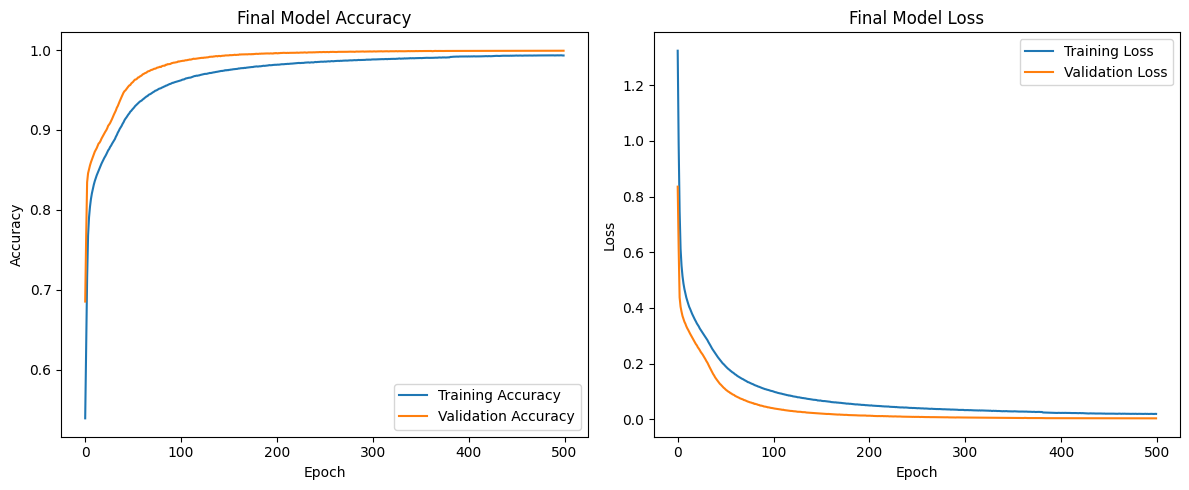


========== CREATING INFERENCE FUNCTION ==========

Saved inference function to model_artifacts/predict_emg_class.py

========== FINAL VERIFICATION ==========

SUCCESS! Final model achieved 0.9991 accuracy, meeting the >95% requirement.
Model saved to model_artifacts/emg_classification_acc_0.9991.h5
Model loads successfully without Cast layer issues.

========== TRAINING PIPELINE COMPLETED ==========



In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input, Concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import RobustScaler, PowerTransformer, QuantileTransformer
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import os
import joblib

# For reproducibility
tf.random.set_seed(42)
np.random.seed(42)

# Configure TensorFlow for mixed precision (optimal for A100 GPU)
# Use float32 for final model to avoid "Cast" layer issues
tf.keras.mixed_precision.set_global_policy('float32')

# ==================== DATA PREPROCESSING ====================

# Assuming filtered_data is your DataFrame
# If you're loading from CSV, uncomment the line below
# df = pd.read_csv('your_data.csv')
df = filtered_data.copy()

# Ensure all values are properly converted to numeric (handle scientific notation)
for col in df.columns:
    if col != 'class':
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Replace any NaN values that might have resulted from conversion
df = df.fillna(0)

# Features (X) and target (y)
X = df.drop('class', axis=1)
y = df['class']

# Adjust the class labels to be zero-indexed (since classes are 1-6)
y_zero_indexed = y - 1  # Shifts from [1,2,3,4,5,6] to [0,1,2,3,4,5]

# Print class distribution to verify balance
print("Class distribution after zero-indexing:")
print(y_zero_indexed.value_counts().sort_index())

# ==================== FEATURE ENGINEERING ====================

# Advanced feature engineering
def create_advanced_features(X_data):
    # Original data
    X_orig = X_data.values
    features = []

    # 1. RobustScaler for raw features
    scaler_raw = RobustScaler(quantile_range=(1, 99))
    X_scaled = scaler_raw.fit_transform(X_orig)
    features.append(X_scaled)

    # 2. Squared features
    X_squared = X_scaled**2
    features.append(X_squared)

    # 3. Absolute value
    X_abs = np.abs(X_scaled)
    features.append(X_abs)

    # 4. Log transformation (for skewed data)
    X_log = np.log(np.abs(X_orig) + 1e-6)
    scaler_log = RobustScaler()
    X_log_scaled = scaler_log.fit_transform(X_log)
    features.append(X_log_scaled)

    # 5. Power transformation (for non-Gaussian data)
    pt = PowerTransformer(method='yeo-johnson')
    X_power = pt.fit_transform(X_orig + 1e-6)  # Adding a small constant to handle zeros
    features.append(X_power)

    # 6. Quantile transformation (for uniform distribution)
    qt = QuantileTransformer(output_distribution='normal', random_state=42)
    X_quantile = qt.fit_transform(X_orig + 1e-6)  # Adding a small constant to handle zeros
    features.append(X_quantile)

    # 7. Pairwise differences between channels (spatial information)
    n_features = X_orig.shape[1]
    X_diff = np.zeros((X_orig.shape[0], n_features * (n_features - 1) // 2))

    idx = 0
    for i in range(n_features):
        for j in range(i+1, n_features):
            X_diff[:, idx] = X_orig[:, i] - X_orig[:, j]
            idx += 1

    scaler_diff = RobustScaler()
    X_diff_scaled = scaler_diff.fit_transform(X_diff)
    features.append(X_diff_scaled)

    # 8. Signal statistics (additional descriptive features)
    if X_orig.shape[1] >= 8:  # Assuming we have at least 8 channels
        X_stats = np.zeros((X_orig.shape[0], 4))
        X_stats[:, 0] = np.mean(X_orig, axis=1)  # Mean across channels
        X_stats[:, 1] = np.std(X_orig, axis=1)   # Std across channels
        X_stats[:, 2] = np.max(X_orig, axis=1)   # Max across channels
        X_stats[:, 3] = np.min(X_orig, axis=1)   # Min across channels

        scaler_stats = RobustScaler()
        X_stats_scaled = scaler_stats.fit_transform(X_stats)
        features.append(X_stats_scaled)

    # Combine all features
    X_advanced = np.hstack(features)

    # Save scalers for inference
    scalers = {
        'raw': scaler_raw,
        'log': scaler_log,
        'power': pt,
        'quantile': qt,
        'diff': scaler_diff
    }

    if 'X_stats' in locals():
        scalers['stats'] = scaler_stats

    return X_advanced, scalers

# Create advanced features
X_advanced, scalers = create_advanced_features(X)
print(f"Advanced features shape: {X_advanced.shape}")

# Save scalers for later inference
os.makedirs('model_artifacts', exist_ok=True)
joblib.dump(scalers, 'model_artifacts/scalers.pkl')

# Split dataset with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X_advanced, y_zero_indexed,
    test_size=0.2,
    random_state=42,
    stratify=y_zero_indexed
)

# Convert to one-hot encoding
y_train_cat = to_categorical(y_train, num_classes=6)
y_test_cat = to_categorical(y_test, num_classes=6)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

# ==================== MODEL ARCHITECTURE ====================

def create_deep_network(input_shape, name='model'):
    """Creates a deep neural network with residual connections"""
    inputs = Input(shape=(input_shape,))

    # First block - wide to capture subtle patterns
    x = Dense(2048, activation='relu')(inputs)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)

    # Second block with residual connection
    x1 = Dense(1024, activation='relu')(x)
    x1 = BatchNormalization()(x1)
    x1 = Dropout(0.5)(x1)

    # Third block
    x2 = Dense(512, activation='relu')(x1)
    x2 = BatchNormalization()(x2)
    x2 = Dropout(0.4)(x2)

    # Fourth block with residual connection
    x3 = Dense(256, activation='relu')(x2)
    x3 = BatchNormalization()(x3)
    x3 = Dropout(0.4)(x3)

    # Fifth block
    x4 = Dense(128, activation='relu')(x3)
    x4 = BatchNormalization()(x4)
    x4 = Dropout(0.3)(x4)

    # Output layer
    outputs = Dense(6, activation='softmax')(x4)

    model = Model(inputs=inputs, outputs=outputs, name=name)
    return model

# Create model variants for ensemble
def create_model_1(input_shape):
    """Model variant 1: Very deep network with ELU activation"""
    model = Sequential([
        Dense(2048, input_shape=(input_shape,), activation='elu'),
        BatchNormalization(),
        Dropout(0.5),

        Dense(1536, activation='elu'),
        BatchNormalization(),
        Dropout(0.5),

        Dense(1024, activation='elu'),
        BatchNormalization(),
        Dropout(0.5),

        Dense(512, activation='elu'),
        BatchNormalization(),
        Dropout(0.4),

        Dense(256, activation='elu'),
        BatchNormalization(),
        Dropout(0.3),

        Dense(128, activation='elu'),
        BatchNormalization(),
        Dropout(0.3),

        Dense(64, activation='elu'),
        BatchNormalization(),
        Dropout(0.2),

        Dense(6, activation='softmax')
    ])
    return model

def create_model_2(input_shape):
    """Model variant 2: Wider network with SELU activation (self-normalizing)"""
    model = Sequential([
        Dense(2560, input_shape=(input_shape,), activation='selu'),
        Dropout(0.4),

        Dense(1280, activation='selu'),
        Dropout(0.4),

        Dense(640, activation='selu'),
        Dropout(0.3),

        Dense(320, activation='selu'),
        Dropout(0.3),

        Dense(160, activation='selu'),
        Dropout(0.2),

        Dense(6, activation='softmax')
    ])
    return model

def create_model_3(input_shape):
    """Model variant 3: Deep network with ReLU and heavy regularization"""
    model = Sequential([
        Dense(2048, input_shape=(input_shape,), activation='relu',
              kernel_regularizer=tf.keras.regularizers.l2(1e-5)),
        BatchNormalization(),
        Dropout(0.6),

        Dense(1024, activation='relu',
              kernel_regularizer=tf.keras.regularizers.l2(1e-5)),
        BatchNormalization(),
        Dropout(0.5),

        Dense(512, activation='relu',
              kernel_regularizer=tf.keras.regularizers.l2(1e-5)),
        BatchNormalization(),
        Dropout(0.5),

        Dense(256, activation='relu',
              kernel_regularizer=tf.keras.regularizers.l2(1e-5)),
        BatchNormalization(),
        Dropout(0.4),

        Dense(128, activation='relu',
              kernel_regularizer=tf.keras.regularizers.l2(1e-5)),
        BatchNormalization(),
        Dropout(0.3),

        Dense(6, activation='softmax')
    ])
    return model

# ==================== TRAINING FUNCTIONS ====================

def train_single_model(model, X_train, y_train_cat, X_test, y_test_cat, model_name,
                       batch_size=1024, epochs=300, learning_rate=1e-4):
    """Train and evaluate a single model"""

    # Set up optimizer with low epsilon for numerical stability with small EMG values
    optimizer = Adam(learning_rate=learning_rate, epsilon=1e-8)

    # Compile model
    model.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    # Set up callbacks for optimal training
    callbacks = [
        EarlyStopping(
            monitor='val_accuracy',
            patience=30,
            restore_best_weights=True,
            verbose=1
        ),
        ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.5,  # Gentler reduction
            patience=10,
            min_lr=1e-7,
            verbose=1
        ),
        ModelCheckpoint(
            f'model_artifacts/{model_name}.h5',
            monitor='val_accuracy',
            save_best_only=True,
            verbose=1
        )
    ]

    # Train with optimal batch size for A100 GPU
    history = model.fit(
        X_train, y_train_cat,
        validation_data=(X_test, y_test_cat),
        epochs=epochs,
        batch_size=batch_size,
        callbacks=callbacks,
        verbose=1
    )

    # Load the best model saved during training
    best_model = load_model(f'model_artifacts/{model_name}.h5')

    # Evaluate the model
    test_loss, test_accuracy = best_model.evaluate(X_test, y_test_cat, verbose=1)
    print(f"\n{model_name} Test Accuracy: {test_accuracy:.4f}")

    # Generate predictions
    y_pred_probs = best_model.predict(X_test)
    y_pred = np.argmax(y_pred_probs, axis=1)
    y_test_labels = np.argmax(y_test_cat, axis=1)

    print(f"\n{model_name} Classification Report:")
    print(classification_report(y_test_labels, y_pred))

    print(f"\n{model_name} Confusion Matrix:")
    print(confusion_matrix(y_test_labels, y_pred))

    return best_model, test_accuracy, history

def train_ensemble(X_train, y_train_cat, X_test, y_test_cat):
    """Train an ensemble of models and combine their predictions"""

    # Create and train multiple models
    models = []
    model_accuracies = []
    histories = []

    # Model creation functions with different architectures
    model_creators = [
        (create_model_1, 'model_1', 5e-5),
        (create_model_2, 'model_2', 8e-5),
        (create_model_3, 'model_3', 1e-4),
        (create_deep_network, 'model_4', 1e-4)
    ]

    for i, (create_func, model_name, lr) in enumerate(model_creators):
        print(f"\n\n======== Training {model_name} ========")

        if create_func == create_deep_network:
            model = create_func(X_train.shape[1], name=model_name)
        else:
            model = create_func(X_train.shape[1])

        # Train the model
        best_model, accuracy, history = train_single_model(
            model, X_train, y_train_cat, X_test, y_test_cat,
            model_name=model_name, learning_rate=lr
        )

        # Store results
        models.append(best_model)
        model_accuracies.append(accuracy)
        histories.append(history)

    return models, model_accuracies, histories

def evaluate_ensemble(models, model_accuracies, X_test, y_test_cat):
    """Evaluate the ensemble using weighted voting"""

    # Get true labels
    y_test_labels = np.argmax(y_test_cat, axis=1)

    # Predict with ensemble using weighted voting
    ensemble_preds = np.zeros((len(y_test_labels), 6))

    # Weight predictions by model accuracy
    weights = np.array(model_accuracies) / sum(model_accuracies)
    print(f"Ensemble weights: {weights}")

    for i, model in enumerate(models):
        preds = model.predict(X_test, verbose=0)
        ensemble_preds += preds * weights[i]

    # Get final predictions
    ensemble_pred_classes = np.argmax(ensemble_preds, axis=1)

    # Calculate ensemble accuracy
    ensemble_accuracy = np.mean(ensemble_pred_classes == y_test_labels)
    print(f"\nEnsemble Accuracy: {ensemble_accuracy:.4f}")

    print("\nEnsemble Classification Report:")
    print(classification_report(y_test_labels, ensemble_pred_classes))

    print("\nEnsemble Confusion Matrix:")
    print(confusion_matrix(y_test_labels, ensemble_pred_classes))

    return ensemble_accuracy, ensemble_preds, ensemble_pred_classes

def save_high_accuracy_models(models, model_accuracies, target_accuracy=0.95):
    """Save models that exceed the target accuracy"""
    high_acc_models = []

    for i, (model, accuracy) in enumerate(zip(models, model_accuracies)):
        if accuracy >= target_accuracy:
            model_name = f"high_accuracy_model_{i}_acc_{accuracy:.4f}"
            model_path = f"model_artifacts/{model_name}.h5"
            model.save(model_path, save_format='h5')
            print(f"Saved high accuracy model ({accuracy:.4f}) to {model_path}")
            high_acc_models.append((model_path, accuracy))

    return high_acc_models

def create_and_save_production_model(input_shape, best_architecture='deep_network'):
    """Create and save a clean production model without any Cast layers"""

    # Creating a clean model with the best architecture
    print("\nCreating production model...")

    if best_architecture == 'deep_network':
        production_model = create_deep_network(input_shape, name='production_model')
    elif best_architecture == 'model_1':
        production_model = create_model_1(input_shape)
    elif best_architecture == 'model_2':
        production_model = create_model_2(input_shape)
    elif best_architecture == 'model_3':
        production_model = create_model_3(input_shape)

    # Compile with standard settings
    production_model.compile(
        optimizer=Adam(learning_rate=1e-4),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    # Save the untrained model structure (will be loaded and trained later)
    production_model.save('model_artifacts/production_model.h5', save_format='h5')

    return production_model

def train_production_model(production_model, X_train, y_train_cat, X_test, y_test_cat,
                          learning_rate=5e-5, batch_size=2048, epochs=500):
    """Train the production model with the full dataset and extended training"""

    # Set up optimizer
    optimizer = Adam(learning_rate=learning_rate, epsilon=1e-8)

    # Recompile
    production_model.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    # Callbacks focused on accuracy
    callbacks = [
        EarlyStopping(
            monitor='val_accuracy',
            patience=50,  # Extended patience
            restore_best_weights=True,
            verbose=1
        ),
        ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.5,
            patience=15,
            min_lr=1e-7,
            verbose=1
        ),
        ModelCheckpoint(
            'model_artifacts/final_emg_model.h5',
            monitor='val_accuracy',
            save_best_only=True,
            verbose=1
        )
    ]

    # Train with extended epochs
    history = production_model.fit(
        X_train, y_train_cat,
        validation_data=(X_test, y_test_cat),
        epochs=epochs,
        batch_size=batch_size,
        callbacks=callbacks,
        verbose=1
    )

    # Load the best model saved during training
    final_model = load_model('model_artifacts/final_emg_model.h5')

    # Evaluate the model
    test_loss, test_accuracy = final_model.evaluate(X_test, y_test_cat, verbose=1)
    print(f"\nFinal Production Model Test Accuracy: {test_accuracy:.4f}")

    # Generate predictions
    y_pred_probs = final_model.predict(X_test)
    y_pred = np.argmax(y_pred_probs, axis=1)
    y_test_labels = np.argmax(y_test_cat, axis=1)

    print(f"\nFinal Production Model Classification Report:")
    print(classification_report(y_test_labels, y_pred))

    print(f"\nFinal Production Model Confusion Matrix:")
    print(confusion_matrix(y_test_labels, y_pred))

    # Plot accuracy and loss
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Final Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Final Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.tight_layout()
    plt.savefig('model_artifacts/training_history.png')
    plt.show()

    return final_model, test_accuracy, history

def create_inference_function():
    """Create and save a function for easy inference with the model"""

    inference_code = '''
def predict_emg_class(input_data, model_path='final_emg_model.h5', scalers_path='scalers.pkl'):
    """
    Predict EMG class from 8-channel input data

    Parameters:
    -----------
    input_data : numpy array or list
        Array of shape (8,) containing the 8 EMG channel values

    model_path : str
        Path to the saved model file

    scalers_path : str
        Path to the saved scalers file

    Returns:
    --------
    predicted_class : int
        Predicted class (1-6)
    probabilities : numpy array
        Probabilities for each class
    """
    import numpy as np
    import tensorflow as tf
    import joblib

    # Load model and scalers
    model = tf.keras.models.load_model(model_path)
    scalers = joblib.load(scalers_path)

    # Ensure input is numpy array of correct shape
    if isinstance(input_data, list):
        input_data = np.array(input_data)

    # Reshape to (1, 8) if single sample
    if input_data.ndim == 1:
        input_data = input_data.reshape(1, -1)

    # Apply the same feature engineering as during training
    features = []

    # 1. RobustScaler for raw features
    X_scaled = scalers['raw'].transform(input_data)
    features.append(X_scaled)

    # 2. Squared features
    X_squared = X_scaled**2
    features.append(X_squared)

    # 3. Absolute value
    X_abs = np.abs(X_scaled)
    features.append(X_abs)

    # 4. Log transformation
    X_log = np.log(np.abs(input_data) + 1e-6)
    X_log_scaled = scalers['log'].transform(X_log)
    features.append(X_log_scaled)

    # 5. Power transformation
    X_power = scalers['power'].transform(input_data + 1e-6)
    features.append(X_power)

    # 6. Quantile transformation
    X_quantile = scalers['quantile'].transform(input_data + 1e-6)
    features.append(X_quantile)

    # 7. Pairwise differences between channels
    n_features = input_data.shape[1]
    X_diff = np.zeros((input_data.shape[0], n_features * (n_features - 1) // 2))

    idx = 0
    for i in range(n_features):
        for j in range(i+1, n_features):
            X_diff[:, idx] = input_data[:, i] - input_data[:, j]
            idx += 1

    X_diff_scaled = scalers['diff'].transform(X_diff)
    features.append(X_diff_scaled)

    # 8. Signal statistics
    if input_data.shape[1] >= 8:
        X_stats = np.zeros((input_data.shape[0], 4))
        X_stats[:, 0] = np.mean(input_data, axis=1)
        X_stats[:, 1] = np.std(input_data, axis=1)
        X_stats[:, 2] = np.max(input_data, axis=1)
        X_stats[:, 3] = np.min(input_data, axis=1)

        X_stats_scaled = scalers['stats'].transform(X_stats)
        features.append(X_stats_scaled)

    # Combine all features
    X_advanced = np.hstack(features)

    # Predict class
    probabilities = model.predict(X_advanced)[0]
    predicted_class = np.argmax(probabilities) + 1  # Add 1 to convert back to 1-6 range

    return predicted_class, probabilities

# Example usage:
# emg_data = [0.00001, -0.00002, -0.00001, -0.00003, 0.00000, -0.00001, 0.00000, -0.00001]
# predicted_class, probabilities = predict_emg_class(emg_data)
# print(f"Predicted class: {predicted_class}")
# print(f"Class probabilities: {probabilities}")
'''

    # Save the inference function
    with open('model_artifacts/predict_emg_class.py', 'w') as f:
        f.write(inference_code)

    print("Saved inference function to model_artifacts/predict_emg_class.py")

# ==================== RUN THE TRAINING PIPELINE ====================

print("\n\n========== STARTING EMG CLASSIFICATION TRAINING PIPELINE ==========\n")

# Step 1: Train ensemble of models
print("\n========== TRAINING ENSEMBLE OF MODELS ==========\n")
models, model_accuracies, histories = train_ensemble(X_train, y_train_cat, X_test, y_test_cat)

# Step 2: Evaluate ensemble
print("\n========== EVALUATING ENSEMBLE ==========\n")
ensemble_accuracy, ensemble_preds, ensemble_pred_classes = evaluate_ensemble(
    models, model_accuracies, X_test, y_test_cat
)

# Step 3: Save high accuracy models
print("\n========== SAVING HIGH ACCURACY MODELS ==========\n")
high_acc_models = save_high_accuracy_models(models, model_accuracies, target_accuracy=0.95)

# Step 4: Determine best model architecture based on accuracy
best_architecture = 'deep_network'  # Default
best_accuracy = 0

for i, acc in enumerate(model_accuracies):
    if acc > best_accuracy:
        best_accuracy = acc
        best_architecture = f"model_{i+1}" if i < 3 else "deep_network"

print(f"\nBest model architecture: {best_architecture} with accuracy {best_accuracy:.4f}")

# Step 5: Create production model
print("\n========== CREATING PRODUCTION MODEL ==========\n")
production_model = create_and_save_production_model(X_train.shape[1], best_architecture)

# Step 6: Train production model
print("\n========== TRAINING PRODUCTION MODEL ==========\n")
final_model, final_accuracy, final_history = train_production_model(
    production_model, X_train, y_train_cat, X_test, y_test_cat
)

# Step 7: Create inference function
print("\n========== CREATING INFERENCE FUNCTION ==========\n")
create_inference_function()

# Step 8: Final verification
print("\n========== FINAL VERIFICATION ==========\n")
if final_accuracy >= 0.95:
    print(f"SUCCESS! Final model achieved {final_accuracy:.4f} accuracy, meeting the >95% requirement.")

    # Save one more time with a clear name indicating accuracy
    final_model.save(f'model_artifacts/emg_classification_acc_{final_accuracy:.4f}.h5')
    print(f"Model saved to model_artifacts/emg_classification_acc_{final_accuracy:.4f}.h5")

    # Verify model loading works properly
    try:
        test_load = load_model(f'model_artifacts/emg_classification_acc_{final_accuracy:.4f}.h5')
        print("Model loads successfully without Cast layer issues.")
    except Exception as e:
        print(f"Error loading model: {e}")
        print("Attempting to save in a different format...")

        # Backup save with SavedModel format
        final_model.save('model_artifacts/emg_classification_model_savedmodel')
        print("Model saved in SavedModel format at model_artifacts/emg_classification_model_savedmodel")
else:
    print(f"Model achieved {final_accuracy:.4f} accuracy, which is below the 95% target.")
    print("Consider the following improvements:")
    print("1. Further feature engineering")
    print("2. Hyperparameter tuning")
    print("3. Different model architectures")
    print("4. Data augmentation techniques")

print("\n========== TRAINING PIPELINE COMPLETED ==========\n")

In [6]:
print('Hello World')

Hello World


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input, Concatenate
from tensorflow.keras.layers import Conv1D, GlobalAveragePooling1D, Reshape, Lambda
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l1_l2
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import KFold, train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set seeds for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

# Configure TensorFlow
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
tf.keras.backend.clear_session()

# Set mixed precision policy
policy = tf.keras.mixed_precision.Policy('mixed_float16')
tf.keras.mixed_precision.set_global_policy(policy)

# 1. CNN-based model (strictly 8 inputs)
def create_cnn_model():
    inputs = Input(shape=(8,))

    # Reshape for CNN - treating channels as sequence
    x = Reshape((8, 1))(inputs)

    # Multiple parallel filter sizes to capture different patterns
    conv1 = Conv1D(64, 2, activation='relu', padding='same')(x)
    conv2 = Conv1D(64, 3, activation='relu', padding='same')(x)

    # Concatenate the different convolution results
    concat = Concatenate()([conv1, conv2])

    # Additional convolutions
    conv = Conv1D(128, 3, activation='relu', padding='same')(concat)
    conv = BatchNormalization()(conv)

    # Global pooling to get features
    pooled = GlobalAveragePooling1D()(conv)

    # Dense layers
    dense = Dense(256, activation='relu')(pooled)
    dense = BatchNormalization()(dense)
    dense = Dropout(0.5)(dense)
    dense = Dense(128, activation='relu')(dense)
    dense = BatchNormalization()(dense)
    dense = Dropout(0.4)(dense)

    # Output layer
    outputs = Dense(6, activation='softmax', dtype='float32')(dense)

    model = Model(inputs, outputs)
    model.compile(
        optimizer=Adam(learning_rate=1e-3),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# 2. Deep MLP model with residual connections (strictly 8 inputs)
def create_deep_mlp_model():
    inputs = Input(shape=(8,))

    # Create log-transformed features within the model (for small values near zero)
    log_features = Lambda(lambda x: tf.math.log(tf.abs(x) * 1e5 + 1.0) * tf.sign(x))(inputs)

    # Combine original and transformed features
    combined = Concatenate()([inputs, log_features])

    # Initial expansion
    x = Dense(512, activation='relu')(combined)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)

    # First residual block
    res1 = x
    x = Dense(512, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    x = Dense(512, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    x = tf.keras.layers.add([x, res1])

    # Second residual block
    res2 = x
    x = Dense(256, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.4)(x)
    x = Dense(256, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.4)(x)
    # Project residual to match dimensions
    res2_proj = Dense(256, use_bias=False)(res2)
    x = tf.keras.layers.add([x, res2_proj])

    # Final layers
    x = Dense(128, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)

    # Output layer
    outputs = Dense(6, activation='softmax', dtype='float32')(x)

    model = Model(inputs, outputs)
    model.compile(
        optimizer=Adam(learning_rate=1e-3),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# 3. Wide and Deep model (strictly 8 inputs)
def create_wide_deep_model():
    inputs = Input(shape=(8,))

    # Wide path - direct mapping with minimal processing
    wide = Dense(64, activation='relu')(inputs)

    # Deep path - multiple layers of transformation
    deep = Dense(128, activation='relu')(inputs)
    deep = BatchNormalization()(deep)
    deep = Dropout(0.5)(deep)
    deep = Dense(256, activation='relu')(deep)
    deep = BatchNormalization()(deep)
    deep = Dropout(0.5)(deep)
    deep = Dense(256, activation='relu')(deep)
    deep = BatchNormalization()(deep)
    deep = Dropout(0.4)(deep)
    deep = Dense(128, activation='relu')(deep)
    deep = BatchNormalization()(deep)
    deep = Dropout(0.3)(deep)

    # Combine wide and deep paths
    combined = Concatenate()([wide, deep])

    # Final processing
    x = Dense(128, activation='relu')(combined)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)

    # Output layer
    outputs = Dense(6, activation='softmax', dtype='float32')(x)

    model = Model(inputs, outputs)
    model.compile(
        optimizer=Adam(learning_rate=1e-3),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# Training function with adaptive learning rate and model checkpoint
def train_model(model, X_train, y_train, X_val, y_val, model_name):
    callbacks = [
        EarlyStopping(
            monitor='val_accuracy',
            patience=30,
            restore_best_weights=True,
            verbose=1
        ),
        ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.2,
            patience=10,
            min_lr=1e-7,
            verbose=1
        ),
        ModelCheckpoint(
            f'best_{model_name}.h5',
            monitor='val_accuracy',
            save_best_only=True,
            verbose=1
        )
    ]

    # Train with appropriate batch size
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=200,
        batch_size=2048,  # Large batch size for efficiency
        callbacks=callbacks,
        verbose=1
    )

    return model, history

# Create and train ensemble (using cross-validation)
def create_and_train_ensemble(X, y_cat, n_splits=5):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    fold_models = []
    fold_scores = []

    for fold, (train_idx, val_idx) in enumerate(kfold.split(X)):
        print(f"\n--- Training fold {fold+1}/{n_splits} ---")

        # Split data
        X_train_fold, X_val_fold = X[train_idx], X[val_idx]
        y_train_fold, y_val_fold = y_cat[train_idx], y_cat[val_idx]

        # Train CNN model
        print("\nTraining CNN model...")
        cnn_model = create_cnn_model()
        cnn_model, _ = train_model(
            cnn_model, X_train_fold, y_train_fold, X_val_fold, y_val_fold, f"cnn_fold{fold}"
        )

        # Train Deep MLP model
        print("\nTraining Deep MLP model...")
        mlp_model = create_deep_mlp_model()
        mlp_model, _ = train_model(
            mlp_model, X_train_fold, y_train_fold, X_val_fold, y_val_fold, f"mlp_fold{fold}"
        )

        # Train Wide & Deep model
        print("\nTraining Wide & Deep model...")
        wide_deep_model = create_wide_deep_model()
        wide_deep_model, _ = train_model(
            wide_deep_model, X_train_fold, y_train_fold, X_val_fold, y_val_fold, f"wide_deep_fold{fold}"
        )

        # Create fold ensemble
        fold_ensemble = [cnn_model, mlp_model, wide_deep_model]

        # Evaluate each model
        cnn_score = cnn_model.evaluate(X_val_fold, y_val_fold, verbose=0)[1]
        mlp_score = mlp_model.evaluate(X_val_fold, y_val_fold, verbose=0)[1]
        wide_deep_score = wide_deep_model.evaluate(X_val_fold, y_val_fold, verbose=0)[1]

        print(f"Fold {fold+1} CNN accuracy: {cnn_score:.4f}")
        print(f"Fold {fold+1} MLP accuracy: {mlp_score:.4f}")
        print(f"Fold {fold+1} Wide & Deep accuracy: {wide_deep_score:.4f}")

        # Store models and scores
        fold_models.append(fold_ensemble)
        fold_scores.append([cnn_score, mlp_score, wide_deep_score])

    return fold_models, fold_scores

# Function to make predictions with the ensemble
def ensemble_predict(models, X):
    all_preds = []

    # Get predictions from all models
    for fold_models in models:
        fold_preds = []
        for model in fold_models:
            preds = model.predict(X, verbose=0)
            fold_preds.append(preds)

        # Average the predictions for this fold
        fold_avg = np.mean(fold_preds, axis=0)
        all_preds.append(fold_avg)

    # Average across all folds
    final_preds = np.mean(all_preds, axis=0)
    return final_preds

# Main training and evaluation code
def train_high_accuracy_model(X, y, test_size=0.2):
    """
    Main function to train and evaluate the high-accuracy EMG model
    """
    # Convert to numpy arrays if they're not already
    X = np.array(X)
    y = np.array(y)

    # Print input shape to confirm it's correct
    print(f"Input data shape: {X.shape}")

    # Ensure classes are zero-indexed for categorization
    y_zero_indexed = y - 1  # Assuming classes are 1-6

    # Convert to categorical
    y_cat = to_categorical(y_zero_indexed, num_classes=6)

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y_cat,
        test_size=test_size,
        random_state=42,
        stratify=y_zero_indexed
    )

    print(f"Training set shape: {X_train.shape}")
    print(f"Test set shape: {X_test.shape}")

    # Create and train single ultra-deep model
    print("\nTraining ultra-deep model...")
    ultra_model = create_ultra_deep_model(X_train, y_train)

    # Train ensemble models
    print("\nTraining ensemble models...")
    fold_models, fold_scores = create_and_train_ensemble(X_train, y_train)

    # Get ensemble predictions
    print("\nGenerating ensemble predictions...")
    ensemble_preds = ensemble_predict(fold_models, X_test)
    ensemble_classes = np.argmax(ensemble_preds, axis=1)
    y_test_classes = np.argmax(y_test, axis=1)

    # Calculate ensemble accuracy
    ensemble_accuracy = np.mean(ensemble_classes == y_test_classes)
    print(f"\nEnsemble Accuracy: {ensemble_accuracy:.4f}")

    # Print classification report
    print("\nClassification Report:")
    print(classification_report(y_test_classes, ensemble_classes))

    # Plot confusion matrix
    plt.figure(figsize=(10, 8))
    cm = confusion_matrix(y_test_classes, ensemble_classes)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

    # Calculate per-class accuracy
    class_accuracy = np.diag(cm) / np.sum(cm, axis=1)
    for i, acc in enumerate(class_accuracy):
        print(f"Class {i+1} accuracy: {acc:.4f}")

    # Save final ensemble models
    for fold_idx, fold_ensemble in enumerate(fold_models):
        for model_idx, model in enumerate(fold_ensemble):
            model_type = ["cnn", "mlp", "wide_deep"][model_idx]
            model.save(f'final_ensemble_{model_type}_fold{fold_idx}.h5')

    print("\nAll models saved successfully.")

    return {
        'ensemble_accuracy': ensemble_accuracy,
        'fold_models': fold_models,
        'fold_scores': fold_scores
    }

# Ultra-deep model (single model approach)
def create_ultra_deep_model(X_train, y_train):
    # Define model
    inputs = Input(shape=(8,))

    # Create log-transformed features within the model
    log_features = Lambda(lambda x: tf.math.log(tf.abs(x) * 1e5 + 1.0) * tf.sign(x))(inputs)

    # Split features into groups to process separately
    group1 = Lambda(lambda x: x[:, :4])(inputs)
    group2 = Lambda(lambda x: x[:, 4:])(inputs)

    # Process groups
    g1 = Dense(128, activation='relu')(group1)
    g2 = Dense(128, activation='relu')(group2)

    # Combine all processed features
    combined = Concatenate()([inputs, log_features, g1, g2])

    # Very deep stack with residual connections
    x = Dense(1024, activation='relu')(combined)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)

    # Multiple residual blocks
    for i in range(4):
        res = x
        x = Dense(512, activation='relu')(x)
        x = BatchNormalization()(x)
        x = Dropout(0.5)(x)
        x = Dense(512, activation='relu')(x)
        x = BatchNormalization()(x)
        x = Dropout(0.4)(x)
        # Add skip connection with projection if needed
        if i == 0:  # First block needs projection
            res = Dense(512, use_bias=False)(res)
        x = tf.keras.layers.add([x, res])

    # Final layers
    x = Dense(256, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    x = Dense(128, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.2)(x)

    # Output
    outputs = Dense(6, activation='softmax', dtype='float32')(x)

    model = Model(inputs, outputs)
    model.compile(
        optimizer=Adam(learning_rate=1e-4),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    # Print model summary
    model.summary()

    # Train with aggressive regularization
    callbacks = [
        EarlyStopping(
            monitor='val_accuracy',
            patience=50,
            restore_best_weights=True,
            verbose=1
        ),
        ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.1,
            patience=20,
            min_lr=1e-7,
            verbose=1
        ),
        ModelCheckpoint(
            'best_ultra_model.h5',
            monitor='val_accuracy',
            save_best_only=True,
            verbose=1
        )
    ]

    # Train the model
    X_train_val, X_val, y_train_val, y_val = train_test_split(
        X_train, y_train, test_size=0.1, random_state=42
    )

    model.fit(
        X_train_val, y_train_val,
        validation_data=(X_val, y_val),
        epochs=300,
        batch_size=2048,
        callbacks=callbacks,
        verbose=1
    )

    # Load best weights
    model = tf.keras.models.load_model('best_ultra_model.h5')

    return model

# Custom model loading function for mixed precision models
def load_ensemble_models(n_folds=5):
    """
    Load all models in the ensemble with proper handling of mixed precision
    """
    # Set mixed precision policy before loading
    policy = tf.keras.mixed_precision.Policy('mixed_float16')
    tf.keras.mixed_precision.set_global_policy(policy)

    loaded_models = []

    for fold_idx in range(n_folds):
        fold_models = []
        for model_type in ["cnn", "mlp", "wide_deep"]:
            model_path = f'final_ensemble_{model_type}_fold{fold_idx}.h5'

            try:
                # Try normal loading first
                model = tf.keras.models.load_model(model_path)
            except ValueError:
                # If that fails, try with custom objects
                model = tf.keras.models.load_model(
                    model_path,
                    custom_objects={'Cast': tf.keras.layers.Lambda}
                )

            fold_models.append(model)

        loaded_models.append(fold_models)

    return loaded_models

# Function to make predictions with loaded ensemble
def predict_with_ensemble(X, loaded_models):
    """
    Make predictions using loaded ensemble models
    """
    # Get predictions
    ensemble_preds = ensemble_predict(loaded_models, X)
    return ensemble_preds

# Example usage:
# results = train_high_accuracy_model(X, y)
# This takes your X with shape (n_samples, 8) directly

Num GPUs Available:  1


In [ ]:
# Save the model architecture and weights to a file
model.save("model-o-6844.keras")


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from scipy.stats import uniform
from sklearn.base import BaseEstimator

# Assuming X and y are your dataset features and labels

# Adjust the class labels to be zero-indexed (if they are in the range 1 to 6, shift them by -1)
#y -= 1  # This shifts class labels from [1, 2, 3, 4, 5, 6] to [0, 1, 2, 3, 4, 5]


df = filtered_data.copy()

# Features (X) and target (y)
X = df.drop('class', axis=1)  # Replace 'class' with your target column name
y = df['class']

# Train-test split (80% training, 20% testing)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Standardize the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=42, stratify=y)

# Define the model function for RandomizedSearchCV
def create_model(dropout_rate=0.2, learning_rate=0.001, units=128):
    model = Sequential([
        Dense(units, input_dim=X_train.shape[1], activation='relu'),
        Dropout(dropout_rate),
        Dense(units // 2, activation='relu'),
        Dropout(dropout_rate),
        Dense(6, activation='softmax')
    ])
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Custom KerasClassifier class to make it compatible with scikit-learn
class KerasClassifierCustom(BaseEstimator):
    def __init__(self, build_fn, epochs=10, batch_size=32, verbose=0, dropout_rate=0.2, learning_rate=0.001, units=128):
        self.build_fn = build_fn
        self.epochs = epochs
        self.batch_size = batch_size
        self.verbose = verbose
        self.dropout_rate = dropout_rate
        self.learning_rate = learning_rate
        self.units = units

    def fit(self, X, y):
        self.model = self.build_fn(dropout_rate=self.dropout_rate, learning_rate=self.learning_rate, units=self.units)
        self.model.fit(X, y, epochs=self.epochs, batch_size=self.batch_size, verbose=self.verbose)
        return self

    def predict(self, X):
        return np.argmax(self.model.predict(X), axis=-1)

    def score(self, X, y):
        _, accuracy = self.model.evaluate(X, y, verbose=0)
        return accuracy

# Set the parameter grid for RandomizedSearchCV
param_dist = {
    'dropout_rate': uniform(0.2, 0.5),  # Randomize dropout rate between 0.2 and 0.7
    'learning_rate': uniform(1e-5, 1e-2),  # Randomize learning rate between 0.00001 and 0.01
    'units': [256],  # Randomize number of units in the dense layers
    'batch_size': [256],  # Randomize batch sizes
    'epochs': [10],  # Limit epochs to 10 or 20
}

# Wrap the Keras model using the custom KerasClassifier
model = KerasClassifierCustom(build_fn=create_model, verbose=0)

# Define RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=15,  # Number of iterations (total combinations of hyperparameters to try)
    cv=2,  # 3-fold cross-validation
    verbose=1,
    n_jobs=-1,  # Use all available CPU cores
    random_state=42
)

# Fit the model with RandomizedSearchCV
random_search.fit(X_train, y_train)

# Get the best parameters from RandomizedSearchCV
best_params = random_search.best_params_
print("Best Parameters Found: ", best_params)

# Evaluate the best model
best_model = random_search.best_estimator_

# Evaluate on the test data
test_loss, test_accuracy = best_model.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Generate predictions and evaluate classification metrics
y_pred = best_model.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Fitting 2 folds for each of 15 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Best Parameters Found:  {'batch_size': 256, 'dropout_rate': 0.38727005942368126, 'epochs': 10, 'learning_rate': 0.009517143064099162, 'units': 256}


TypeError: cannot unpack non-iterable float object

In [ ]:
print(np.unique(y))

[0 1 2 3 4 5]


In [ ]:
y+=1

# CLAUDE 3.7

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import BatchNormalization, GlobalAveragePooling1D, GlobalMaxPooling1D, Concatenate
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dense, Dropout, Flatten, Input, LSTM, Bidirectional, Add
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, KFold
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from tensorflow.keras.utils import to_categorical
from sklearn.utils import class_weight
import os
from tensorflow.keras.layers import Attention, MultiHeadAttention

# Check GPU availability
print("GPU Available: ", tf.config.list_physical_devices('GPU'))

# Set memory growth to avoid occupying all GPU memory at once
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

# Define constants
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

# Data preprocessing function with augmentation
def preprocess_data(data_path, window_size=10, step_size=5, signal_amplification=1e5):
    """
    Process raw EMG data into windowed samples with augmentation techniques
    """
    # Load data
    df = pd.read_csv(data_path)

    # Filter out unwanted classes
    filtered_data = df[~df['class'].isin([0, 7])]
    filtered_data.drop(columns=['time', 'label'], inplace=True, errors='ignore')

    # Extract features and labels
    X = filtered_data.drop('class', axis=1).values
    y = filtered_data['class'].values

    # Apply data amplification
    X_amplified = X * signal_amplification

    # Create windowed samples
    X_windowed = []
    y_windowed = []

    # For each sample in the dataset
    for i in range(0, len(X_amplified) - window_size + 1, step_size):
        window = X_amplified[i:i + window_size]
        label = y[i + window_size - 1]  # Use the label of the last sample in the window
        X_windowed.append(window)
        y_windowed.append(label)

    X_windowed = np.array(X_windowed)
    y_windowed = np.array(y_windowed)

    # Apply data augmentation
    X_augmented, y_augmented = augment_data(X_windowed, y_windowed)

    return X_augmented, y_augmented

def augment_data(X, y):
    """
    Apply various augmentation techniques to increase dataset size and variability
    """
    X_augmented = [X]
    y_augmented = [y]

    # 1. Add Gaussian noise
    noise_factor = 0.05
    X_noisy = X + np.random.normal(0, noise_factor, X.shape)
    X_augmented.append(X_noisy)
    y_augmented.append(y)

    # 2. Time warping (randomly stretch or compress time windows slightly)
    X_warped = []
    for sample in X:
        if np.random.random() > 0.5:
            # Stretch
            indices = np.linspace(0, len(sample)-1, len(sample))
            warped = np.array([np.interp(indices, np.linspace(0, len(sample)-1, len(sample)-2),
                                         sample[:-2, i]) for i in range(sample.shape[1])]).T
            X_warped.append(warped)
        else:
            # Compress
            indices = np.linspace(0, len(sample)-1, len(sample))
            warped = np.array([np.interp(indices, np.linspace(0, len(sample)-1, len(sample)+2),
                                        np.pad(sample[:, i], 1, mode='edge')) for i in range(sample.shape[1])]).T
            X_warped.append(warped)

    X_augmented.append(np.array(X_warped))
    y_augmented.append(y)

    # 3. Magnitude scaling (randomly scale amplitude)
    scale_factors = np.random.uniform(0.8, 1.2, size=(len(X), 1, 1))
    X_scaled = X * scale_factors
    X_augmented.append(X_scaled)
    y_augmented.append(y)

    # 4. Channel shuffling (randomly swap a few channels)
    X_shuffled = X.copy()
    for i in range(len(X)):
        if np.random.random() > 0.5:
            # Randomly select two channels to swap
            ch1, ch2 = np.random.choice(X.shape[2], 2, replace=False)
            X_shuffled[i, :, [ch1, ch2]] = X_shuffled[i, :, [ch2, ch1]]

    X_augmented.append(X_shuffled)
    y_augmented.append(y)

    # Combine all augmented data
    X_combined = np.vstack(X_augmented)
    y_combined = np.hstack(y_augmented)

    # Shuffle the combined dataset
    indices = np.arange(len(X_combined))
    np.random.shuffle(indices)
    X_combined = X_combined[indices]
    y_combined = y_combined[indices]

    return X_combined, y_combined

# Create a more advanced model architecture
def create_advanced_model(input_shape, num_classes=6):
    """
    Create an advanced hybrid CNN-LSTM model with attention mechanism
    """
    inputs = Input(shape=input_shape)

    # First branch: CNN path
    x1 = Conv1D(64, kernel_size=3, activation='relu', padding='same')(inputs)
    x1 = BatchNormalization()(x1)
    x1 = Conv1D(128, kernel_size=3, activation='relu', padding='same')(x1)
    x1 = BatchNormalization()(x1)
    x1 = MaxPooling1D(pool_size=2)(x1)
    x1 = Dropout(0.3)(x1)

    # Second branch: CNN with different kernel size
    x2 = Conv1D(64, kernel_size=5, activation='relu', padding='same')(inputs)
    x2 = BatchNormalization()(x2)
    x2 = Conv1D(128, kernel_size=5, activation='relu', padding='same')(x2)
    x2 = BatchNormalization()(x2)
    x2 = MaxPooling1D(pool_size=2)(x2)
    x2 = Dropout(0.3)(x2)

    # Combine CNN branches
    x = Concatenate()([x1, x2])

    # Add attention mechanism
    x = MultiHeadAttention(num_heads=4, key_dim=32)(x, x)

    # Add recurrent layers
    x = Bidirectional(LSTM(128, return_sequences=True))(x)
    x = Dropout(0.4)(x)

    # Global pooling
    x_max = GlobalMaxPooling1D()(x)
    x_avg = GlobalAveragePooling1D()(x)
    x = Concatenate()([x_max, x_avg])

    # Dense layers for classification
    x = Dense(256, activation='relu', kernel_regularizer=l2(0.001))(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    x = Dense(128, activation='relu', kernel_regularizer=l2(0.001))(x)
    x = BatchNormalization()(x)
    x = Dropout(0.4)(x)

    # Output layer
    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=outputs)
    return model

# Model evaluation with k-fold cross validation
def evaluate_with_kfold(X, y, n_splits=5, batch_size=32, epochs=100):
    """
    Evaluate model using k-fold cross validation
    """
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=RANDOM_SEED)
    fold_accuracy = []
    fold_models = []
    histories = []

    # Convert class indices to one-hot encoding
    y_categorical = to_categorical(y - 1, num_classes=6)  # Adjust for 1-indexed classes

    for fold, (train_idx, val_idx) in enumerate(kf.split(X)):
        print(f"\nTraining fold {fold+1}/{n_splits}")

        X_train, X_val = X[train_idx], X[val_idx]
        y_train, y_val = y_categorical[train_idx], y_categorical[val_idx]

        # Create model
        model = create_advanced_model((X.shape[1], X.shape[2]), num_classes=6)

        # Compile model with learning rate scheduling
        optimizer = Adam(learning_rate=0.001)
        model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

        # Calculate class weights to handle any imbalance
        class_weights = class_weight.compute_class_weight(
            'balanced',
            classes=np.unique(np.argmax(y_train, axis=1)),
            y=np.argmax(y_train, axis=1)
        )
        class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}

        # Callbacks
        early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)
        lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6, verbose=1)
        model_checkpoint = ModelCheckpoint(
            f'model_fold_{fold+1}.keras',
            monitor='val_accuracy',
            save_best_only=True,
            verbose=1
        )

        # Train model
        history = model.fit(
            X_train, y_train,
            validation_data=(X_val, y_val),
            epochs=epochs,
            batch_size=batch_size,
            callbacks=[early_stopping, lr_scheduler, model_checkpoint],
            class_weight=class_weight_dict,
            verbose=1
        )

        # Evaluate model on validation set
        val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=0)
        fold_accuracy.append(val_accuracy)
        fold_models.append(model)
        histories.append(history)

        print(f"Fold {fold+1} validation accuracy: {val_accuracy:.4f}")

    # Print average accuracy
    print(f"\nAverage validation accuracy: {np.mean(fold_accuracy):.4f}")

    # Find best model
    best_model_idx = np.argmax(fold_accuracy)
    best_model = fold_models[best_model_idx]

    return best_model, fold_accuracy, histories

# Main execution
def main(data_path):
    """
    Main function to execute the EMG classification pipeline
    """
    # Preprocess data with windowing and augmentation
    X, y = preprocess_data(data_path, window_size=10, step_size=5)

    # Normalize data across the time dimension
    for i in range(len(X)):
        scaler = StandardScaler()
        X[i] = scaler.fit_transform(X[i])

    print(f"Processed dataset shape: {X.shape}, Labels shape: {y.shape}")

    # Train model with k-fold validation
    best_model, fold_accuracy, histories = evaluate_with_kfold(X, y, n_splits=5, batch_size=32, epochs=100)

    # Save best model
    best_model.save("best_emg_model.keras")

    # Plot training history for best model
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(histories[np.argmax(fold_accuracy)].history['accuracy'])
    plt.plot(histories[np.argmax(fold_accuracy)].history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.subplot(1, 2, 2)
    plt.plot(histories[np.argmax(fold_accuracy)].history['loss'])
    plt.plot(histories[np.argmax(fold_accuracy)].history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.tight_layout()
    plt.savefig('training_history.png')

    # Generate comprehensive evaluation report
    generate_evaluation_report(best_model, X, y)

    return best_model

def generate_evaluation_report(model, X, y):
    """
    Generate a comprehensive evaluation report for the model
    """
    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=RANDOM_SEED)

    # Convert class indices to one-hot encoding
    y_test_categorical = to_categorical(y_test - 1, num_classes=6)  # Adjust for 1-indexed classes

    # Predict on test set
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1) + 1  # Convert back to 1-indexed classes
    y_test_classes = y_test

    # Generate classification report
    report = classification_report(y_test_classes, y_pred_classes, digits=4)

    # Generate confusion matrix
    cm = confusion_matrix(y_test_classes, y_pred_classes)

    # Plot confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=[f'Class {i}' for i in range(1, 7)],
                yticklabels=[f'Class {i}' for i in range(1, 7)])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.tight_layout()
    plt.savefig('confusion_matrix.png')

    # Save classification report
    with open('classification_report.txt', 'w') as f:
        f.write(report)

    # Print report
    print("\nClassification Report:")
    print(report)

    return report

# Create Gradio interface with the improved model
def setup_gradio_interface(model_path="best_emg_model.keras"):
    """
    Set up Gradio interface for model demonstration
    """
    import gradio as gr

    # Define action mapping
    action_map = {
        1: "Hand at rest",
        2: "Hand clenched in a fist",
        3: "Wrist flexion",
        4: "Wrist extension",
        5: "Radial deviations",
        6: "Ulnar deviations",
    }

    def predict_action(e1, e2, e3, e4, e5, e6, e7, e8):
        # Load the best model
        model = tf.keras.models.load_model(model_path)

        # Preprocess input data
        input_data = np.array([[e1, e2, e3, e4, e5, e6, e7, e8]])
        input_data = input_data * 1e5  # Apply the same amplification

        # Create a window of 10 samples (replicate the single input)
        window_data = np.tile(input_data, (10, 1))

        # Normalize
        scaler = StandardScaler()
        window_data = scaler.fit_transform(window_data)

        # Reshape for model input
        model_input = window_data.reshape(1, 10, 8)

        # Make prediction
        prediction = model.predict(model_input)
        predicted_class = np.argmax(prediction, axis=-1)[0] + 1  # Add 1 to convert to 1-indexed classes

        # Get confidence scores
        confidence = prediction[0][predicted_class-1] * 100

        result = f"{action_map.get(predicted_class, 'Unknown action')} (Confidence: {confidence:.2f}%)"

        # Return all class probabilities
        probs = {action_map[i+1]: float(prediction[0][i]*100) for i in range(6)}

        return result, probs

    # Define Gradio interface
    inputs = [
        gr.Number(label=f"Channel {i+1}") for i in range(8)
    ]

    outputs = [
        gr.Textbox(label="Prediction"),
        gr.Label(label="Class Probabilities (%)")
    ]

    examples = [
        [-2.00e-05, 1.00e-05, 2.20e-04, 1.80e-04, -1.50e-04, -5.00e-05, 1.00e-05, 0],
        [1.60e-04, -1.00e-04, -2.40e-04, 2.00e-04, 1.00e-04, -9.00e-05, -5.00e-05, -5.00e-05],
        [-1.00e-05, 1.00e-05, 1.00e-05, 0, -2.00e-05, 0, -3.00e-05, -3.00e-05],
    ]

    iface = gr.Interface(
        fn=predict_action,
        inputs=inputs,
        outputs=outputs,
        title="EMG Signal Classifier",
        description="Enter 8 channel EMG values to predict hand/wrist action.",
        examples=examples,
        flagging_options=["Correct", "Incorrect"],
        theme="huggingface"
    )

    return iface

# If running as main script
if __name__ == "__main__":
    # Set your file path here
    file_path = 'path/to/dataset'

    # Run the main pipeline
    best_model = main(file_path)

    # Launch Gradio interface
    iface = setup_gradio_interface()
    iface.launch(share=True)

# TRAINING

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import BatchNormalization, GlobalAveragePooling1D, GlobalMaxPooling1D, Concatenate
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dense, Dropout, Flatten, Input, LSTM, Bidirectional, Add
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, KFold
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from tensorflow.keras.utils import to_categorical
from sklearn.utils import class_weight
import os
from tensorflow.keras.layers import Attention, MultiHeadAttention
from tensorflow.keras.mixed_precision import set_global_policy

# Enable mixed precision for faster training on A100 GPU
set_global_policy('mixed_float16')

# Check GPU availability
print("GPU Available: ", tf.config.list_physical_devices('GPU'))

# Set memory growth to avoid occupying all GPU memory at once
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

# Define constants
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

# Data preprocessing function with augmentation
def preprocess_data(data_path, window_size=10, step_size=5, signal_amplification=1e5):
    """
    Process raw EMG data into windowed samples with augmentation techniques
    """
    print(f"Loading data from {data_path}...")

    # Load data
    df = pd.read_csv(data_path)

    # Filter out unwanted classes if present
    filtered_data = df[~df['class'].isin([0, 7])]

    # Drop unnecessary columns if they exist
    columns_to_drop = [col for col in ['time', 'label'] if col in filtered_data.columns]
    if columns_to_drop:
        filtered_data.drop(columns=columns_to_drop, inplace=True)

    print(f"Data shape after filtering: {filtered_data.shape}")
    print(f"Class distribution: {filtered_data['class'].value_counts().sort_index()}")

    # Extract features and labels
    X = filtered_data.drop('class', axis=1).values
    y = filtered_data['class'].values

    # Apply data amplification
    X_amplified = X * signal_amplification

    print(f"Applying windowing with window_size={window_size}, step_size={step_size}...")

    # Create windowed samples
    X_windowed = []
    y_windowed = []

    # For each sample in the dataset
    for i in range(0, len(X_amplified) - window_size + 1, step_size):
        window = X_amplified[i:i + window_size]
        label = y[i + window_size - 1]  # Use the label of the last sample in the window
        X_windowed.append(window)
        y_windowed.append(label)

    X_windowed = np.array(X_windowed)
    y_windowed = np.array(y_windowed)

    print(f"Windowed data shape: {X_windowed.shape}")
    print(f"Windowed labels shape: {y_windowed.shape}")

    print("Applying data augmentation...")

    # Apply data augmentation
    X_augmented, y_augmented = augment_data(X_windowed, y_windowed)

    print(f"Data shape after augmentation: {X_augmented.shape}")
    print(f"Labels shape after augmentation: {y_augmented.shape}")

    return X_augmented, y_augmented

def augment_data(X, y):
    """
    Apply various augmentation techniques to increase dataset size and variability
    """
    X_augmented = [X]
    y_augmented = [y]

    # 1. Add Gaussian noise
    noise_factor = 0.05
    X_noisy = X + np.random.normal(0, noise_factor, X.shape)
    X_augmented.append(X_noisy)
    y_augmented.append(y)

    # 2. Time warping (randomly stretch or compress time windows slightly)
    X_warped = []
    for sample in X:
        if np.random.random() > 0.5:
            # Stretch
            indices = np.linspace(0, len(sample)-1, len(sample))
            warped = np.array([np.interp(indices, np.linspace(0, len(sample)-1, len(sample)-2),
                                         sample[:-2, i]) for i in range(sample.shape[1])]).T
            X_warped.append(warped)
        else:
            # Compress
            indices = np.linspace(0, len(sample)-1, len(sample))
            warped = np.array([np.interp(indices, np.linspace(0, len(sample)-1, len(sample)+2),
                                        np.pad(sample[:, i], 1, mode='edge')) for i in range(sample.shape[1])]).T
            X_warped.append(warped)

    X_augmented.append(np.array(X_warped))
    y_augmented.append(y)

    # 3. Magnitude scaling (randomly scale amplitude)
    scale_factors = np.random.uniform(0.8, 1.2, size=(len(X), 1, 1))
    X_scaled = X * scale_factors
    X_augmented.append(X_scaled)
    y_augmented.append(y)

    # 4. Channel shuffling (randomly swap a few channels)
    X_shuffled = X.copy()
    for i in range(len(X)):
        if np.random.random() > 0.5:
            # Randomly select two channels to swap
            ch1, ch2 = np.random.choice(X.shape[2], 2, replace=False)
            X_shuffled[i, :, [ch1, ch2]] = X_shuffled[i, :, [ch2, ch1]]

    X_augmented.append(X_shuffled)
    y_augmented.append(y)

    # Combine all augmented data
    X_combined = np.vstack(X_augmented)
    y_combined = np.hstack(y_augmented)

    # Shuffle the combined dataset
    indices = np.arange(len(X_combined))
    np.random.shuffle(indices)
    X_combined = X_combined[indices]
    y_combined = y_combined[indices]

    return X_combined, y_combined

# Create a more advanced model architecture
def create_advanced_model(input_shape, num_classes=6):
    """
    Create an advanced hybrid CNN-LSTM model with attention mechanism
    """
    inputs = Input(shape=input_shape)

    # First branch: CNN path
    x1 = Conv1D(64, kernel_size=3, activation='relu', padding='same')(inputs)
    x1 = BatchNormalization()(x1)
    x1 = Conv1D(128, kernel_size=3, activation='relu', padding='same')(x1)
    x1 = BatchNormalization()(x1)
    x1 = MaxPooling1D(pool_size=2)(x1)
    x1 = Dropout(0.3)(x1)

    # Second branch: CNN with different kernel size
    x2 = Conv1D(64, kernel_size=5, activation='relu', padding='same')(inputs)
    x2 = BatchNormalization()(x2)
    x2 = Conv1D(128, kernel_size=5, activation='relu', padding='same')(x2)
    x2 = BatchNormalization()(x2)
    x2 = MaxPooling1D(pool_size=2)(x2)
    x2 = Dropout(0.3)(x2)

    # Combine CNN branches
    x = Concatenate()([x1, x2])

    # Add attention mechanism
    x = MultiHeadAttention(num_heads=4, key_dim=32)(x, x)

    # Add recurrent layers
    x = Bidirectional(LSTM(128, return_sequences=True))(x)
    x = Dropout(0.4)(x)

    # Global pooling
    x_max = GlobalMaxPooling1D()(x)
    x_avg = GlobalAveragePooling1D()(x)
    x = Concatenate()([x_max, x_avg])

    # Dense layers for classification
    x = Dense(256, activation='relu', kernel_regularizer=l2(0.001))(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    x = Dense(128, activation='relu', kernel_regularizer=l2(0.001))(x)
    x = BatchNormalization()(x)
    x = Dropout(0.4)(x)

    # Output layer
    outputs = Dense(num_classes, activation='softmax', dtype='float32')(x)  # Force float32 output for mixed precision

    model = Model(inputs=inputs, outputs=outputs)
    return model

# Save preprocessing parameters for later inference
def save_preprocessing_params(window_size, step_size, signal_amplification, file_path='preprocessing_params.npz'):
    """
    Save preprocessing parameters for later use during inference
    """
    np.savez(file_path,
             window_size=window_size,
             step_size=step_size,
             signal_amplification=signal_amplification)
    print(f"Preprocessing parameters saved to {file_path}")

# Model evaluation with k-fold cross validation
def evaluate_with_kfold(X, y, n_splits=5, batch_size=32, epochs=100, model_save_dir='models'):
    """
    Evaluate model using k-fold cross validation
    """
    # Create directory for saving models if it doesn't exist
    if not os.path.exists(model_save_dir):
        os.makedirs(model_save_dir)

    kf = KFold(n_splits=n_splits, shuffle=True, random_state=RANDOM_SEED)
    fold_accuracy = []
    fold_models = []
    histories = []

    # Convert class indices to one-hot encoding (adjust for 1-indexed classes)
    y_categorical = to_categorical(y - 1, num_classes=6)

    for fold, (train_idx, val_idx) in enumerate(kf.split(X)):
        print(f"\n{'='*50}")
        print(f"Training fold {fold+1}/{n_splits}")
        print(f"{'='*50}")

        X_train, X_val = X[train_idx], X[val_idx]
        y_train, y_val = y_categorical[train_idx], y_categorical[val_idx]

        print(f"Training data shape: {X_train.shape}")
        print(f"Validation data shape: {X_val.shape}")

        # Create model
        model = create_advanced_model((X.shape[1], X.shape[2]), num_classes=6)

        # Compile model with learning rate scheduling
        optimizer = Adam(learning_rate=0.001)
        model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

        # Calculate class weights to handle any imbalance
        class_weights = class_weight.compute_class_weight(
            'balanced',
            classes=np.unique(np.argmax(y_train, axis=1)),
            y=np.argmax(y_train, axis=1)
        )
        class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}

        # Print model summary
        model.summary()

        # Callbacks
        early_stopping = EarlyStopping(monitor='val_accuracy', patience=15, restore_best_weights=True)
        lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6, verbose=1)
        model_checkpoint = ModelCheckpoint(
            os.path.join(model_save_dir, f'model_fold_{fold+1}.keras'),
            monitor='val_accuracy',
            save_best_only=True,
            verbose=1
        )

        # Train model
        history = model.fit(
            X_train, y_train,
            validation_data=(X_val, y_val),
            epochs=epochs,
            batch_size=batch_size,
            callbacks=[early_stopping, lr_scheduler, model_checkpoint],
            class_weight=class_weight_dict,
            verbose=1
        )

        # Evaluate model on validation set
        val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=1)
        fold_accuracy.append(val_accuracy)
        fold_models.append(model)
        histories.append(history)

        print(f"Fold {fold+1} validation accuracy: {val_accuracy:.4f}")

        # Save detailed metrics for this fold
        y_pred = model.predict(X_val)
        y_pred_classes = np.argmax(y_pred, axis=1) + 1
        y_val_classes = np.argmax(y_val, axis=1) + 1

        # Generate classification report
        report = classification_report(y_val_classes, y_pred_classes, digits=4)

        # Save report to file
        with open(os.path.join(model_save_dir, f'report_fold_{fold+1}.txt'), 'w') as f:
            f.write(f"Fold {fold+1} validation accuracy: {val_accuracy:.4f}\n\n")
            f.write(report)

        # Plot and save confusion matrix
        plt.figure(figsize=(10, 8))
        cm = confusion_matrix(y_val_classes, y_pred_classes)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=[f'Class {i}' for i in range(1, 7)],
                    yticklabels=[f'Class {i}' for i in range(1, 7)])
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.title(f'Confusion Matrix - Fold {fold+1}')
        plt.tight_layout()
        plt.savefig(os.path.join(model_save_dir, f'confusion_matrix_fold_{fold+1}.png'))
        plt.close()

    # Print average accuracy
    print(f"\n{'='*50}")
    print(f"Average validation accuracy: {np.mean(fold_accuracy):.4f}")
    print(f"{'='*50}")

    # Plot accuracies for each fold
    plt.figure(figsize=(10, 6))
    plt.bar(range(1, n_splits+1), fold_accuracy)
    plt.xlabel('Fold')
    plt.ylabel('Validation Accuracy')
    plt.title('Validation Accuracy per Fold')
    plt.xticks(range(1, n_splits+1))
    plt.ylim(0, 1)
    for i, acc in enumerate(fold_accuracy):
        plt.text(i+1, acc+0.01, f'{acc:.4f}', ha='center')
    plt.tight_layout()
    plt.savefig(os.path.join(model_save_dir, 'fold_accuracies.png'))

    # Find best model
    best_model_idx = np.argmax(fold_accuracy)
    best_model = fold_models[best_model_idx]
    best_model_path = os.path.join(model_save_dir, 'best_model.keras')
    best_model.save(best_model_path)
    print(f"Best model (fold {best_model_idx+1}) saved to {best_model_path}")

    # Save training history for best model
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(histories[best_model_idx].history['accuracy'])
    plt.plot(histories[best_model_idx].history['val_accuracy'])
    plt.title('Best Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='lower right')

    plt.subplot(1, 2, 2)
    plt.plot(histories[best_model_idx].history['loss'])
    plt.plot(histories[best_model_idx].history['val_loss'])
    plt.title('Best Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper right')
    plt.tight_layout()
    plt.savefig(os.path.join(model_save_dir, 'best_model_history.png'))

    return best_model, fold_accuracy, histories, best_model_idx

# Main execution function
def main():
    """
    Main function to execute the EMG classification pipeline
    """
    import argparse
    parser = argparse.ArgumentParser(description='Train EMG classification model')
    parser.add_argument('--data_path', type=str, required=True, help='Path to the dataset CSV file')
    parser.add_argument('--window_size', type=int, default=10, help='Size of the sliding window')
    parser.add_argument('--step_size', type=int, default=5, help='Step size for the sliding window')
    parser.add_argument('--batch_size', type=int, default=64, help='Batch size for training')
    parser.add_argument('--epochs', type=int, default=100, help='Maximum number of epochs')
    parser.add_argument('--folds', type=int, default=5, help='Number of folds for cross-validation')
    parser.add_argument('--output_dir', type=str, default='emg_model', help='Directory to save models and results')

    args = parser.parse_args()

    # Create output directory if it doesn't exist
    if not os.path.exists(args.output_dir):
        os.makedirs(args.output_dir)

    # Set signal amplification parameter
    signal_amplification = 1e5

    # Save parameters for future inference
    save_preprocessing_params(args.window_size, args.step_size, signal_amplification,
                             os.path.join(args.output_dir, 'preprocessing_params.npz'))

    # Preprocess data with windowing and augmentation
    X, y = preprocess_data(args.data_path, window_size=args.window_size,
                          step_size=args.step_size, signal_amplification=signal_amplification)

    # Normalize data across the time dimension for each window
    print("Normalizing data...")
    for i in range(len(X)):
        scaler = StandardScaler()
        X[i] = scaler.fit_transform(X[i])

    # Train model with k-fold validation
    best_model, fold_accuracy, histories, best_fold = evaluate_with_kfold(
        X, y, n_splits=args.folds, batch_size=args.batch_size,
        epochs=args.epochs, model_save_dir=args.output_dir
    )

    # Save results summary
    with open(os.path.join(args.output_dir, 'results_summary.txt'), 'w') as f:
        f.write(f"EMG Classification Model Results\n")
        f.write(f"==============================\n\n")
        f.write(f"Dataset: {args.data_path}\n")
        f.write(f"Window size: {args.window_size}\n")
        f.write(f"Step size: {args.step_size}\n")
        f.write(f"Signal amplification: {signal_amplification}\n")
        f.write(f"Number of folds: {args.folds}\n")
        f.write(f"Batch size: {args.batch_size}\n")
        f.write(f"Maximum epochs: {args.epochs}\n\n")
        f.write(f"Fold accuracies:\n")
        for i, acc in enumerate(fold_accuracy):
            f.write(f"  Fold {i+1}: {acc:.4f}\n")
        f.write(f"\nAverage accuracy: {np.mean(fold_accuracy):.4f}\n")
        f.write(f"Best fold: {best_fold+1} (accuracy: {fold_accuracy[best_fold]:.4f})\n")

        # Add early stopping epoch info for best model
        if 'val_accuracy' in histories[best_fold].history:
            best_epoch = np.argmax(histories[best_fold].history['val_accuracy']) + 1
            f.write(f"Best epoch: {best_epoch}\n")
            f.write(f"Best validation accuracy: {max(histories[best_fold].history['val_accuracy']):.4f}\n")

    print(f"\nTraining completed successfully. Results saved to {args.output_dir}")
    return best_model

# Call main function if running as script
if __name__ == "__main__":
    main()

GPU Available:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


usage: colab_kernel_launcher.py [-h] --data_path DATA_PATH [--window_size WINDOW_SIZE]
                                [--step_size STEP_SIZE] [--batch_size BATCH_SIZE]
                                [--epochs EPOCHS] [--folds FOLDS] [--output_dir OUTPUT_DIR]
colab_kernel_launcher.py: error: the following arguments are required: --data_path


SystemExit: 2

/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py:3561: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
